In [2]:
from hera_sim.visibilities import VisCPU#, HealVis#, VisGPU#, PRISim
from hera_sim import io
import numpy as np
import healpy
import matplotlib.pyplot as plt
import itertools
import copy
from pyuvsim.analyticbeam import AnalyticBeam
from pyuvdata import UVBeam
import uvtools
import time

/home/hera/.local/lib/python3.7/site-packages/hera_sim-0.3.0-py3.7.egg/hera_sim/visibilities/__init__.py:22: UserWarning: HealVis failed to import.
  warnings.warn("HealVis failed to import.")
/home/hera/.local/lib/python3.7/site-packages/hera_sim-0.3.0-py3.7.egg/hera_sim/visibilities/__init__.py:27: UserWarning: PRISim failed to import.
  warnings.warn("PRISim failed to import.")
/home/hera/.local/lib/python3.7/site-packages/hera_sim-0.3.0-py3.7.egg/hera_sim/visibilities/__init__.py:33: UserWarning: VisGPU failed to import.
  warnings.warn("VisGPU failed to import.")
/home/hera/.local/lib/python3.7/site-packages/hera_sim-0.3.0-py3.7.egg/hera_sim/__init__.py:36: FutureWarning: 
In the next major release, all HERA-specific variables will be removed from the codebase. The following variables will need to be accessed through new class-like structures to be introduced in the next major release: 

noise.HERA_Tsky_mdl
noise.HERA_BEAM_POLY
sigchain.HERA_NRAO_BANDPASS
rfi.HERA_RFI_STATIONS

Ad

In [3]:
dist = 14.6
ants = {}

#ants.update([(0,(-7.3,0.))])
#ants.update([(1,(7.3,0.))])

for i in range(0, 2):
        ants.update([(i, (-3.*dist/2 + i*14.6, 0., 0.))])   

#for i in range(0, 4):
#        ants.update([(i, (-3.*dist/2 + i*14.6, 0., 0.))])   
#for i in range(4, 7):
#        ants.update([(i, (-2.*dist/2 + (i-4)*14.6, -1.* np.sqrt(3) * dist/2, 0.))])   
#for i in range(7, 10):
#        ants.update([(i, (-2.*dist/2 + (i-7)*14.6, +1.* np.sqrt(3) * dist/2, 0.))])

In [4]:
Nant = len(ants)
ant_index = list(ants.keys())
Nant, ant_index

(2, [0, 1])

Text(0, 0.5, 'y in metre')

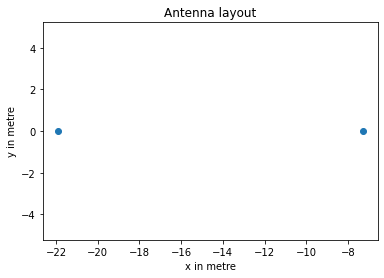

In [5]:
antscord = list(ants.values())[:]
antscord = np.array(antscord)

plt.scatter(antscord[:,0],antscord[:,1])
plt.axis('equal')
plt.title('Antenna layout')
plt.xlabel('x in metre')
plt.ylabel('y in metre')

In [6]:
nfreqs = 40 #120
ntimes = 1 #160

def myuvdata(ntimes=160, **kwargs): #160
    return io.empty_uvdata(
        nfreq = nfreqs,
        start_freq = 1.e8,
        channel_width = 0.2e8 / nfreqs,
        start_time=2458902.4,
        integration_time = 40.,
        ntimes= ntimes,
        ants = ants,
        **kwargs
    )

In [7]:
uvdata = myuvdata(ntimes)

In [8]:
bb = np.genfromtxt('catB_plain.txt',usecols=(0,1,2,3))

In [9]:
ra_dec = np.deg2rad(bb[:,0:2])
ra_dec.shape

(300, 2)

In [10]:
ra_dec

array([[ 5.70464446e+00, -1.42309101e+00],
       [ 5.74700096e+00, -1.21628803e+00],
       [ 5.74999542e+00, -1.21643078e+00],
       [ 6.27790851e+00, -1.06272318e+00],
       [ 6.27956501e+00, -1.06345508e+00],
       [ 6.20162281e+00, -1.01697426e+00],
       [ 5.87759280e+00, -9.17264648e-01],
       [ 5.73392963e+00, -9.04712833e-01],
       [ 5.68783938e+00, -7.54203963e-01],
       [ 6.17163880e+00, -7.22958294e-01],
       [ 5.99109353e+00, -7.14926585e-01],
       [ 6.13731758e+00, -7.06062529e-01],
       [ 6.27018269e+00, -6.06658506e-01],
       [ 5.57709395e+00, -5.29188856e-01],
       [ 5.50493933e+00, -4.88786107e-01],
       [ 5.38118224e+00, -3.99459178e-01],
       [ 6.10838234e+00, -4.79264393e-01],
       [ 5.52995440e+00, -4.43876342e-01],
       [ 5.53011206e+00, -4.45027700e-01],
       [ 6.24320060e+00, -4.35471220e-01],
       [ 5.48063585e+00, -3.48061379e-01],
       [ 5.57024110e+00, -3.65286399e-01],
       [ 5.63315561e+00, -3.59821128e-01],
       [ 5.

In [14]:
freqs = np.unique(uvdata.freq_array)
freq0 = 1.e8

flux = (freqs[:,np.newaxis]/freq0)**bb[:,3].T*bb[:,2].T
flux.shape

(40, 300)

In [17]:
flux

array([[   19.44433   ,   122.838211  ,    21.912548  , ...,
        13599.676     , 15811.361     ,  1256.016     ],
       [   19.3754352 ,   122.53283066,    21.83689575, ...,
        13546.87219755, 15779.06150981,  1250.95204597],
       [   19.30712461,   122.22971941,    21.76187819, ...,
        13494.53395004, 15746.98780686,  1245.93348838],
       ...,
       [   17.23177408,   112.86073277,    19.47939528, ...,
        11913.19494514, 14748.39398806,  1094.67023143],
       [   17.18021633,   112.62382182,    19.42260528, ...,
        11874.1336251 , 14722.95552879,  1090.94318351],
       [   17.12902806,   112.3883984 ,    19.36621792, ...,
        11835.36335622, 14697.66733157,  1087.24437258]])

In [11]:
beam = [AnalyticBeam("gaussian", sigma=0.103) for i in range(Nant)]

In [12]:
uvdata = myuvdata(ntimes)
simulator = VisCPU(
    uvdata = uvdata,
    beams = beam,
    beam_ids = ant_index,
    sky_freqs = freqs,
    point_source_pos = ra_dec,
    point_source_flux = flux,
    bm_pix = 20
)

In [13]:
start=time.time()
simulator.simulate()
print('Time for one simulation : '+ str(time.time()-start))

Time for one simulation : 0.04205727577209473


invalid value encountered in sqrt


Text(0, 0.5, 'visibility')

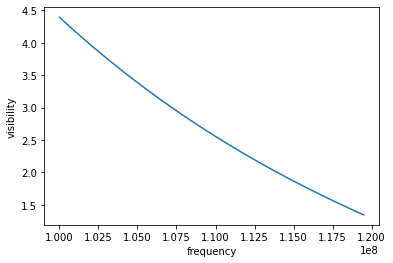

In [14]:
visibility = simulator.uvdata.get_data(0,1)
for i in range(ntimes) :
    myvis = visibility[i]
    plt.plot(freqs,myvis.real)
plt.xlabel('frequency')
plt.ylabel('visibility')

In [15]:
def my_visibility(sigmas,freqs) :
    uvdata = myuvdata(ntimes=1)
    beam = [AnalyticBeam("gaussian", sigma=sigmas[i]) for i in range(Nant)] #sigma=0.103
    
    simulator = VisCPU(
        uvdata = uvdata,
        beams = beam,
        beam_ids = ant_index,
        sky_freqs = freqs,
        point_source_pos = ra_dec,
        point_source_flux = flux,
        bm_pix = 20
    )
    simulator.simulate()
    visibility = simulator.uvdata.get_data(0,1)
    return [visibility[0].real, visibility[0].imag]

In [16]:
start=time.time()
sigmas = 0.103*np.ones(Nant)
true_model = my_visibility(sigmas,freqs)
data = true_model #+ 1000*np.random.randn(120)
print('Time for my_visibility() : '+ str(time.time()-start))

Time for my_visibility() : 0.08470821380615234


invalid value encountered in sqrt


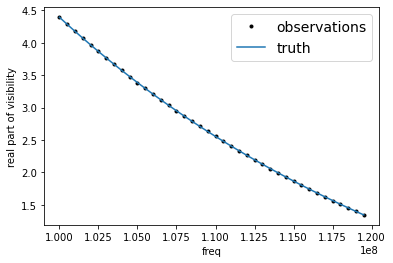

In [17]:
plt.plot(freqs,data[0], ".k", label="observations")
plt.plot(freqs, true_model[0], label="truth")
plt.xlabel("freq")
plt.ylabel("real part of visibility")
plt.legend(fontsize=14);

In [18]:
def my_model(param,nu) :
    return my_visibility(param,nu)

def my_loglike(param,nu,data,sigma) :
    model = my_model(param,nu)
    return -0.5/(sigma**2) * (np.sum(model[0] - data[0])**2 + np.sum(model[1] - data[1])**2)

In [19]:
start = time.time()
test = my_loglike(sigmas,freqs,data,1.)
print(time.time()-start)

0.08188390731811523


invalid value encountered in sqrt


In [20]:
from math import *
import random
import pymc3 as pm
import theano
import theano.tensor as tt

# define a theano Op for our likelihood function
class LogLike(tt.Op):

    """
    Specify what type of object will be passed and returned to the Op when it is
    called. In our case we will be passing it a vector of values (the parameters
    that define our model) and returning a single "scalar" value (the
    log-likelihood)
    """
    itypes = [tt.dvector] # expects a vector of parameter values when called
    otypes = [tt.dscalar] # outputs a single scalar value (the log likelihood)

    def __init__(self, loglike, data, nu, sigma):
        """
        Initialise the Op with various things that our log-likelihood function
        requires. Below are the things that are needed in this particular
        example.

        Parameters
        ----------
        loglike:
            The log-likelihood (or whatever) function we've defined
        data:
            The "observed" data that our log-likelihood function takes in
        x:
            The dependent variable (aka 'x') that our model requires
        sigma:
            The noise standard deviation that our function requires.
        """

        # add inputs as class attributes
        self.likelihood = loglike
        self.data = data
        self.nu = nu
        self.sigma = sigma

    def perform(self, node, inputs, outputs):
        # the method that is used when calling the Op
        param, = inputs  # this will contain my variables

        # call the log-likelihood function
        logl = self.likelihood(param, self.nu, self.data, self.sigma)
        

        outputs[0][0] = np.array(logl) # output the log-likelihood

In [21]:
ndraws = 1000
# create our Op
logl = LogLike(my_loglike, data, freqs, 1.)

# use PyMC3 to sampler from log-likelihood
with pm.Model() as UNIFORM_9_11:
    param = []
    # Gaussian priors on parameters
    for i in range(Nant) :
        sigma_i = pm.Uniform('theta_'+str(i+1),lower=0.09, upper=0.12)  #0.09, 0.12 - 1 chain 400 samples
        param.append(sigma_i)
    
    # convert a and b to a tensor vector
    param_tensor = tt.as_tensor_variable(param)

    #use a DensityDist (use a lamdba function to "call" the Op)
    pm.DensityDist('likelihood', lambda v: logl(v), observed={'v': param_tensor})

    trace = pm.sample(ndraws,chains=1) #, tune=nburn, discard_tuned_samples=False

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


KeyboardInterrupt: 

In [ ]:
# plot the traces
pm.traceplot(trace)

In [ ]:
modelisation = my_model([np.mean(trace['theta_1']), np.mean(trace['theta_2'])], freqs)

plt.plot(freqs,data[0], ".k", label="observations")
plt.plot(freqs, true_model[0], label="truth")
plt.plot(freqs,modelisation[0],label="UNIFORM_9_11")
#plt.plot(freqs,modelisation_2[0],label="UNIFORM_5_15")
#plt.plot(freqs,modelisation_3[0],label="GAUSSIAN_1")
plt.xlabel("freq")
plt.ylabel("real part of visibility")
plt.legend(fontsize=14);

In [ ]:
[np.mean(trace['theta_1']), np.mean(trace['theta_2'])]

In [ ]:
t1_lst = trace['theta_1']
t2_lst = trace['theta_2']

plt.plot(t1_lst,t2_lst,'k.')
plt.xlabel('theta_1')
plt.ylabel('theta_1')
plt.title('Correlation between theta1 and theta2')

In [ ]:
print(np.min(t1_lst))
print(np.max(t1_lst))
print(np.min(t2_lst))
print(np.max(t2_lst))

In [22]:
import warnings

def gradients(vals, func, releps=1e-3, abseps=None, mineps=1e-9, reltol=1e-3,
              epsscale=0.5):
    """
    Calculate the partial derivatives of a function at a set of values. The
    derivatives are calculated using the central difference, using an iterative
    method to check that the values converge as step size decreases.

    Parameters
    ----------
    vals: array_like
        A set of values, that are passed to a function, at which to calculate
        the gradient of that function
    func:
        A function that takes in an array of values.
    releps: float, array_like, 1e-3
        The initial relative step size for calculating the derivative.
    abseps: float, array_like, None
        The initial absolute step size for calculating the derivative.
        This overrides `releps` if set.
        `releps` is set then that is used.
    mineps: float, 1e-9
        The minimum relative step size at which to stop iterations if no
        convergence is achieved.
    epsscale: float, 0.5
        The factor by which releps if scaled in each iteration.

    Returns
    -------
    grads: array_like
        An array of gradients for each non-fixed value.
    """

    grads = np.zeros(len(vals))

    # maximum number of times the gradient can change sign
    flipflopmax = 10.

    # set steps
    if abseps is None:
        if isinstance(releps, float):
            eps = np.abs(vals)*releps
            eps[eps == 0.] = releps  # if any values are zero set eps to releps
            teps = releps*np.ones(len(vals))
        elif isinstance(releps, (list, np.ndarray)):
            if len(releps) != len(vals):
                raise ValueError("Problem with input relative step sizes")
            eps = np.multiply(np.abs(vals), releps)
            eps[eps == 0.] = np.array(releps)[eps == 0.]
            teps = releps
        else:
            raise RuntimeError("Relative step sizes are not a recognised type!")
    else:
        if isinstance(abseps, float):
            eps = abseps*np.ones(len(vals))
        elif isinstance(abseps, (list, np.ndarray)):
            if len(abseps) != len(vals):
                raise ValueError("Problem with input absolute step sizes")
            eps = np.array(abseps)
        else:
            raise RuntimeError("Absolute step sizes are not a recognised type!")
        teps = eps

    # for each value in vals calculate the gradient
    count = 0
    for i in range(len(vals)):
        # initial parameter diffs
        leps = eps[i]
        cureps = teps[i]

        flipflop = 0

        # get central finite difference
        fvals = np.copy(vals)
        bvals = np.copy(vals)

        # central difference
        fvals[i] += 0.5*leps  # change forwards distance to half eps
        bvals[i] -= 0.5*leps  # change backwards distance to half eps
        cdiff = (func(fvals)-func(bvals))/leps

        while 1:
            fvals[i] -= 0.5*leps  # remove old step
            bvals[i] += 0.5*leps

            # change the difference by a factor of two
            cureps *= epsscale
            if cureps < mineps or flipflop > flipflopmax:
                # if no convergence set flat derivative (TODO: check if there is a better thing to do instead)
                warnings.warn("Derivative calculation did not converge: setting flat derivative.")
                grads[count] = 0.
                break
            leps *= epsscale

            # central difference
            fvals[i] += 0.5*leps  # change forwards distance to half eps
            bvals[i] -= 0.5*leps  # change backwards distance to half eps
            cdiffnew = (func(fvals)-func(bvals))/leps

            if cdiffnew == cdiff:
                grads[count] = cdiff
                break

            # check whether previous diff and current diff are the same within reltol
            rat = (cdiff/cdiffnew)
            if np.isfinite(rat) and rat > 0.:
                # gradient has not changed sign
                if np.abs(1.-rat) < reltol:
                    grads[count] = cdiffnew
                    break
                else:
                    cdiff = cdiffnew
                    continue
            else:
                cdiff = cdiffnew
                flipflop += 1
                continue

        count += 1

    return grads

In [23]:
# define a theano Op for our likelihood function
class LogLikeWithGrad(tt.Op):

    itypes = [tt.dvector] # expects a vector of parameter values when called
    otypes = [tt.dscalar] # outputs a single scalar value (the log likelihood)

    def __init__(self, loglike, data, nu, sigma):
        """
        Initialise with various things that the function requires. Below
        are the things that are needed in this particular example.

        Parameters
        ----------
        loglike:
            The log-likelihood (or whatever) function we've defined
        data:
            The "observed" data that our log-likelihood function takes in
        x:
            The dependent variable (aka 'x') that our model requires
        sigma:
            The noise standard deviation that out function requires.
        """

        # add inputs as class attributes
        self.likelihood = loglike
        self.data = data
        self.nu = nu
        self.sigma = sigma

        # initialise the gradient Op (below)
        self.logpgrad = LogLikeGrad(self.likelihood, self.data, self.nu, self.sigma)

    def perform(self, node, inputs, outputs):
        # the method that is used when calling the Op
        param, = inputs  # this will contain my variables
        start = time.time()
        # call the log-likelihood function
        logl = self.likelihood(param, self.nu, self.data, self.sigma)
        print('Time for loglike : '+ str(time.time()-start))
        outputs[0][0] = np.array(logl) # output the log-likelihood

    def grad(self, inputs, g):
        # the method that calculates the gradients - it actually returns the
        # vector-Jacobian product - g[0] is a vector of parameter values
        param, = inputs  # our parameters
        return [g[0]*self.logpgrad(param)]


class LogLikeGrad(tt.Op):

    """
    This Op will be called with a vector of values and also return a vector of
    values - the gradients in each dimension.
    """
    itypes = [tt.dvector]
    otypes = [tt.dvector]

    def __init__(self, loglike, data, nu, sigma):
        """
        Initialise with various things that the function requires. Below
        are the things that are needed in this particular example.

        Parameters
        ----------
        loglike:
            The log-likelihood (or whatever) function we've defined
        data:
            The "observed" data that our log-likelihood function takes in
        x:
            The dependent variable (aka 'x') that our model requires
        sigma:
            The noise standard deviation that out function requires.
        """

        # add inputs as class attributes
        self.likelihood = loglike
        self.data = data
        self.nu = nu
        self.sigma = sigma

    def perform(self, node, inputs, outputs):
        param, = inputs

        # define version of likelihood function to pass to derivative function
        def lnlike(values):
            return self.likelihood(values, self.nu, self.data, self.sigma)
        
        start = time.time()
        # calculate gradients
        grads = gradients(param, lnlike) #jacobian(lnlike)#elementwise_grad(lnlike)#
        print('Time for gradient : '+ str(time.time()-start))
        outputs[0][0] = grads

In [24]:
ndraws = 100
# create our Op
logl = LogLikeWithGrad(my_loglike, data, freqs, 1.)

# use PyMC3 to sampler from log-likelihood
with pm.Model() as UNIFORM_9_11:
    param = []
    # Gaussian priors on parameters
    for i in range(Nant) :
        sigma_i = pm.Uniform('theta_'+str(i+1),lower=0.09, upper=0.12)  #0.09, 0.12 - 1 chain 400 samples
        param.append(sigma_i)
    
    # convert a and b to a tensor vector
    param_tensor = tt.as_tensor_variable(param)

    #use a DensityDist (use a lamdba function to "call" the Op)
    pm.DensityDist('likelihood', lambda v: logl(v), observed={'v': param_tensor})

    trace_grad = pm.sample(ndraws,chains=1) #, tune=nburn, discard_tuned_samples=False, step=pm.HamiltonianMC()

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Time for loglike : 0.0782463550567627
Time for loglike : 0.07473945617675781
Time for loglike : 0.07480597496032715
Time for gradient : 0.6046459674835205
Time for loglike : 0.07933998107910156


Sequential sampling (1 chains in 1 job)
NUTS: [theta_2, theta_1]
Sampling chain 0, 0 divergences:   0%|          | 0/600 [00:00<?, ?it/s]

Time for gradient : 0.5983121395111084
Time for loglike : 0.08441710472106934
Time for gradient : 0.5956294536590576
Time for loglike : 0.07505249977111816


Sampling chain 0, 0 divergences:   0%|          | 1/600 [00:01<18:48,  1.88s/it]

Time for gradient : 0.5961053371429443
Time for loglike : 0.07534623146057129
Time for gradient : 0.5954537391662598
Time for loglike : 0.07506227493286133


Sampling chain 0, 0 divergences:   0%|          | 2/600 [00:03<17:10,  1.72s/it]

Time for gradient : 0.5980517864227295
Time for loglike : 0.07530832290649414
Time for gradient : 0.5960328578948975
Time for loglike : 0.07479643821716309
Time for gradient : 0.595954418182373
Time for loglike : 0.07412362098693848
Time for gradient : 0.5959773063659668
Time for loglike : 0.07492375373840332
Time for gradient : 0.5956149101257324
Time for loglike : 0.07474780082702637
Time for gradient : 0.595360279083252
Time for loglike : 0.07491803169250488
Time for gradient : 0.5964477062225342
Time for loglike : 0.07466006278991699
Time for gradient : 0.5952455997467041
Time for loglike : 0.07499313354492188
Time for gradient : 0.5954549312591553
Time for loglike : 0.07496500015258789
Time for gradient : 0.5957865715026855
Time for loglike : 0.0750422477722168
Time for gradient : 0.5963020324707031
Time for loglike : 0.07521224021911621
Time for gradient : 0.5955803394317627
Time for loglike : 0.07551693916320801
Time for gradient : 0.596968412399292
Time for loglike : 0.07496261

Sampling chain 0, 0 divergences:   0%|          | 3/600 [01:11<3:34:33, 21.56s/it]

Time for gradient : 0.5955765247344971
Time for loglike : 0.0758504867553711
Time for gradient : 0.5968730449676514
Time for loglike : 0.07503557205200195
Time for gradient : 0.595391035079956
Time for loglike : 0.07471394538879395
Time for gradient : 0.5959110260009766
Time for loglike : 0.07502031326293945


Sampling chain 0, 0 divergences:   1%|          | 4/600 [01:13<2:37:56, 15.90s/it]

Time for gradient : 0.5951073169708252
Time for loglike : 0.07574248313903809
Time for gradient : 0.5967240333557129
Time for loglike : 0.07528996467590332
Time for gradient : 0.5954172611236572
Time for loglike : 0.07462072372436523
Time for gradient : 0.6066575050354004
Time for loglike : 0.07479190826416016
Time for gradient : 0.595383882522583
Time for loglike : 0.07504701614379883
Time for gradient : 0.5959045886993408
Time for loglike : 0.07513284683227539
Time for gradient : 0.5949716567993164
Time for loglike : 0.07504916191101074
Time for gradient : 0.5958878993988037
Time for loglike : 0.074981689453125
Time for gradient : 0.5960943698883057
Time for loglike : 0.07526350021362305
Time for gradient : 0.8935315608978271
Time for loglike : 0.07520318031311035
Time for gradient : 0.5964345932006836
Time for loglike : 0.07517552375793457
Time for gradient : 0.5957977771759033
Time for loglike : 0.07518839836120605
Time for gradient : 0.595921516418457
Time for loglike : 0.07487869

Derivative calculation did not converge: setting flat derivative.


Time for gradient : 3.2744264602661133
Time for loglike : 0.07534050941467285
Time for gradient : 0.5966734886169434
Time for loglike : 0.07437324523925781
Time for gradient : 0.5951180458068848
Time for loglike : 0.07525420188903809
Time for gradient : 0.5959129333496094
Time for loglike : 0.07494544982910156
Time for gradient : 0.5957775115966797
Time for loglike : 0.07516360282897949
Time for gradient : 0.5952754020690918
Time for loglike : 0.07547187805175781
Time for gradient : 0.5954053401947021
Time for loglike : 0.07550263404846191


Sampling chain 0, 0 divergences:   1%|          | 5/600 [01:30<2:39:12, 16.06s/it]

Time for gradient : 0.595996618270874
Time for loglike : 0.07567930221557617
Time for gradient : 0.8954107761383057
Time for loglike : 0.074859619140625
Time for gradient : 0.5952155590057373
Time for loglike : 0.07451677322387695
Time for gradient : 0.5964198112487793
Time for loglike : 0.07518124580383301
Time for gradient : 0.8936672210693359
Time for loglike : 0.07463788986206055
Time for gradient : 0.5968091487884521
Time for loglike : 0.07495927810668945
Time for gradient : 0.5960242748260498
Time for loglike : 0.07503604888916016
Time for gradient : 0.5961198806762695
Time for loglike : 0.07494020462036133
Time for gradient : 0.5972414016723633
Time for loglike : 0.07495784759521484
Time for gradient : 0.596163272857666
Time for loglike : 0.07474517822265625
Time for gradient : 0.5957446098327637
Time for loglike : 0.07503366470336914
Time for gradient : 0.5959932804107666
Time for loglike : 0.07502985000610352
Time for gradient : 0.5961880683898926
Time for loglike : 0.07484936

Sampling chain 0, 0 divergences:   1%|          | 6/600 [01:58<3:14:10, 19.61s/it]

Time for gradient : 0.6043014526367188
Time for loglike : 0.07739543914794922
Time for gradient : 0.6044921875
Time for loglike : 0.07610368728637695
Time for gradient : 0.6045897006988525
Time for loglike : 0.07623481750488281
Time for gradient : 0.6043298244476318
Time for loglike : 0.0757150650024414
Time for gradient : 3.4632298946380615
Time for loglike : 0.07581686973571777
Time for gradient : 0.6043996810913086
Time for loglike : 0.07575273513793945
Time for gradient : 0.6036901473999023
Time for loglike : 0.07565164566040039
Time for gradient : 0.6042604446411133
Time for loglike : 0.07509732246398926
Time for gradient : 0.6049633026123047
Time for loglike : 0.07501602172851562
Time for gradient : 0.6044652462005615
Time for loglike : 0.0753927230834961
Time for gradient : 0.6047418117523193
Time for loglike : 0.07663416862487793
Time for gradient : 0.6043105125427246
Time for loglike : 0.07612180709838867
Time for gradient : 0.6040678024291992
Time for loglike : 0.076379776000

Sampling chain 0, 0 divergences:   1%|          | 7/600 [02:18<3:16:16, 19.86s/it]

Time for gradient : 0.5965685844421387
Time for loglike : 0.07588887214660645
Time for gradient : 3.276244878768921
Time for loglike : 0.07502627372741699


Sampling chain 0, 0 divergences:   1%|▏         | 8/600 [02:22<2:29:04, 15.11s/it]

Time for gradient : 0.5960280895233154
Time for loglike : 0.07554244995117188
Time for gradient : 3.277412176132202
Time for loglike : 0.07492756843566895
Time for gradient : 0.596440315246582
Time for loglike : 0.07490253448486328
Time for gradient : 0.5953195095062256
Time for loglike : 0.07482385635375977
Time for gradient : 0.596229076385498
Time for loglike : 0.07457780838012695
Time for gradient : 0.5966989994049072
Time for loglike : 0.07510709762573242
Time for gradient : 0.5964434146881104
Time for loglike : 0.07503724098205566
Time for gradient : 0.5957744121551514
Time for loglike : 0.07504630088806152
Time for gradient : 0.5968654155731201
Time for loglike : 0.07506442070007324
Time for gradient : 0.5962929725646973
Time for loglike : 0.07536864280700684
Time for gradient : 0.5976753234863281
Time for loglike : 0.0753488540649414
Time for gradient : 0.5960993766784668
Time for loglike : 0.07496142387390137
Time for gradient : 0.7445855140686035
Time for loglike : 0.07491755

Sampling chain 0, 0 divergences:   2%|▏         | 9/600 [03:05<3:52:29, 23.60s/it]

Time for gradient : 0.5954864025115967
Time for loglike : 0.07575154304504395
Time for gradient : 0.5969548225402832
Time for loglike : 0.07507014274597168
Time for gradient : 0.595660924911499
Time for loglike : 0.07473611831665039
Time for gradient : 0.7451610565185547
Time for loglike : 0.0752873420715332
Time for gradient : 0.5964257717132568
Time for loglike : 0.07501721382141113
Time for gradient : 0.5953254699707031
Time for loglike : 0.07490658760070801
Time for gradient : 0.7447271347045898
Time for loglike : 0.07501101493835449
Time for gradient : 0.595198392868042
Time for loglike : 0.07513070106506348
Time for gradient : 0.596153736114502
Time for loglike : 0.07512593269348145
Time for gradient : 0.5957236289978027
Time for loglike : 0.07500147819519043
Time for gradient : 0.5954806804656982
Time for loglike : 0.07511734962463379
Time for gradient : 1.1915948390960693
Time for loglike : 0.07537293434143066
Time for gradient : 0.5956428050994873
Time for loglike : 0.07501101

Sampling chain 0, 0 divergences:   2%|▏         | 10/600 [04:58<8:15:07, 50.35s/it]

Time for gradient : 0.5956873893737793
Time for loglike : 0.07554292678833008
Time for gradient : 0.596754789352417
Time for loglike : 0.07486128807067871
Time for gradient : 0.5959162712097168
Time for loglike : 0.07484197616577148
Time for gradient : 0.5962634086608887
Time for loglike : 0.07555437088012695
Time for gradient : 0.5960235595703125
Time for loglike : 0.07497286796569824
Time for gradient : 0.5964629650115967
Time for loglike : 0.07507610321044922
Time for gradient : 0.5955171585083008
Time for loglike : 0.07501077651977539
Time for gradient : 0.5959062576293945
Time for loglike : 0.07482695579528809
Time for gradient : 0.5956432819366455
Time for loglike : 0.07451629638671875
Time for gradient : 0.5968165397644043
Time for loglike : 0.07506155967712402
Time for gradient : 0.5969057083129883
Time for loglike : 0.07521653175354004
Time for gradient : 0.5969793796539307
Time for loglike : 0.07491540908813477
Time for gradient : 0.5965826511383057
Time for loglike : 0.07514

Sampling chain 0, 0 divergences:   2%|▏         | 11/600 [06:36<10:32:43, 64.45s/it]

Time for gradient : 0.596747875213623
Time for loglike : 0.07519793510437012
Time for gradient : 0.596149206161499
Time for loglike : 0.07500410079956055
Time for gradient : 0.5961849689483643
Time for loglike : 0.07487297058105469
Time for gradient : 0.5957655906677246
Time for loglike : 0.07517504692077637


Sampling chain 0, 0 divergences:   2%|▏         | 12/600 [06:38<7:30:03, 45.92s/it] 

Time for gradient : 0.5954351425170898
Time for loglike : 0.07553315162658691
Time for gradient : 0.5959169864654541
Time for loglike : 0.07498526573181152
Time for gradient : 0.596379280090332
Time for loglike : 0.07487058639526367
Time for gradient : 0.5960330963134766
Time for loglike : 0.07510066032409668


Sampling chain 0, 0 divergences:   2%|▏         | 13/600 [06:41<5:22:23, 32.95s/it]

Time for gradient : 0.5960397720336914
Time for loglike : 0.07563042640686035
Time for gradient : 0.5952670574188232
Time for loglike : 0.07522225379943848
Time for gradient : 0.595841646194458
Time for loglike : 0.07480740547180176
Time for gradient : 0.5960309505462646
Time for loglike : 0.07502102851867676
Time for gradient : 0.5957505702972412
Time for loglike : 0.07518410682678223
Time for gradient : 0.5957200527191162
Time for loglike : 0.07491302490234375
Time for gradient : 0.596160888671875
Time for loglike : 0.07485103607177734
Time for gradient : 0.5972068309783936
Time for loglike : 0.07487225532531738
Time for gradient : 0.5946156978607178
Time for loglike : 0.0753169059753418
Time for gradient : 0.5965919494628906
Time for loglike : 0.07521343231201172
Time for gradient : 0.596569299697876
Time for loglike : 0.07507562637329102
Time for gradient : 0.5965166091918945
Time for loglike : 0.07513308525085449
Time for gradient : 0.5961775779724121
Time for loglike : 0.07486701

Sampling chain 0, 0 divergences:   2%|▏         | 14/600 [09:41<12:31:32, 76.95s/it]

Time for gradient : 0.5953612327575684
Time for loglike : 0.0755617618560791
Time for gradient : 0.5968849658966064
Time for loglike : 0.07573723793029785
Time for gradient : 0.5965828895568848
Time for loglike : 0.07420897483825684
Time for gradient : 0.5959482192993164
Time for loglike : 0.07497072219848633
Time for gradient : 0.5960342884063721
Time for loglike : 0.07519030570983887
Time for gradient : 0.5959987640380859
Time for loglike : 0.07486343383789062
Time for gradient : 0.5957927703857422
Time for loglike : 0.07504916191101074
Time for gradient : 0.5956118106842041
Time for loglike : 0.07495546340942383
Time for gradient : 0.5962295532226562
Time for loglike : 0.07499575614929199
Time for gradient : 0.5966157913208008
Time for loglike : 0.0748898983001709
Time for gradient : 0.5960290431976318
Time for loglike : 0.07490849494934082
Time for gradient : 0.5968241691589355
Time for loglike : 0.07499265670776367
Time for gradient : 0.5965921878814697
Time for loglike : 0.074533

Sampling chain 0, 0 divergences:   2%|▎         | 15/600 [10:13<10:19:53, 63.58s/it]

Time for gradient : 0.5960853099822998
Time for loglike : 0.0755617618560791
Time for gradient : 0.5965194702148438
Time for loglike : 0.07530617713928223
Time for gradient : 0.5962667465209961
Time for loglike : 0.07492494583129883
Time for gradient : 0.59609055519104
Time for loglike : 0.07496213912963867
Time for gradient : 0.7437305450439453
Time for loglike : 0.07492446899414062
Time for gradient : 0.5962328910827637
Time for loglike : 0.07549738883972168
Time for gradient : 0.5954408645629883
Time for loglike : 0.07498860359191895
Time for gradient : 0.5965194702148438
Time for loglike : 0.07491540908813477


Sampling chain 0, 0 divergences:   3%|▎         | 16/600 [10:18<7:29:18, 46.16s/it] 

Time for gradient : 0.5954389572143555
Time for loglike : 0.07570576667785645
Time for gradient : 0.5966610908508301
Time for loglike : 0.0750570297241211
Time for gradient : 0.5957748889923096
Time for loglike : 0.0750277042388916
Time for gradient : 0.5958318710327148
Time for loglike : 0.07494544982910156
Time for gradient : 0.5962116718292236
Time for loglike : 0.0751349925994873
Time for gradient : 0.5964879989624023
Time for loglike : 0.07488012313842773
Time for gradient : 0.5959188938140869
Time for loglike : 0.07503533363342285
Time for gradient : 0.5967507362365723
Time for loglike : 0.07504439353942871
Time for gradient : 0.5968017578125
Time for loglike : 0.07479000091552734
Time for gradient : 0.5963213443756104
Time for loglike : 0.07503414154052734
Time for gradient : 0.5968940258026123
Time for loglike : 0.07501053810119629
Time for gradient : 0.5956323146820068
Time for loglike : 0.07525157928466797


Sampling chain 0, 0 divergences:   3%|▎         | 17/600 [10:27<5:37:28, 34.73s/it]

Time for gradient : 0.5970056056976318
Time for loglike : 0.07564425468444824
Time for gradient : 0.5964393615722656
Time for loglike : 0.07527780532836914
Time for gradient : 0.5970351696014404
Time for loglike : 0.07469773292541504
Time for gradient : 3.569599151611328
Time for loglike : 0.07504034042358398
Time for gradient : 0.5966835021972656
Time for loglike : 0.07494020462036133
Time for gradient : 0.5961623191833496
Time for loglike : 0.07544541358947754
Time for gradient : 0.5951576232910156
Time for loglike : 0.0750739574432373
Time for gradient : 0.5962169170379639
Time for loglike : 0.07502293586730957


Sampling chain 0, 0 divergences:   3%|▎         | 18/600 [10:38<4:27:55, 27.62s/it]

Time for gradient : 3.2725989818573
Time for loglike : 0.07523179054260254
Time for gradient : 0.5977051258087158
Time for loglike : 0.07505631446838379
Time for gradient : 0.5952410697937012
Time for loglike : 0.07508683204650879
Time for gradient : 0.5966393947601318
Time for loglike : 0.07509875297546387


Sampling chain 0, 0 divergences:   3%|▎         | 19/600 [10:40<3:15:02, 20.14s/it]

Time for gradient : 0.5965697765350342
Time for loglike : 0.07570981979370117
Time for gradient : 0.5965907573699951
Time for loglike : 0.07526898384094238
Time for gradient : 0.5952892303466797
Time for loglike : 0.07509040832519531
Time for gradient : 0.5962831974029541
Time for loglike : 0.07480788230895996


Sampling chain 0, 0 divergences:   3%|▎         | 20/600 [10:43<2:24:05, 14.91s/it]

Time for gradient : 0.5960605144500732
Time for loglike : 0.07600784301757812
Time for gradient : 0.5963544845581055
Time for loglike : 0.0751340389251709
Time for gradient : 0.5969874858856201
Time for loglike : 0.07480597496032715
Time for gradient : 0.5956907272338867
Time for loglike : 0.07497525215148926


Sampling chain 0, 0 divergences:   4%|▎         | 21/600 [10:46<1:48:28, 11.24s/it]

Time for gradient : 0.5960924625396729
Time for loglike : 0.07562613487243652
Time for gradient : 0.5959258079528809
Time for loglike : 0.07487177848815918
Time for gradient : 1.337859869003296
Time for loglike : 0.07479095458984375
Time for gradient : 0.5958113670349121
Time for loglike : 0.07497620582580566


Sampling chain 0, 0 divergences:   4%|▎         | 22/600 [10:52<1:33:26,  9.70s/it]

Time for gradient : 3.2701544761657715
Time for loglike : 0.07520818710327148
Time for gradient : 0.5972082614898682
Time for loglike : 0.07544946670532227
Time for gradient : 0.595703125
Time for loglike : 0.07504034042358398
Time for gradient : 0.5960025787353516
Time for loglike : 0.07486104965209961
Time for gradient : 0.5954608917236328
Time for loglike : 0.07495617866516113
Time for gradient : 0.5959155559539795
Time for loglike : 0.07503485679626465


Sampling chain 0, 0 divergences:   4%|▍         | 23/600 [10:56<1:16:55,  8.00s/it]

Time for gradient : 0.5962390899658203
Time for loglike : 0.0760195255279541
Time for gradient : 0.5970265865325928
Time for loglike : 0.07484722137451172
Time for gradient : 0.5956275463104248
Time for loglike : 0.0748286247253418
Time for gradient : 0.595874547958374
Time for loglike : 0.07505226135253906


Sampling chain 0, 0 divergences:   4%|▍         | 24/600 [10:58<1:01:29,  6.41s/it]

Time for gradient : 0.5969772338867188
Time for loglike : 0.07591104507446289
Time for gradient : 0.5960838794708252
Time for loglike : 0.07487607002258301
Time for gradient : 0.5958375930786133
Time for loglike : 0.07504391670227051
Time for gradient : 0.5964183807373047
Time for loglike : 0.07543706893920898


Sampling chain 0, 0 divergences:   4%|▍         | 25/600 [11:01<50:42,  5.29s/it]  

Time for gradient : 0.59604811668396
Time for loglike : 0.07527303695678711
Time for gradient : 0.5964877605438232
Time for loglike : 0.07535409927368164
Time for gradient : 0.5958788394927979
Time for loglike : 0.0747067928314209
Time for gradient : 0.7437024116516113
Time for loglike : 0.07487654685974121
Time for gradient : 0.59637451171875
Time for loglike : 0.0750885009765625
Time for gradient : 0.5950582027435303
Time for loglike : 0.07548403739929199
Time for gradient : 0.5965297222137451
Time for loglike : 0.07523846626281738
Time for gradient : 0.5954813957214355
Time for loglike : 0.07543087005615234


Sampling chain 0, 0 divergences:   4%|▍         | 26/600 [11:07<52:08,  5.45s/it]

Time for gradient : 0.8939435482025146
Time for loglike : 0.07568550109863281
Time for gradient : 0.5971026420593262
Time for loglike : 0.0753021240234375
Time for gradient : 1.0420079231262207
Time for loglike : 0.07503437995910645
Time for gradient : 0.5966849327087402
Time for loglike : 0.0752723217010498
Time for gradient : 0.595412015914917
Time for loglike : 0.07518386840820312
Time for gradient : 0.5956826210021973
Time for loglike : 0.0749049186706543
Time for gradient : 0.5966529846191406
Time for loglike : 0.07515525817871094
Time for gradient : 0.596583366394043
Time for loglike : 0.07519793510437012
Time for gradient : 0.5965762138366699
Time for loglike : 0.07531118392944336
Time for gradient : 0.5962789058685303
Time for loglike : 0.07559490203857422
Time for gradient : 0.5965714454650879
Time for loglike : 0.07498669624328613
Time for gradient : 0.5960464477539062
Time for loglike : 0.0753011703491211
Time for gradient : 0.5963892936706543
Time for loglike : 0.0751292705

Sampling chain 0, 0 divergences:   4%|▍         | 27/600 [11:17<1:04:39,  6.77s/it]

Time for gradient : 0.5964844226837158
Time for loglike : 0.07606220245361328
Time for gradient : 0.595921516418457
Time for loglike : 0.07506871223449707
Time for gradient : 0.5964579582214355
Time for loglike : 0.07474637031555176
Time for gradient : 0.5962769985198975
Time for loglike : 0.07517361640930176
Time for gradient : 0.5962882041931152
Time for loglike : 0.07473969459533691
Time for gradient : 0.5961818695068359
Time for loglike : 0.07506513595581055
Time for gradient : 0.5963125228881836
Time for loglike : 0.07509779930114746
Time for gradient : 0.5956521034240723
Time for loglike : 0.07509255409240723
Time for gradient : 0.5956718921661377
Time for loglike : 0.07491421699523926
Time for gradient : 0.5960407257080078
Time for loglike : 0.07509207725524902
Time for gradient : 0.5965003967285156
Time for loglike : 0.0750274658203125
Time for gradient : 0.596672773361206
Time for loglike : 0.0756077766418457
Time for gradient : 0.5954864025115967
Time for loglike : 0.07506346

Sampling chain 0, 0 divergences:   5%|▍         | 28/600 [11:44<2:02:00, 12.80s/it]

Time for gradient : 0.595797061920166
Time for loglike : 0.07590293884277344
Time for gradient : 0.5965628623962402
Time for loglike : 0.07501077651977539
Time for gradient : 0.596792459487915
Time for loglike : 0.07496333122253418
Time for gradient : 0.5964019298553467
Time for loglike : 0.07493782043457031
Time for gradient : 0.5968334674835205
Time for loglike : 0.07508373260498047
Time for gradient : 0.5953938961029053
Time for loglike : 0.07497334480285645
Time for gradient : 0.5955231189727783
Time for loglike : 0.07494616508483887
Time for gradient : 0.5969688892364502
Time for loglike : 0.07547831535339355


Sampling chain 0, 0 divergences:   5%|▍         | 29/600 [11:49<1:40:36, 10.57s/it]

Time for gradient : 0.595451831817627
Time for loglike : 0.07536745071411133
Time for gradient : 0.5964267253875732
Time for loglike : 0.0750124454498291
Time for gradient : 0.5962438583374023
Time for loglike : 0.07467007637023926
Time for gradient : 0.5958597660064697
Time for loglike : 0.07538199424743652
Time for gradient : 0.5946648120880127
Time for loglike : 0.07480955123901367
Time for gradient : 0.6062629222869873
Time for loglike : 0.07504105567932129


Sampling chain 0, 0 divergences:   5%|▌         | 30/600 [11:53<1:21:49,  8.61s/it]

Time for gradient : 0.5960869789123535
Time for loglike : 0.07573676109313965
Time for gradient : 0.5965826511383057
Time for loglike : 0.07518410682678223
Time for gradient : 0.5959434509277344
Time for loglike : 0.07472801208496094
Time for gradient : 0.5963659286499023
Time for loglike : 0.07506513595581055


Sampling chain 0, 0 divergences:   5%|▌         | 31/600 [11:56<1:04:49,  6.84s/it]

Time for gradient : 0.5958333015441895
Time for loglike : 0.07556295394897461
Time for gradient : 0.5973401069641113
Time for loglike : 0.0749959945678711
Time for gradient : 0.5958704948425293
Time for loglike : 0.07469916343688965
Time for gradient : 0.5953254699707031
Time for loglike : 0.07522439956665039


Sampling chain 0, 0 divergences:   5%|▌         | 32/600 [11:58<52:55,  5.59s/it]  

Time for gradient : 0.5960228443145752
Time for loglike : 0.0753943920135498
Time for gradient : 0.5966126918792725
Time for loglike : 0.07546234130859375
Time for gradient : 0.5955953598022461
Time for loglike : 0.07504868507385254
Time for gradient : 0.5961644649505615
Time for loglike : 0.07543492317199707
Time for gradient : 0.5958983898162842
Time for loglike : 0.07490873336791992
Time for gradient : 0.5973005294799805
Time for loglike : 0.0749058723449707
Time for gradient : 0.5955495834350586
Time for loglike : 0.07494711875915527
Time for gradient : 0.5949709415435791
Time for loglike : 0.07495832443237305
Time for gradient : 0.5963997840881348
Time for loglike : 0.07501673698425293
Time for gradient : 0.5961880683898926
Time for loglike : 0.07500123977661133
Time for gradient : 0.5960519313812256
Time for loglike : 0.07516598701477051
Time for gradient : 0.5951778888702393
Time for loglike : 0.07493209838867188
Time for gradient : 0.5959517955780029
Time for loglike : 0.074835

Sampling chain 0, 0 divergences:   6%|▌         | 33/600 [12:09<1:07:27,  7.14s/it]

Time for gradient : 0.5964336395263672
Time for loglike : 0.07588338851928711
Time for gradient : 0.5971982479095459
Time for loglike : 0.07534599304199219
Time for gradient : 0.5960042476654053
Time for loglike : 0.07497930526733398
Time for gradient : 0.5953035354614258
Time for loglike : 0.0748753547668457
Time for gradient : 0.596247673034668
Time for loglike : 0.07503294944763184
Time for gradient : 0.5962772369384766
Time for loglike : 0.07520484924316406
Time for gradient : 0.5965485572814941
Time for loglike : 0.0751807689666748
Time for gradient : 0.5953526496887207
Time for loglike : 0.07515883445739746


Sampling chain 0, 0 divergences:   6%|▌         | 34/600 [12:15<1:02:20,  6.61s/it]

Time for gradient : 0.5960767269134521
Time for loglike : 0.07561326026916504
Time for gradient : 0.5966281890869141
Time for loglike : 0.07578539848327637
Time for gradient : 0.6062681674957275
Time for loglike : 0.07416915893554688
Time for gradient : 0.5956821441650391
Time for loglike : 0.0750129222869873
Time for gradient : 0.5963320732116699
Time for loglike : 0.07547616958618164
Time for gradient : 0.5959625244140625
Time for loglike : 0.07519149780273438
Time for gradient : 0.5956437587738037
Time for loglike : 0.07489848136901855
Time for gradient : 0.5954239368438721
Time for loglike : 0.07502436637878418
Time for gradient : 0.5968618392944336
Time for loglike : 0.0748434066772461
Time for gradient : 0.596489667892456
Time for loglike : 0.07505083084106445
Time for gradient : 0.5956811904907227
Time for loglike : 0.07499933242797852
Time for gradient : 0.5969264507293701
Time for loglike : 0.07501912117004395
Time for gradient : 0.5954375267028809
Time for loglike : 0.0751411

Sampling chain 0, 0 divergences:   6%|▌         | 35/600 [12:26<1:14:47,  7.94s/it]

Time for gradient : 0.5965545177459717
Time for loglike : 0.07584762573242188
Time for gradient : 0.596233606338501
Time for loglike : 0.07550930976867676
Time for gradient : 0.5954639911651611
Time for loglike : 0.07444095611572266
Time for gradient : 0.5959515571594238
Time for loglike : 0.0750734806060791


Sampling chain 0, 0 divergences:   6%|▌         | 36/600 [12:28<59:50,  6.37s/it]  

Time for gradient : 0.5958585739135742
Time for loglike : 0.07564568519592285
Time for gradient : 0.595773458480835
Time for loglike : 0.07490181922912598
Time for gradient : 0.596271276473999
Time for loglike : 0.07473945617675781
Time for gradient : 0.5961079597473145
Time for loglike : 0.0747823715209961


Sampling chain 0, 0 divergences:   6%|▌         | 37/600 [12:31<49:22,  5.26s/it]

Time for gradient : 0.5950195789337158
Time for loglike : 0.07559967041015625
Time for gradient : 0.5959084033966064
Time for loglike : 0.07528305053710938
Time for gradient : 0.5945217609405518
Time for loglike : 0.07453179359436035
Time for gradient : 0.594508171081543
Time for loglike : 0.07502508163452148


Sampling chain 0, 0 divergences:   6%|▋         | 38/600 [12:34<42:02,  4.49s/it]

Time for gradient : 0.5956406593322754
Time for loglike : 0.07580447196960449
Time for gradient : 0.594649076461792
Time for loglike : 0.0746757984161377
Time for gradient : 0.5948259830474854
Time for loglike : 0.07407259941101074
Time for gradient : 0.5944159030914307
Time for loglike : 0.0751183032989502


Sampling chain 0, 0 divergences:   6%|▋         | 39/600 [12:36<36:54,  3.95s/it]

Time for gradient : 0.5959851741790771
Time for loglike : 0.07566213607788086
Time for gradient : 0.5958442687988281
Time for loglike : 0.0743567943572998
Time for gradient : 0.5962517261505127
Time for loglike : 0.07505035400390625
Time for gradient : 0.5959031581878662
Time for loglike : 0.07515144348144531
Time for gradient : 0.6069552898406982
Time for loglike : 0.07469606399536133
Time for gradient : 0.596691370010376
Time for loglike : 0.07547760009765625
Time for gradient : 0.5961179733276367
Time for loglike : 0.07502317428588867
Time for gradient : 0.5964651107788086
Time for loglike : 0.07490372657775879
Time for gradient : 0.6013154983520508
Time for loglike : 0.07621431350708008
Time for gradient : 0.598250150680542
Time for loglike : 0.07502007484436035
Time for gradient : 0.5961666107177734
Time for loglike : 0.07502579689025879
Time for gradient : 0.5968263149261475
Time for loglike : 0.07510948181152344
Time for gradient : 0.5954980850219727
Time for loglike : 0.0750412

Sampling chain 0, 0 divergences:   7%|▋         | 40/600 [12:47<55:56,  5.99s/it]

Time for gradient : 0.5956223011016846
Time for loglike : 0.0758213996887207
Time for gradient : 0.5969746112823486
Time for loglike : 0.0749971866607666
Time for gradient : 0.595395565032959
Time for loglike : 0.07497763633728027
Time for gradient : 0.5953612327575684
Time for loglike : 0.07507848739624023
Time for gradient : 0.5953395366668701
Time for loglike : 0.0749976634979248
Time for gradient : 0.5959982872009277
Time for loglike : 0.07541370391845703
Time for gradient : 0.5948817729949951
Time for loglike : 0.07506370544433594
Time for gradient : 0.5958566665649414
Time for loglike : 0.07468891143798828
Time for gradient : 0.596062183380127
Time for loglike : 0.07460880279541016
Time for gradient : 0.595616340637207
Time for loglike : 0.07478737831115723
Time for gradient : 0.5965557098388672
Time for loglike : 0.07519197463989258
Time for gradient : 0.5952603816986084
Time for loglike : 0.07501101493835449
Time for gradient : 0.5967867374420166
Time for loglike : 0.0747022628

Sampling chain 0, 0 divergences:   7%|▋         | 41/600 [13:03<1:24:09,  9.03s/it]

Time for gradient : 0.5962531566619873
Time for loglike : 0.07603240013122559
Time for gradient : 0.5964171886444092
Time for loglike : 0.07493257522583008
Time for gradient : 0.5955946445465088
Time for loglike : 0.07474017143249512
Time for gradient : 0.5955181121826172
Time for loglike : 0.0752115249633789
Time for gradient : 0.5966050624847412
Time for loglike : 0.07459282875061035
Time for gradient : 0.5958957672119141
Time for loglike : 0.07496142387390137
Time for gradient : 0.5962405204772949
Time for loglike : 0.07504916191101074
Time for gradient : 0.5959153175354004
Time for loglike : 0.07503151893615723


Sampling chain 0, 0 divergences:   7%|▋         | 42/600 [13:09<1:13:47,  7.93s/it]

Time for gradient : 0.5958492755889893
Time for loglike : 0.07557988166809082
Time for gradient : 0.5969412326812744
Time for loglike : 0.07497191429138184
Time for gradient : 0.5955371856689453
Time for loglike : 0.0751335620880127
Time for gradient : 0.5957279205322266
Time for loglike : 0.07514095306396484
Time for gradient : 0.5967669486999512
Time for loglike : 0.07506799697875977
Time for gradient : 0.5961251258850098
Time for loglike : 0.07501435279846191
Time for gradient : 0.5963270664215088
Time for loglike : 0.07479691505432129
Time for gradient : 0.5965814590454102
Time for loglike : 0.0752565860748291
Time for gradient : 0.5956344604492188
Time for loglike : 0.074798583984375
Time for gradient : 0.5962929725646973
Time for loglike : 0.07525873184204102
Time for gradient : 0.5965158939361572
Time for loglike : 0.07466554641723633
Time for gradient : 0.5966932773590088
Time for loglike : 0.07506251335144043
Time for gradient : 0.5956583023071289
Time for loglike : 0.07470917

Sampling chain 0, 0 divergences:   7%|▋         | 43/600 [13:19<1:21:29,  8.78s/it]

Time for gradient : 0.5957691669464111
Time for loglike : 0.07568240165710449
Time for gradient : 0.5964901447296143
Time for loglike : 0.07439708709716797
Time for gradient : 0.5951850414276123
Time for loglike : 0.07478070259094238
Time for gradient : 0.5957860946655273
Time for loglike : 0.07488298416137695


Sampling chain 0, 0 divergences:   7%|▋         | 44/600 [13:22<1:04:24,  6.95s/it]

Time for gradient : 0.595564603805542
Time for loglike : 0.07583165168762207
Time for gradient : 0.5954129695892334
Time for loglike : 0.07479572296142578


Sampling chain 0, 0 divergences:   8%|▊         | 45/600 [13:23<48:44,  5.27s/it]  

Time for gradient : 0.5960900783538818
Time for loglike : 0.07562780380249023
Time for gradient : 0.5961956977844238
Time for loglike : 0.07513189315795898


Sampling chain 0, 0 divergences:   8%|▊         | 46/600 [13:25<37:46,  4.09s/it]

Time for gradient : 0.5956978797912598
Time for loglike : 0.07555079460144043
Time for gradient : 0.6060433387756348
Time for loglike : 0.07493114471435547
Time for gradient : 0.595726728439331
Time for loglike : 0.07518458366394043
Time for gradient : 0.5955905914306641
Time for loglike : 0.07483410835266113
Time for gradient : 0.5970168113708496
Time for loglike : 0.07486724853515625
Time for gradient : 3.4194753170013428
Time for loglike : 0.07525753974914551
Time for gradient : 0.5960626602172852
Time for loglike : 0.07485175132751465
Time for gradient : 0.5963525772094727
Time for loglike : 0.07503271102905273
Time for gradient : 0.5960237979888916
Time for loglike : 0.07510900497436523
Time for gradient : 0.5958185195922852
Time for loglike : 0.0750131607055664
Time for gradient : 0.5961911678314209
Time for loglike : 0.07491731643676758
Time for gradient : 0.59615159034729
Time for loglike : 0.07493114471435547
Time for gradient : 0.7434506416320801
Time for loglike : 0.07452082

Sampling chain 0, 0 divergences:   8%|▊         | 47/600 [13:39<1:04:21,  6.98s/it]

Time for gradient : 0.5954475402832031
Time for loglike : 0.07578110694885254
Time for gradient : 0.5965805053710938
Time for loglike : 0.07532620429992676
Time for gradient : 0.5971164703369141
Time for loglike : 0.07465291023254395
Time for gradient : 0.5951688289642334
Time for loglike : 0.07520842552185059
Time for gradient : 0.595139741897583
Time for loglike : 0.07437920570373535
Time for gradient : 0.596381664276123
Time for loglike : 0.07498502731323242
Time for gradient : 0.5964972972869873
Time for loglike : 0.07497882843017578
Time for gradient : 0.5954606533050537
Time for loglike : 0.07466936111450195


Sampling chain 0, 0 divergences:   8%|▊         | 48/600 [13:44<59:48,  6.50s/it]  

Time for gradient : 0.5953454971313477
Time for loglike : 0.07535362243652344
Time for gradient : 0.5967147350311279
Time for loglike : 0.07479667663574219
Time for gradient : 0.5964462757110596
Time for loglike : 0.0747678279876709
Time for gradient : 0.5967972278594971
Time for loglike : 0.07497572898864746
Time for gradient : 0.5970182418823242
Time for loglike : 0.07514595985412598
Time for gradient : 0.5967311859130859
Time for loglike : 0.07530593872070312
Time for gradient : 0.5960783958435059
Time for loglike : 0.07515096664428711
Time for gradient : 0.5960581302642822
Time for loglike : 0.07505059242248535


Sampling chain 0, 0 divergences:   8%|▊         | 49/600 [13:49<56:36,  6.16s/it]

Time for gradient : 0.5963706970214844
Time for loglike : 0.07583832740783691
Time for gradient : 0.5973923206329346
Time for loglike : 0.07511305809020996
Time for gradient : 0.5962469577789307
Time for loglike : 0.07490682601928711
Time for gradient : 0.5955936908721924
Time for loglike : 0.07517051696777344
Time for gradient : 0.5967812538146973
Time for loglike : 0.07506585121154785
Time for gradient : 0.5967731475830078
Time for loglike : 0.07507896423339844
Time for gradient : 0.5972104072570801
Time for loglike : 0.07502341270446777
Time for gradient : 0.5957474708557129
Time for loglike : 0.07517004013061523
Time for gradient : 0.5962567329406738
Time for loglike : 0.07526612281799316
Time for gradient : 0.5973575115203857
Time for loglike : 0.07510685920715332
Time for gradient : 0.5966782569885254
Time for loglike : 0.07539677619934082
Time for gradient : 0.5961611270904541
Time for loglike : 0.07499003410339355
Time for gradient : 0.5965909957885742
Time for loglike : 0.0747

Sampling chain 0, 0 divergences:   8%|▊         | 50/600 [14:33<2:38:30, 17.29s/it]

Time for gradient : 0.5959575176239014
Time for loglike : 0.07564496994018555
Time for gradient : 0.5965125560760498
Time for loglike : 0.07477903366088867
Time for gradient : 0.5963654518127441
Time for loglike : 0.07490754127502441
Time for gradient : 0.5961182117462158
Time for loglike : 0.07538652420043945
Time for gradient : 0.5959551334381104
Time for loglike : 0.07517194747924805
Time for gradient : 0.5965039730072021
Time for loglike : 0.07500815391540527
Time for gradient : 0.5963432788848877
Time for loglike : 0.07503151893615723
Time for gradient : 0.5951352119445801
Time for loglike : 0.07499909400939941
Time for gradient : 0.5969421863555908
Time for loglike : 0.07507705688476562
Time for gradient : 0.5954921245574951
Time for loglike : 0.07510709762573242
Time for gradient : 0.5968163013458252
Time for loglike : 0.07528328895568848
Time for gradient : 0.5960869789123535
Time for loglike : 0.07488012313842773


Sampling chain 0, 0 divergences:   8%|▊         | 51/600 [14:41<2:12:53, 14.52s/it]

Time for gradient : 0.5999534130096436
Time for loglike : 0.07608461380004883
Time for gradient : 0.5975019931793213
Time for loglike : 0.07528829574584961


Sampling chain 0, 0 divergences:   9%|▊         | 52/600 [14:42<1:36:33, 10.57s/it]

Time for gradient : 0.5992588996887207
Time for loglike : 0.07600045204162598
Time for gradient : 0.6012077331542969
Time for loglike : 0.0886085033416748
Time for gradient : 1.6561155319213867
Time for loglike : 0.07515621185302734
Time for gradient : 0.5993249416351318
Time for loglike : 0.07550740242004395
Time for gradient : 0.6023328304290771
Time for loglike : 0.07547569274902344
Time for gradient : 0.5999739170074463
Time for loglike : 0.07574081420898438
Time for gradient : 0.600337028503418
Time for loglike : 0.07554888725280762
Time for gradient : 0.6006193161010742
Time for loglike : 0.07577681541442871
Time for gradient : 0.6012368202209473
Time for loglike : 0.07580351829528809
Time for gradient : 1.1984736919403076
Time for loglike : 0.07505393028259277
Time for gradient : 0.6005818843841553
Time for loglike : 0.07585310935974121
Time for gradient : 0.5995960235595703
Time for loglike : 0.07557940483093262
Time for gradient : 0.6003279685974121
Time for loglike : 0.075627

Sampling chain 0, 0 divergences:   9%|▉         | 53/600 [16:49<6:54:12, 45.43s/it]

Time for gradient : 0.607079029083252
Time for loglike : 0.07730269432067871
Time for gradient : 0.6090929508209229
Time for loglike : 0.0756223201751709
Time for gradient : 0.6768405437469482
Time for loglike : 0.07566499710083008
Time for gradient : 0.6061923503875732
Time for loglike : 0.0760035514831543
Time for gradient : 0.6054775714874268
Time for loglike : 0.07594084739685059
Time for gradient : 0.6049833297729492
Time for loglike : 0.07629084587097168
Time for gradient : 0.6052210330963135
Time for loglike : 0.07707452774047852
Time for gradient : 0.6057422161102295
Time for loglike : 0.07563447952270508
Time for gradient : 0.6049222946166992
Time for loglike : 0.07521629333496094
Time for gradient : 0.6066634654998779
Time for loglike : 0.07617354393005371
Time for gradient : 0.6058239936828613
Time for loglike : 0.0757451057434082
Time for gradient : 0.6065547466278076
Time for loglike : 0.07598161697387695
Time for gradient : 0.6054730415344238
Time for loglike : 0.07532405

Sampling chain 0, 0 divergences:   9%|▉         | 54/600 [17:02<5:26:52, 35.92s/it]

Time for gradient : 0.6061155796051025
Time for loglike : 0.07644510269165039
Time for gradient : 0.6067750453948975
Time for loglike : 0.07612037658691406
Time for gradient : 0.6060729026794434
Time for loglike : 0.07636356353759766
Time for gradient : 0.6061241626739502
Time for loglike : 0.07584285736083984
Time for gradient : 0.605039119720459
Time for loglike : 0.07626223564147949
Time for gradient : 0.6054470539093018
Time for loglike : 0.07585382461547852
Time for gradient : 0.6055099964141846
Time for loglike : 0.07630777359008789
Time for gradient : 0.6048657894134521
Time for loglike : 0.07670450210571289
Time for gradient : 0.6054909229278564
Time for loglike : 0.07610225677490234
Time for gradient : 0.6042740345001221
Time for loglike : 0.07506084442138672
Time for gradient : 0.5959370136260986
Time for loglike : 0.07513928413391113
Time for gradient : 0.5962586402893066
Time for loglike : 0.07513618469238281
Time for gradient : 0.5982952117919922
Time for loglike : 0.07528

Sampling chain 0, 0 divergences:   9%|▉         | 55/600 [17:15<4:21:40, 28.81s/it]

Time for gradient : 0.6028866767883301
Time for loglike : 0.07694125175476074
Time for gradient : 0.5986661911010742
Time for loglike : 0.07511234283447266
Time for gradient : 0.5973358154296875
Time for loglike : 0.07495856285095215
Time for gradient : 0.6009805202484131
Time for loglike : 0.07723760604858398
Time for gradient : 0.6005961894989014
Time for loglike : 0.07529234886169434
Time for gradient : 0.600050687789917
Time for loglike : 0.07544136047363281
Time for gradient : 0.5996785163879395
Time for loglike : 0.07577848434448242
Time for gradient : 0.6000826358795166
Time for loglike : 0.07546639442443848
Time for gradient : 0.6005325317382812
Time for loglike : 0.07554984092712402
Time for gradient : 3.5946271419525146
Time for loglike : 0.07567310333251953
Time for gradient : 0.6006088256835938
Time for loglike : 0.0758051872253418
Time for gradient : 0.5999035835266113
Time for loglike : 0.07554268836975098
Time for gradient : 0.6005573272705078
Time for loglike : 0.075406

Sampling chain 0, 0 divergences:   9%|▉         | 56/600 [18:19<5:56:43, 39.34s/it]

Time for gradient : 0.6044330596923828
Time for loglike : 0.0760495662689209
Time for gradient : 0.5997867584228516
Time for loglike : 0.0757598876953125
Time for gradient : 0.6003768444061279
Time for loglike : 0.07573699951171875
Time for gradient : 0.606489896774292
Time for loglike : 0.07570052146911621


Sampling chain 0, 0 divergences:  10%|▉         | 57/600 [18:21<4:16:36, 28.36s/it]

Time for gradient : 0.5998706817626953
Time for loglike : 0.07599496841430664
Time for gradient : 0.6027250289916992
Time for loglike : 0.07597231864929199
Time for gradient : 0.6003212928771973
Time for loglike : 0.07559394836425781
Time for gradient : 0.5990242958068848
Time for loglike : 0.0753791332244873
Time for gradient : 0.6035144329071045
Time for loglike : 0.07612800598144531
Time for gradient : 0.6004438400268555
Time for loglike : 0.07515954971313477
Time for gradient : 0.5996696949005127
Time for loglike : 0.07554149627685547
Time for gradient : 0.6028070449829102
Time for loglike : 0.07534289360046387
Time for gradient : 0.5995652675628662
Time for loglike : 0.0747981071472168
Time for gradient : 0.5992419719696045
Time for loglike : 0.07565116882324219
Time for gradient : 0.5999445915222168
Time for loglike : 0.07562708854675293
Time for gradient : 0.6005821228027344
Time for loglike : 0.07553791999816895
Time for gradient : 0.5994360446929932
Time for loglike : 0.075441

Sampling chain 0, 0 divergences:  10%|▉         | 58/600 [19:08<5:05:48, 33.85s/it]

Time for gradient : 0.5996315479278564
Time for loglike : 0.07624578475952148
Time for gradient : 0.6001143455505371
Time for loglike : 0.07543015480041504
Time for gradient : 0.5988898277282715
Time for loglike : 0.07580757141113281
Time for gradient : 0.5994486808776855
Time for loglike : 0.07557153701782227
Time for gradient : 0.5994362831115723
Time for loglike : 0.07541084289550781
Time for gradient : 0.5992977619171143
Time for loglike : 0.07542204856872559
Time for gradient : 0.5994553565979004
Time for loglike : 0.07559061050415039
Time for gradient : 0.5993938446044922
Time for loglike : 0.07544422149658203
Time for gradient : 0.5989782810211182
Time for loglike : 0.07537603378295898
Time for gradient : 0.5993061065673828
Time for loglike : 0.07547211647033691
Time for gradient : 0.6001138687133789
Time for loglike : 0.07532238960266113
Time for gradient : 0.5994439125061035
Time for loglike : 0.07533478736877441
Time for gradient : 0.6054480075836182
Time for loglike : 0.0758

Sampling chain 0, 0 divergences:  10%|▉         | 59/600 [19:27<4:25:18, 29.42s/it]

Time for gradient : 0.5993115901947021
Time for loglike : 0.0762948989868164
Time for gradient : 0.6004254817962646
Time for loglike : 0.07551169395446777
Time for gradient : 0.599078893661499
Time for loglike : 0.07594442367553711
Time for gradient : 0.6007096767425537
Time for loglike : 0.07598662376403809


Sampling chain 0, 0 divergences:  10%|█         | 60/600 [19:30<3:12:40, 21.41s/it]

Time for gradient : 0.5996801853179932
Time for loglike : 0.0760490894317627
Time for gradient : 0.6005599498748779
Time for loglike : 0.07544231414794922
Time for gradient : 0.7488095760345459
Time for loglike : 0.075592041015625
Time for gradient : 0.5990555286407471
Time for loglike : 0.07510828971862793
Time for gradient : 1.3459203243255615
Time for loglike : 0.0757603645324707
Time for gradient : 0.6002404689788818
Time for loglike : 0.07578253746032715
Time for gradient : 0.5989229679107666
Time for loglike : 0.07520747184753418
Time for gradient : 0.5997219085693359
Time for loglike : 0.0757749080657959
Time for gradient : 0.599895715713501
Time for loglike : 0.07487273216247559
Time for gradient : 0.5993258953094482
Time for loglike : 0.07569217681884766
Time for gradient : 0.749704122543335
Time for loglike : 0.07570624351501465
Time for gradient : 0.599815845489502
Time for loglike : 0.075531005859375
Time for gradient : 3.4430861473083496
Time for loglike : 0.07577228546142

Sampling chain 0, 0 divergences:  10%|█         | 61/600 [19:50<3:09:13, 21.06s/it]

Time for gradient : 0.5997636318206787
Time for loglike : 0.07632279396057129
Time for gradient : 0.599945068359375
Time for loglike : 0.0758521556854248
Time for gradient : 0.5988831520080566
Time for loglike : 0.07468032836914062
Time for gradient : 0.6001987457275391
Time for loglike : 0.0755457878112793
Time for gradient : 0.599539041519165
Time for loglike : 0.07548904418945312
Time for gradient : 0.6000523567199707
Time for loglike : 0.07546091079711914
Time for gradient : 0.5990509986877441
Time for loglike : 0.07533597946166992
Time for gradient : 0.6008737087249756
Time for loglike : 0.07543778419494629
Time for gradient : 0.5995962619781494
Time for loglike : 0.07567048072814941
Time for gradient : 0.6007201671600342
Time for loglike : 0.07560300827026367


Sampling chain 0, 0 divergences:  10%|█         | 62/600 [19:57<2:30:23, 16.77s/it]

Time for gradient : 0.5996427536010742
Time for loglike : 0.07608771324157715
Time for gradient : 0.6005549430847168
Time for loglike : 0.076080322265625
Time for gradient : 0.5993165969848633
Time for loglike : 0.07555222511291504
Time for gradient : 0.6008093357086182
Time for loglike : 0.07544946670532227
Time for gradient : 0.6003355979919434
Time for loglike : 0.07559990882873535
Time for gradient : 0.6002492904663086
Time for loglike : 0.07548713684082031
Time for gradient : 0.6001491546630859
Time for loglike : 0.07602763175964355
Time for gradient : 0.5993995666503906
Time for loglike : 0.07548904418945312
Time for gradient : 0.5991227626800537
Time for loglike : 0.07525444030761719
Time for gradient : 0.5994718074798584
Time for loglike : 0.07559990882873535
Time for gradient : 0.599524736404419
Time for loglike : 0.07573175430297852
Time for gradient : 0.5991137027740479
Time for loglike : 0.0757598876953125
Time for gradient : 0.5995736122131348
Time for loglike : 0.07513499

Sampling chain 0, 0 divergences:  10%|█         | 63/600 [20:08<2:14:06, 14.98s/it]

Time for gradient : 0.5999350547790527
Time for loglike : 0.07633042335510254
Time for gradient : 0.5999610424041748
Time for loglike : 0.07552170753479004
Time for gradient : 0.6001920700073242
Time for loglike : 0.07569169998168945
Time for gradient : 0.5992794036865234
Time for loglike : 0.07562255859375
Time for gradient : 0.6061913967132568
Time for loglike : 0.07638907432556152
Time for gradient : 0.6003000736236572
Time for loglike : 0.07599020004272461
Time for gradient : 0.6024279594421387
Time for loglike : 0.07608723640441895
Time for gradient : 0.6000957489013672
Time for loglike : 0.07550191879272461


Sampling chain 0, 0 divergences:  11%|█         | 64/600 [20:13<1:48:29, 12.14s/it]

Time for gradient : 0.6965410709381104
Time for loglike : 0.07593989372253418
Time for gradient : 0.6033086776733398
Time for loglike : 0.07616472244262695
Time for gradient : 0.6001372337341309
Time for loglike : 0.07538270950317383
Time for gradient : 0.5989117622375488
Time for loglike : 0.07522082328796387


Sampling chain 0, 0 divergences:  11%|█         | 65/600 [20:16<1:23:03,  9.31s/it]

Time for gradient : 0.6012864112854004
Time for loglike : 0.14337587356567383
Time for gradient : 0.5971496105194092
Time for loglike : 0.07496285438537598


Sampling chain 0, 0 divergences:  11%|█         | 66/600 [20:17<1:01:48,  6.95s/it]

Time for gradient : 0.5966193675994873
Time for loglike : 0.07567930221557617
Time for gradient : 0.5972521305084229
Time for loglike : 0.07495284080505371
Time for gradient : 0.5966873168945312
Time for loglike : 0.07495737075805664
Time for gradient : 0.5970563888549805
Time for loglike : 0.07521462440490723
Time for gradient : 0.5970368385314941
Time for loglike : 0.07531523704528809
Time for gradient : 0.597186803817749
Time for loglike : 0.07523608207702637
Time for gradient : 0.5972495079040527
Time for loglike : 0.07516694068908691
Time for gradient : 0.5971612930297852
Time for loglike : 0.07517528533935547
Time for gradient : 0.5967960357666016
Time for loglike : 0.07481026649475098
Time for gradient : 0.5976862907409668
Time for loglike : 0.07544565200805664
Time for gradient : 0.5974068641662598
Time for loglike : 0.0755467414855957
Time for gradient : 0.5977780818939209
Time for loglike : 0.07533836364746094
Time for gradient : 0.5968585014343262
Time for loglike : 0.074886

Sampling chain 0, 0 divergences:  11%|█         | 67/600 [20:30<1:17:16,  8.70s/it]

Time for gradient : 0.5976862907409668
Time for loglike : 0.07526111602783203
Time for gradient : 0.5970020294189453
Time for loglike : 0.07495832443237305
Time for gradient : 0.59702467918396
Time for loglike : 0.07493019104003906
Time for gradient : 0.5977485179901123
Time for loglike : 0.07523870468139648


Sampling chain 0, 0 divergences:  11%|█▏        | 68/600 [20:33<1:01:09,  6.90s/it]

Time for gradient : 0.5970213413238525
Time for loglike : 0.07560110092163086
Time for gradient : 0.5970644950866699
Time for loglike : 0.07509303092956543


Sampling chain 0, 0 divergences:  12%|█▏        | 69/600 [20:34<46:18,  5.23s/it]  

Time for gradient : 0.596564769744873
Time for loglike : 0.07573485374450684
Time for gradient : 0.5972335338592529
Time for loglike : 0.07512760162353516
Time for gradient : 0.5968472957611084
Time for loglike : 0.0746614933013916
Time for gradient : 0.5972692966461182
Time for loglike : 0.07571792602539062
Time for gradient : 0.5969879627227783
Time for loglike : 0.07510972023010254
Time for gradient : 0.5968115329742432
Time for loglike : 0.07512331008911133
Time for gradient : 0.5968925952911377
Time for loglike : 0.07502484321594238
Time for gradient : 0.5968196392059326
Time for loglike : 0.07509303092956543


Sampling chain 0, 0 divergences:  12%|█▏        | 70/600 [20:39<46:36,  5.28s/it]

Time for gradient : 0.5968902111053467
Time for loglike : 0.07544350624084473
Time for gradient : 0.5983331203460693
Time for loglike : 0.0753316879272461
Time for gradient : 0.596776008605957
Time for loglike : 0.07474732398986816
Time for gradient : 0.5973517894744873
Time for loglike : 0.07506299018859863
Time for gradient : 0.5974340438842773
Time for loglike : 0.07532095909118652
Time for gradient : 0.5975077152252197
Time for loglike : 0.07524561882019043
Time for gradient : 0.596604585647583
Time for loglike : 0.0752573013305664
Time for gradient : 0.5974931716918945
Time for loglike : 0.07501101493835449


Sampling chain 0, 0 divergences:  12%|█▏        | 71/600 [20:45<46:48,  5.31s/it]

Time for gradient : 0.5970587730407715
Time for loglike : 0.07559800148010254
Time for gradient : 0.5975184440612793
Time for loglike : 0.07509899139404297
Time for gradient : 0.5965061187744141
Time for loglike : 0.0750572681427002
Time for gradient : 0.5974061489105225
Time for loglike : 0.07504725456237793


Sampling chain 0, 0 divergences:  12%|█▏        | 72/600 [20:48<39:48,  4.52s/it]

Time for gradient : 0.5972933769226074
Time for loglike : 0.07532286643981934
Time for gradient : 0.5981080532073975
Time for loglike : 0.07528185844421387
Time for gradient : 0.5976519584655762
Time for loglike : 0.07496070861816406
Time for gradient : 0.5966520309448242
Time for loglike : 0.07491302490234375
Time for gradient : 0.5969030857086182
Time for loglike : 0.07518911361694336
Time for gradient : 0.7460215091705322
Time for loglike : 0.0751349925994873
Time for gradient : 0.5979528427124023
Time for loglike : 0.07524704933166504
Time for gradient : 0.5973522663116455
Time for loglike : 0.07528853416442871
Time for gradient : 0.5974142551422119
Time for loglike : 0.0747065544128418
Time for gradient : 0.5977418422698975
Time for loglike : 0.07525467872619629
Time for gradient : 0.5983638763427734
Time for loglike : 0.0752573013305664
Time for gradient : 0.5961775779724121
Time for loglike : 0.07514739036560059
Time for gradient : 0.5980257987976074
Time for loglike : 0.0750465

Sampling chain 0, 0 divergences:  12%|█▏        | 73/600 [21:04<1:10:46,  8.06s/it]

Time for gradient : 0.5964126586914062
Time for loglike : 0.07562994956970215
Time for gradient : 0.5978679656982422
Time for loglike : 0.07488870620727539
Time for gradient : 0.5964171886444092
Time for loglike : 0.07486653327941895
Time for gradient : 0.5967140197753906
Time for loglike : 0.07511281967163086
Time for gradient : 0.5975608825683594
Time for loglike : 0.07562470436096191
Time for gradient : 0.5972254276275635
Time for loglike : 0.07528209686279297
Time for gradient : 0.595818281173706
Time for loglike : 0.07559776306152344
Time for gradient : 0.5971426963806152
Time for loglike : 0.07534623146057129
Time for gradient : 0.5979712009429932
Time for loglike : 0.07504463195800781
Time for gradient : 0.5966982841491699
Time for loglike : 0.0753328800201416
Time for gradient : 0.5965175628662109
Time for loglike : 0.07525753974914551
Time for gradient : 0.5971605777740479
Time for loglike : 0.07506299018859863
Time for gradient : 0.5972919464111328
Time for loglike : 0.075309

Sampling chain 0, 0 divergences:  12%|█▏        | 74/600 [21:18<1:26:00,  9.81s/it]

Time for gradient : 0.5969340801239014
Time for loglike : 0.07555627822875977
Time for gradient : 0.5972433090209961
Time for loglike : 0.07510209083557129


Sampling chain 0, 0 divergences:  12%|█▎        | 75/600 [21:19<1:03:37,  7.27s/it]

Time for gradient : 0.5970380306243896
Time for loglike : 0.07548165321350098
Time for gradient : 0.5965261459350586
Time for loglike : 0.07497239112854004
Time for gradient : 0.5965976715087891
Time for loglike : 0.07507133483886719
Time for gradient : 0.5967283248901367
Time for loglike : 0.07538461685180664
Time for gradient : 0.5969510078430176
Time for loglike : 0.07533121109008789
Time for gradient : 0.5966987609863281
Time for loglike : 0.07505321502685547
Time for gradient : 0.5971410274505615
Time for loglike : 0.07519936561584473
Time for gradient : 0.5968999862670898
Time for loglike : 0.0751504898071289


Sampling chain 0, 0 divergences:  13%|█▎        | 76/600 [21:27<1:05:57,  7.55s/it]

Time for gradient : 3.4251296520233154
Time for loglike : 0.07595610618591309
Time for gradient : 0.5977480411529541
Time for loglike : 0.07550358772277832
Time for gradient : 0.5976073741912842
Time for loglike : 0.07492637634277344
Time for gradient : 0.5971806049346924
Time for loglike : 0.0750880241394043
Time for gradient : 0.5964019298553467
Time for loglike : 0.07524347305297852
Time for gradient : 0.5968801975250244
Time for loglike : 0.07514238357543945
Time for gradient : 0.5977044105529785
Time for loglike : 0.07548999786376953
Time for gradient : 0.5970537662506104
Time for loglike : 0.07532024383544922
Time for gradient : 0.5967013835906982
Time for loglike : 0.07464337348937988
Time for gradient : 0.5972230434417725
Time for loglike : 0.07520723342895508
Time for gradient : 0.5980095863342285
Time for loglike : 0.07526803016662598
Time for gradient : 0.5969619750976562
Time for loglike : 0.07515096664428711
Time for gradient : 0.5968160629272461
Time for loglike : 0.07518

Sampling chain 0, 0 divergences:  13%|█▎        | 77/600 [21:38<1:14:14,  8.52s/it]

Time for gradient : 0.5973129272460938
Time for loglike : 0.07603955268859863
Time for gradient : 0.596968412399292
Time for loglike : 0.07490301132202148
Time for gradient : 0.5966110229492188
Time for loglike : 0.07467341423034668
Time for gradient : 0.8945236206054688
Time for loglike : 0.0751028060913086
Time for gradient : 0.5967986583709717
Time for loglike : 0.07471871376037598
Time for gradient : 0.8955748081207275
Time for loglike : 0.07494425773620605
Time for gradient : 0.5970242023468018
Time for loglike : 0.07552242279052734
Time for gradient : 0.5970866680145264
Time for loglike : 0.07520818710327148
Time for gradient : 0.5977320671081543
Time for loglike : 0.07556271553039551
Time for gradient : 0.5973498821258545
Time for loglike : 0.07509779930114746
Time for gradient : 0.5974819660186768
Time for loglike : 0.07437801361083984
Time for gradient : 0.597104549407959
Time for loglike : 0.07500433921813965
Time for gradient : 0.5977115631103516
Time for loglike : 0.0753791

Sampling chain 0, 0 divergences:  13%|█▎        | 78/600 [22:00<1:49:09, 12.55s/it]

Time for gradient : 0.8952302932739258
Time for loglike : 0.0759127140045166
Time for gradient : 0.5976560115814209
Time for loglike : 0.07545948028564453
Time for gradient : 0.5965828895568848
Time for loglike : 0.07475543022155762
Time for gradient : 0.596743106842041
Time for loglike : 0.07496285438537598
Time for gradient : 0.5972800254821777
Time for loglike : 0.07480168342590332
Time for gradient : 0.5971202850341797
Time for loglike : 0.07509922981262207
Time for gradient : 3.8722453117370605
Time for loglike : 0.07513070106506348
Time for gradient : 0.5965025424957275
Time for loglike : 0.07479095458984375
Time for gradient : 0.5967235565185547
Time for loglike : 0.07461190223693848
Time for gradient : 0.5966296195983887
Time for loglike : 0.07490658760070801


Sampling chain 0, 0 divergences:  13%|█▎        | 79/600 [22:13<1:50:05, 12.68s/it]

Time for gradient : 3.577310085296631
Time for loglike : 0.07580900192260742
Time for gradient : 0.5971541404724121
Time for loglike : 0.07517695426940918


Sampling chain 0, 0 divergences:  13%|█▎        | 80/600 [22:14<1:20:24,  9.28s/it]

Time for gradient : 0.5967297554016113
Time for loglike : 0.0754392147064209
Time for gradient : 0.5979282855987549
Time for loglike : 0.07529711723327637
Time for gradient : 0.5967357158660889
Time for loglike : 0.07540678977966309
Time for gradient : 0.596890926361084
Time for loglike : 0.07521843910217285
Time for gradient : 0.5970172882080078
Time for loglike : 0.07510709762573242
Time for gradient : 0.597052812576294
Time for loglike : 0.07549428939819336
Time for gradient : 0.5976011753082275
Time for loglike : 0.07556843757629395
Time for gradient : 0.5964365005493164
Time for loglike : 0.07503247261047363


Sampling chain 0, 0 divergences:  14%|█▎        | 81/600 [22:20<1:10:09,  8.11s/it]

Time for gradient : 0.59659743309021
Time for loglike : 0.07578563690185547
Time for gradient : 0.598116397857666
Time for loglike : 0.07500767707824707
Time for gradient : 0.5973231792449951
Time for loglike : 0.07518267631530762
Time for gradient : 0.597144603729248
Time for loglike : 0.07534217834472656


Sampling chain 0, 0 divergences:  14%|█▎        | 82/600 [22:22<55:59,  6.49s/it]  

Time for gradient : 0.5966875553131104
Time for loglike : 0.07595419883728027
Time for gradient : 0.5980844497680664
Time for loglike : 0.07499980926513672
Time for gradient : 0.5970382690429688
Time for loglike : 0.07499051094055176
Time for gradient : 0.5966641902923584
Time for loglike : 0.07510256767272949


Sampling chain 0, 0 divergences:  14%|█▍        | 83/600 [22:25<46:04,  5.35s/it]

Time for gradient : 0.5967347621917725
Time for loglike : 0.07575583457946777
Time for gradient : 0.5974349975585938
Time for loglike : 0.07554268836975098
Time for gradient : 0.5975611209869385
Time for loglike : 0.07497406005859375
Time for gradient : 0.5973949432373047
Time for loglike : 0.0751643180847168
Time for gradient : 0.5967860221862793
Time for loglike : 0.07515382766723633
Time for gradient : 0.5965116024017334
Time for loglike : 0.07505130767822266
Time for gradient : 0.5976495742797852
Time for loglike : 0.07519865036010742
Time for gradient : 0.5968623161315918
Time for loglike : 0.07516002655029297
Time for gradient : 0.5969014167785645
Time for loglike : 0.07494783401489258
Time for gradient : 0.596365213394165
Time for loglike : 0.07531571388244629
Time for gradient : 0.5979712009429932
Time for loglike : 0.075164794921875
Time for gradient : 1.3428289890289307
Time for loglike : 0.07509136199951172
Time for gradient : 0.5970168113708496
Time for loglike : 0.07531595

Sampling chain 0, 0 divergences:  14%|█▍        | 84/600 [22:57<1:53:53, 13.24s/it]

Time for gradient : 0.5962684154510498
Time for loglike : 0.07608604431152344
Time for gradient : 5.96149468421936
Time for loglike : 0.07513236999511719
Time for gradient : 0.5967504978179932
Time for loglike : 0.07436633110046387
Time for gradient : 0.597388505935669
Time for loglike : 0.07507753372192383
Time for gradient : 0.5964369773864746
Time for loglike : 0.07542538642883301
Time for gradient : 0.596308708190918
Time for loglike : 0.07502126693725586
Time for gradient : 0.5975806713104248
Time for loglike : 0.07512402534484863
Time for gradient : 0.7440099716186523
Time for loglike : 0.0748758316040039
Time for gradient : 0.5953176021575928
Time for loglike : 0.07454586029052734
Time for gradient : 0.596019983291626
Time for loglike : 0.07515120506286621
Time for gradient : 0.5963301658630371
Time for loglike : 0.0749962329864502
Time for gradient : 0.5956404209136963
Time for loglike : 0.07487225532531738
Time for gradient : 0.5964548587799072
Time for loglike : 0.07477951049

Sampling chain 0, 0 divergences:  14%|█▍        | 85/600 [23:17<2:11:51, 15.36s/it]

Time for gradient : 0.5965192317962646
Time for loglike : 0.0757288932800293
Time for gradient : 0.5977046489715576
Time for loglike : 0.07525753974914551
Time for gradient : 0.596435546875
Time for loglike : 0.07479381561279297
Time for gradient : 0.5965251922607422
Time for loglike : 0.0750732421875


Sampling chain 0, 0 divergences:  14%|█▍        | 86/600 [23:20<1:39:02, 11.56s/it]

Time for gradient : 0.5978848934173584
Time for loglike : 0.0757451057434082
Time for gradient : 0.5981566905975342
Time for loglike : 0.0750725269317627


Sampling chain 0, 0 divergences:  14%|█▍        | 87/600 [23:21<1:12:38,  8.50s/it]

Time for gradient : 0.5964066982269287
Time for loglike : 0.07561302185058594
Time for gradient : 0.596867561340332
Time for loglike : 0.07506704330444336
Time for gradient : 0.5959148406982422
Time for loglike : 0.07527565956115723
Time for gradient : 0.596599817276001
Time for loglike : 0.07534003257751465
Time for gradient : 0.5961072444915771
Time for loglike : 0.07486081123352051
Time for gradient : 0.5980002880096436
Time for loglike : 0.07478499412536621
Time for gradient : 0.5969641208648682
Time for loglike : 0.07500672340393066
Time for gradient : 0.5964877605438232
Time for loglike : 0.0749824047088623
Time for gradient : 0.5967094898223877
Time for loglike : 0.0749514102935791
Time for gradient : 0.5969951152801514
Time for loglike : 0.07497549057006836
Time for gradient : 0.5966722965240479
Time for loglike : 0.0745077133178711
Time for gradient : 0.5967552661895752
Time for loglike : 0.075531005859375
Time for gradient : 0.5966582298278809
Time for loglike : 0.07515883445

Sampling chain 0, 0 divergences:  15%|█▍        | 88/600 [26:28<8:49:34, 62.06s/it]

Time for gradient : 0.5957062244415283
Time for loglike : 0.07552266120910645
Time for gradient : 0.5996825695037842
Time for loglike : 0.07742762565612793
Time for gradient : 0.5959389209747314
Time for loglike : 0.07510972023010254
Time for gradient : 0.5953290462493896
Time for loglike : 0.0749504566192627


Sampling chain 0, 0 divergences:  15%|█▍        | 89/600 [26:31<6:16:51, 44.25s/it]

Time for gradient : 0.5949053764343262
Time for loglike : 0.07534480094909668
Time for gradient : 0.595890998840332
Time for loglike : 0.07503247261047363
Time for gradient : 0.5954113006591797
Time for loglike : 0.07541155815124512
Time for gradient : 0.5954766273498535
Time for loglike : 0.07500457763671875


Sampling chain 0, 0 divergences:  15%|█▌        | 90/600 [26:34<4:30:07, 31.78s/it]

Time for gradient : 0.5949957370758057
Time for loglike : 0.07562065124511719
Time for gradient : 0.5960292816162109
Time for loglike : 0.07512068748474121
Time for gradient : 0.5957424640655518
Time for loglike : 0.0746304988861084
Time for gradient : 0.595958948135376
Time for loglike : 0.0749368667602539
Time for gradient : 0.595038652420044
Time for loglike : 0.07472681999206543
Time for gradient : 0.5956761837005615
Time for loglike : 0.07517766952514648
Time for gradient : 0.5966980457305908
Time for loglike : 0.07503557205200195
Time for gradient : 0.596320390701294
Time for loglike : 0.07493066787719727
Time for gradient : 0.5960428714752197
Time for loglike : 0.07460474967956543
Time for gradient : 0.5976440906524658
Time for loglike : 0.07496118545532227
Time for gradient : 0.5961639881134033
Time for loglike : 0.0749504566192627
Time for gradient : 0.5960874557495117
Time for loglike : 0.07500100135803223
Time for gradient : 0.5959382057189941
Time for loglike : 0.0750238895

Sampling chain 0, 0 divergences:  15%|█▌        | 91/600 [28:03<6:55:13, 48.95s/it]

Time for gradient : 0.5952093601226807
Time for loglike : 0.0757443904876709
Time for gradient : 0.5961756706237793
Time for loglike : 0.0749664306640625
Time for gradient : 0.5955119132995605
Time for loglike : 0.07466316223144531
Time for gradient : 0.5953028202056885
Time for loglike : 0.07497572898864746
Time for gradient : 0.5958278179168701
Time for loglike : 0.07465648651123047
Time for gradient : 0.5946450233459473
Time for loglike : 0.07494640350341797
Time for gradient : 0.5960581302642822
Time for loglike : 0.07499313354492188
Time for gradient : 0.5960080623626709
Time for loglike : 0.07525897026062012
Time for gradient : 0.596135139465332
Time for loglike : 0.07466292381286621
Time for gradient : 0.5953783988952637
Time for loglike : 0.07512497901916504
Time for gradient : 0.5962698459625244
Time for loglike : 0.0750129222869873
Time for gradient : 0.5958781242370605
Time for loglike : 0.07487821578979492
Time for gradient : 0.6006457805633545
Time for loglike : 0.07560777

Sampling chain 0, 0 divergences:  15%|█▌        | 92/600 [31:09<12:43:57, 90.23s/it]

Time for gradient : 0.5975306034088135
Time for loglike : 0.0758967399597168
Time for gradient : 0.5974838733673096
Time for loglike : 0.07519960403442383
Time for gradient : 0.5974981784820557
Time for loglike : 0.0743870735168457
Time for gradient : 0.597841739654541
Time for loglike : 0.07500314712524414
Time for gradient : 0.6021406650543213
Time for loglike : 0.0759122371673584
Time for gradient : 0.6003317832946777
Time for loglike : 0.07513999938964844
Time for gradient : 0.7475259304046631
Time for loglike : 0.07509779930114746
Time for gradient : 0.5978384017944336
Time for loglike : 0.0751039981842041
Time for gradient : 0.59796142578125
Time for loglike : 0.0746307373046875
Time for gradient : 0.5987210273742676
Time for loglike : 0.07525134086608887
Time for gradient : 0.5981779098510742
Time for loglike : 0.07522439956665039
Time for gradient : 0.5987281799316406
Time for loglike : 0.07512950897216797
Time for gradient : 0.5984563827514648
Time for loglike : 0.075159072875

Sampling chain 0, 0 divergences:  16%|█▌        | 93/600 [33:19<14:22:16, 102.04s/it]

Time for gradient : 0.5976345539093018
Time for loglike : 0.07568955421447754
Time for gradient : 0.5971405506134033
Time for loglike : 0.07497429847717285
Time for gradient : 0.5967767238616943
Time for loglike : 0.07490348815917969
Time for gradient : 0.5976908206939697
Time for loglike : 0.0750279426574707
Time for gradient : 0.5974304676055908
Time for loglike : 0.07514739036560059
Time for gradient : 0.5969996452331543
Time for loglike : 0.07503771781921387
Time for gradient : 0.5968754291534424
Time for loglike : 0.07501077651977539
Time for gradient : 0.5968093872070312
Time for loglike : 0.07528328895568848
Time for gradient : 0.59775710105896
Time for loglike : 0.07488393783569336
Time for gradient : 0.5973601341247559
Time for loglike : 0.07531523704528809
Time for gradient : 0.597275972366333
Time for loglike : 0.07527875900268555
Time for gradient : 0.5974457263946533
Time for loglike : 0.07512617111206055
Time for gradient : 0.5979533195495605
Time for loglike : 0.07541298

Sampling chain 0, 0 divergences:  16%|█▌        | 94/600 [34:19<12:34:49, 89.50s/it] 

Time for gradient : 0.595881462097168
Time for loglike : 0.07570528984069824
Time for gradient : 0.5962386131286621
Time for loglike : 0.07561159133911133
Time for gradient : 0.5953037738800049
Time for loglike : 0.07457876205444336
Time for gradient : 0.596205472946167
Time for loglike : 0.07475161552429199
Time for gradient : 0.5974316596984863
Time for loglike : 0.07467126846313477
Time for gradient : 0.598336935043335
Time for loglike : 0.07498431205749512
Time for gradient : 0.5981135368347168
Time for loglike : 0.07569122314453125
Time for gradient : 0.5987539291381836
Time for loglike : 0.07547211647033691
Time for gradient : 0.5985100269317627
Time for loglike : 0.0753331184387207
Time for gradient : 0.5981595516204834
Time for loglike : 0.07511091232299805
Time for gradient : 0.597883939743042
Time for loglike : 0.07514023780822754
Time for gradient : 0.5977070331573486
Time for loglike : 0.07607769966125488
Time for gradient : 0.5990054607391357
Time for loglike : 0.075347423

Sampling chain 0, 0 divergences:  16%|█▌        | 95/600 [34:49<10:03:14, 71.67s/it]

Time for gradient : 0.596379280090332
Time for loglike : 0.07556366920471191
Time for gradient : 0.5957598686218262
Time for loglike : 0.07477450370788574
Time for gradient : 0.5962145328521729
Time for loglike : 0.07461237907409668
Time for gradient : 0.5969011783599854
Time for loglike : 0.07509231567382812
Time for gradient : 0.5971295833587646
Time for loglike : 0.07515430450439453
Time for gradient : 0.5981800556182861
Time for loglike : 0.0751180648803711
Time for gradient : 0.5978760719299316
Time for loglike : 0.07519650459289551
Time for gradient : 0.596808671951294
Time for loglike : 0.07527780532836914
Time for gradient : 0.5977151393890381
Time for loglike : 0.07463455200195312
Time for gradient : 0.5968658924102783
Time for loglike : 0.07558417320251465
Time for gradient : 0.5970468521118164
Time for loglike : 0.07552933692932129
Time for gradient : 0.5974764823913574
Time for loglike : 0.07526659965515137
Time for gradient : 5.662031412124634
Time for loglike : 0.07534766

Sampling chain 0, 0 divergences:  16%|█▌        | 96/600 [35:54<9:46:20, 69.80s/it] 

Time for gradient : 0.5964550971984863
Time for loglike : 0.07590603828430176
Time for gradient : 0.5972959995269775
Time for loglike : 0.07509374618530273
Time for gradient : 0.5974521636962891
Time for loglike : 0.07504963874816895
Time for gradient : 0.5971901416778564
Time for loglike : 0.07503509521484375
Time for gradient : 0.5969491004943848
Time for loglike : 0.07532715797424316
Time for gradient : 0.5975730419158936
Time for loglike : 0.07511138916015625
Time for gradient : 0.5974907875061035
Time for loglike : 0.07535505294799805
Time for gradient : 0.596858024597168
Time for loglike : 0.07499003410339355


Sampling chain 0, 0 divergences:  16%|█▌        | 97/600 [36:00<7:03:09, 50.48s/it]

Time for gradient : 0.5979733467102051
Time for loglike : 0.07598710060119629
Time for gradient : 0.5968573093414307
Time for loglike : 0.07520222663879395
Time for gradient : 0.5968465805053711
Time for loglike : 0.0747530460357666
Time for gradient : 0.5978403091430664
Time for loglike : 0.07518529891967773
Time for gradient : 0.5978682041168213
Time for loglike : 0.07516336441040039
Time for gradient : 0.5976455211639404
Time for loglike : 0.0752718448638916
Time for gradient : 0.896106481552124
Time for loglike : 0.07557868957519531
Time for gradient : 0.5986404418945312
Time for loglike : 0.07545757293701172
Time for gradient : 0.5975160598754883
Time for loglike : 0.07483625411987305
Time for gradient : 0.5968904495239258
Time for loglike : 0.07562828063964844
Time for gradient : 0.5974652767181396
Time for loglike : 0.07509064674377441
Time for gradient : 0.5974318981170654
Time for loglike : 0.07534575462341309
Time for gradient : 0.5969529151916504
Time for loglike : 0.0749034

Sampling chain 0, 0 divergences:  16%|█▋        | 98/600 [36:22<5:50:26, 41.89s/it]

Time for gradient : 0.5979554653167725
Time for loglike : 0.07598638534545898
Time for gradient : 1.6407654285430908
Time for loglike : 0.07532978057861328
Time for gradient : 0.5966701507568359
Time for loglike : 0.0748288631439209
Time for gradient : 0.7460136413574219
Time for loglike : 0.07539820671081543


Sampling chain 0, 0 divergences:  16%|█▋        | 99/600 [36:26<4:14:33, 30.49s/it]

Time for gradient : 0.5972342491149902
Time for loglike : 0.0755760669708252
Time for gradient : 0.5974452495574951
Time for loglike : 0.07516098022460938
Time for gradient : 0.5974462032318115
Time for loglike : 0.07466936111450195
Time for gradient : 0.7462351322174072
Time for loglike : 0.07528448104858398


Sampling chain 0, 0 divergences:  17%|█▋        | 100/600 [36:28<3:04:56, 22.19s/it]

Time for gradient : 0.5973243713378906
Time for loglike : 0.07577085494995117
Time for gradient : 0.5974230766296387
Time for loglike : 0.07523918151855469
Time for gradient : 0.5969176292419434
Time for loglike : 0.07494878768920898
Time for gradient : 0.5969886779785156
Time for loglike : 0.07498455047607422


Sampling chain 0, 0 divergences:  17%|█▋        | 101/600 [36:31<2:15:54, 16.34s/it]

Time for gradient : 0.5975797176361084
Time for loglike : 0.07581973075866699
Time for gradient : 0.5975139141082764
Time for loglike : 0.07512807846069336
Time for gradient : 0.5960888862609863
Time for loglike : 0.07519078254699707
Time for gradient : 0.5976450443267822
Time for loglike : 0.07499814033508301


Sampling chain 0, 0 divergences:  17%|█▋        | 102/600 [36:34<1:41:39, 12.25s/it]

Time for gradient : 0.5973608493804932
Time for loglike : 0.07576274871826172
Time for gradient : 0.597226619720459
Time for loglike : 0.07478547096252441
Time for gradient : 0.5968313217163086
Time for loglike : 0.07486939430236816
Time for gradient : 0.5972549915313721
Time for loglike : 0.07524442672729492
Time for gradient : 0.895021915435791
Time for loglike : 0.07527327537536621
Time for gradient : 0.8949506282806396
Time for loglike : 0.07517647743225098
Time for gradient : 0.5969338417053223
Time for loglike : 0.07518172264099121
Time for gradient : 0.5970642566680908
Time for loglike : 0.07520508766174316
Time for gradient : 0.5972216129302979
Time for loglike : 0.07580280303955078
Time for gradient : 0.5967776775360107
Time for loglike : 0.07506608963012695
Time for gradient : 0.5984585285186768
Time for loglike : 0.07505226135253906
Time for gradient : 0.5974953174591064
Time for loglike : 0.07508206367492676
Time for gradient : 5.960246324539185
Time for loglike : 0.0745177

Sampling chain 0, 0 divergences:  17%|█▋        | 103/600 [36:53<1:59:16, 14.40s/it]

Time for gradient : 0.5971007347106934
Time for loglike : 0.07587838172912598
Time for gradient : 5.95884370803833
Time for loglike : 0.07564425468444824
Time for gradient : 0.5965709686279297
Time for loglike : 0.07496309280395508
Time for gradient : 0.5967621803283691
Time for loglike : 0.07518267631530762


Sampling chain 0, 0 divergences:  17%|█▋        | 104/600 [37:01<1:43:17, 12.50s/it]

Time for gradient : 0.5978367328643799
Time for loglike : 0.07565736770629883
Time for gradient : 0.5972127914428711
Time for loglike : 0.07493019104003906
Time for gradient : 0.5966830253601074
Time for loglike : 0.07480168342590332
Time for gradient : 0.5967376232147217
Time for loglike : 0.07520890235900879
Time for gradient : 0.598240852355957
Time for loglike : 0.07508015632629395
Time for gradient : 0.5968341827392578
Time for loglike : 0.07520937919616699
Time for gradient : 0.5971729755401611
Time for loglike : 0.07511520385742188
Time for gradient : 0.5970807075500488
Time for loglike : 0.0752265453338623
Time for gradient : 0.5981490612030029
Time for loglike : 0.07502198219299316
Time for gradient : 0.5975611209869385
Time for loglike : 0.07504606246948242


Sampling chain 0, 0 divergences:  18%|█▊        | 105/600 [37:08<1:28:49, 10.77s/it]

Time for gradient : 0.5976827144622803
Time for loglike : 0.08222150802612305
Time for gradient : 0.5973660945892334
Time for loglike : 0.07500338554382324
Time for gradient : 0.597642183303833
Time for loglike : 0.07479667663574219
Time for gradient : 0.5970752239227295
Time for loglike : 0.07526254653930664
Time for gradient : 0.5974793434143066
Time for loglike : 0.0751047134399414
Time for gradient : 4.023798942565918
Time for loglike : 0.07530689239501953
Time for gradient : 0.597360372543335
Time for loglike : 0.07513976097106934
Time for gradient : 0.5967669486999512
Time for loglike : 0.07510519027709961
Time for gradient : 0.5968825817108154
Time for loglike : 0.0749366283416748
Time for gradient : 0.5975897312164307
Time for loglike : 0.07508659362792969
Time for gradient : 0.5975651741027832
Time for loglike : 0.07540559768676758
Time for gradient : 0.5969412326812744
Time for loglike : 0.09336686134338379
Time for gradient : 0.6704721450805664
Time for loglike : 0.076089382

Sampling chain 0, 0 divergences:  18%|█▊        | 106/600 [37:22<1:37:21, 11.83s/it]

Time for gradient : 0.5975651741027832
Time for loglike : 0.0760657787322998
Time for gradient : 0.5969147682189941
Time for loglike : 0.07506918907165527
Time for gradient : 0.5973753929138184
Time for loglike : 0.0749361515045166
Time for gradient : 0.5973079204559326
Time for loglike : 0.07517004013061523
Time for gradient : 0.5973367691040039
Time for loglike : 0.074920654296875
Time for gradient : 0.5970234870910645
Time for loglike : 0.07494020462036133


Sampling chain 0, 0 divergences:  18%|█▊        | 107/600 [37:26<1:17:58,  9.49s/it]

Time for gradient : 0.5971839427947998
Time for loglike : 0.07597231864929199
Time for gradient : 0.5978028774261475
Time for loglike : 0.07515621185302734


Sampling chain 0, 0 divergences:  18%|█▊        | 108/600 [37:28<57:47,  7.05s/it]  

Time for gradient : 0.5969009399414062
Time for loglike : 0.07590270042419434
Time for gradient : 0.5975029468536377
Time for loglike : 0.07526993751525879
Time for gradient : 0.5974133014678955
Time for loglike : 0.0750885009765625
Time for gradient : 0.5977592468261719
Time for loglike : 0.07529330253601074
Time for gradient : 0.5971064567565918
Time for loglike : 0.0751492977142334
Time for gradient : 0.5977175235748291
Time for loglike : 0.0752573013305664
Time for gradient : 0.5977230072021484
Time for loglike : 0.07519769668579102
Time for gradient : 0.5977647304534912
Time for loglike : 0.07540178298950195
Time for gradient : 0.5971195697784424
Time for loglike : 0.07479071617126465
Time for gradient : 0.5979018211364746
Time for loglike : 0.0751795768737793
Time for gradient : 0.5969424247741699
Time for loglike : 0.07522749900817871
Time for gradient : 0.5976309776306152
Time for loglike : 0.07516169548034668
Time for gradient : 0.5973913669586182
Time for loglike : 0.07497644

Sampling chain 0, 0 divergences:  18%|█▊        | 109/600 [37:52<1:39:52, 12.20s/it]

Time for gradient : 0.597430944442749
Time for loglike : 0.07565546035766602
Time for gradient : 0.5971617698669434
Time for loglike : 0.07553339004516602
Time for gradient : 0.5971007347106934
Time for loglike : 0.0754244327545166
Time for gradient : 0.5972726345062256
Time for loglike : 0.07517361640930176


Sampling chain 0, 0 divergences:  18%|█▊        | 110/600 [37:55<1:16:22,  9.35s/it]

Time for gradient : 0.5982890129089355
Time for loglike : 0.07608771324157715
Time for gradient : 0.5983285903930664
Time for loglike : 0.07529377937316895
Time for gradient : 0.5968246459960938
Time for loglike : 0.0748147964477539
Time for gradient : 0.5978031158447266
Time for loglike : 0.07517218589782715
Time for gradient : 0.5975768566131592
Time for loglike : 0.07540440559387207
Time for gradient : 0.5976111888885498
Time for loglike : 0.07505440711975098
Time for gradient : 0.5977272987365723
Time for loglike : 0.07553887367248535
Time for gradient : 0.5975930690765381
Time for loglike : 0.07531881332397461
Time for gradient : 0.5975637435913086
Time for loglike : 0.07484078407287598
Time for gradient : 0.5977392196655273
Time for loglike : 0.07516241073608398
Time for gradient : 0.5965635776519775
Time for loglike : 0.07548284530639648
Time for gradient : 0.8948614597320557
Time for loglike : 0.07509875297546387
Time for gradient : 0.5982379913330078
Time for loglike : 0.07517

Sampling chain 0, 0 divergences:  18%|█▊        | 111/600 [38:22<1:59:53, 14.71s/it]

Time for gradient : 0.5974099636077881
Time for loglike : 0.0756986141204834
Time for gradient : 0.5966598987579346
Time for loglike : 0.07514691352844238
Time for gradient : 0.5968122482299805
Time for loglike : 0.07508969306945801
Time for gradient : 0.5972578525543213
Time for loglike : 0.07528185844421387


Sampling chain 0, 0 divergences:  19%|█▊        | 112/600 [38:25<1:30:18, 11.10s/it]

Time for gradient : 0.5966379642486572
Time for loglike : 0.07588982582092285
Time for gradient : 0.597771406173706
Time for loglike : 0.07528090476989746
Time for gradient : 0.5969250202178955
Time for loglike : 0.07455587387084961
Time for gradient : 0.597681999206543
Time for loglike : 0.07506942749023438
Time for gradient : 0.5964479446411133
Time for loglike : 0.07498502731323242
Time for gradient : 0.5972275733947754
Time for loglike : 0.07495951652526855
Time for gradient : 0.5963754653930664
Time for loglike : 0.0750284194946289
Time for gradient : 0.5985338687896729
Time for loglike : 0.07511425018310547


Sampling chain 0, 0 divergences:  19%|█▉        | 113/600 [38:30<1:16:12,  9.39s/it]

Time for gradient : 0.5968589782714844
Time for loglike : 0.07583761215209961
Time for gradient : 0.597515344619751
Time for loglike : 0.07522296905517578
Time for gradient : 0.5970203876495361
Time for loglike : 0.07492947578430176
Time for gradient : 0.5965299606323242
Time for loglike : 0.07532691955566406
Time for gradient : 0.5976386070251465
Time for loglike : 0.07481551170349121
Time for gradient : 0.5968759059906006
Time for loglike : 0.07510495185852051
Time for gradient : 0.5968458652496338
Time for loglike : 0.0752408504486084
Time for gradient : 0.597365140914917
Time for loglike : 0.07514214515686035


Sampling chain 0, 0 divergences:  19%|█▉        | 114/600 [38:35<1:06:18,  8.19s/it]

Time for gradient : 0.5972929000854492
Time for loglike : 0.07451224327087402
Time for gradient : 0.5972239971160889
Time for loglike : 0.07502055168151855


Sampling chain 0, 0 divergences:  19%|█▉        | 115/600 [38:37<49:35,  6.13s/it]  

Time for gradient : 0.5967838764190674
Time for loglike : 0.07553601264953613
Time for gradient : 0.5975151062011719
Time for loglike : 0.0749056339263916
Time for gradient : 0.5965094566345215
Time for loglike : 0.07494592666625977
Time for gradient : 0.5968990325927734
Time for loglike : 0.07520937919616699
Time for gradient : 0.5971064567565918
Time for loglike : 0.07532978057861328
Time for gradient : 0.5971040725708008
Time for loglike : 0.07533073425292969
Time for gradient : 0.596956729888916
Time for loglike : 0.07512903213500977
Time for gradient : 0.5973587036132812
Time for loglike : 0.07516074180603027


Sampling chain 0, 0 divergences:  19%|█▉        | 116/600 [38:42<47:40,  5.91s/it]

Time for gradient : 0.5974483489990234
Time for loglike : 0.07509756088256836
Time for gradient : 0.5969729423522949
Time for loglike : 0.07509589195251465


Sampling chain 0, 0 divergences:  20%|█▉        | 117/600 [38:43<36:33,  4.54s/it]

Time for gradient : 0.5972621440887451
Time for loglike : 0.07563424110412598
Time for gradient : 0.5981736183166504
Time for loglike : 0.07513046264648438
Time for gradient : 0.596466064453125
Time for loglike : 0.07489943504333496
Time for gradient : 0.5973877906799316
Time for loglike : 0.07503938674926758


Sampling chain 0, 0 divergences:  20%|█▉        | 118/600 [38:46<32:01,  3.99s/it]

Time for gradient : 0.5971755981445312
Time for loglike : 0.07599854469299316
Time for gradient : 0.5962364673614502
Time for loglike : 0.07522058486938477
Time for gradient : 0.5971224308013916
Time for loglike : 0.07512450218200684
Time for gradient : 0.5971777439117432
Time for loglike : 0.07510590553283691
Time for gradient : 0.5970335006713867
Time for loglike : 0.07473564147949219
Time for gradient : 0.5999796390533447
Time for loglike : 0.07532429695129395
Time for gradient : 0.5964078903198242
Time for loglike : 0.07530403137207031
Time for gradient : 0.5976507663726807
Time for loglike : 0.0751485824584961
Time for gradient : 0.5979971885681152
Time for loglike : 0.07529759407043457
Time for gradient : 0.5973780155181885
Time for loglike : 0.07543587684631348
Time for gradient : 0.597287654876709
Time for loglike : 0.07537674903869629
Time for gradient : 0.598114013671875
Time for loglike : 0.07522201538085938
Time for gradient : 0.5973107814788818
Time for loglike : 0.0751278

Sampling chain 0, 0 divergences:  20%|█▉        | 119/600 [39:02<1:01:14,  7.64s/it]

Time for gradient : 0.5972950458526611
Time for loglike : 0.07593226432800293
Time for gradient : 0.5966653823852539
Time for loglike : 0.07512569427490234
Time for gradient : 0.5972251892089844
Time for loglike : 0.07500433921813965
Time for gradient : 0.597355842590332
Time for loglike : 0.07497882843017578


Sampling chain 0, 0 divergences:  20%|██        | 120/600 [39:05<49:14,  6.15s/it]  

Time for gradient : 0.5968821048736572
Time for loglike : 0.07578420639038086
Time for gradient : 0.5978817939758301
Time for loglike : 0.07512545585632324


Sampling chain 0, 0 divergences:  20%|██        | 121/600 [39:06<37:37,  4.71s/it]

Time for gradient : 0.597053050994873
Time for loglike : 0.07536506652832031
Time for gradient : 0.5967609882354736
Time for loglike : 0.07520055770874023
Time for gradient : 0.5976574420928955
Time for loglike : 0.07467031478881836
Time for gradient : 0.5969254970550537
Time for loglike : 0.0750274658203125
Time for gradient : 0.5967357158660889
Time for loglike : 0.07520914077758789
Time for gradient : 0.596616268157959
Time for loglike : 0.07503366470336914
Time for gradient : 0.5970206260681152
Time for loglike : 0.07574820518493652
Time for gradient : 0.5974831581115723
Time for loglike : 0.07530760765075684
Time for gradient : 0.5977432727813721
Time for loglike : 0.0751044750213623
Time for gradient : 0.5974094867706299
Time for loglike : 0.07529807090759277
Time for gradient : 0.5984170436859131
Time for loglike : 0.07497191429138184
Time for gradient : 0.5979297161102295
Time for loglike : 0.07543587684631348
Time for gradient : 0.5979185104370117
Time for loglike : 0.07507157

Sampling chain 0, 0 divergences:  20%|██        | 122/600 [39:23<1:05:36,  8.23s/it]

Time for gradient : 0.5974986553192139
Time for loglike : 0.07575845718383789
Time for gradient : 0.5974009037017822
Time for loglike : 0.0750284194946289
Time for gradient : 1.044097661972046
Time for loglike : 0.07484984397888184
Time for gradient : 0.5972695350646973
Time for loglike : 0.07509541511535645
Time for gradient : 0.5977592468261719
Time for loglike : 0.0751333236694336
Time for gradient : 0.5965380668640137
Time for loglike : 0.07501530647277832
Time for gradient : 0.5972614288330078
Time for loglike : 0.07496166229248047
Time for gradient : 0.5967521667480469
Time for loglike : 0.07515335083007812
Time for gradient : 0.5977869033813477
Time for loglike : 0.0742955207824707
Time for gradient : 0.5971088409423828
Time for loglike : 0.07513809204101562
Time for gradient : 0.5978796482086182
Time for loglike : 0.07529687881469727
Time for gradient : 5.964012861251831
Time for loglike : 0.07523703575134277
Time for gradient : 0.5975131988525391
Time for loglike : 0.074460506

Sampling chain 0, 0 divergences:  20%|██        | 123/600 [39:42<1:32:07, 11.59s/it]

Time for gradient : 3.4312641620635986
Time for loglike : 0.07601571083068848
Time for gradient : 0.5975320339202881
Time for loglike : 0.07495713233947754
Time for gradient : 0.5975141525268555
Time for loglike : 0.07449078559875488
Time for gradient : 0.5972638130187988
Time for loglike : 0.07551693916320801
Time for gradient : 0.597681999206543
Time for loglike : 0.07570648193359375
Time for gradient : 0.6029801368713379
Time for loglike : 0.07532024383544922
Time for gradient : 0.5980479717254639
Time for loglike : 0.07517552375793457
Time for gradient : 3.2780580520629883
Time for loglike : 0.07529830932617188
Time for gradient : 0.5977394580841064
Time for loglike : 0.07509517669677734
Time for gradient : 0.5976963043212891
Time for loglike : 0.07523536682128906
Time for gradient : 0.5975008010864258
Time for loglike : 0.07519793510437012
Time for gradient : 0.5973858833312988
Time for loglike : 0.0753180980682373
Time for gradient : 0.5983319282531738
Time for loglike : 0.074748

Sampling chain 0, 0 divergences:  21%|██        | 124/600 [39:56<1:37:27, 12.29s/it]

Time for gradient : 1.0455353260040283
Time for loglike : 0.07580399513244629
Time for gradient : 1.045182466506958
Time for loglike : 0.0751492977142334
Time for gradient : 0.5970809459686279
Time for loglike : 0.07504463195800781
Time for gradient : 0.5969188213348389
Time for loglike : 0.07555413246154785
Time for gradient : 0.5976150035858154
Time for loglike : 0.0749197006225586
Time for gradient : 0.5967962741851807
Time for loglike : 0.07535481452941895
Time for gradient : 0.597576379776001
Time for loglike : 0.07523417472839355
Time for gradient : 0.5976336002349854
Time for loglike : 0.07498979568481445


Sampling chain 0, 0 divergences:  21%|██        | 125/600 [40:02<1:21:56, 10.35s/it]

Time for gradient : 0.5980048179626465
Time for loglike : 0.07584166526794434
Time for gradient : 0.5980374813079834
Time for loglike : 0.07515239715576172
Time for gradient : 0.5970544815063477
Time for loglike : 0.0749673843383789
Time for gradient : 0.5979321002960205
Time for loglike : 0.07507443428039551
Time for gradient : 0.7460086345672607
Time for loglike : 0.07500529289245605
Time for gradient : 0.596992015838623
Time for loglike : 0.07518339157104492
Time for gradient : 0.5971276760101318
Time for loglike : 0.07515120506286621
Time for gradient : 0.5969929695129395
Time for loglike : 0.07506108283996582


Sampling chain 0, 0 divergences:  21%|██        | 126/600 [40:07<1:10:20,  8.90s/it]

Time for gradient : 0.5961251258850098
Time for loglike : 0.07567548751831055
Time for gradient : 0.7466495037078857
Time for loglike : 0.07499909400939941
Time for gradient : 0.5974116325378418
Time for loglike : 0.07532596588134766
Time for gradient : 0.7459232807159424
Time for loglike : 0.07508254051208496


Sampling chain 0, 0 divergences:  21%|██        | 127/600 [40:10<56:12,  7.13s/it]  

Time for gradient : 0.5975937843322754
Time for loglike : 0.07457113265991211
Time for gradient : 0.7466421127319336
Time for loglike : 0.07515192031860352
Time for gradient : 0.5975399017333984
Time for loglike : 0.07488203048706055
Time for gradient : 0.597315788269043
Time for loglike : 0.07504510879516602
Time for gradient : 0.5974776744842529
Time for loglike : 0.07519197463989258
Time for gradient : 0.5975930690765381
Time for loglike : 0.07521939277648926
Time for gradient : 0.5979089736938477
Time for loglike : 0.07547116279602051
Time for gradient : 0.5973553657531738
Time for loglike : 0.07512283325195312


Sampling chain 0, 0 divergences:  21%|██▏       | 128/600 [40:16<52:19,  6.65s/it]

Time for gradient : 0.596811056137085
Time for loglike : 0.07561302185058594
Time for gradient : 0.5970587730407715
Time for loglike : 0.07524871826171875
Time for gradient : 0.5976595878601074
Time for loglike : 0.07480287551879883
Time for gradient : 0.5971901416778564
Time for loglike : 0.0751495361328125


Sampling chain 0, 0 divergences:  22%|██▏       | 129/600 [40:19<42:53,  5.46s/it]

Time for gradient : 0.5972647666931152
Time for loglike : 0.07591533660888672
Time for gradient : 0.5970008373260498
Time for loglike : 0.07488703727722168
Time for gradient : 0.5979862213134766
Time for loglike : 0.07441067695617676
Time for gradient : 0.597358226776123
Time for loglike : 0.07564091682434082


Sampling chain 0, 0 divergences:  22%|██▏       | 130/600 [40:21<36:17,  4.63s/it]

Time for gradient : 0.5970892906188965
Time for loglike : 0.07584547996520996
Time for gradient : 0.5975465774536133
Time for loglike : 0.07508087158203125
Time for gradient : 0.5975806713104248
Time for loglike : 0.07561135292053223
Time for gradient : 0.5969059467315674
Time for loglike : 0.07525181770324707
Time for gradient : 0.5974969863891602
Time for loglike : 0.07464933395385742
Time for gradient : 0.5972933769226074
Time for loglike : 0.07510185241699219
Time for gradient : 0.5975198745727539
Time for loglike : 0.07501435279846191
Time for gradient : 0.5981743335723877
Time for loglike : 0.07508349418640137
Time for gradient : 0.5971527099609375
Time for loglike : 0.07566332817077637
Time for gradient : 0.5979290008544922
Time for loglike : 0.07524514198303223
Time for gradient : 0.5980684757232666
Time for loglike : 0.07530570030212402
Time for gradient : 0.5985121726989746
Time for loglike : 0.07522821426391602


Sampling chain 0, 0 divergences:  22%|██▏       | 131/600 [40:29<44:18,  5.67s/it]

Time for gradient : 0.5982866287231445
Time for loglike : 0.07580447196960449
Time for gradient : 0.5981249809265137
Time for loglike : 0.07543420791625977
Time for gradient : 0.5973548889160156
Time for loglike : 0.07514119148254395
Time for gradient : 0.5978419780731201
Time for loglike : 0.07540178298950195
Time for gradient : 0.5972235202789307
Time for loglike : 0.07515096664428711
Time for gradient : 0.597567081451416
Time for loglike : 0.07495689392089844
Time for gradient : 0.5971224308013916
Time for loglike : 0.07565736770629883
Time for gradient : 0.5981602668762207
Time for loglike : 0.07494187355041504


Sampling chain 0, 0 divergences:  22%|██▏       | 132/600 [40:35<43:33,  5.58s/it]

Time for gradient : 0.5978841781616211
Time for loglike : 0.07577967643737793
Time for gradient : 0.5976879596710205
Time for loglike : 0.07500886917114258
Time for gradient : 0.5976905822753906
Time for loglike : 0.07472634315490723
Time for gradient : 0.5964615345001221
Time for loglike : 0.07524275779724121
Time for gradient : 0.5976822376251221
Time for loglike : 0.07540082931518555
Time for gradient : 0.5977487564086914
Time for loglike : 0.07510638236999512
Time for gradient : 0.597611665725708
Time for loglike : 0.0751485824584961
Time for gradient : 0.5974950790405273
Time for loglike : 0.07510638236999512
Time for gradient : 0.5985400676727295
Time for loglike : 0.07507181167602539
Time for gradient : 0.5980534553527832
Time for loglike : 0.07526421546936035
Time for gradient : 0.5976231098175049
Time for loglike : 0.07523918151855469
Time for gradient : 0.597224235534668
Time for loglike : 0.07538223266601562


Sampling chain 0, 0 divergences:  22%|██▏       | 133/600 [40:43<49:17,  6.33s/it]

Time for gradient : 0.5979351997375488
Time for loglike : 0.07588481903076172
Time for gradient : 0.5971968173980713
Time for loglike : 0.07545018196105957
Time for gradient : 0.5976569652557373
Time for loglike : 0.07477664947509766
Time for gradient : 0.5975327491760254
Time for loglike : 0.07516670227050781
Time for gradient : 0.5974841117858887
Time for loglike : 0.07536077499389648
Time for gradient : 0.597271203994751
Time for loglike : 0.07518386840820312
Time for gradient : 0.5977811813354492
Time for loglike : 0.0750877857208252
Time for gradient : 0.5975368022918701
Time for loglike : 0.07564425468444824


Sampling chain 0, 0 divergences:  22%|██▏       | 134/600 [40:48<46:59,  6.05s/it]

Time for gradient : 0.5981869697570801
Time for loglike : 0.07566356658935547
Time for gradient : 0.5983362197875977
Time for loglike : 0.07526850700378418


Sampling chain 0, 0 divergences:  22%|██▎       | 135/600 [40:50<35:57,  4.64s/it]

Time for gradient : 0.5978355407714844
Time for loglike : 0.07578682899475098
Time for gradient : 0.5980021953582764
Time for loglike : 0.07521414756774902
Time for gradient : 0.5973646640777588
Time for loglike : 0.07529950141906738
Time for gradient : 0.5978784561157227
Time for loglike : 0.07530903816223145


Sampling chain 0, 0 divergences:  23%|██▎       | 136/600 [40:52<31:22,  4.06s/it]

Time for gradient : 0.5978190898895264
Time for loglike : 0.08303356170654297
Time for gradient : 0.5985598564147949
Time for loglike : 0.07504558563232422
Time for gradient : 0.5972599983215332
Time for loglike : 0.07492423057556152
Time for gradient : 0.607872486114502
Time for loglike : 0.07507491111755371
Time for gradient : 0.596468448638916
Time for loglike : 0.07488489151000977
Time for gradient : 0.5972187519073486
Time for loglike : 0.07558441162109375
Time for gradient : 0.597733736038208
Time for loglike : 0.07513284683227539
Time for gradient : 0.5974795818328857
Time for loglike : 0.07504463195800781


Sampling chain 0, 0 divergences:  23%|██▎       | 137/600 [40:58<34:25,  4.46s/it]

Time for gradient : 0.5967938899993896
Time for loglike : 0.0759272575378418
Time for gradient : 0.5985863208770752
Time for loglike : 0.07507991790771484
Time for gradient : 0.597306489944458
Time for loglike : 0.07497191429138184
Time for gradient : 0.5969340801239014
Time for loglike : 0.07488322257995605


Sampling chain 0, 0 divergences:  23%|██▎       | 138/600 [41:00<30:15,  3.93s/it]

Time for gradient : 0.5962285995483398
Time for loglike : 0.07588481903076172
Time for gradient : 0.5975785255432129
Time for loglike : 0.07524251937866211
Time for gradient : 0.5966939926147461
Time for loglike : 0.0750739574432373
Time for gradient : 0.5974278450012207
Time for loglike : 0.07498717308044434
Time for gradient : 0.597022294998169
Time for loglike : 0.07537031173706055
Time for gradient : 0.5973837375640869
Time for loglike : 0.07518553733825684
Time for gradient : 0.5975861549377441
Time for loglike : 0.07524967193603516
Time for gradient : 0.5969681739807129
Time for loglike : 0.0750420093536377


Sampling chain 0, 0 divergences:  23%|██▎       | 139/600 [41:06<33:33,  4.37s/it]

Time for gradient : 0.5979187488555908
Time for loglike : 0.07607030868530273
Time for gradient : 0.5982060432434082
Time for loglike : 0.07520437240600586
Time for gradient : 0.5964441299438477
Time for loglike : 0.0743715763092041
Time for gradient : 0.59688401222229
Time for loglike : 0.07494425773620605
Time for gradient : 0.597790002822876
Time for loglike : 0.07521581649780273
Time for gradient : 0.5968918800354004
Time for loglike : 0.0751028060913086
Time for gradient : 0.5970516204833984
Time for loglike : 0.07527804374694824
Time for gradient : 0.5970203876495361
Time for loglike : 0.07520556449890137
Time for gradient : 0.5982952117919922
Time for loglike : 0.0751798152923584
Time for gradient : 0.5971646308898926
Time for loglike : 0.07516217231750488
Time for gradient : 0.5981500148773193
Time for loglike : 0.07538080215454102
Time for gradient : 0.5970087051391602
Time for loglike : 0.07563185691833496
Time for gradient : 0.5978918075561523
Time for loglike : 0.0753252506

Sampling chain 0, 0 divergences:  23%|██▎       | 140/600 [41:17<48:12,  6.29s/it]

Time for gradient : 0.5974071025848389
Time for loglike : 0.07543706893920898
Time for gradient : 0.596721887588501
Time for loglike : 0.07845067977905273
Time for gradient : 0.6042871475219727
Time for loglike : 0.07511067390441895
Time for gradient : 0.5974609851837158
Time for loglike : 0.07540202140808105
Time for gradient : 0.5967583656311035
Time for loglike : 0.07515263557434082
Time for gradient : 0.5973258018493652
Time for loglike : 0.0751349925994873
Time for gradient : 0.5974035263061523
Time for loglike : 0.07506799697875977
Time for gradient : 0.5977263450622559
Time for loglike : 0.07506752014160156


Sampling chain 0, 0 divergences:  24%|██▎       | 141/600 [41:22<46:03,  6.02s/it]

Time for gradient : 0.5969383716583252
Time for loglike : 0.07592034339904785
Time for gradient : 0.5965323448181152
Time for loglike : 0.07499194145202637
Time for gradient : 0.5977663993835449
Time for loglike : 0.07439684867858887
Time for gradient : 0.5966882705688477
Time for loglike : 0.07502102851867676


Sampling chain 0, 0 divergences:  24%|██▎       | 142/600 [41:25<38:19,  5.02s/it]

Time for gradient : 0.5965144634246826
Time for loglike : 0.07582902908325195
Time for gradient : 0.5973138809204102
Time for loglike : 0.0750882625579834
Time for gradient : 0.597320556640625
Time for loglike : 0.07565021514892578
Time for gradient : 0.6060152053833008
Time for loglike : 0.07555484771728516
Time for gradient : 0.596505880355835
Time for loglike : 0.0749518871307373
Time for gradient : 0.5968911647796631
Time for loglike : 0.0755622386932373


Sampling chain 0, 0 divergences:  24%|██▍       | 143/600 [41:29<36:01,  4.73s/it]

Time for gradient : 0.5971755981445312
Time for loglike : 0.07568502426147461
Time for gradient : 0.5974164009094238
Time for loglike : 0.07515788078308105
Time for gradient : 0.5966887474060059
Time for loglike : 0.07502889633178711
Time for gradient : 0.5974078178405762
Time for loglike : 0.07560539245605469
Time for gradient : 0.5967216491699219
Time for loglike : 0.07557392120361328
Time for gradient : 0.5975761413574219
Time for loglike : 0.07507634162902832


Sampling chain 0, 0 divergences:  24%|██▍       | 144/600 [41:33<34:22,  4.52s/it]

Time for gradient : 0.5975122451782227
Time for loglike : 0.07523560523986816
Time for gradient : 0.596707820892334
Time for loglike : 0.07485723495483398
Time for gradient : 0.5967109203338623
Time for loglike : 0.0748903751373291
Time for gradient : 0.5968105792999268
Time for loglike : 0.0750730037689209
Time for gradient : 0.5972118377685547
Time for loglike : 0.07507491111755371
Time for gradient : 0.5969142913818359
Time for loglike : 0.07510662078857422
Time for gradient : 0.5965514183044434
Time for loglike : 0.07523107528686523
Time for gradient : 0.5972363948822021
Time for loglike : 0.07505559921264648


Sampling chain 0, 0 divergences:  24%|██▍       | 145/600 [41:38<36:14,  4.78s/it]

Time for gradient : 0.5970020294189453
Time for loglike : 0.07585811614990234
Time for gradient : 0.5968410968780518
Time for loglike : 0.07491588592529297
Time for gradient : 0.5972929000854492
Time for loglike : 0.07466554641723633
Time for gradient : 0.5974850654602051
Time for loglike : 0.07514595985412598
Time for gradient : 0.6077914237976074
Time for loglike : 0.07487273216247559
Time for gradient : 0.5968329906463623
Time for loglike : 0.07510566711425781
Time for gradient : 0.5969436168670654
Time for loglike : 0.07512640953063965
Time for gradient : 0.5971009731292725
Time for loglike : 0.07514476776123047
Time for gradient : 0.5972921848297119
Time for loglike : 0.0747673511505127
Time for gradient : 0.5974006652832031
Time for loglike : 0.07522058486938477
Time for gradient : 0.5970079898834229
Time for loglike : 0.07524657249450684
Time for gradient : 0.5968878269195557
Time for loglike : 0.07517719268798828
Time for gradient : 0.5971357822418213
Time for loglike : 0.07507

Sampling chain 0, 0 divergences:  24%|██▍       | 146/600 [41:49<49:46,  6.58s/it]

Time for gradient : 0.5975120067596436
Time for loglike : 0.0756380558013916
Time for gradient : 0.5968894958496094
Time for loglike : 0.07510638236999512
Time for gradient : 0.5964970588684082
Time for loglike : 0.07515525817871094
Time for gradient : 0.5973865985870361
Time for loglike : 0.07519245147705078
Time for gradient : 0.596827507019043
Time for loglike : 0.07497763633728027
Time for gradient : 0.5969111919403076
Time for loglike : 0.07511425018310547


Sampling chain 0, 0 divergences:  24%|██▍       | 147/600 [41:53<43:54,  5.82s/it]

Time for gradient : 0.5969486236572266
Time for loglike : 0.07571053504943848
Time for gradient : 0.5975518226623535
Time for loglike : 0.07501864433288574


Sampling chain 0, 0 divergences:  25%|██▍       | 148/600 [41:54<33:42,  4.48s/it]

Time for gradient : 0.5969192981719971
Time for loglike : 0.07518863677978516
Time for gradient : 0.5970425605773926
Time for loglike : 0.07511663436889648
Time for gradient : 0.5966315269470215
Time for loglike : 0.07494950294494629
Time for gradient : 0.5977780818939209
Time for loglike : 0.07485795021057129


Sampling chain 0, 0 divergences:  25%|██▍       | 149/600 [41:57<29:37,  3.94s/it]

Time for gradient : 0.596729040145874
Time for loglike : 0.07569313049316406
Time for gradient : 0.5972781181335449
Time for loglike : 0.0751194953918457
Time for gradient : 0.5968310832977295
Time for loglike : 0.07488775253295898
Time for gradient : 0.596907377243042
Time for loglike : 0.07523441314697266
Time for gradient : 0.5968444347381592
Time for loglike : 0.07536935806274414
Time for gradient : 0.597175121307373
Time for loglike : 0.07524704933166504
Time for gradient : 0.5973036289215088
Time for loglike : 0.07507061958312988
Time for gradient : 0.5967864990234375
Time for loglike : 0.07504415512084961


Sampling chain 0, 0 divergences:  25%|██▌       | 150/600 [42:02<32:47,  4.37s/it]

Time for gradient : 0.596677303314209
Time for loglike : 0.07518696784973145
Time for gradient : 0.5972635746002197
Time for loglike : 0.07533907890319824
Time for gradient : 0.5966122150421143
Time for loglike : 0.07496905326843262
Time for gradient : 0.6073493957519531
Time for loglike : 0.0750575065612793


Sampling chain 0, 0 divergences:  25%|██▌       | 151/600 [42:05<28:58,  3.87s/it]

Time for gradient : 0.5971853733062744
Time for loglike : 0.07575678825378418
Time for gradient : 0.5970408916473389
Time for loglike : 0.07507586479187012
Time for gradient : 0.5960211753845215
Time for loglike : 0.07489871978759766
Time for gradient : 0.596799373626709
Time for loglike : 0.07503819465637207
Time for gradient : 0.5978195667266846
Time for loglike : 0.07513093948364258
Time for gradient : 0.596794605255127
Time for loglike : 0.07519793510437012
Time for gradient : 0.5976195335388184
Time for loglike : 0.07494711875915527
Time for gradient : 0.5972311496734619
Time for loglike : 0.07517313957214355
Time for gradient : 0.5966658592224121
Time for loglike : 0.07520675659179688
Time for gradient : 0.597456693649292
Time for loglike : 0.07500410079956055
Time for gradient : 0.5974578857421875
Time for loglike : 0.07551813125610352
Time for gradient : 0.5965399742126465
Time for loglike : 0.07519388198852539
Time for gradient : 0.5977203845977783
Time for loglike : 0.0751459

Sampling chain 0, 0 divergences:  25%|██▌       | 152/600 [42:16<44:21,  5.94s/it]

Time for gradient : 0.5972719192504883
Time for loglike : 0.07538509368896484
Time for gradient : 0.5970396995544434
Time for loglike : 0.07506442070007324
Time for gradient : 0.5973165035247803
Time for loglike : 0.07439541816711426
Time for gradient : 0.596947431564331
Time for loglike : 0.07523179054260254
Time for gradient : 0.596876859664917
Time for loglike : 0.074859619140625
Time for gradient : 0.5970277786254883
Time for loglike : 0.07500147819519043
Time for gradient : 0.5967345237731934
Time for loglike : 0.07504940032958984
Time for gradient : 0.5975215435028076
Time for loglike : 0.07517480850219727
Time for gradient : 0.5969870090484619
Time for loglike : 0.07445836067199707
Time for gradient : 0.5971095561981201
Time for loglike : 0.07523488998413086


Sampling chain 0, 0 divergences:  26%|██▌       | 153/600 [42:23<46:00,  6.18s/it]

Time for gradient : 0.5972681045532227
Time for loglike : 0.07567572593688965
Time for gradient : 0.5971827507019043
Time for loglike : 0.07497763633728027
Time for gradient : 0.597036600112915
Time for loglike : 0.07526993751525879
Time for gradient : 0.5975000858306885
Time for loglike : 0.07519865036010742
Time for gradient : 0.5975742340087891
Time for loglike : 0.07480835914611816
Time for gradient : 0.5976481437683105
Time for loglike : 0.07508683204650879
Time for gradient : 0.5968489646911621
Time for loglike : 0.0743718147277832
Time for gradient : 0.6075201034545898
Time for loglike : 0.07443881034851074
Time for gradient : 0.5969448089599609
Time for loglike : 0.07492184638977051
Time for gradient : 0.6057150363922119
Time for loglike : 0.07537317276000977
Time for gradient : 0.596397876739502
Time for loglike : 0.07501769065856934
Time for gradient : 3.5776009559631348
Time for loglike : 0.07494854927062988
Time for gradient : 0.5978913307189941
Time for loglike : 0.0755560

Sampling chain 0, 0 divergences:  26%|██▌       | 154/600 [43:37<3:17:33, 26.58s/it]

Time for gradient : 0.598052978515625
Time for loglike : 0.07630395889282227
Time for gradient : 0.608203649520874
Time for loglike : 0.07521915435791016
Time for gradient : 0.5982158184051514
Time for loglike : 0.0747842788696289
Time for gradient : 0.5982692241668701
Time for loglike : 0.07519221305847168
Time for gradient : 0.5989398956298828
Time for loglike : 0.07512545585632324
Time for gradient : 0.5971484184265137
Time for loglike : 0.07538652420043945
Time for gradient : 0.5979917049407959
Time for loglike : 0.07484817504882812
Time for gradient : 0.597545862197876
Time for loglike : 0.07492589950561523
Time for gradient : 0.5976431369781494
Time for loglike : 0.07511472702026367
Time for gradient : 0.5983238220214844
Time for loglike : 0.0753936767578125
Time for gradient : 0.5991148948669434
Time for loglike : 0.07528042793273926
Time for gradient : 0.7485218048095703
Time for loglike : 0.0754084587097168
Time for gradient : 0.5983419418334961
Time for loglike : 0.0750131607

Sampling chain 0, 0 divergences:  26%|██▌       | 155/600 [44:12<3:36:59, 29.26s/it]

Time for gradient : 0.5988655090332031
Time for loglike : 0.07592344284057617
Time for gradient : 0.7479500770568848
Time for loglike : 0.07497310638427734
Time for gradient : 0.5975403785705566
Time for loglike : 0.07521748542785645
Time for gradient : 0.5989811420440674
Time for loglike : 0.07538247108459473
Time for gradient : 0.5983312129974365
Time for loglike : 0.07502007484436035
Time for gradient : 0.5986080169677734
Time for loglike : 0.07546138763427734
Time for gradient : 5.821088075637817
Time for loglike : 0.07546854019165039
Time for gradient : 0.5990285873413086
Time for loglike : 0.07523775100708008
Time for gradient : 0.5992646217346191
Time for loglike : 0.07461309432983398
Time for gradient : 0.6083376407623291
Time for loglike : 0.07542848587036133
Time for gradient : 0.5986196994781494
Time for loglike : 0.07508158683776855
Time for gradient : 0.5987493991851807
Time for loglike : 0.07543253898620605
Time for gradient : 0.5989835262298584
Time for loglike : 0.07534

Sampling chain 0, 0 divergences:  26%|██▌       | 156/600 [45:24<5:10:49, 42.00s/it]

Time for gradient : 0.5992228984832764
Time for loglike : 0.0758814811706543
Time for gradient : 0.5984926223754883
Time for loglike : 0.07514715194702148
Time for gradient : 0.5986382961273193
Time for loglike : 0.07547545433044434
Time for gradient : 0.598318338394165
Time for loglike : 0.07532858848571777
Time for gradient : 0.5978617668151855
Time for loglike : 0.07471537590026855
Time for gradient : 0.5983712673187256
Time for loglike : 0.07530426979064941
Time for gradient : 0.5974447727203369
Time for loglike : 0.07514381408691406
Time for gradient : 0.5977284908294678
Time for loglike : 0.07521963119506836
Time for gradient : 0.5971691608428955
Time for loglike : 0.07461261749267578
Time for gradient : 0.5984938144683838
Time for loglike : 0.07556962966918945
Time for gradient : 0.5977582931518555
Time for loglike : 0.07515454292297363
Time for gradient : 0.5987939834594727
Time for loglike : 0.07532477378845215
Time for gradient : 0.5972206592559814
Time for loglike : 0.075528

Sampling chain 0, 0 divergences:  26%|██▌       | 157/600 [47:30<8:15:13, 67.07s/it]

Time for gradient : 0.6062130928039551
Time for loglike : 0.07589221000671387
Time for gradient : 0.5997867584228516
Time for loglike : 0.07552433013916016
Time for gradient : 0.5987966060638428
Time for loglike : 0.07495546340942383
Time for gradient : 0.5994648933410645
Time for loglike : 0.07535123825073242
Time for gradient : 0.5988504886627197
Time for loglike : 0.07497358322143555
Time for gradient : 0.5999467372894287
Time for loglike : 0.07544112205505371
Time for gradient : 0.5994973182678223
Time for loglike : 0.07546544075012207
Time for gradient : 0.5984387397766113
Time for loglike : 0.07521796226501465
Time for gradient : 0.598668098449707
Time for loglike : 0.0747671127319336
Time for gradient : 0.599468469619751
Time for loglike : 0.07529497146606445
Time for gradient : 0.5993669033050537
Time for loglike : 0.0754704475402832
Time for gradient : 0.6081984043121338
Time for loglike : 0.07533717155456543
Time for gradient : 0.5994360446929932
Time for loglike : 0.07539272

Sampling chain 0, 0 divergences:  26%|██▋       | 158/600 [47:46<6:21:41, 51.81s/it]

Time for gradient : 0.5987567901611328
Time for loglike : 0.07560300827026367
Time for gradient : 0.5993683338165283
Time for loglike : 0.07508015632629395
Time for gradient : 0.5987777709960938
Time for loglike : 0.07509136199951172
Time for gradient : 0.5983545780181885
Time for loglike : 0.07533383369445801
Time for gradient : 0.599036693572998
Time for loglike : 0.07515954971313477
Time for gradient : 0.598942756652832
Time for loglike : 0.07503628730773926
Time for gradient : 0.598311185836792
Time for loglike : 0.0756082534790039
Time for gradient : 0.5987169742584229
Time for loglike : 0.07528114318847656
Time for gradient : 0.5990300178527832
Time for loglike : 0.07533025741577148
Time for gradient : 0.7496974468231201
Time for loglike : 0.07541728019714355
Time for gradient : 0.6016545295715332
Time for loglike : 0.08159947395324707
Time for gradient : 0.6001746654510498
Time for loglike : 0.07542753219604492
Time for gradient : 0.5985336303710938
Time for loglike : 0.07532119

Sampling chain 0, 0 divergences:  26%|██▋       | 159/600 [50:39<10:47:32, 88.10s/it]

Time for gradient : 0.5993883609771729
Time for loglike : 0.07603621482849121
Time for gradient : 0.5998373031616211
Time for loglike : 0.07538914680480957
Time for gradient : 0.5999040603637695
Time for loglike : 0.07549095153808594
Time for gradient : 0.5999834537506104
Time for loglike : 0.07536101341247559


Sampling chain 0, 0 divergences:  27%|██▋       | 160/600 [50:41<7:38:12, 62.48s/it] 

Time for gradient : 0.5997824668884277
Time for loglike : 0.07586455345153809
Time for gradient : 0.5998549461364746
Time for loglike : 0.07538008689880371


Sampling chain 0, 0 divergences:  27%|██▋       | 161/600 [50:43<5:22:59, 44.14s/it]

Time for gradient : 0.600203275680542
Time for loglike : 0.07613158226013184
Time for gradient : 0.6000568866729736
Time for loglike : 0.07554960250854492
Time for gradient : 0.5998437404632568
Time for loglike : 0.07481503486633301
Time for gradient : 0.6008727550506592
Time for loglike : 0.07544088363647461


Sampling chain 0, 0 divergences:  27%|██▋       | 162/600 [50:45<3:51:30, 31.71s/it]

Time for gradient : 0.5994737148284912
Time for loglike : 0.07621145248413086
Time for gradient : 0.5998952388763428
Time for loglike : 0.07593870162963867
Time for gradient : 0.6001451015472412
Time for loglike : 0.0753011703491211
Time for gradient : 0.6003105640411377
Time for loglike : 0.07555174827575684
Time for gradient : 0.5999164581298828
Time for loglike : 0.07540559768676758
Time for gradient : 0.6026718616485596
Time for loglike : 0.07539105415344238
Time for gradient : 0.5998945236206055
Time for loglike : 0.07555603981018066
Time for gradient : 0.5994079113006592
Time for loglike : 0.07550168037414551
Time for gradient : 0.6008474826812744
Time for loglike : 0.07472062110900879
Time for gradient : 0.6003017425537109
Time for loglike : 0.07531452178955078
Time for gradient : 0.8990218639373779
Time for loglike : 0.07542991638183594
Time for gradient : 0.5993762016296387
Time for loglike : 0.0752415657043457
Time for gradient : 0.5994186401367188
Time for loglike : 0.075452

Sampling chain 0, 0 divergences:  27%|██▋       | 163/600 [52:15<5:57:54, 49.14s/it]

Time for gradient : 0.5989751815795898
Time for loglike : 0.0757758617401123
Time for gradient : 0.5984399318695068
Time for loglike : 0.07519793510437012
Time for gradient : 0.5986762046813965
Time for loglike : 0.0750279426574707
Time for gradient : 0.5991253852844238
Time for loglike : 0.07547903060913086
Time for gradient : 0.5981547832489014
Time for loglike : 0.07532119750976562
Time for gradient : 0.5984640121459961
Time for loglike : 0.07591700553894043
Time for gradient : 0.5982859134674072
Time for loglike : 0.07534289360046387
Time for gradient : 0.5981814861297607
Time for loglike : 0.07489538192749023


Sampling chain 0, 0 divergences:  27%|██▋       | 164/600 [52:21<4:21:43, 36.02s/it]

Time for gradient : 0.597285270690918
Time for loglike : 0.07597160339355469
Time for gradient : 0.5985865592956543
Time for loglike : 0.07522463798522949
Time for gradient : 0.5987155437469482
Time for loglike : 0.07571578025817871
Time for gradient : 0.5988845825195312
Time for loglike : 0.07782316207885742
Time for gradient : 0.6078636646270752
Time for loglike : 0.07532453536987305
Time for gradient : 0.5987229347229004
Time for loglike : 0.07522773742675781
Time for gradient : 0.5985798835754395
Time for loglike : 0.07526493072509766
Time for gradient : 0.5977389812469482
Time for loglike : 0.07504391670227051
Time for gradient : 0.5982546806335449
Time for loglike : 0.07468438148498535
Time for gradient : 0.5989925861358643
Time for loglike : 0.07530927658081055
Time for gradient : 0.59893798828125
Time for loglike : 0.07503557205200195
Time for gradient : 0.5982897281646729
Time for loglike : 0.07515525817871094
Time for gradient : 0.5988237857818604
Time for loglike : 0.0754103

Sampling chain 0, 0 divergences:  28%|██▊       | 165/600 [53:26<5:24:22, 44.74s/it]

Time for gradient : 0.6016409397125244
Time for loglike : 0.07753467559814453
Time for gradient : 0.6012356281280518
Time for loglike : 0.07702374458312988
Time for gradient : 0.6037700176239014
Time for loglike : 0.07544898986816406
Time for gradient : 0.599067211151123
Time for loglike : 0.07596898078918457
Time for gradient : 0.5989351272583008
Time for loglike : 0.07522058486938477
Time for gradient : 0.598151445388794
Time for loglike : 0.07577109336853027
Time for gradient : 0.5991568565368652
Time for loglike : 0.0752406120300293
Time for gradient : 0.5986881256103516
Time for loglike : 0.07549262046813965
Time for gradient : 0.598625898361206
Time for loglike : 0.07479095458984375
Time for gradient : 0.5991365909576416
Time for loglike : 0.07540249824523926
Time for gradient : 0.5984418392181396
Time for loglike : 0.07530713081359863
Time for gradient : 0.5988430976867676
Time for loglike : 0.07521319389343262
Time for gradient : 0.5982882976531982
Time for loglike : 0.07464599

Sampling chain 0, 0 divergences:  28%|██▊       | 166/600 [54:33<6:13:35, 51.65s/it]

Time for gradient : 0.5991215705871582
Time for loglike : 0.07600855827331543
Time for gradient : 0.5993273258209229
Time for loglike : 0.07541108131408691
Time for gradient : 0.6000120639801025
Time for loglike : 0.0753469467163086
Time for gradient : 0.6011326313018799
Time for loglike : 0.07589602470397949
Time for gradient : 0.5992336273193359
Time for loglike : 0.07530951499938965
Time for gradient : 0.5995488166809082
Time for loglike : 0.07534217834472656
Time for gradient : 0.599250078201294
Time for loglike : 0.075531005859375
Time for gradient : 0.5999794006347656
Time for loglike : 0.07582879066467285
Time for gradient : 0.5994367599487305
Time for loglike : 0.07511281967163086
Time for gradient : 0.5998115539550781
Time for loglike : 0.07536768913269043
Time for gradient : 0.6001741886138916
Time for loglike : 0.07581281661987305
Time for gradient : 0.6003036499023438
Time for loglike : 0.07552266120910645
Time for gradient : 0.5999341011047363
Time for loglike : 0.07593989

Sampling chain 0, 0 divergences:  28%|██▊       | 167/600 [54:52<5:02:09, 41.87s/it]

Time for gradient : 0.5993309020996094
Time for loglike : 0.07614827156066895
Time for gradient : 0.5998780727386475
Time for loglike : 0.0756826400756836


Sampling chain 0, 0 divergences:  28%|██▊       | 168/600 [54:54<3:33:56, 29.71s/it]

Time for gradient : 0.5992186069488525
Time for loglike : 0.07606339454650879
Time for gradient : 0.6001696586608887
Time for loglike : 0.0755319595336914


Sampling chain 0, 0 divergences:  28%|██▊       | 169/600 [54:55<2:32:19, 21.21s/it]

Time for gradient : 0.5995874404907227
Time for loglike : 0.07589459419250488
Time for gradient : 0.5999577045440674
Time for loglike : 0.07549190521240234
Time for gradient : 0.8981060981750488
Time for loglike : 0.07576417922973633
Time for gradient : 0.6002645492553711
Time for loglike : 0.07538175582885742


Sampling chain 0, 0 divergences:  28%|██▊       | 170/600 [54:58<1:52:50, 15.75s/it]

Time for gradient : 0.5993304252624512
Time for loglike : 0.0759878158569336
Time for gradient : 0.5992598533630371
Time for loglike : 0.07531094551086426
Time for gradient : 0.5993316173553467
Time for loglike : 0.07527828216552734
Time for gradient : 3.141035318374634
Time for loglike : 0.07552099227905273
Time for gradient : 0.5998454093933105
Time for loglike : 0.07515430450439453
Time for gradient : 0.5998785495758057
Time for loglike : 0.07561063766479492
Time for gradient : 0.5998916625976562
Time for loglike : 0.07560563087463379
Time for gradient : 0.5987341403961182
Time for loglike : 0.07567715644836426
Time for gradient : 0.5992398262023926
Time for loglike : 0.07539629936218262
Time for gradient : 0.5997099876403809
Time for loglike : 0.07540678977966309
Time for gradient : 0.6000349521636963
Time for loglike : 0.07555818557739258
Time for gradient : 0.5998072624206543
Time for loglike : 0.07545232772827148
Time for gradient : 0.5996532440185547
Time for loglike : 0.074966

Sampling chain 0, 0 divergences:  28%|██▊       | 171/600 [56:09<3:50:57, 32.30s/it]

Time for gradient : 0.5987515449523926
Time for loglike : 0.07581710815429688
Time for gradient : 0.59940505027771
Time for loglike : 0.07516217231750488


Sampling chain 0, 0 divergences:  29%|██▊       | 172/600 [56:10<2:44:11, 23.02s/it]

Time for gradient : 0.5984208583831787
Time for loglike : 0.07613945007324219
Time for gradient : 0.5993747711181641
Time for loglike : 0.07536578178405762
Time for gradient : 0.5993664264678955
Time for loglike : 0.07472586631774902
Time for gradient : 0.6001536846160889
Time for loglike : 0.07564330101013184
Time for gradient : 0.599113941192627
Time for loglike : 0.07474160194396973
Time for gradient : 0.5995538234710693
Time for loglike : 0.07539653778076172
Time for gradient : 0.5989115238189697
Time for loglike : 0.07543110847473145
Time for gradient : 0.59908127784729
Time for loglike : 0.07549118995666504
Time for gradient : 0.5987482070922852
Time for loglike : 0.07488775253295898
Time for gradient : 0.5997836589813232
Time for loglike : 0.07582902908325195
Time for gradient : 0.5993280410766602
Time for loglike : 0.07538652420043945
Time for gradient : 0.5990715026855469
Time for loglike : 0.07556366920471191
Time for gradient : 1.048530101776123
Time for loglike : 0.07559180

Sampling chain 0, 0 divergences:  29%|██▉       | 173/600 [58:43<7:21:05, 61.98s/it]

Time for gradient : 0.5982730388641357
Time for loglike : 0.07613062858581543
Time for gradient : 0.5991792678833008
Time for loglike : 0.07526826858520508
Time for gradient : 0.5986144542694092
Time for loglike : 0.0756673812866211
Time for gradient : 0.5995736122131348
Time for loglike : 0.0752260684967041


Sampling chain 0, 0 divergences:  29%|██▉       | 174/600 [58:46<5:13:47, 44.20s/it]

Time for gradient : 0.5983700752258301
Time for loglike : 0.07604408264160156
Time for gradient : 0.5996360778808594
Time for loglike : 0.07529592514038086
Time for gradient : 0.5995481014251709
Time for loglike : 0.07524752616882324
Time for gradient : 0.5983700752258301
Time for loglike : 0.07531142234802246
Time for gradient : 0.5987396240234375
Time for loglike : 0.07560515403747559
Time for gradient : 0.897904634475708
Time for loglike : 0.07541131973266602
Time for gradient : 0.5982546806335449
Time for loglike : 0.07540106773376465
Time for gradient : 0.5982139110565186
Time for loglike : 0.07532691955566406


Sampling chain 0, 0 divergences:  29%|██▉       | 175/600 [58:52<3:51:15, 32.65s/it]

Time for gradient : 0.5994796752929688
Time for loglike : 0.0755465030670166
Time for gradient : 0.5994939804077148
Time for loglike : 0.07512259483337402
Time for gradient : 0.5990228652954102
Time for loglike : 0.07521700859069824
Time for gradient : 0.5985667705535889
Time for loglike : 0.07526564598083496
Time for gradient : 0.5996236801147461
Time for loglike : 0.0753791332244873
Time for gradient : 0.5994198322296143
Time for loglike : 0.07531356811523438
Time for gradient : 0.5986034870147705
Time for loglike : 0.07503199577331543
Time for gradient : 0.5992958545684814
Time for loglike : 0.07540369033813477
Time for gradient : 0.5990636348724365
Time for loglike : 0.07545614242553711
Time for gradient : 0.6000847816467285
Time for loglike : 0.07542562484741211
Time for gradient : 0.5989890098571777
Time for loglike : 0.0753335952758789
Time for gradient : 0.5988092422485352
Time for loglike : 0.07526469230651855
Time for gradient : 0.5993423461914062
Time for loglike : 0.0753588

Sampling chain 0, 0 divergences:  29%|██▉       | 176/600 [1:00:03<5:11:38, 44.10s/it]

Time for gradient : 0.5986454486846924
Time for loglike : 0.07562780380249023
Time for gradient : 0.6003415584564209
Time for loglike : 0.07539629936218262
Time for gradient : 0.6001617908477783
Time for loglike : 0.07572412490844727
Time for gradient : 0.5999133586883545
Time for loglike : 0.0751943588256836


Sampling chain 0, 0 divergences:  30%|██▉       | 177/600 [1:00:05<3:43:21, 31.68s/it]

Time for gradient : 0.5996463298797607
Time for loglike : 0.07609343528747559
Time for gradient : 0.5997095108032227
Time for loglike : 0.07578706741333008
Time for gradient : 0.5992753505706787
Time for loglike : 0.07537388801574707
Time for gradient : 0.5995280742645264
Time for loglike : 0.07544660568237305


Sampling chain 0, 0 divergences:  30%|██▉       | 178/600 [1:00:08<2:41:41, 22.99s/it]

Time for gradient : 0.5992259979248047
Time for loglike : 0.0747535228729248
Time for gradient : 0.5985183715820312
Time for loglike : 0.07524657249450684
Time for gradient : 0.5994038581848145
Time for loglike : 0.07510828971862793
Time for gradient : 0.5994765758514404
Time for loglike : 0.07542991638183594
Time for gradient : 0.5993049144744873
Time for loglike : 0.07563662528991699
Time for gradient : 0.5993576049804688
Time for loglike : 0.0754401683807373
Time for gradient : 0.5992860794067383
Time for loglike : 0.07564854621887207
Time for gradient : 0.5980770587921143
Time for loglike : 0.07536816596984863
Time for gradient : 0.5989603996276855
Time for loglike : 0.07479000091552734
Time for gradient : 0.5994799137115479
Time for loglike : 0.0753629207611084
Time for gradient : 0.5998225212097168
Time for loglike : 0.07543635368347168
Time for gradient : 0.5992140769958496
Time for loglike : 0.07539558410644531
Time for gradient : 0.5994253158569336
Time for loglike : 0.0752422

Sampling chain 0, 0 divergences:  30%|██▉       | 179/600 [1:00:35<2:49:44, 24.19s/it]

Time for gradient : 0.5986232757568359
Time for loglike : 0.07602214813232422
Time for gradient : 0.5985538959503174
Time for loglike : 0.07545042037963867


Sampling chain 0, 0 divergences:  30%|███       | 180/600 [1:00:36<2:01:22, 17.34s/it]

Time for gradient : 0.598818302154541
Time for loglike : 0.07614469528198242
Time for gradient : 0.5986185073852539
Time for loglike : 0.07576918601989746
Time for gradient : 0.598968505859375
Time for loglike : 0.07521367073059082
Time for gradient : 0.5989205837249756
Time for loglike : 0.07524394989013672
Time for gradient : 0.5986289978027344
Time for loglike : 0.07570004463195801
Time for gradient : 0.5981945991516113
Time for loglike : 0.07535004615783691
Time for gradient : 0.5992746353149414
Time for loglike : 0.07549071311950684
Time for gradient : 0.5986394882202148
Time for loglike : 0.07555556297302246
Time for gradient : 0.5987622737884521
Time for loglike : 0.07548213005065918
Time for gradient : 0.5994536876678467
Time for loglike : 0.07564759254455566
Time for gradient : 0.5995614528656006
Time for loglike : 0.07558345794677734
Time for gradient : 0.5995838642120361
Time for loglike : 0.07552647590637207
Time for gradient : 0.5993874073028564
Time for loglike : 0.074810

Sampling chain 0, 0 divergences:  30%|███       | 181/600 [1:00:51<1:55:52, 16.59s/it]

Time for gradient : 0.5992424488067627
Time for loglike : 0.07630228996276855
Time for gradient : 0.5998098850250244
Time for loglike : 0.07525038719177246
Time for gradient : 0.5988907814025879
Time for loglike : 0.07528471946716309
Time for gradient : 0.5996143817901611
Time for loglike : 0.0756385326385498
Time for gradient : 0.5995221138000488
Time for loglike : 0.07523608207702637
Time for gradient : 0.5998854637145996
Time for loglike : 0.0755620002746582
Time for gradient : 0.5992207527160645
Time for loglike : 0.07541775703430176
Time for gradient : 0.5995800495147705
Time for loglike : 0.07534360885620117
Time for gradient : 0.5991151332855225
Time for loglike : 0.07538962364196777
Time for gradient : 0.6001722812652588
Time for loglike : 0.07559394836425781
Time for gradient : 0.5993683338165283
Time for loglike : 0.07547235488891602
Time for gradient : 0.5992798805236816
Time for loglike : 0.07574295997619629
Time for gradient : 0.5999100208282471
Time for loglike : 0.075895

Sampling chain 0, 0 divergences:  30%|███       | 182/600 [1:01:27<2:35:33, 22.33s/it]

Time for gradient : 0.5989983081817627
Time for loglike : 0.07630300521850586
Time for gradient : 0.5990619659423828
Time for loglike : 0.0753176212310791
Time for gradient : 0.5987250804901123
Time for loglike : 0.07532906532287598
Time for gradient : 0.5994157791137695
Time for loglike : 0.0752863883972168


Sampling chain 0, 0 divergences:  30%|███       | 183/600 [1:01:30<1:54:15, 16.44s/it]

Time for gradient : 0.5994753837585449
Time for loglike : 0.0763092041015625
Time for gradient : 0.5988740921020508
Time for loglike : 0.0755152702331543
Time for gradient : 0.5995450019836426
Time for loglike : 0.07526445388793945
Time for gradient : 0.5994873046875
Time for loglike : 0.07537102699279785
Time for gradient : 0.5997769832611084
Time for loglike : 0.07528018951416016
Time for gradient : 0.5994157791137695
Time for loglike : 0.0754556655883789
Time for gradient : 0.5993239879608154
Time for loglike : 0.0746314525604248
Time for gradient : 0.5992825031280518
Time for loglike : 0.07547140121459961
Time for gradient : 0.5991716384887695
Time for loglike : 0.07552218437194824
Time for gradient : 0.6001269817352295
Time for loglike : 0.07552862167358398
Time for gradient : 0.5994143486022949
Time for loglike : 0.07541918754577637
Time for gradient : 0.7490231990814209
Time for loglike : 0.07552528381347656
Time for gradient : 0.5991027355194092
Time for loglike : 0.07518029212

Sampling chain 0, 0 divergences:  31%|███       | 184/600 [1:02:52<4:11:04, 36.21s/it]

Time for gradient : 0.5989084243774414
Time for loglike : 0.07557320594787598
Time for gradient : 0.5989553928375244
Time for loglike : 0.07526898384094238
Time for gradient : 0.5990798473358154
Time for loglike : 0.07509827613830566
Time for gradient : 0.5991311073303223
Time for loglike : 0.07533454895019531


Sampling chain 0, 0 divergences:  31%|███       | 185/600 [1:02:55<3:00:55, 26.16s/it]

Time for gradient : 0.5985636711120605
Time for loglike : 0.07600975036621094
Time for gradient : 0.5992922782897949
Time for loglike : 0.07528471946716309
Time for gradient : 0.5982482433319092
Time for loglike : 0.07515096664428711
Time for gradient : 0.5991034507751465
Time for loglike : 0.07526373863220215
Time for gradient : 0.5991594791412354
Time for loglike : 0.07530879974365234
Time for gradient : 0.5993595123291016
Time for loglike : 0.07509016990661621
Time for gradient : 0.7480862140655518
Time for loglike : 0.07577800750732422
Time for gradient : 0.5980582237243652
Time for loglike : 0.07586336135864258
Time for gradient : 0.5987069606781006
Time for loglike : 0.07532286643981934
Time for gradient : 0.5986433029174805
Time for loglike : 0.07521796226501465
Time for gradient : 0.5991940498352051
Time for loglike : 0.07557892799377441
Time for gradient : 0.5991463661193848
Time for loglike : 0.07529568672180176
Time for gradient : 0.5986623764038086
Time for loglike : 0.0752

Sampling chain 0, 0 divergences:  31%|███       | 186/600 [1:03:50<4:00:51, 34.91s/it]

Time for gradient : 0.5992691516876221
Time for loglike : 0.07635998725891113
Time for gradient : 0.5992035865783691
Time for loglike : 0.07544755935668945
Time for gradient : 0.5988824367523193
Time for loglike : 0.07527947425842285
Time for gradient : 0.5996236801147461
Time for loglike : 0.075714111328125
Time for gradient : 0.5989177227020264
Time for loglike : 0.07502865791320801
Time for gradient : 0.5986161231994629
Time for loglike : 0.07527518272399902
Time for gradient : 0.5984869003295898
Time for loglike : 0.07538795471191406
Time for gradient : 0.5987775325775146
Time for loglike : 0.07558083534240723


Sampling chain 0, 0 divergences:  31%|███       | 187/600 [1:03:55<2:59:20, 26.05s/it]

Time for gradient : 0.5989689826965332
Time for loglike : 0.07578897476196289
Time for gradient : 0.5994014739990234
Time for loglike : 0.0753488540649414
Time for gradient : 0.8980879783630371
Time for loglike : 0.07526421546936035
Time for gradient : 0.6001887321472168
Time for loglike : 0.0754239559173584
Time for gradient : 0.5994293689727783
Time for loglike : 0.07511115074157715
Time for gradient : 0.5999352931976318
Time for loglike : 0.07534027099609375
Time for gradient : 0.6000571250915527
Time for loglike : 0.07567906379699707
Time for gradient : 0.5995092391967773
Time for loglike : 0.07501626014709473
Time for gradient : 0.5990123748779297
Time for loglike : 0.07483696937561035
Time for gradient : 0.6000356674194336
Time for loglike : 0.07580232620239258
Time for gradient : 0.5995187759399414
Time for loglike : 0.07503461837768555
Time for gradient : 0.5992867946624756
Time for loglike : 0.07567024230957031
Time for gradient : 0.5991711616516113
Time for loglike : 0.075499

Sampling chain 0, 0 divergences:  31%|███▏      | 188/600 [1:04:09<2:33:40, 22.38s/it]

Time for gradient : 0.5985817909240723
Time for loglike : 0.07613587379455566
Time for gradient : 0.6004199981689453
Time for loglike : 0.0751805305480957
Time for gradient : 0.5987746715545654
Time for loglike : 0.07527303695678711
Time for gradient : 0.5994627475738525
Time for loglike : 0.07541847229003906


Sampling chain 0, 0 divergences:  32%|███▏      | 189/600 [1:04:12<1:52:52, 16.48s/it]

Time for gradient : 0.5995678901672363
Time for loglike : 0.07602787017822266
Time for gradient : 0.5999462604522705
Time for loglike : 0.07526326179504395
Time for gradient : 0.5990393161773682
Time for loglike : 0.07504081726074219
Time for gradient : 0.7490344047546387
Time for loglike : 0.07536983489990234
Time for gradient : 0.5992803573608398
Time for loglike : 0.0755000114440918
Time for gradient : 0.5993564128875732
Time for loglike : 0.0754094123840332
Time for gradient : 0.5988664627075195
Time for loglike : 0.07533049583435059
Time for gradient : 0.5990340709686279
Time for loglike : 0.07544207572937012
Time for gradient : 0.5988447666168213
Time for loglike : 0.07503533363342285
Time for gradient : 0.5994348526000977
Time for loglike : 0.07544517517089844
Time for gradient : 0.5994198322296143
Time for loglike : 0.07567071914672852
Time for gradient : 0.749626636505127
Time for loglike : 0.07553768157958984
Time for gradient : 0.5996289253234863
Time for loglike : 0.0749547

Sampling chain 0, 0 divergences:  32%|███▏      | 190/600 [1:05:37<4:14:10, 37.20s/it]

Time for gradient : 0.6005566120147705
Time for loglike : 0.07563138008117676
Time for gradient : 0.5997970104217529
Time for loglike : 0.07535219192504883
Time for gradient : 0.5993044376373291
Time for loglike : 0.0754096508026123
Time for gradient : 0.5988607406616211
Time for loglike : 0.0754995346069336


Sampling chain 0, 0 divergences:  32%|███▏      | 191/600 [1:05:40<3:03:00, 26.85s/it]

Time for gradient : 0.599616289138794
Time for loglike : 0.076446533203125
Time for gradient : 0.5990691184997559
Time for loglike : 0.07526397705078125


Sampling chain 0, 0 divergences:  32%|███▏      | 192/600 [1:05:41<2:10:33, 19.20s/it]

Time for gradient : 0.5992121696472168
Time for loglike : 0.07574343681335449
Time for gradient : 0.5992331504821777
Time for loglike : 0.07560515403747559
Time for gradient : 0.5995521545410156
Time for loglike : 0.07527780532836914
Time for gradient : 0.5992720127105713
Time for loglike : 0.07540178298950195
Time for gradient : 0.5996572971343994
Time for loglike : 0.07558274269104004
Time for gradient : 0.5996129512786865
Time for loglike : 0.07546257972717285
Time for gradient : 0.5995206832885742
Time for loglike : 0.0751638412475586
Time for gradient : 0.5997228622436523
Time for loglike : 0.07530498504638672
Time for gradient : 0.5988674163818359
Time for loglike : 0.07516837120056152
Time for gradient : 0.5996811389923096
Time for loglike : 0.07534527778625488
Time for gradient : 0.5991277694702148
Time for loglike : 0.07550597190856934
Time for gradient : 0.5993824005126953
Time for loglike : 0.0754845142364502
Time for gradient : 0.599036693572998
Time for loglike : 0.0752661

Sampling chain 0, 0 divergences:  32%|███▏      | 193/600 [1:08:24<7:01:59, 62.21s/it]

Time for gradient : 0.5988948345184326
Time for loglike : 0.0756981372833252
Time for gradient : 0.7583920955657959
Time for loglike : 0.0752565860748291
Time for gradient : 0.5988152027130127
Time for loglike : 0.07483100891113281
Time for gradient : 0.5983483791351318
Time for loglike : 0.07512116432189941
Time for gradient : 0.5986390113830566
Time for loglike : 0.07484602928161621
Time for gradient : 0.5984528064727783
Time for loglike : 0.07493138313293457
Time for gradient : 0.5984933376312256
Time for loglike : 0.07531142234802246
Time for gradient : 0.5992879867553711
Time for loglike : 0.075927734375
Time for gradient : 0.5984270572662354
Time for loglike : 0.0751957893371582
Time for gradient : 0.5982315540313721
Time for loglike : 0.07559514045715332
Time for gradient : 0.5982246398925781
Time for loglike : 0.07556653022766113
Time for gradient : 0.5983569622039795
Time for loglike : 0.07540011405944824
Time for gradient : 0.5992679595947266
Time for loglike : 0.075362920761

Sampling chain 0, 0 divergences:  32%|███▏      | 194/600 [1:09:48<7:44:37, 68.66s/it]

Time for gradient : 0.598487377166748
Time for loglike : 0.07610201835632324
Time for gradient : 0.5994079113006592
Time for loglike : 0.07562828063964844
Time for gradient : 0.59865403175354
Time for loglike : 0.07549715042114258
Time for gradient : 0.5993478298187256
Time for loglike : 0.07579779624938965


Sampling chain 0, 0 divergences:  32%|███▎      | 195/600 [1:09:50<5:29:54, 48.87s/it]

Time for gradient : 0.5990943908691406
Time for loglike : 0.07599425315856934
Time for gradient : 0.5994777679443359
Time for loglike : 0.07526803016662598
Time for gradient : 0.5990686416625977
Time for loglike : 0.07535147666931152
Time for gradient : 0.5987081527709961
Time for loglike : 0.0756216049194336
Time for gradient : 0.598832368850708
Time for loglike : 0.07532191276550293
Time for gradient : 0.5993425846099854
Time for loglike : 0.07530689239501953
Time for gradient : 0.5990400314331055
Time for loglike : 0.07537722587585449
Time for gradient : 0.5990886688232422
Time for loglike : 0.07530069351196289
Time for gradient : 0.5983099937438965
Time for loglike : 0.07539701461791992
Time for gradient : 0.5996153354644775
Time for loglike : 0.07574343681335449
Time for gradient : 0.6086504459381104
Time for loglike : 0.07530999183654785
Time for gradient : 0.5985894203186035
Time for loglike : 0.07535696029663086
Time for gradient : 0.5991065502166748
Time for loglike : 0.075090

Sampling chain 0, 0 divergences:  33%|███▎      | 196/600 [1:10:42<5:33:57, 49.60s/it]

Time for gradient : 0.5991697311401367
Time for loglike : 0.07620644569396973
Time for gradient : 5.838748216629028
Time for loglike : 0.07552957534790039
Time for gradient : 0.5985243320465088
Time for loglike : 0.07537984848022461
Time for gradient : 0.5991818904876709
Time for loglike : 0.07528519630432129
Time for gradient : 0.5994918346405029
Time for loglike : 0.07536625862121582
Time for gradient : 0.5992670059204102
Time for loglike : 0.07527661323547363
Time for gradient : 0.5986592769622803
Time for loglike : 0.07526063919067383
Time for gradient : 0.5992610454559326
Time for loglike : 0.07542991638183594
Time for gradient : 0.5992088317871094
Time for loglike : 0.07522916793823242
Time for gradient : 0.5992124080657959
Time for loglike : 0.07513928413391113
Time for gradient : 0.5985441207885742
Time for loglike : 0.07535505294799805
Time for gradient : 0.5993800163269043
Time for loglike : 0.07526302337646484
Time for gradient : 0.5996222496032715
Time for loglike : 0.07545

Sampling chain 0, 0 divergences:  33%|███▎      | 197/600 [1:11:39<5:47:59, 51.81s/it]

Time for gradient : 0.5992910861968994
Time for loglike : 0.07623291015625
Time for gradient : 0.5989415645599365
Time for loglike : 0.07581686973571777
Time for gradient : 0.5999288558959961
Time for loglike : 0.07532119750976562
Time for gradient : 0.5995509624481201
Time for loglike : 0.07550692558288574
Time for gradient : 0.5986142158508301
Time for loglike : 0.07573986053466797
Time for gradient : 0.5997664928436279
Time for loglike : 0.0755014419555664
Time for gradient : 0.5991077423095703
Time for loglike : 0.0754086971282959
Time for gradient : 0.5993320941925049
Time for loglike : 0.07526445388793945
Time for gradient : 0.5990169048309326
Time for loglike : 0.0750429630279541
Time for gradient : 0.5993688106536865
Time for loglike : 0.07521986961364746
Time for gradient : 0.5992581844329834
Time for loglike : 0.07534575462341309
Time for gradient : 0.5995354652404785
Time for loglike : 0.07530784606933594
Time for gradient : 0.5986111164093018
Time for loglike : 0.0748896598

Sampling chain 0, 0 divergences:  33%|███▎      | 198/600 [1:12:27<5:40:38, 50.84s/it]

Time for gradient : 0.5982372760772705
Time for loglike : 0.07585597038269043
Time for gradient : 0.5987370014190674
Time for loglike : 0.07535362243652344
Time for gradient : 0.5991272926330566
Time for loglike : 0.07500982284545898
Time for gradient : 0.5989422798156738
Time for loglike : 0.07551860809326172
Time for gradient : 0.5994913578033447
Time for loglike : 0.07509303092956543
Time for gradient : 0.5981724262237549
Time for loglike : 0.07541680335998535
Time for gradient : 0.5989046096801758
Time for loglike : 0.07525467872619629
Time for gradient : 0.5993735790252686
Time for loglike : 0.07531189918518066
Time for gradient : 0.5988895893096924
Time for loglike : 0.07493376731872559
Time for gradient : 0.5992863178253174
Time for loglike : 0.0758059024810791
Time for gradient : 0.5997247695922852
Time for loglike : 0.07537603378295898
Time for gradient : 0.5997285842895508
Time for loglike : 0.07606863975524902
Time for gradient : 0.5990111827850342
Time for loglike : 0.07540

Sampling chain 0, 0 divergences:  33%|███▎      | 199/600 [1:12:54<4:51:40, 43.64s/it]

Time for gradient : 0.5994389057159424
Time for loglike : 0.07593369483947754
Time for gradient : 0.5995304584503174
Time for loglike : 0.0753474235534668
Time for gradient : 0.5993289947509766
Time for loglike : 0.07521271705627441
Time for gradient : 0.5980496406555176
Time for loglike : 0.07538557052612305
Time for gradient : 0.5996890068054199
Time for loglike : 0.07563400268554688
Time for gradient : 0.599034309387207
Time for loglike : 0.07536745071411133
Time for gradient : 0.5994687080383301
Time for loglike : 0.07531905174255371
Time for gradient : 0.6098079681396484
Time for loglike : 0.07544279098510742
Time for gradient : 0.7500193119049072
Time for loglike : 0.07462334632873535
Time for gradient : 0.6000962257385254
Time for loglike : 0.08280062675476074
Time for gradient : 0.5989243984222412
Time for loglike : 0.07533884048461914
Time for gradient : 0.599921703338623
Time for loglike : 0.07554197311401367
Time for gradient : 0.5999982357025146
Time for loglike : 0.0751330

Sampling chain 0, 0 divergences:  33%|███▎      | 200/600 [1:13:05<3:45:36, 33.84s/it]

Time for gradient : 0.5999135971069336
Time for loglike : 0.07615828514099121
Time for gradient : 0.5996079444885254
Time for loglike : 0.07524609565734863
Time for gradient : 0.5997576713562012
Time for loglike : 0.0757911205291748
Time for gradient : 0.5996682643890381
Time for loglike : 0.07563495635986328
Time for gradient : 0.5993704795837402
Time for loglike : 0.07474350929260254
Time for gradient : 0.5994508266448975
Time for loglike : 0.07542085647583008
Time for gradient : 0.5981769561767578
Time for loglike : 0.07566142082214355
Time for gradient : 0.5999619960784912
Time for loglike : 0.07531189918518066
Time for gradient : 0.898749828338623
Time for loglike : 0.07494473457336426
Time for gradient : 0.5993270874023438
Time for loglike : 0.0755307674407959
Time for gradient : 0.5992739200592041
Time for loglike : 0.07546567916870117
Time for gradient : 0.5998547077178955
Time for loglike : 0.0752716064453125
Time for gradient : 0.5994217395782471
Time for loglike : 0.07583236

Sampling chain 0, 0 divergences:  34%|███▎      | 201/600 [1:13:43<3:53:52, 35.17s/it]

Time for gradient : 0.5997347831726074
Time for loglike : 0.07624077796936035
Time for gradient : 0.5996050834655762
Time for loglike : 0.07587265968322754
Time for gradient : 0.5988924503326416
Time for loglike : 0.07460904121398926
Time for gradient : 0.5981056690216064
Time for loglike : 0.07549118995666504


Sampling chain 0, 0 divergences:  34%|███▎      | 202/600 [1:13:46<2:48:40, 25.43s/it]

Time for gradient : 0.5992999076843262
Time for loglike : 0.07595515251159668
Time for gradient : 0.5994081497192383
Time for loglike : 0.0753941535949707
Time for gradient : 0.7484850883483887
Time for loglike : 0.07567000389099121
Time for gradient : 0.5996687412261963
Time for loglike : 0.07560133934020996
Time for gradient : 0.5992438793182373
Time for loglike : 0.07554125785827637
Time for gradient : 0.5997459888458252
Time for loglike : 0.07559609413146973
Time for gradient : 0.5994937419891357
Time for loglike : 0.07532095909118652
Time for gradient : 0.6002633571624756
Time for loglike : 0.0755012035369873
Time for gradient : 0.599191427230835
Time for loglike : 0.07545351982116699
Time for gradient : 0.6000251770019531
Time for loglike : 0.07554769515991211
Time for gradient : 0.5995116233825684
Time for loglike : 0.07562065124511719
Time for gradient : 0.600670337677002
Time for loglike : 0.07555007934570312
Time for gradient : 0.6001756191253662
Time for loglike : 0.07513236

Sampling chain 0, 0 divergences:  34%|███▍      | 203/600 [1:14:04<2:33:12, 23.16s/it]

Time for gradient : 0.5991482734680176
Time for loglike : 0.0762183666229248
Time for gradient : 0.5989511013031006
Time for loglike : 0.07531023025512695
Time for gradient : 0.5993368625640869
Time for loglike : 0.07550978660583496
Time for gradient : 0.5981764793395996
Time for loglike : 0.07553362846374512
Time for gradient : 0.5992181301116943
Time for loglike : 0.07509303092956543
Time for gradient : 0.599339485168457
Time for loglike : 0.07536816596984863
Time for gradient : 0.599029541015625
Time for loglike : 0.07510495185852051
Time for gradient : 0.5989859104156494
Time for loglike : 0.07492828369140625
Time for gradient : 0.5992412567138672
Time for loglike : 0.07494497299194336
Time for gradient : 0.6005117893218994
Time for loglike : 0.07544970512390137
Time for gradient : 0.5987887382507324
Time for loglike : 0.07527518272399902
Time for gradient : 0.598865270614624
Time for loglike : 0.07584738731384277
Time for gradient : 0.6007604598999023
Time for loglike : 0.07579112

Sampling chain 0, 0 divergences:  34%|███▍      | 204/600 [1:14:21<2:21:44, 21.48s/it]

Time for gradient : 0.5982084274291992
Time for loglike : 0.07625317573547363
Time for gradient : 0.5999634265899658
Time for loglike : 0.07598638534545898
Time for gradient : 0.5987164974212646
Time for loglike : 0.07549548149108887
Time for gradient : 0.5994796752929688
Time for loglike : 0.07528924942016602
Time for gradient : 0.5985896587371826
Time for loglike : 0.07581663131713867
Time for gradient : 0.5989563465118408
Time for loglike : 0.07516837120056152
Time for gradient : 0.5996527671813965
Time for loglike : 0.07544398307800293
Time for gradient : 0.601801872253418
Time for loglike : 0.08036065101623535
Time for gradient : 0.6002743244171143
Time for loglike : 0.07494020462036133
Time for gradient : 0.5995502471923828
Time for loglike : 0.07552576065063477
Time for gradient : 0.5996880531311035
Time for loglike : 0.07561230659484863
Time for gradient : 0.5992779731750488
Time for loglike : 0.07539224624633789
Time for gradient : 0.5999405384063721
Time for loglike : 0.07475

Sampling chain 0, 0 divergences:  34%|███▍      | 205/600 [1:14:32<2:00:19, 18.28s/it]

Time for gradient : 0.5998764038085938
Time for loglike : 0.07549643516540527
Time for gradient : 0.5996506214141846
Time for loglike : 0.07553601264953613
Time for gradient : 0.5999443531036377
Time for loglike : 0.07543778419494629
Time for gradient : 0.5993480682373047
Time for loglike : 0.07536053657531738
Time for gradient : 0.5991997718811035
Time for loglike : 0.07532453536987305
Time for gradient : 0.5993032455444336
Time for loglike : 0.07541441917419434
Time for gradient : 0.5995585918426514
Time for loglike : 0.07540535926818848
Time for gradient : 0.5988519191741943
Time for loglike : 0.07540202140808105
Time for gradient : 0.5993788242340088
Time for loglike : 0.07566595077514648
Time for gradient : 0.5989475250244141
Time for loglike : 0.07613277435302734
Time for gradient : 0.599428653717041
Time for loglike : 0.07552123069763184
Time for gradient : 1.047287940979004
Time for loglike : 0.07550501823425293
Time for gradient : 0.5987284183502197
Time for loglike : 0.075313

Sampling chain 0, 0 divergences:  34%|███▍      | 206/600 [1:14:44<1:46:11, 16.17s/it]

Time for gradient : 0.5997068881988525
Time for loglike : 0.07601022720336914
Time for gradient : 0.5995254516601562
Time for loglike : 0.07553339004516602
Time for gradient : 0.5990104675292969
Time for loglike : 0.07541012763977051
Time for gradient : 0.5992641448974609
Time for loglike : 0.0752103328704834
Time for gradient : 0.5983474254608154
Time for loglike : 0.07538223266601562
Time for gradient : 0.5991818904876709
Time for loglike : 0.07539176940917969
Time for gradient : 0.7489767074584961
Time for loglike : 0.07532382011413574
Time for gradient : 0.5990500450134277
Time for loglike : 0.07534551620483398
Time for gradient : 0.5990588665008545
Time for loglike : 0.07533073425292969
Time for gradient : 0.5997352600097656
Time for loglike : 0.07545018196105957
Time for gradient : 0.6001911163330078
Time for loglike : 0.07545328140258789
Time for gradient : 0.5990588665008545
Time for loglike : 0.07546877861022949
Time for gradient : 0.5995230674743652
Time for loglike : 0.07511

Sampling chain 0, 0 divergences:  34%|███▍      | 207/600 [1:14:54<1:35:40, 14.61s/it]

Time for gradient : 0.6000561714172363
Time for loglike : 0.07596182823181152
Time for gradient : 0.5992996692657471
Time for loglike : 0.07570362091064453


Sampling chain 0, 0 divergences:  35%|███▍      | 208/600 [1:14:56<1:09:26, 10.63s/it]

Time for gradient : 0.5992989540100098
Time for loglike : 0.07608652114868164
Time for gradient : 0.5998461246490479
Time for loglike : 0.07559061050415039


Sampling chain 0, 0 divergences:  35%|███▍      | 209/600 [1:14:57<51:08,  7.85s/it]  

Time for gradient : 0.5995559692382812
Time for loglike : 0.0758357048034668
Time for gradient : 0.5996227264404297
Time for loglike : 0.0754706859588623


Sampling chain 0, 0 divergences:  35%|███▌      | 210/600 [1:14:59<38:20,  5.90s/it]

Time for gradient : 0.600421667098999
Time for loglike : 0.0759134292602539
Time for gradient : 0.6004350185394287
Time for loglike : 0.07570719718933105
Time for gradient : 0.5993597507476807
Time for loglike : 0.07517194747924805
Time for gradient : 0.5997800827026367
Time for loglike : 0.07554173469543457


Sampling chain 0, 0 divergences:  35%|███▌      | 211/600 [1:15:01<32:01,  4.94s/it]

Time for gradient : 0.5989589691162109
Time for loglike : 0.07602286338806152
Time for gradient : 0.5996437072753906
Time for loglike : 0.07549667358398438
Time for gradient : 0.5990116596221924
Time for loglike : 0.07578849792480469
Time for gradient : 0.5995428562164307
Time for loglike : 0.07543802261352539
Time for gradient : 0.598607063293457
Time for loglike : 0.07543635368347168
Time for gradient : 0.59956955909729
Time for loglike : 0.07544612884521484
Time for gradient : 0.8990163803100586
Time for loglike : 0.07570958137512207
Time for gradient : 0.5992286205291748
Time for loglike : 0.0752115249633789


Sampling chain 0, 0 divergences:  35%|███▌      | 212/600 [1:15:07<33:25,  5.17s/it]

Time for gradient : 0.5991127490997314
Time for loglike : 0.0760951042175293
Time for gradient : 0.5999414920806885
Time for loglike : 0.07563185691833496
Time for gradient : 0.600010871887207
Time for loglike : 0.07561922073364258
Time for gradient : 0.7487328052520752
Time for loglike : 0.07547998428344727
Time for gradient : 0.6000194549560547
Time for loglike : 0.07487797737121582
Time for gradient : 0.5993728637695312
Time for loglike : 0.0757448673248291
Time for gradient : 0.5993313789367676
Time for loglike : 0.07550859451293945
Time for gradient : 1.4970388412475586
Time for loglike : 0.07587742805480957


Sampling chain 0, 0 divergences:  36%|███▌      | 213/600 [1:15:13<35:49,  5.55s/it]

Time for gradient : 0.5992116928100586
Time for loglike : 0.07582592964172363
Time for gradient : 1.4961647987365723
Time for loglike : 0.07548236846923828
Time for gradient : 0.599299430847168
Time for loglike : 0.07504105567932129
Time for gradient : 0.5992543697357178
Time for loglike : 0.07546138763427734


Sampling chain 0, 0 divergences:  36%|███▌      | 214/600 [1:15:17<31:57,  4.97s/it]

Time for gradient : 0.5994069576263428
Time for loglike : 0.0759730339050293
Time for gradient : 0.5995609760284424
Time for loglike : 0.07526302337646484
Time for gradient : 0.5992047786712646
Time for loglike : 0.07565617561340332
Time for gradient : 0.5992515087127686
Time for loglike : 0.07568049430847168


Sampling chain 0, 0 divergences:  36%|███▌      | 215/600 [1:15:20<27:31,  4.29s/it]

Time for gradient : 0.5983047485351562
Time for loglike : 0.07597827911376953
Time for gradient : 0.599135160446167
Time for loglike : 0.07538533210754395


Sampling chain 0, 0 divergences:  36%|███▌      | 216/600 [1:15:21<21:48,  3.41s/it]

Time for gradient : 0.5984494686126709
Time for loglike : 0.07599258422851562
Time for gradient : 0.6001269817352295
Time for loglike : 0.07525348663330078
Time for gradient : 0.5990173816680908
Time for loglike : 0.07508349418640137
Time for gradient : 0.5985558032989502
Time for loglike : 0.07505917549133301


Sampling chain 0, 0 divergences:  36%|███▌      | 217/600 [1:15:24<20:23,  3.20s/it]

Time for gradient : 0.5991203784942627
Time for loglike : 0.07605719566345215
Time for gradient : 0.5991146564483643
Time for loglike : 0.07533717155456543
Time for gradient : 0.5993738174438477
Time for loglike : 0.07519221305847168
Time for gradient : 0.5998599529266357
Time for loglike : 0.0755147933959961


Sampling chain 0, 0 divergences:  36%|███▋      | 218/600 [1:15:26<19:24,  3.05s/it]

Time for gradient : 0.5998640060424805
Time for loglike : 0.07592391967773438
Time for gradient : 0.5984344482421875
Time for loglike : 0.07553362846374512
Time for gradient : 0.5999555587768555
Time for loglike : 0.07525944709777832
Time for gradient : 0.5997593402862549
Time for loglike : 0.07555103302001953
Time for gradient : 0.5996012687683105
Time for loglike : 0.07578134536743164
Time for gradient : 0.5992691516876221
Time for loglike : 0.07554912567138672
Time for gradient : 0.6001989841461182
Time for loglike : 0.07546854019165039
Time for gradient : 0.5993642807006836
Time for loglike : 0.07543587684631348


Sampling chain 0, 0 divergences:  36%|███▋      | 219/600 [1:15:32<23:50,  3.76s/it]

Time for gradient : 0.600031852722168
Time for loglike : 0.07548284530639648
Time for gradient : 0.5994083881378174
Time for loglike : 0.07523059844970703
Time for gradient : 0.5992238521575928
Time for loglike : 0.07475686073303223
Time for gradient : 0.5984270572662354
Time for loglike : 0.07568097114562988
Time for gradient : 0.5999023914337158
Time for loglike : 0.07542848587036133
Time for gradient : 0.5991454124450684
Time for loglike : 0.07542991638183594
Time for gradient : 0.5984077453613281
Time for loglike : 0.07535338401794434
Time for gradient : 0.599592924118042
Time for loglike : 0.07539176940917969
Time for gradient : 0.5993685722351074
Time for loglike : 0.07533597946166992
Time for gradient : 0.5997269153594971
Time for loglike : 0.07563042640686035
Time for gradient : 0.5993330478668213
Time for loglike : 0.07522368431091309
Time for gradient : 0.5999588966369629
Time for loglike : 0.07544589042663574


Sampling chain 0, 0 divergences:  37%|███▋      | 220/600 [1:15:40<32:02,  5.06s/it]

Time for gradient : 0.5996091365814209
Time for loglike : 0.07610106468200684
Time for gradient : 0.5999703407287598
Time for loglike : 0.07538151741027832
Time for gradient : 0.7476089000701904
Time for loglike : 0.07521939277648926
Time for gradient : 0.6001718044281006
Time for loglike : 0.07543110847473145
Time for gradient : 0.5990443229675293
Time for loglike : 0.07501864433288574
Time for gradient : 0.5997488498687744
Time for loglike : 0.0750892162322998
Time for gradient : 0.599571704864502
Time for loglike : 0.07536959648132324


Sampling chain 0, 0 divergences:  37%|███▋      | 221/600 [1:15:45<31:37,  5.01s/it]

Time for gradient : 0.6004085540771484
Time for loglike : 0.07610177993774414
Time for gradient : 0.5998077392578125
Time for loglike : 0.07537698745727539
Time for gradient : 0.5991911888122559
Time for loglike : 0.07524538040161133
Time for gradient : 0.5997264385223389
Time for loglike : 0.07565045356750488
Time for gradient : 0.5995004177093506
Time for loglike : 0.07553839683532715
Time for gradient : 0.5992786884307861
Time for loglike : 0.07543587684631348
Time for gradient : 0.5987722873687744
Time for loglike : 0.07529306411743164
Time for gradient : 0.5998110771179199
Time for loglike : 0.07546687126159668


Sampling chain 0, 0 divergences:  37%|███▋      | 222/600 [1:15:50<32:17,  5.13s/it]

Time for gradient : 0.5989217758178711
Time for loglike : 0.07598400115966797
Time for gradient : 0.6002476215362549
Time for loglike : 0.07545709609985352
Time for gradient : 0.5987668037414551
Time for loglike : 0.07548141479492188
Time for gradient : 0.5995790958404541
Time for loglike : 0.07608532905578613
Time for gradient : 0.599306583404541
Time for loglike : 0.07557535171508789
Time for gradient : 0.5994777679443359
Time for loglike : 0.07543110847473145
Time for gradient : 0.5989882946014404
Time for loglike : 0.07576560974121094
Time for gradient : 0.5993938446044922
Time for loglike : 0.07544207572937012


Sampling chain 0, 0 divergences:  37%|███▋      | 223/600 [1:15:56<32:43,  5.21s/it]

Time for gradient : 0.599433422088623
Time for loglike : 0.07587361335754395
Time for gradient : 0.5996391773223877
Time for loglike : 0.07563328742980957
Time for gradient : 0.5994687080383301
Time for loglike : 0.0746617317199707
Time for gradient : 0.59981369972229
Time for loglike : 0.07556986808776855


Sampling chain 0, 0 divergences:  37%|███▋      | 224/600 [1:15:58<27:55,  4.46s/it]

Time for gradient : 0.5985891819000244
Time for loglike : 0.07542276382446289
Time for gradient : 0.6000661849975586
Time for loglike : 0.07558393478393555


Sampling chain 0, 0 divergences:  38%|███▊      | 225/600 [1:16:00<22:02,  3.53s/it]

Time for gradient : 0.5989639759063721
Time for loglike : 0.07605671882629395
Time for gradient : 0.6001448631286621
Time for loglike : 0.07557225227355957
Time for gradient : 0.5985567569732666
Time for loglike : 0.07563138008117676
Time for gradient : 0.5995497703552246
Time for loglike : 0.07536053657531738
Time for gradient : 0.5994625091552734
Time for loglike : 0.07516050338745117
Time for gradient : 0.5990445613861084
Time for loglike : 0.07520127296447754
Time for gradient : 0.5990731716156006
Time for loglike : 0.07534289360046387
Time for gradient : 0.5995008945465088
Time for loglike : 0.07559442520141602


Sampling chain 0, 0 divergences:  38%|███▊      | 226/600 [1:16:05<25:29,  4.09s/it]

Time for gradient : 0.5993666648864746
Time for loglike : 0.07611799240112305
Time for gradient : 0.5993356704711914
Time for loglike : 0.07555866241455078
Time for gradient : 0.5994319915771484
Time for loglike : 0.07501339912414551
Time for gradient : 0.5989830493927002
Time for loglike : 0.07538318634033203


Sampling chain 0, 0 divergences:  38%|███▊      | 227/600 [1:16:08<22:50,  3.67s/it]

Time for gradient : 0.5996348857879639
Time for loglike : 0.07591605186462402
Time for gradient : 0.5989804267883301
Time for loglike : 0.07532310485839844
Time for gradient : 0.5992331504821777
Time for loglike : 0.07535672187805176
Time for gradient : 0.5986120700836182
Time for loglike : 0.07529354095458984
Time for gradient : 0.5990116596221924
Time for loglike : 0.07529759407043457
Time for gradient : 0.5990674495697021
Time for loglike : 0.07541084289550781


Sampling chain 0, 0 divergences:  38%|███▊      | 228/600 [1:16:12<23:28,  3.79s/it]

Time for gradient : 0.5994787216186523
Time for loglike : 0.07591629028320312
Time for gradient : 0.5988707542419434
Time for loglike : 0.07534337043762207
Time for gradient : 0.5987448692321777
Time for loglike : 0.07518696784973145
Time for gradient : 0.5990819931030273
Time for loglike : 0.07547450065612793


Sampling chain 0, 0 divergences:  38%|███▊      | 229/600 [1:16:15<21:23,  3.46s/it]

Time for gradient : 0.5989375114440918
Time for loglike : 0.07644462585449219
Time for gradient : 0.5990550518035889
Time for loglike : 0.07578086853027344
Time for gradient : 0.5988166332244873
Time for loglike : 0.07523965835571289
Time for gradient : 0.5992767810821533
Time for loglike : 0.0753927230834961


Sampling chain 0, 0 divergences:  38%|███▊      | 230/600 [1:16:17<19:56,  3.23s/it]

Time for gradient : 0.5995662212371826
Time for loglike : 0.07447147369384766
Time for gradient : 0.5991723537445068
Time for loglike : 0.07554292678833008
Time for gradient : 0.6013932228088379
Time for loglike : 0.07473897933959961
Time for gradient : 0.5988514423370361
Time for loglike : 0.0754704475402832
Time for gradient : 0.5991802215576172
Time for loglike : 0.07532215118408203
Time for gradient : 0.5996870994567871
Time for loglike : 0.07561230659484863
Time for gradient : 0.5994765758514404
Time for loglike : 0.07556796073913574
Time for gradient : 0.5998308658599854
Time for loglike : 0.07553601264953613


Sampling chain 0, 0 divergences:  38%|███▊      | 231/600 [1:16:23<23:53,  3.89s/it]

Time for gradient : 0.5998895168304443
Time for loglike : 0.07628440856933594
Time for gradient : 0.5994069576263428
Time for loglike : 0.07553410530090332
Time for gradient : 0.599806547164917
Time for loglike : 0.07532811164855957
Time for gradient : 0.5995087623596191
Time for loglike : 0.07534575462341309


Sampling chain 0, 0 divergences:  39%|███▊      | 232/600 [1:16:25<21:39,  3.53s/it]

Time for gradient : 0.5993146896362305
Time for loglike : 0.07593369483947754
Time for gradient : 0.6001298427581787
Time for loglike : 0.0756216049194336


Sampling chain 0, 0 divergences:  39%|███▉      | 233/600 [1:16:27<17:36,  2.88s/it]

Time for gradient : 0.6000673770904541
Time for loglike : 0.0761709213256836
Time for gradient : 0.5996315479278564
Time for loglike : 0.07561397552490234
Time for gradient : 0.5998079776763916
Time for loglike : 0.07540464401245117
Time for gradient : 0.600492000579834
Time for loglike : 0.07554221153259277
Time for gradient : 0.5999372005462646
Time for loglike : 0.07562971115112305
Time for gradient : 0.6004335880279541
Time for loglike : 0.07524991035461426
Time for gradient : 0.5997951030731201
Time for loglike : 0.07546854019165039
Time for gradient : 0.6006669998168945
Time for loglike : 0.07562541961669922


Sampling chain 0, 0 divergences:  39%|███▉      | 234/600 [1:16:37<31:47,  5.21s/it]

Time for gradient : 5.846121072769165
Time for loglike : 0.07614350318908691
Time for gradient : 0.6000328063964844
Time for loglike : 0.07552480697631836
Time for gradient : 0.6001949310302734
Time for loglike : 0.07544183731079102
Time for gradient : 0.7483055591583252
Time for loglike : 0.0751042366027832
Time for gradient : 0.5981161594390869
Time for loglike : 0.07527756690979004
Time for gradient : 0.598538875579834
Time for loglike : 0.07526922225952148
Time for gradient : 0.5992155075073242
Time for loglike : 0.07541179656982422
Time for gradient : 0.6085407733917236
Time for loglike : 0.0753641128540039


Sampling chain 0, 0 divergences:  39%|███▉      | 235/600 [1:16:43<32:20,  5.32s/it]

Time for gradient : 0.5996584892272949
Time for loglike : 0.07605481147766113
Time for gradient : 0.6001722812652588
Time for loglike : 0.0755469799041748
Time for gradient : 0.6019976139068604
Time for loglike : 0.07558751106262207
Time for gradient : 0.6073436737060547
Time for loglike : 0.07662725448608398
Time for gradient : 0.6076507568359375
Time for loglike : 0.0763390064239502
Time for gradient : 0.6081993579864502
Time for loglike : 0.07659006118774414
Time for gradient : 0.6076350212097168
Time for loglike : 0.07618427276611328
Time for gradient : 0.6088051795959473
Time for loglike : 0.07645153999328613
Time for gradient : 0.6074299812316895
Time for loglike : 0.07584476470947266
Time for gradient : 0.6079351902008057
Time for loglike : 0.07668447494506836
Time for gradient : 0.6064612865447998
Time for loglike : 0.07615160942077637
Time for gradient : 0.6077954769134521
Time for loglike : 0.0773465633392334
Time for gradient : 0.6075222492218018
Time for loglike : 0.0762388

Sampling chain 0, 0 divergences:  39%|███▉      | 236/600 [1:16:54<42:29,  7.00s/it]

Time for gradient : 0.6077563762664795
Time for loglike : 0.07697677612304688
Time for gradient : 0.6070306301116943
Time for loglike : 0.07602882385253906
Time for gradient : 0.6068239212036133
Time for loglike : 0.0831904411315918
Time for gradient : 0.7595148086547852
Time for loglike : 0.076934814453125
Time for gradient : 0.6075408458709717
Time for loglike : 0.07642483711242676
Time for gradient : 0.6074931621551514
Time for loglike : 0.07676100730895996
Time for gradient : 0.6064338684082031
Time for loglike : 0.07629895210266113
Time for gradient : 0.6074426174163818
Time for loglike : 0.07667136192321777


Sampling chain 0, 0 divergences:  40%|███▉      | 237/600 [1:17:00<39:53,  6.59s/it]

Time for gradient : 0.608424186706543
Time for loglike : 0.07685685157775879
Time for gradient : 0.7603001594543457
Time for loglike : 0.07638692855834961
Time for gradient : 0.6069414615631104
Time for loglike : 0.0770881175994873
Time for gradient : 0.6037254333496094
Time for loglike : 0.07697439193725586
Time for gradient : 0.9119234085083008
Time for loglike : 0.07611632347106934
Time for gradient : 0.608424186706543
Time for loglike : 0.0773003101348877
Time for gradient : 0.6068911552429199
Time for loglike : 0.07710146903991699
Time for gradient : 0.6072452068328857
Time for loglike : 0.0766599178314209
Time for gradient : 0.608975887298584
Time for loglike : 0.07581448554992676
Time for gradient : 0.607562780380249
Time for loglike : 0.07620096206665039


Sampling chain 0, 0 divergences:  40%|███▉      | 238/600 [1:17:07<41:04,  6.81s/it]

Time for gradient : 0.6080691814422607
Time for loglike : 0.07708168029785156
Time for gradient : 0.6078481674194336
Time for loglike : 0.07594466209411621
Time for gradient : 0.6076476573944092
Time for loglike : 0.0762777328491211
Time for gradient : 0.6079568862915039
Time for loglike : 0.0769340991973877
Time for gradient : 0.5988898277282715
Time for loglike : 0.0753779411315918
Time for gradient : 0.5987851619720459
Time for loglike : 0.07521891593933105
Time for gradient : 0.5983190536499023
Time for loglike : 0.07544660568237305
Time for gradient : 0.5996725559234619
Time for loglike : 0.07567214965820312


Sampling chain 0, 0 divergences:  40%|███▉      | 239/600 [1:17:12<38:28,  6.39s/it]

Time for gradient : 0.5994133949279785
Time for loglike : 0.07604384422302246
Time for gradient : 0.5989480018615723
Time for loglike : 0.07524681091308594
Time for gradient : 0.5995726585388184
Time for loglike : 0.07493901252746582
Time for gradient : 0.598757266998291
Time for loglike : 0.0754096508026123


Sampling chain 0, 0 divergences:  40%|████      | 240/600 [1:17:15<31:43,  5.29s/it]

Time for gradient : 0.5985159873962402
Time for loglike : 0.0761559009552002
Time for gradient : 0.599400520324707
Time for loglike : 0.07618212699890137
Time for gradient : 0.5996570587158203
Time for loglike : 0.07546305656433105
Time for gradient : 0.5991549491882324
Time for loglike : 0.07523775100708008


Sampling chain 0, 0 divergences:  40%|████      | 241/600 [1:17:18<26:59,  4.51s/it]

Time for gradient : 0.5989489555358887
Time for loglike : 0.0761573314666748
Time for gradient : 0.5996677875518799
Time for loglike : 0.07530736923217773
Time for gradient : 0.5995111465454102
Time for loglike : 0.07540750503540039
Time for gradient : 0.5993087291717529
Time for loglike : 0.07501482963562012
Time for gradient : 0.5991363525390625
Time for loglike : 0.07553768157958984
Time for gradient : 0.7284362316131592
Time for loglike : 0.07531428337097168
Time for gradient : 0.5994186401367188
Time for loglike : 0.07559585571289062
Time for gradient : 0.5987002849578857
Time for loglike : 0.07560133934020996


Sampling chain 0, 0 divergences:  40%|████      | 242/600 [1:17:23<28:44,  4.82s/it]

Time for gradient : 0.5994744300842285
Time for loglike : 0.07611417770385742
Time for gradient : 0.5995223522186279
Time for loglike : 0.07549405097961426
Time for gradient : 0.5999655723571777
Time for loglike : 0.07529020309448242
Time for gradient : 0.5989582538604736
Time for loglike : 0.07539987564086914
Time for gradient : 0.599806547164917
Time for loglike : 0.07570123672485352
Time for gradient : 0.5992262363433838
Time for loglike : 0.0753631591796875


Sampling chain 0, 0 divergences:  40%|████      | 243/600 [1:17:27<27:18,  4.59s/it]

Time for gradient : 0.5994856357574463
Time for loglike : 0.076446533203125
Time for gradient : 0.5988707542419434
Time for loglike : 0.07555079460144043
Time for gradient : 0.5992627143859863
Time for loglike : 0.07528471946716309
Time for gradient : 0.5994002819061279
Time for loglike : 0.07580971717834473
Time for gradient : 0.5990872383117676
Time for loglike : 0.07505440711975098
Time for gradient : 0.5993831157684326
Time for loglike : 0.07541608810424805
Time for gradient : 0.5993726253509521
Time for loglike : 0.07543206214904785
Time for gradient : 0.5996570587158203
Time for loglike : 0.07531476020812988
Time for gradient : 0.5995361804962158
Time for loglike : 0.0749959945678711
Time for gradient : 0.5992138385772705
Time for loglike : 0.0754709243774414


Sampling chain 0, 0 divergences:  41%|████      | 244/600 [1:17:34<31:04,  5.24s/it]

Time for gradient : 0.598853588104248
Time for loglike : 0.07612800598144531
Time for gradient : 0.600059986114502
Time for loglike : 0.07531094551086426
Time for gradient : 0.5988595485687256
Time for loglike : 0.07523083686828613
Time for gradient : 0.5993468761444092
Time for loglike : 0.07548117637634277
Time for gradient : 0.5994522571563721
Time for loglike : 0.0754549503326416
Time for gradient : 0.5995049476623535
Time for loglike : 0.07523536682128906


Sampling chain 0, 0 divergences:  41%|████      | 245/600 [1:17:38<28:53,  4.88s/it]

Time for gradient : 0.5986030101776123
Time for loglike : 0.07599282264709473
Time for gradient : 0.5988991260528564
Time for loglike : 0.07535362243652344
Time for gradient : 0.5987398624420166
Time for loglike : 0.07559609413146973
Time for gradient : 0.5995357036590576
Time for loglike : 0.07570028305053711
Time for gradient : 0.5988869667053223
Time for loglike : 0.0753471851348877
Time for gradient : 0.5994768142700195
Time for loglike : 0.07528901100158691
Time for gradient : 0.5986919403076172
Time for loglike : 0.07532572746276855
Time for gradient : 0.599287748336792
Time for loglike : 0.07521748542785645
Time for gradient : 0.5987794399261475
Time for loglike : 0.0751800537109375
Time for gradient : 0.5992050170898438
Time for loglike : 0.07547950744628906
Time for gradient : 0.5988891124725342
Time for loglike : 0.07541680335998535
Time for gradient : 0.5987472534179688
Time for loglike : 0.07523202896118164
Time for gradient : 0.5995769500732422
Time for loglike : 0.0757088

Sampling chain 0, 0 divergences:  41%|████      | 246/600 [1:17:48<36:53,  6.25s/it]

Time for gradient : 0.5999679565429688
Time for loglike : 0.07596230506896973
Time for gradient : 0.5985603332519531
Time for loglike : 0.07555818557739258
Time for gradient : 0.5996053218841553
Time for loglike : 0.07503890991210938
Time for gradient : 0.5990896224975586
Time for loglike : 0.07532048225402832
Time for gradient : 0.5997943878173828
Time for loglike : 0.07536053657531738
Time for gradient : 0.5993123054504395
Time for loglike : 0.07549357414245605
Time for gradient : 0.5996401309967041
Time for loglike : 0.07530522346496582
Time for gradient : 0.5991461277008057
Time for loglike : 0.07548189163208008


Sampling chain 0, 0 divergences:  41%|████      | 247/600 [1:17:53<35:17,  6.00s/it]

Time for gradient : 0.5990397930145264
Time for loglike : 0.07604026794433594
Time for gradient : 0.5992083549499512
Time for loglike : 0.0753474235534668
Time for gradient : 0.5997414588928223
Time for loglike : 0.07516956329345703
Time for gradient : 0.5988199710845947
Time for loglike : 0.07566070556640625


Sampling chain 0, 0 divergences:  41%|████▏     | 248/600 [1:17:56<29:23,  5.01s/it]

Time for gradient : 0.5993044376373291
Time for loglike : 0.0762944221496582
Time for gradient : 0.5982668399810791
Time for loglike : 0.07559394836425781
Time for gradient : 0.5998945236206055
Time for loglike : 0.07486200332641602
Time for gradient : 0.5991420745849609
Time for loglike : 0.07515716552734375
Time for gradient : 0.5995941162109375
Time for loglike : 0.07575321197509766
Time for gradient : 0.5991330146789551
Time for loglike : 0.07535576820373535
Time for gradient : 0.5987832546234131
Time for loglike : 0.0753171443939209
Time for gradient : 0.5990598201751709
Time for loglike : 0.07538366317749023


Sampling chain 0, 0 divergences:  42%|████▏     | 249/600 [1:18:01<29:59,  5.13s/it]

Time for gradient : 0.5987892150878906
Time for loglike : 0.07599472999572754
Time for gradient : 0.5991852283477783
Time for loglike : 0.07579874992370605
Time for gradient : 0.5994653701782227
Time for loglike : 0.07533621788024902
Time for gradient : 0.5994100570678711
Time for loglike : 0.07544589042663574
Time for gradient : 0.5993833541870117
Time for loglike : 0.07529497146606445
Time for gradient : 0.5992462635040283
Time for loglike : 0.07567882537841797


Sampling chain 0, 0 divergences:  42%|████▏     | 250/600 [1:18:05<28:01,  4.80s/it]

Time for gradient : 0.5988836288452148
Time for loglike : 0.07624268531799316
Time for gradient : 0.5995001792907715
Time for loglike : 0.07547593116760254


Sampling chain 0, 0 divergences:  42%|████▏     | 251/600 [1:18:06<21:55,  3.77s/it]

Time for gradient : 0.5988972187042236
Time for loglike : 0.07596349716186523
Time for gradient : 0.5996384620666504
Time for loglike : 0.07525968551635742


Sampling chain 0, 0 divergences:  42%|████▏     | 252/600 [1:18:08<17:39,  3.04s/it]

Time for gradient : 0.5995931625366211
Time for loglike : 0.07585930824279785
Time for gradient : 0.5995650291442871
Time for loglike : 0.0752248764038086
Time for gradient : 0.5985450744628906
Time for loglike : 0.07507467269897461
Time for gradient : 0.5994062423706055
Time for loglike : 0.07558798789978027


Sampling chain 0, 0 divergences:  42%|████▏     | 253/600 [1:18:10<17:00,  2.94s/it]

Time for gradient : 0.5986826419830322
Time for loglike : 0.07616710662841797
Time for gradient : 0.5988152027130127
Time for loglike : 0.07568931579589844
Time for gradient : 0.5988409519195557
Time for loglike : 0.07469630241394043
Time for gradient : 0.5990030765533447
Time for loglike : 0.07522463798522949
Time for gradient : 0.5987956523895264
Time for loglike : 0.07536911964416504
Time for gradient : 0.5998413562774658
Time for loglike : 0.07544636726379395
Time for gradient : 0.5986390113830566
Time for loglike : 0.0753774642944336
Time for gradient : 0.5984632968902588
Time for loglike : 0.07535219192504883
Time for gradient : 0.5993854999542236
Time for loglike : 0.07483649253845215
Time for gradient : 0.6000151634216309
Time for loglike : 0.07528543472290039
Time for gradient : 0.5988917350769043
Time for loglike : 0.07556271553039551
Time for gradient : 0.5993697643280029
Time for loglike : 0.07563281059265137
Time for gradient : 0.5995867252349854
Time for loglike : 0.07528

Sampling chain 0, 0 divergences:  42%|████▏     | 254/600 [1:18:21<30:33,  5.30s/it]

Time for gradient : 0.5994935035705566
Time for loglike : 0.07605504989624023
Time for gradient : 0.5988678932189941
Time for loglike : 0.07562828063964844
Time for gradient : 0.5993740558624268
Time for loglike : 0.07565927505493164
Time for gradient : 0.5990703105926514
Time for loglike : 0.07529997825622559
Time for gradient : 0.5996782779693604
Time for loglike : 0.07545232772827148
Time for gradient : 0.5983960628509521
Time for loglike : 0.07539772987365723
Time for gradient : 0.5992636680603027
Time for loglike : 0.07555794715881348
Time for gradient : 0.5992262363433838
Time for loglike : 0.0753331184387207
Time for gradient : 0.5990362167358398
Time for loglike : 0.07491135597229004
Time for gradient : 0.5991284847259521
Time for loglike : 0.07602334022521973
Time for gradient : 0.5990033149719238
Time for loglike : 0.07537388801574707
Time for gradient : 0.599679708480835
Time for loglike : 0.07562875747680664
Time for gradient : 0.5992541313171387
Time for loglike : 0.075472

Sampling chain 0, 0 divergences:  42%|████▎     | 255/600 [1:18:32<39:58,  6.95s/it]

Time for gradient : 0.5996174812316895
Time for loglike : 0.07565045356750488
Time for gradient : 0.5997669696807861
Time for loglike : 0.0754704475402832
Time for gradient : 0.5986931324005127
Time for loglike : 0.07538294792175293
Time for gradient : 0.6001288890838623
Time for loglike : 0.07537126541137695
Time for gradient : 0.5988867282867432
Time for loglike : 0.0754237174987793
Time for gradient : 0.5995936393737793
Time for loglike : 0.07542705535888672
Time for gradient : 0.5987405776977539
Time for loglike : 0.07522726058959961
Time for gradient : 0.59903883934021
Time for loglike : 0.07538080215454102


Sampling chain 0, 0 divergences:  43%|████▎     | 256/600 [1:18:37<37:11,  6.49s/it]

Time for gradient : 0.5996367931365967
Time for loglike : 0.07623577117919922
Time for gradient : 0.5994105339050293
Time for loglike : 0.07545876502990723
Time for gradient : 0.5999767780303955
Time for loglike : 0.07541251182556152
Time for gradient : 0.5995016098022461
Time for loglike : 0.07572245597839355
Time for gradient : 0.5988285541534424
Time for loglike : 0.07542157173156738
Time for gradient : 0.5994541645050049
Time for loglike : 0.07525920867919922


Sampling chain 0, 0 divergences:  43%|████▎     | 257/600 [1:18:42<32:54,  5.76s/it]

Time for gradient : 0.5991735458374023
Time for loglike : 0.07582545280456543
Time for gradient : 0.5994091033935547
Time for loglike : 0.07533431053161621
Time for gradient : 0.5993282794952393
Time for loglike : 0.07509827613830566
Time for gradient : 0.5983781814575195
Time for loglike : 0.07525515556335449


Sampling chain 0, 0 divergences:  43%|████▎     | 258/600 [1:18:44<27:35,  4.84s/it]

Time for gradient : 0.5987541675567627
Time for loglike : 0.07606005668640137
Time for gradient : 0.5994093418121338
Time for loglike : 0.07532763481140137
Time for gradient : 0.5992629528045654
Time for loglike : 0.07622361183166504
Time for gradient : 0.5990965366363525
Time for loglike : 0.07535171508789062


Sampling chain 0, 0 divergences:  43%|████▎     | 259/600 [1:18:47<23:51,  4.20s/it]

Time for gradient : 0.5991170406341553
Time for loglike : 0.07593703269958496
Time for gradient : 0.5995759963989258
Time for loglike : 0.07531356811523438
Time for gradient : 0.5992374420166016
Time for loglike : 0.07529735565185547
Time for gradient : 0.5996396541595459
Time for loglike : 0.07529568672180176


Sampling chain 0, 0 divergences:  43%|████▎     | 260/600 [1:18:50<21:15,  3.75s/it]

Time for gradient : 0.5994296073913574
Time for loglike : 0.07609272003173828
Time for gradient : 0.5987157821655273
Time for loglike : 0.07540702819824219
Time for gradient : 0.5994222164154053
Time for loglike : 0.07526731491088867
Time for gradient : 0.5990712642669678
Time for loglike : 0.07548117637634277


Sampling chain 0, 0 divergences:  44%|████▎     | 261/600 [1:18:52<19:24,  3.44s/it]

Time for gradient : 0.5998623371124268
Time for loglike : 0.0761103630065918
Time for gradient : 0.5989623069763184
Time for loglike : 0.07546377182006836
Time for gradient : 0.5995736122131348
Time for loglike : 0.07550382614135742
Time for gradient : 0.5992186069488525
Time for loglike : 0.07530617713928223


Sampling chain 0, 0 divergences:  44%|████▎     | 262/600 [1:18:55<18:06,  3.22s/it]

Time for gradient : 0.5987470149993896
Time for loglike : 0.07642865180969238
Time for gradient : 0.5985984802246094
Time for loglike : 0.07559514045715332
Time for gradient : 0.5993249416351318
Time for loglike : 0.07518219947814941
Time for gradient : 0.5994491577148438
Time for loglike : 0.07532024383544922
Time for gradient : 0.5985813140869141
Time for loglike : 0.07501077651977539
Time for gradient : 0.5990674495697021
Time for loglike : 0.07525086402893066
Time for gradient : 0.599433183670044
Time for loglike : 0.07521724700927734
Time for gradient : 0.5994164943695068
Time for loglike : 0.07541179656982422
Time for gradient : 0.5987882614135742
Time for loglike : 0.07546019554138184
Time for gradient : 0.6003444194793701
Time for loglike : 0.07558846473693848
Time for gradient : 0.5986530780792236
Time for loglike : 0.07541751861572266
Time for gradient : 0.5997307300567627
Time for loglike : 0.07541394233703613
Time for gradient : 0.5990025997161865
Time for loglike : 0.07546

Sampling chain 0, 0 divergences:  44%|████▍     | 263/600 [1:19:12<41:57,  7.47s/it]

Time for gradient : 0.5992276668548584
Time for loglike : 0.07551884651184082
Time for gradient : 0.5994236469268799
Time for loglike : 0.07554888725280762
Time for gradient : 0.5985546112060547
Time for loglike : 0.07514429092407227
Time for gradient : 0.5995285511016846
Time for loglike : 0.07526946067810059
Time for gradient : 0.5994143486022949
Time for loglike : 0.07549405097961426
Time for gradient : 0.5992765426635742
Time for loglike : 0.07552742958068848
Time for gradient : 0.5983455181121826
Time for loglike : 0.07536506652832031
Time for gradient : 0.5994834899902344
Time for loglike : 0.0751643180847168


Sampling chain 0, 0 divergences:  44%|████▍     | 264/600 [1:19:18<38:21,  6.85s/it]

Time for gradient : 0.5989851951599121
Time for loglike : 0.07567834854125977
Time for gradient : 0.5993452072143555
Time for loglike : 0.07517123222351074
Time for gradient : 0.6012892723083496
Time for loglike : 0.07520675659179688
Time for gradient : 0.5996260643005371
Time for loglike : 0.07581353187561035
Time for gradient : 0.5998795032501221
Time for loglike : 0.07555699348449707
Time for gradient : 0.5988726615905762
Time for loglike : 0.0753779411315918
Time for gradient : 0.599416971206665
Time for loglike : 0.07541346549987793
Time for gradient : 0.5995545387268066
Time for loglike : 0.07521510124206543
Time for gradient : 0.5999715328216553
Time for loglike : 0.0755758285522461
Time for gradient : 0.5996561050415039
Time for loglike : 0.0753793716430664
Time for gradient : 0.5999233722686768
Time for loglike : 0.07554125785827637
Time for gradient : 0.5996644496917725
Time for loglike : 0.0758962631225586
Time for gradient : 3.44146466255188
Time for loglike : 0.07526087760

Sampling chain 0, 0 divergences:  44%|████▍     | 265/600 [1:19:37<58:41, 10.51s/it]

Time for gradient : 0.5990033149719238
Time for loglike : 0.07607030868530273
Time for gradient : 0.5992617607116699
Time for loglike : 0.07558655738830566
Time for gradient : 0.5981659889221191
Time for loglike : 0.07538843154907227
Time for gradient : 0.5990540981292725
Time for loglike : 0.07587575912475586
Time for gradient : 0.5988743305206299
Time for loglike : 0.07554078102111816
Time for gradient : 0.5993561744689941
Time for loglike : 0.07547736167907715
Time for gradient : 0.5994434356689453
Time for loglike : 0.07532143592834473
Time for gradient : 0.599123477935791
Time for loglike : 0.07544445991516113
Time for gradient : 0.5995392799377441
Time for loglike : 0.07587289810180664
Time for gradient : 0.5991659164428711
Time for loglike : 0.07521772384643555
Time for gradient : 0.5997257232666016
Time for loglike : 0.07543635368347168
Time for gradient : 0.5997588634490967
Time for loglike : 0.07528257369995117
Time for gradient : 0.5995316505432129
Time for loglike : 0.07540

Sampling chain 0, 0 divergences:  44%|████▍     | 266/600 [1:19:48<59:00, 10.60s/it]

Time for gradient : 0.5997068881988525
Time for loglike : 0.07584309577941895
Time for gradient : 0.5988771915435791
Time for loglike : 0.07549834251403809
Time for gradient : 0.599370002746582
Time for loglike : 0.0753173828125
Time for gradient : 0.5987293720245361
Time for loglike : 0.07580709457397461
Time for gradient : 0.5994973182678223
Time for loglike : 0.07484555244445801
Time for gradient : 0.5989243984222412
Time for loglike : 0.07564139366149902
Time for gradient : 0.5998945236206055
Time for loglike : 0.0754399299621582
Time for gradient : 0.5987815856933594
Time for loglike : 0.07538485527038574
Time for gradient : 0.6000354290008545
Time for loglike : 0.07541227340698242
Time for gradient : 0.5990543365478516
Time for loglike : 0.07597732543945312
Time for gradient : 0.5993471145629883
Time for loglike : 0.07542634010314941
Time for gradient : 3.290408134460449
Time for loglike : 0.07547950744628906
Time for gradient : 0.5991373062133789
Time for loglike : 0.07503533363

Sampling chain 0, 0 divergences:  44%|████▍     | 267/600 [1:20:04<1:08:08, 12.28s/it]

Time for gradient : 0.5979981422424316
Time for loglike : 0.07594823837280273
Time for gradient : 0.5995666980743408
Time for loglike : 0.07599115371704102
Time for gradient : 0.5991532802581787
Time for loglike : 0.07519388198852539
Time for gradient : 0.599428653717041
Time for loglike : 0.07534909248352051
Time for gradient : 0.5990664958953857
Time for loglike : 0.07535624504089355
Time for gradient : 0.5995209217071533
Time for loglike : 0.07541704177856445
Time for gradient : 0.5991759300231934
Time for loglike : 0.07512450218200684
Time for gradient : 0.6005382537841797
Time for loglike : 0.07542037963867188


Sampling chain 0, 0 divergences:  45%|████▍     | 268/600 [1:20:09<56:31, 10.22s/it]  

Time for gradient : 0.5989470481872559
Time for loglike : 0.07599544525146484
Time for gradient : 0.5990545749664307
Time for loglike : 0.07504153251647949
Time for gradient : 0.5993893146514893
Time for loglike : 0.07590889930725098
Time for gradient : 0.5995597839355469
Time for loglike : 0.07518815994262695
Time for gradient : 0.5985596179962158
Time for loglike : 0.07547378540039062
Time for gradient : 5.683883905410767
Time for loglike : 0.07568955421447754
Time for gradient : 0.5994880199432373
Time for loglike : 0.07552027702331543
Time for gradient : 0.5992493629455566
Time for loglike : 0.07537722587585449


Sampling chain 0, 0 divergences:  45%|████▍     | 269/600 [1:20:20<56:48, 10.30s/it]

Time for gradient : 0.5990605354309082
Time for loglike : 0.07597923278808594
Time for gradient : 5.681071519851685
Time for loglike : 0.07558822631835938
Time for gradient : 0.7497267723083496
Time for loglike : 0.07536435127258301
Time for gradient : 0.5989861488342285
Time for loglike : 0.0755622386932373
Time for gradient : 0.5988876819610596
Time for loglike : 0.07478141784667969
Time for gradient : 0.5990602970123291
Time for loglike : 0.07533597946166992
Time for gradient : 0.599461555480957
Time for loglike : 0.07550621032714844
Time for gradient : 0.5995082855224609
Time for loglike : 0.07551288604736328
Time for gradient : 0.5992205142974854
Time for loglike : 0.074951171875
Time for gradient : 0.5985202789306641
Time for loglike : 0.0758523941040039
Time for gradient : 0.5998504161834717
Time for loglike : 0.07555007934570312


Sampling chain 0, 0 divergences:  45%|████▌     | 270/600 [1:20:32<1:00:32, 11.01s/it]

Time for gradient : 0.599891185760498
Time for loglike : 0.07595610618591309
Time for gradient : 0.5989856719970703
Time for loglike : 0.07515287399291992
Time for gradient : 0.5987246036529541
Time for loglike : 0.07494282722473145
Time for gradient : 0.599402666091919
Time for loglike : 0.07539796829223633
Time for gradient : 0.5996897220611572
Time for loglike : 0.07560515403747559
Time for gradient : 0.5986766815185547
Time for loglike : 0.07528877258300781
Time for gradient : 0.5988245010375977
Time for loglike : 0.07542777061462402
Time for gradient : 0.599768877029419
Time for loglike : 0.07537388801574707


Sampling chain 0, 0 divergences:  45%|████▌     | 271/600 [1:20:38<51:07,  9.33s/it]  

Time for gradient : 0.5994455814361572
Time for loglike : 0.0761098861694336
Time for gradient : 0.5994939804077148
Time for loglike : 0.07562065124511719
Time for gradient : 0.5993242263793945
Time for loglike : 0.07546281814575195
Time for gradient : 0.600271463394165
Time for loglike : 0.07500529289245605
Time for gradient : 0.6007070541381836
Time for loglike : 0.07535004615783691
Time for gradient : 0.5984811782836914
Time for loglike : 0.07559990882873535
Time for gradient : 0.8993659019470215
Time for loglike : 0.07533454895019531
Time for gradient : 0.599531888961792
Time for loglike : 0.07541751861572266


Sampling chain 0, 0 divergences:  45%|████▌     | 272/600 [1:20:44<45:02,  8.24s/it]

Time for gradient : 0.5990283489227295
Time for loglike : 0.075775146484375
Time for gradient : 0.5993199348449707
Time for loglike : 0.0754704475402832
Time for gradient : 0.5991668701171875
Time for loglike : 0.07547545433044434
Time for gradient : 0.7478792667388916
Time for loglike : 0.0752859115600586
Time for gradient : 0.59824538230896
Time for loglike : 0.07519292831420898
Time for gradient : 0.599494218826294
Time for loglike : 0.07540202140808105
Time for gradient : 0.598797082901001
Time for loglike : 0.07543206214904785
Time for gradient : 0.5990204811096191
Time for loglike : 0.07558488845825195


Sampling chain 0, 0 divergences:  46%|████▌     | 273/600 [1:20:49<40:30,  7.43s/it]

Time for gradient : 0.5992331504821777
Time for loglike : 0.07515072822570801
Time for gradient : 0.7486758232116699
Time for loglike : 0.07536864280700684
Time for gradient : 0.5988962650299072
Time for loglike : 0.07536578178405762
Time for gradient : 0.5990622043609619
Time for loglike : 0.07539510726928711
Time for gradient : 0.5989053249359131
Time for loglike : 0.07550287246704102
Time for gradient : 0.5996286869049072
Time for loglike : 0.07555842399597168
Time for gradient : 0.5995218753814697
Time for loglike : 0.07542562484741211
Time for gradient : 0.5992107391357422
Time for loglike : 0.07563638687133789
Time for gradient : 0.5996379852294922
Time for loglike : 0.07471609115600586
Time for gradient : 0.5985896587371826
Time for loglike : 0.0753788948059082
Time for gradient : 0.6004636287689209
Time for loglike : 0.07551455497741699
Time for gradient : 0.5994255542755127
Time for loglike : 0.07575035095214844


Sampling chain 0, 0 divergences:  46%|████▌     | 274/600 [1:20:57<41:43,  7.68s/it]

Time for gradient : 0.5996289253234863
Time for loglike : 0.07587814331054688
Time for gradient : 0.5992417335510254
Time for loglike : 0.07537603378295898
Time for gradient : 0.5991859436035156
Time for loglike : 0.07512927055358887
Time for gradient : 0.5994794368743896
Time for loglike : 0.07523393630981445


Sampling chain 0, 0 divergences:  46%|████▌     | 275/600 [1:21:00<33:30,  6.19s/it]

Time for gradient : 0.5992429256439209
Time for loglike : 0.07624506950378418
Time for gradient : 0.5998709201812744
Time for loglike : 0.07546806335449219
Time for gradient : 0.5997359752655029
Time for loglike : 0.0752408504486084
Time for gradient : 0.5994319915771484
Time for loglike : 0.07563281059265137
Time for gradient : 0.6112313270568848
Time for loglike : 0.07561373710632324
Time for gradient : 0.5997471809387207
Time for loglike : 0.07551455497741699
Time for gradient : 0.5995142459869385
Time for loglike : 0.07532072067260742
Time for gradient : 0.6003961563110352
Time for loglike : 0.07583808898925781


Sampling chain 0, 0 divergences:  46%|████▌     | 276/600 [1:21:06<32:09,  5.96s/it]

Time for gradient : 0.6003420352935791
Time for loglike : 0.0759727954864502
Time for gradient : 0.5996034145355225
Time for loglike : 0.07546806335449219
Time for gradient : 0.6001639366149902
Time for loglike : 0.07502031326293945
Time for gradient : 3.8929812908172607
Time for loglike : 0.07530665397644043
Time for gradient : 0.5997762680053711
Time for loglike : 0.07536625862121582
Time for gradient : 0.6001458168029785
Time for loglike : 0.07565498352050781
Time for gradient : 0.6002063751220703
Time for loglike : 0.07551693916320801
Time for gradient : 0.6001765727996826
Time for loglike : 0.07539916038513184


Sampling chain 0, 0 divergences:  46%|████▌     | 277/600 [1:21:14<36:29,  6.78s/it]

Time for gradient : 0.5999164581298828
Time for loglike : 0.07534360885620117
Time for gradient : 0.600142240524292
Time for loglike : 0.07539916038513184
Time for gradient : 0.7491488456726074
Time for loglike : 0.07504081726074219
Time for gradient : 0.5998857021331787
Time for loglike : 0.07544112205505371
Time for gradient : 0.6000664234161377
Time for loglike : 0.07553410530090332
Time for gradient : 0.5995361804962158
Time for loglike : 0.07549500465393066
Time for gradient : 0.5993340015411377
Time for loglike : 0.07535147666931152


Sampling chain 0, 0 divergences:  46%|████▋     | 278/600 [1:21:19<33:19,  6.21s/it]

Time for gradient : 0.5994575023651123
Time for loglike : 0.07608842849731445
Time for gradient : 0.5994329452514648
Time for loglike : 0.07535791397094727
Time for gradient : 0.5998849868774414
Time for loglike : 0.07518887519836426
Time for gradient : 0.6001708507537842
Time for loglike : 0.07547378540039062
Time for gradient : 0.599412202835083
Time for loglike : 0.07550549507141113
Time for gradient : 0.599355936050415
Time for loglike : 0.07536029815673828


Sampling chain 0, 0 divergences:  46%|████▋     | 279/600 [1:21:23<29:45,  5.56s/it]

Time for gradient : 0.6001060009002686
Time for loglike : 0.07616281509399414
Time for gradient : 0.599299430847168
Time for loglike : 0.07572269439697266


Sampling chain 0, 0 divergences:  47%|████▋     | 280/600 [1:21:24<22:56,  4.30s/it]

Time for gradient : 0.599435567855835
Time for loglike : 0.07613515853881836
Time for gradient : 0.5998835563659668
Time for loglike : 0.07552552223205566


Sampling chain 0, 0 divergences:  47%|████▋     | 281/600 [1:21:26<18:09,  3.42s/it]

Time for gradient : 0.5994739532470703
Time for loglike : 0.07613849639892578
Time for gradient : 0.5996756553649902
Time for loglike : 0.07534193992614746
Time for gradient : 0.6000781059265137
Time for loglike : 0.07531332969665527
Time for gradient : 0.6000857353210449
Time for loglike : 0.07556033134460449
Time for gradient : 0.599107027053833
Time for loglike : 0.0760188102722168
Time for gradient : 0.5993988513946533
Time for loglike : 0.07590436935424805
Time for gradient : 0.5999503135681152
Time for loglike : 0.07537245750427246
Time for gradient : 0.60044264793396
Time for loglike : 0.07713603973388672


Sampling chain 0, 0 divergences:  47%|████▋     | 282/600 [1:21:31<21:17,  4.02s/it]

Time for gradient : 0.6039726734161377
Time for loglike : 0.07604217529296875
Time for gradient : 0.6005582809448242
Time for loglike : 0.07552385330200195
Time for gradient : 0.6018595695495605
Time for loglike : 0.07494282722473145
Time for gradient : 0.6011748313903809
Time for loglike : 0.07505178451538086
Time for gradient : 0.5981569290161133
Time for loglike : 0.09326314926147461
Time for gradient : 0.6592831611633301
Time for loglike : 0.07600045204162598
Time for gradient : 0.6003954410552979
Time for loglike : 0.07540035247802734
Time for gradient : 0.5992870330810547
Time for loglike : 0.07541298866271973
Time for gradient : 0.6029272079467773
Time for loglike : 0.07482004165649414
Time for gradient : 0.6006107330322266
Time for loglike : 0.07556796073913574


Sampling chain 0, 0 divergences:  47%|████▋     | 283/600 [1:21:38<25:42,  4.86s/it]

Time for gradient : 0.5994617938995361
Time for loglike : 0.07622838020324707
Time for gradient : 0.5995862483978271
Time for loglike : 0.07559585571289062
Time for gradient : 0.600128173828125
Time for loglike : 0.07570910453796387
Time for gradient : 0.5997645854949951
Time for loglike : 0.07546758651733398


Sampling chain 0, 0 divergences:  47%|████▋     | 284/600 [1:21:41<22:12,  4.22s/it]

Time for gradient : 0.5986263751983643
Time for loglike : 0.0761115550994873
Time for gradient : 0.5993852615356445
Time for loglike : 0.07562565803527832
Time for gradient : 0.6001095771789551
Time for loglike : 0.07526779174804688
Time for gradient : 0.6007993221282959
Time for loglike : 0.07549357414245605
Time for gradient : 0.5986599922180176
Time for loglike : 0.07561659812927246
Time for gradient : 0.600510835647583
Time for loglike : 0.07569646835327148
Time for gradient : 0.5994620323181152
Time for loglike : 0.07572793960571289
Time for gradient : 0.5999002456665039
Time for loglike : 0.07555675506591797
Time for gradient : 0.6001036167144775
Time for loglike : 0.07547760009765625
Time for gradient : 0.7497971057891846
Time for loglike : 0.07573652267456055
Time for gradient : 0.6001484394073486
Time for loglike : 0.07562994956970215
Time for gradient : 0.6000864505767822
Time for loglike : 0.07543826103210449
Time for gradient : 0.6001043319702148
Time for loglike : 0.075395

Sampling chain 0, 0 divergences:  48%|████▊     | 285/600 [1:21:52<32:46,  6.24s/it]

Time for gradient : 0.6001067161560059
Time for loglike : 0.0761251449584961
Time for gradient : 0.6001315116882324
Time for loglike : 0.07598233222961426
Time for gradient : 0.7497539520263672
Time for loglike : 0.07518506050109863
Time for gradient : 0.6001360416412354
Time for loglike : 0.07556676864624023
Time for gradient : 0.6000711917877197
Time for loglike : 0.07548904418945312
Time for gradient : 0.5997209548950195
Time for loglike : 0.07552671432495117
Time for gradient : 0.5999739170074463
Time for loglike : 0.07562804222106934
Time for gradient : 0.599895715713501
Time for loglike : 0.07561922073364258


Sampling chain 0, 0 divergences:  48%|████▊     | 286/600 [1:21:57<31:35,  6.04s/it]

Time for gradient : 0.6003167629241943
Time for loglike : 0.0760035514831543
Time for gradient : 0.6001832485198975
Time for loglike : 0.07542157173156738
Time for gradient : 0.5992951393127441
Time for loglike : 0.07545828819274902
Time for gradient : 0.6004562377929688
Time for loglike : 0.07549118995666504
Time for gradient : 0.5998413562774658
Time for loglike : 0.07551741600036621
Time for gradient : 0.6003861427307129
Time for loglike : 0.07556581497192383
Time for gradient : 0.6002321243286133
Time for loglike : 0.07547354698181152
Time for gradient : 0.5998213291168213
Time for loglike : 0.07563519477844238


Sampling chain 0, 0 divergences:  48%|████▊     | 287/600 [1:22:03<30:30,  5.85s/it]

Time for gradient : 0.5993008613586426
Time for loglike : 0.07601046562194824
Time for gradient : 0.5996575355529785
Time for loglike : 0.07511758804321289
Time for gradient : 0.5995655059814453
Time for loglike : 0.07528138160705566
Time for gradient : 0.6006176471710205
Time for loglike : 0.0755457878112793
Time for gradient : 0.5996983051300049
Time for loglike : 0.07574939727783203
Time for gradient : 0.5996792316436768
Time for loglike : 0.07590961456298828
Time for gradient : 0.5995752811431885
Time for loglike : 0.07541894912719727
Time for gradient : 0.600275993347168
Time for loglike : 0.07523560523986816


Sampling chain 0, 0 divergences:  48%|████▊     | 288/600 [1:22:08<29:43,  5.72s/it]

Time for gradient : 0.5995244979858398
Time for loglike : 0.07623839378356934
Time for gradient : 0.6003139019012451
Time for loglike : 0.07532906532287598
Time for gradient : 0.5996274948120117
Time for loglike : 0.07547736167907715
Time for gradient : 0.6003968715667725
Time for loglike : 0.07558798789978027
Time for gradient : 0.5996639728546143
Time for loglike : 0.07576227188110352
Time for gradient : 0.6005842685699463
Time for loglike : 0.07563924789428711
Time for gradient : 0.5992059707641602
Time for loglike : 0.07576894760131836
Time for gradient : 0.5996003150939941
Time for loglike : 0.07544159889221191


Sampling chain 0, 0 divergences:  48%|████▊     | 289/600 [1:22:14<29:09,  5.62s/it]

Time for gradient : 0.6009345054626465
Time for loglike : 0.07602858543395996
Time for gradient : 0.6000039577484131
Time for loglike : 0.07527780532836914
Time for gradient : 0.6004664897918701
Time for loglike : 0.07511782646179199
Time for gradient : 0.6008515357971191
Time for loglike : 0.07575488090515137
Time for gradient : 0.5999631881713867
Time for loglike : 0.07541227340698242
Time for gradient : 3.741887092590332
Time for loglike : 0.0759880542755127
Time for gradient : 0.5993902683258057
Time for loglike : 0.07567048072814941
Time for gradient : 0.6001701354980469
Time for loglike : 0.07597494125366211


Sampling chain 0, 0 divergences:  48%|████▊     | 290/600 [1:22:22<33:35,  6.50s/it]

Time for gradient : 0.5989124774932861
Time for loglike : 0.07619428634643555
Time for gradient : 3.7423534393310547
Time for loglike : 0.07571077346801758
Time for gradient : 0.5997304916381836
Time for loglike : 0.07485079765319824
Time for gradient : 0.5997695922851562
Time for loglike : 0.07534074783325195
Time for gradient : 0.5998330116271973
Time for loglike : 0.0756385326385498
Time for gradient : 0.5993750095367432
Time for loglike : 0.07543230056762695
Time for gradient : 0.5999281406402588
Time for loglike : 0.07558798789978027
Time for gradient : 0.5995092391967773
Time for loglike : 0.0755469799041748


Sampling chain 0, 0 divergences:  48%|████▊     | 291/600 [1:22:31<36:39,  7.12s/it]

Time for gradient : 0.5997190475463867
Time for loglike : 0.07598304748535156
Time for gradient : 0.5999283790588379
Time for loglike : 0.07539486885070801
Time for gradient : 0.5995526313781738
Time for loglike : 0.07472109794616699
Time for gradient : 0.5994694232940674
Time for loglike : 0.0755152702331543
Time for gradient : 0.6006054878234863
Time for loglike : 0.07514619827270508
Time for gradient : 0.5997498035430908
Time for loglike : 0.07555317878723145
Time for gradient : 0.6011900901794434
Time for loglike : 0.07655191421508789
Time for gradient : 0.6013050079345703
Time for loglike : 0.0757906436920166


Sampling chain 0, 0 divergences:  49%|████▊     | 292/600 [1:22:36<33:54,  6.61s/it]

Time for gradient : 0.6010594367980957
Time for loglike : 0.07622694969177246
Time for gradient : 0.6028048992156982
Time for loglike : 0.07557559013366699
Time for gradient : 0.6011109352111816
Time for loglike : 0.0751638412475586
Time for gradient : 0.5995926856994629
Time for loglike : 0.07493948936462402
Time for gradient : 0.6512176990509033
Time for loglike : 0.07483673095703125
Time for gradient : 0.8642914295196533
Time for loglike : 0.07501935958862305
Time for gradient : 0.6148891448974609
Time for loglike : 0.07568216323852539
Time for gradient : 0.6038033962249756
Time for loglike : 0.07515144348144531


Sampling chain 0, 0 divergences:  49%|████▉     | 293/600 [1:22:42<32:30,  6.35s/it]

Time for gradient : 0.61849045753479
Time for loglike : 0.07701706886291504
Time for gradient : 0.6090025901794434
Time for loglike : 0.07551169395446777
Time for gradient : 0.6064968109130859
Time for loglike : 0.07600808143615723
Time for gradient : 0.609283447265625
Time for loglike : 0.07645893096923828


Sampling chain 0, 0 divergences:  49%|████▉     | 294/600 [1:22:45<26:52,  5.27s/it]

Time for gradient : 0.6087057590484619
Time for loglike : 0.07711362838745117
Time for gradient : 0.6087172031402588
Time for loglike : 0.07652401924133301
Time for gradient : 0.7603054046630859
Time for loglike : 0.07677078247070312
Time for gradient : 0.6092529296875
Time for loglike : 0.07645249366760254
Time for gradient : 0.6086094379425049
Time for loglike : 0.07649683952331543
Time for gradient : 0.608466386795044
Time for loglike : 0.0767521858215332


Sampling chain 0, 0 divergences:  49%|████▉     | 295/600 [1:22:49<25:15,  4.97s/it]

Time for gradient : 0.6078085899353027
Time for loglike : 0.07642769813537598
Time for gradient : 0.6025395393371582
Time for loglike : 0.07611775398254395
Time for gradient : 0.6034471988677979
Time for loglike : 0.07570409774780273
Time for gradient : 0.6067969799041748
Time for loglike : 0.07581663131713867


Sampling chain 0, 0 divergences:  49%|████▉     | 296/600 [1:22:52<21:46,  4.30s/it]

Time for gradient : 0.6082425117492676
Time for loglike : 0.07621979713439941
Time for gradient : 0.6026642322540283
Time for loglike : 0.07560944557189941
Time for gradient : 0.7526054382324219
Time for loglike : 0.07567858695983887
Time for gradient : 0.603020191192627
Time for loglike : 0.07597875595092773
Time for gradient : 0.6022779941558838
Time for loglike : 0.07604479789733887
Time for gradient : 0.6026730537414551
Time for loglike : 0.07570981979370117
Time for gradient : 0.6020674705505371
Time for loglike : 0.07596182823181152
Time for gradient : 0.6023001670837402
Time for loglike : 0.0756840705871582


Sampling chain 0, 0 divergences:  50%|████▉     | 297/600 [1:22:57<23:38,  4.68s/it]

Time for gradient : 0.6018264293670654
Time for loglike : 0.07636594772338867
Time for gradient : 0.6022427082061768
Time for loglike : 0.07553815841674805
Time for gradient : 0.6019198894500732
Time for loglike : 0.07535457611083984
Time for gradient : 0.6021296977996826
Time for loglike : 0.07623553276062012
Time for gradient : 0.6015841960906982
Time for loglike : 0.07637166976928711
Time for gradient : 0.6029441356658936
Time for loglike : 0.07625150680541992
Time for gradient : 0.6027665138244629
Time for loglike : 0.07610225677490234
Time for gradient : 0.6029934883117676
Time for loglike : 0.07575845718383789


Sampling chain 0, 0 divergences:  50%|████▉     | 298/600 [1:23:03<24:42,  4.91s/it]

Time for gradient : 0.6022014617919922
Time for loglike : 0.07620811462402344
Time for gradient : 0.6024429798126221
Time for loglike : 0.0756227970123291
Time for gradient : 0.6011419296264648
Time for loglike : 0.07567691802978516
Time for gradient : 0.6023604869842529
Time for loglike : 0.07564330101013184
Time for gradient : 0.6024155616760254
Time for loglike : 0.07585477828979492
Time for gradient : 0.6026852130889893
Time for loglike : 0.07622408866882324
Time for gradient : 0.6028001308441162
Time for loglike : 0.07563185691833496
Time for gradient : 0.6018054485321045
Time for loglike : 0.07543778419494629


Sampling chain 0, 0 divergences:  50%|████▉     | 299/600 [1:23:08<25:24,  5.06s/it]

Time for gradient : 0.6024580001831055
Time for loglike : 0.07648944854736328
Time for gradient : 0.6018836498260498
Time for loglike : 0.07577085494995117
Time for gradient : 0.6019835472106934
Time for loglike : 0.0757749080657959
Time for gradient : 0.6017801761627197
Time for loglike : 0.07562494277954102


Sampling chain 0, 0 divergences:  50%|█████     | 300/600 [1:23:11<21:47,  4.36s/it]

Time for gradient : 0.601485013961792
Time for loglike : 0.07624554634094238
Time for gradient : 0.6016952991485596
Time for loglike : 0.07556986808776855
Time for gradient : 0.6018028259277344
Time for loglike : 0.07581353187561035
Time for gradient : 0.6024186611175537
Time for loglike : 0.07562947273254395


Sampling chain 0, 0 divergences:  50%|█████     | 301/600 [1:23:13<19:15,  3.87s/it]

Time for gradient : 0.6021809577941895
Time for loglike : 0.07635784149169922
Time for gradient : 0.6021862030029297
Time for loglike : 0.07574272155761719
Time for gradient : 0.6020934581756592
Time for loglike : 0.07556915283203125
Time for gradient : 0.6018621921539307
Time for loglike : 0.07580876350402832
Time for gradient : 0.6018815040588379
Time for loglike : 0.07600712776184082
Time for gradient : 0.6028225421905518
Time for loglike : 0.07585644721984863
Time for gradient : 0.603243350982666
Time for loglike : 0.0755319595336914
Time for gradient : 0.6025607585906982
Time for loglike : 0.07593107223510742


Sampling chain 0, 0 divergences:  50%|█████     | 302/600 [1:23:19<21:31,  4.34s/it]

Time for gradient : 0.6028001308441162
Time for loglike : 0.07636547088623047
Time for gradient : 0.6025710105895996
Time for loglike : 0.07571649551391602
Time for gradient : 0.6024162769317627
Time for loglike : 0.07580852508544922
Time for gradient : 0.6023845672607422
Time for loglike : 0.07640576362609863


Sampling chain 0, 0 divergences:  50%|█████     | 303/600 [1:23:22<19:03,  3.85s/it]

Time for gradient : 0.6020739078521729
Time for loglike : 0.07629776000976562
Time for gradient : 0.6023128032684326
Time for loglike : 0.07609319686889648
Time for gradient : 0.6023015975952148
Time for loglike : 0.07579803466796875
Time for gradient : 0.6035962104797363
Time for loglike : 0.0757608413696289
Time for gradient : 0.6019752025604248
Time for loglike : 0.0758354663848877
Time for gradient : 0.6022741794586182
Time for loglike : 0.07585906982421875
Time for gradient : 0.6025903224945068
Time for loglike : 0.07573199272155762


Sampling chain 0, 0 divergences:  51%|█████     | 304/600 [1:23:26<20:19,  4.12s/it]

Time for gradient : 0.6019377708435059
Time for loglike : 0.07645559310913086
Time for gradient : 0.6030604839324951
Time for loglike : 0.07558965682983398
Time for gradient : 0.6022469997406006
Time for loglike : 0.07578396797180176
Time for gradient : 0.6020894050598145
Time for loglike : 0.07557201385498047
Time for gradient : 0.6027379035949707
Time for loglike : 0.07583737373352051
Time for gradient : 0.6014218330383301
Time for loglike : 0.07614731788635254
Time for gradient : 0.6033437252044678
Time for loglike : 0.07567071914672852
Time for gradient : 0.6022508144378662
Time for loglike : 0.07599759101867676


Sampling chain 0, 0 divergences:  51%|█████     | 305/600 [1:23:32<22:11,  4.51s/it]

Time for gradient : 0.6022627353668213
Time for loglike : 0.07627081871032715
Time for gradient : 0.6027162075042725
Time for loglike : 0.07622766494750977
Time for gradient : 0.6031007766723633
Time for loglike : 0.0758047103881836
Time for gradient : 0.6022074222564697
Time for loglike : 0.07586050033569336
Time for gradient : 0.6025447845458984
Time for loglike : 0.07564115524291992
Time for gradient : 0.6011571884155273
Time for loglike : 0.07570314407348633
Time for gradient : 0.6029479503631592
Time for loglike : 0.0758674144744873
Time for gradient : 0.6021020412445068
Time for loglike : 0.07609748840332031


Sampling chain 0, 0 divergences:  51%|█████     | 306/600 [1:23:37<23:28,  4.79s/it]

Time for gradient : 0.602470874786377
Time for loglike : 0.07643556594848633
Time for gradient : 0.6022992134094238
Time for loglike : 0.07567429542541504
Time for gradient : 0.602576494216919
Time for loglike : 0.07580733299255371
Time for gradient : 0.6022601127624512
Time for loglike : 0.07616114616394043
Time for gradient : 0.6020731925964355
Time for loglike : 0.0759575366973877
Time for gradient : 0.6023468971252441
Time for loglike : 0.07593059539794922
Time for gradient : 0.6023881435394287
Time for loglike : 0.07595682144165039
Time for gradient : 0.6027123928070068
Time for loglike : 0.07590699195861816


Sampling chain 0, 0 divergences:  51%|█████     | 307/600 [1:23:43<24:19,  4.98s/it]

Time for gradient : 0.6017062664031982
Time for loglike : 0.07607436180114746
Time for gradient : 0.6028356552124023
Time for loglike : 0.07565951347351074
Time for gradient : 0.6023082733154297
Time for loglike : 0.0759589672088623
Time for gradient : 0.6027162075042725
Time for loglike : 0.07581877708435059


Sampling chain 0, 0 divergences:  51%|█████▏    | 308/600 [1:23:45<20:56,  4.30s/it]

Time for gradient : 0.6020922660827637
Time for loglike : 0.07610106468200684
Time for gradient : 0.6025910377502441
Time for loglike : 0.07589077949523926
Time for gradient : 0.6020617485046387
Time for loglike : 0.07547831535339355
Time for gradient : 0.6027848720550537
Time for loglike : 0.07600927352905273
Time for gradient : 0.6021087169647217
Time for loglike : 0.07576346397399902
Time for gradient : 0.6020376682281494
Time for loglike : 0.07587981224060059
Time for gradient : 0.6013386249542236
Time for loglike : 0.07620644569396973
Time for gradient : 0.6017522811889648
Time for loglike : 0.07559490203857422


Sampling chain 0, 0 divergences:  52%|█████▏    | 309/600 [1:23:51<22:30,  4.64s/it]

Time for gradient : 0.601170539855957
Time for loglike : 0.07617735862731934
Time for gradient : 0.6024460792541504
Time for loglike : 0.07573080062866211
Time for gradient : 0.6024918556213379
Time for loglike : 0.07543540000915527
Time for gradient : 0.6021931171417236
Time for loglike : 0.07548117637634277
Time for gradient : 0.6013803482055664
Time for loglike : 0.07560491561889648
Time for gradient : 0.6030368804931641
Time for loglike : 0.07591462135314941
Time for gradient : 0.6027021408081055
Time for loglike : 0.0757758617401123
Time for gradient : 0.6016643047332764
Time for loglike : 0.07578539848327637


Sampling chain 0, 0 divergences:  52%|█████▏    | 310/600 [1:23:56<23:34,  4.88s/it]

Time for gradient : 0.6021749973297119
Time for loglike : 0.07635736465454102
Time for gradient : 0.6030664443969727
Time for loglike : 0.07632589340209961
Time for gradient : 0.6022226810455322
Time for loglike : 0.07522106170654297
Time for gradient : 0.6017415523529053
Time for loglike : 0.07557535171508789
Time for gradient : 0.6022965908050537
Time for loglike : 0.07579612731933594
Time for gradient : 0.6023538112640381
Time for loglike : 0.07618951797485352
Time for gradient : 0.6024646759033203
Time for loglike : 0.07568478584289551
Time for gradient : 0.610584020614624
Time for loglike : 0.0754096508026123


Sampling chain 0, 0 divergences:  52%|█████▏    | 311/600 [1:24:02<24:18,  5.05s/it]

Time for gradient : 0.6009085178375244
Time for loglike : 0.07667207717895508
Time for gradient : 0.600757360458374
Time for loglike : 0.07572770118713379
Time for gradient : 0.6008481979370117
Time for loglike : 0.07552099227905273
Time for gradient : 0.6001367568969727
Time for loglike : 0.07604670524597168
Time for gradient : 0.6010227203369141
Time for loglike : 0.07524847984313965
Time for gradient : 0.6009221076965332
Time for loglike : 0.07541871070861816
Time for gradient : 0.6001641750335693
Time for loglike : 0.07535648345947266
Time for gradient : 0.5998396873474121
Time for loglike : 0.07569670677185059


Sampling chain 0, 0 divergences:  52%|█████▏    | 312/600 [1:24:07<24:44,  5.16s/it]

Time for gradient : 0.6005430221557617
Time for loglike : 0.0759880542755127
Time for gradient : 0.5999925136566162
Time for loglike : 0.0755009651184082
Time for gradient : 0.6006543636322021
Time for loglike : 0.07532596588134766
Time for gradient : 0.6014194488525391
Time for loglike : 0.07557892799377441
Time for gradient : 0.6006388664245605
Time for loglike : 0.07588720321655273
Time for gradient : 0.6000473499298096
Time for loglike : 0.07607078552246094
Time for gradient : 0.6003761291503906
Time for loglike : 0.07551193237304688
Time for gradient : 0.6015875339508057
Time for loglike : 0.07548689842224121
Time for gradient : 0.6001334190368652
Time for loglike : 0.07534074783325195
Time for gradient : 0.601097583770752
Time for loglike : 0.07567429542541504
Time for gradient : 0.6009585857391357
Time for loglike : 0.07556605339050293


Sampling chain 0, 0 divergences:  52%|█████▏    | 313/600 [1:24:15<27:56,  5.84s/it]

Time for gradient : 0.5999729633331299
Time for loglike : 0.07665228843688965
Time for gradient : 0.6006205081939697
Time for loglike : 0.0754084587097168


Sampling chain 0, 0 divergences:  52%|█████▏    | 314/600 [1:24:16<21:26,  4.50s/it]

Time for gradient : 0.6006956100463867
Time for loglike : 0.07643294334411621
Time for gradient : 0.6009576320648193
Time for loglike : 0.07588648796081543
Time for gradient : 1.1993114948272705
Time for loglike : 0.07566022872924805
Time for gradient : 0.6008508205413818
Time for loglike : 0.07571959495544434
Time for gradient : 0.6009707450866699
Time for loglike : 0.0756676197052002
Time for gradient : 0.601137638092041
Time for loglike : 0.07554411888122559
Time for gradient : 0.6004340648651123
Time for loglike : 0.07573723793029785
Time for gradient : 0.6012132167816162
Time for loglike : 0.07559943199157715
Time for gradient : 0.7498486042022705
Time for loglike : 0.07613658905029297
Time for gradient : 0.6014466285705566
Time for loglike : 0.07573270797729492
Time for gradient : 0.6009697914123535
Time for loglike : 0.07543444633483887
Time for gradient : 0.6004290580749512
Time for loglike : 0.0757291316986084


Sampling chain 0, 0 divergences:  52%|█████▎    | 315/600 [1:24:25<27:35,  5.81s/it]

Time for gradient : 0.600714921951294
Time for loglike : 0.07657551765441895
Time for gradient : 0.6007592678070068
Time for loglike : 0.07544064521789551
Time for gradient : 0.6013410091400146
Time for loglike : 0.07524323463439941
Time for gradient : 0.60113525390625
Time for loglike : 0.07590866088867188
Time for gradient : 0.6007213592529297
Time for loglike : 0.07570934295654297
Time for gradient : 0.6007976531982422
Time for loglike : 0.07560586929321289


Sampling chain 0, 0 divergences:  53%|█████▎    | 316/600 [1:24:29<25:26,  5.38s/it]

Time for gradient : 0.9010124206542969
Time for loglike : 0.07628750801086426
Time for gradient : 0.6009228229522705
Time for loglike : 0.07556891441345215
Time for gradient : 0.6000673770904541
Time for loglike : 0.07529211044311523
Time for gradient : 0.6014587879180908
Time for loglike : 0.07581782341003418


Sampling chain 0, 0 divergences:  53%|█████▎    | 317/600 [1:24:32<21:35,  4.58s/it]

Time for gradient : 0.6014156341552734
Time for loglike : 0.07623648643493652
Time for gradient : 0.6009421348571777
Time for loglike : 0.07587909698486328
Time for gradient : 0.6004490852355957
Time for loglike : 0.07520341873168945
Time for gradient : 0.6011884212493896
Time for loglike : 0.07613325119018555
Time for gradient : 0.6009039878845215
Time for loglike : 0.07504510879516602
Time for gradient : 0.6014187335968018
Time for loglike : 0.07544970512390137
Time for gradient : 0.6003282070159912
Time for loglike : 0.0760951042175293
Time for gradient : 0.6001071929931641
Time for loglike : 0.07564115524291992
Time for gradient : 0.599907398223877
Time for loglike : 0.07529163360595703
Time for gradient : 0.6003823280334473
Time for loglike : 0.07592105865478516
Time for gradient : 0.6003227233886719
Time for loglike : 0.07556700706481934
Time for gradient : 0.6008436679840088
Time for loglike : 0.07601571083068848


Sampling chain 0, 0 divergences:  53%|█████▎    | 318/600 [1:24:40<26:30,  5.64s/it]

Time for gradient : 0.60060715675354
Time for loglike : 0.07624983787536621
Time for gradient : 0.6005656719207764
Time for loglike : 0.07555627822875977
Time for gradient : 0.5998854637145996
Time for loglike : 0.07512283325195312
Time for gradient : 0.6004533767700195
Time for loglike : 0.07602572441101074
Time for gradient : 0.6007864475250244
Time for loglike : 0.07567763328552246
Time for gradient : 0.6007058620452881
Time for loglike : 0.0756232738494873
Time for gradient : 0.6012027263641357
Time for loglike : 0.07573556900024414
Time for gradient : 0.6006669998168945
Time for loglike : 0.07575750350952148


Sampling chain 0, 0 divergences:  53%|█████▎    | 319/600 [1:24:45<26:05,  5.57s/it]

Time for gradient : 0.600313663482666
Time for loglike : 0.0765085220336914
Time for gradient : 0.6004304885864258
Time for loglike : 0.07570028305053711
Time for gradient : 0.600949764251709
Time for loglike : 0.07553339004516602
Time for gradient : 0.6004643440246582
Time for loglike : 0.07547378540039062
Time for gradient : 0.6004788875579834
Time for loglike : 0.0755605697631836
Time for gradient : 1.0501253604888916
Time for loglike : 0.07564520835876465
Time for gradient : 0.6013107299804688
Time for loglike : 0.07568097114562988
Time for gradient : 0.7507467269897461
Time for loglike : 0.0756826400756836
Time for gradient : 0.5999906063079834
Time for loglike : 0.07537961006164551
Time for gradient : 0.5999295711517334
Time for loglike : 0.07581877708435059
Time for gradient : 3.1492385864257812
Time for loglike : 0.0756368637084961
Time for gradient : 0.6005239486694336
Time for loglike : 0.0757908821105957
Time for gradient : 0.6010727882385254
Time for loglike : 0.07569551467

Sampling chain 0, 0 divergences:  53%|█████▎    | 320/600 [1:25:19<1:04:40, 13.86s/it]

Time for gradient : 0.6007277965545654
Time for loglike : 0.07629013061523438
Time for gradient : 0.6006302833557129
Time for loglike : 0.07552719116210938
Time for gradient : 0.6005971431732178
Time for loglike : 0.07540535926818848
Time for gradient : 0.6016206741333008
Time for loglike : 0.07555103302001953
Time for gradient : 0.6011238098144531
Time for loglike : 0.07539248466491699
Time for gradient : 0.600536584854126
Time for loglike : 0.07566571235656738
Time for gradient : 0.6013309955596924
Time for loglike : 0.07552075386047363
Time for gradient : 0.6000409126281738
Time for loglike : 0.07562494277954102
Time for gradient : 0.900526762008667
Time for loglike : 0.07552886009216309
Time for gradient : 0.6007623672485352
Time for loglike : 0.07559633255004883
Time for gradient : 0.6009743213653564
Time for loglike : 0.07570958137512207
Time for gradient : 0.6015651226043701
Time for loglike : 0.0755014419555664


Sampling chain 0, 0 divergences:  54%|█████▎    | 321/600 [1:25:27<56:51, 12.23s/it]  

Time for gradient : 0.6010031700134277
Time for loglike : 0.07617855072021484
Time for gradient : 0.6017630100250244
Time for loglike : 0.07561564445495605
Time for gradient : 1.1991922855377197
Time for loglike : 0.07507705688476562
Time for gradient : 0.900712251663208
Time for loglike : 0.07604074478149414
Time for gradient : 0.6010215282440186
Time for loglike : 0.07539868354797363
Time for gradient : 0.7500472068786621
Time for loglike : 0.0755007266998291
Time for gradient : 0.6011147499084473
Time for loglike : 0.0755002498626709
Time for gradient : 0.6022624969482422
Time for loglike : 0.0756220817565918
Time for gradient : 0.6002936363220215
Time for loglike : 0.07532763481140137
Time for gradient : 0.6014406681060791
Time for loglike : 0.07557344436645508
Time for gradient : 3.299943685531616
Time for loglike : 0.07546281814575195
Time for gradient : 0.60091233253479
Time for loglike : 0.07590341567993164
Time for gradient : 0.6001241207122803
Time for loglike : 0.07540535926

Sampling chain 0, 0 divergences:  54%|█████▎    | 322/600 [1:25:46<1:06:30, 14.36s/it]

Time for gradient : 0.5998697280883789
Time for loglike : 0.07643556594848633
Time for gradient : 0.6000003814697266
Time for loglike : 0.0759882926940918
Time for gradient : 0.5997638702392578
Time for loglike : 0.07544398307800293
Time for gradient : 0.6008141040802002
Time for loglike : 0.07564306259155273
Time for gradient : 0.6005630493164062
Time for loglike : 0.07603621482849121
Time for gradient : 0.5998990535736084
Time for loglike : 0.07567501068115234
Time for gradient : 0.5997617244720459
Time for loglike : 0.07559871673583984
Time for gradient : 0.7501754760742188
Time for loglike : 0.07542085647583008
Time for gradient : 0.6002037525177002
Time for loglike : 0.07500958442687988
Time for gradient : 0.601506233215332
Time for loglike : 0.07565093040466309
Time for gradient : 0.6007266044616699
Time for loglike : 0.0760042667388916
Time for gradient : 3.5970137119293213
Time for loglike : 0.07567381858825684
Time for gradient : 0.6005668640136719
Time for loglike : 0.0751171

Sampling chain 0, 0 divergences:  54%|█████▍    | 323/600 [1:26:00<1:05:44, 14.24s/it]

Time for gradient : 0.5998516082763672
Time for loglike : 0.07599020004272461
Time for gradient : 0.6006350517272949
Time for loglike : 0.07554316520690918
Time for gradient : 0.6008899211883545
Time for loglike : 0.07511782646179199
Time for gradient : 0.6011300086975098
Time for loglike : 0.0760190486907959
Time for gradient : 0.6011881828308105
Time for loglike : 0.07528138160705566
Time for gradient : 0.6009221076965332
Time for loglike : 0.0756993293762207
Time for gradient : 0.6012966632843018
Time for loglike : 0.0759727954864502
Time for gradient : 0.9008820056915283
Time for loglike : 0.0753319263458252
Time for gradient : 0.6002273559570312
Time for loglike : 0.07583975791931152
Time for gradient : 0.6010286808013916
Time for loglike : 0.07570171356201172
Time for gradient : 0.601431131362915
Time for loglike : 0.07573199272155762
Time for gradient : 0.60125732421875
Time for loglike : 0.07551264762878418
Time for gradient : 0.6013734340667725
Time for loglike : 0.07521939277

Sampling chain 0, 0 divergences:  54%|█████▍    | 324/600 [1:26:12<1:01:38, 13.40s/it]

Time for gradient : 0.6005985736846924
Time for loglike : 0.07621955871582031
Time for gradient : 0.6006984710693359
Time for loglike : 0.07583475112915039
Time for gradient : 0.6007277965545654
Time for loglike : 0.07531142234802246
Time for gradient : 0.7503499984741211
Time for loglike : 0.07590222358703613
Time for gradient : 0.6008579730987549
Time for loglike : 0.07557892799377441
Time for gradient : 0.6008346080780029
Time for loglike : 0.07558846473693848
Time for gradient : 0.6002962589263916
Time for loglike : 0.07549166679382324
Time for gradient : 0.6002700328826904
Time for loglike : 0.0755620002746582


Sampling chain 0, 0 divergences:  54%|█████▍    | 325/600 [1:26:17<50:38, 11.05s/it]  

Time for gradient : 0.5996897220611572
Time for loglike : 0.07615780830383301
Time for gradient : 0.6008346080780029
Time for loglike : 0.0756983757019043
Time for gradient : 0.6006317138671875
Time for loglike : 0.07567214965820312
Time for gradient : 0.6013264656066895
Time for loglike : 0.07568979263305664


Sampling chain 0, 0 divergences:  54%|█████▍    | 326/600 [1:26:20<39:01,  8.55s/it]

Time for gradient : 0.6005117893218994
Time for loglike : 0.07610034942626953
Time for gradient : 0.6014893054962158
Time for loglike : 0.07557868957519531
Time for gradient : 0.6009292602539062
Time for loglike : 0.07532691955566406
Time for gradient : 0.6006839275360107
Time for loglike : 0.07559394836425781
Time for gradient : 0.6008090972900391
Time for loglike : 0.0755162239074707
Time for gradient : 0.6008718013763428
Time for loglike : 0.07577800750732422
Time for gradient : 0.5999679565429688
Time for loglike : 0.0754845142364502
Time for gradient : 0.6007015705108643
Time for loglike : 0.0754404067993164


Sampling chain 0, 0 divergences:  55%|█████▍    | 327/600 [1:26:25<34:36,  7.61s/it]

Time for gradient : 0.59922194480896
Time for loglike : 0.07623910903930664
Time for gradient : 0.6011652946472168
Time for loglike : 0.0752713680267334
Time for gradient : 0.6011428833007812
Time for loglike : 0.07539701461791992
Time for gradient : 0.6006653308868408
Time for loglike : 0.07546305656433105
Time for gradient : 0.6005568504333496
Time for loglike : 0.07540702819824219
Time for gradient : 0.6006805896759033
Time for loglike : 0.0751955509185791
Time for gradient : 0.6008000373840332
Time for loglike : 0.07566976547241211
Time for gradient : 0.600571870803833
Time for loglike : 0.0753927230834961
Time for gradient : 0.6005957126617432
Time for loglike : 0.0758218765258789
Time for gradient : 0.6014876365661621
Time for loglike : 0.07556033134460449
Time for gradient : 0.6010935306549072
Time for loglike : 0.0758514404296875
Time for gradient : 0.6006200313568115
Time for loglike : 0.07597041130065918
Time for gradient : 0.6006679534912109
Time for loglike : 0.075548887252

Sampling chain 0, 0 divergences:  55%|█████▍    | 328/600 [1:26:42<46:14, 10.20s/it]

Time for gradient : 0.6005251407623291
Time for loglike : 0.07619786262512207
Time for gradient : 0.6010632514953613
Time for loglike : 0.07580327987670898
Time for gradient : 0.600639820098877
Time for loglike : 0.0748136043548584
Time for gradient : 0.6011710166931152
Time for loglike : 0.07564997673034668
Time for gradient : 0.6004977226257324
Time for loglike : 0.07532572746276855
Time for gradient : 0.6006438732147217
Time for loglike : 0.07544684410095215
Time for gradient : 0.6011049747467041
Time for loglike : 0.07558989524841309
Time for gradient : 0.601210355758667
Time for loglike : 0.07564616203308105
Time for gradient : 0.5999455451965332
Time for loglike : 0.07532167434692383
Time for gradient : 0.6007330417633057
Time for loglike : 0.07594656944274902
Time for gradient : 0.6009597778320312
Time for loglike : 0.07569384574890137
Time for gradient : 0.6011066436767578
Time for loglike : 0.07562112808227539
Time for gradient : 0.6004412174224854
Time for loglike : 0.0748634

Sampling chain 0, 0 divergences:  55%|█████▍    | 329/600 [1:26:55<50:35, 11.20s/it]

Time for gradient : 0.6003909111022949
Time for loglike : 0.0761561393737793
Time for gradient : 0.6008825302124023
Time for loglike : 0.0755617618560791
Time for gradient : 0.5997488498687744
Time for loglike : 0.07563948631286621
Time for gradient : 0.6003408432006836
Time for loglike : 0.07588791847229004
Time for gradient : 0.6006920337677002
Time for loglike : 0.07610058784484863
Time for gradient : 0.6003451347351074
Time for loglike : 0.07596492767333984
Time for gradient : 0.600639820098877
Time for loglike : 0.07571721076965332
Time for gradient : 0.600517749786377
Time for loglike : 0.07542252540588379
Time for gradient : 0.6002237796783447
Time for loglike : 0.07591533660888672
Time for gradient : 0.6012778282165527
Time for loglike : 0.0756382942199707
Time for gradient : 0.6011044979095459
Time for loglike : 0.07560229301452637
Time for gradient : 3.0026638507843018
Time for loglike : 0.07573628425598145
Time for gradient : 0.6001970767974854
Time for loglike : 0.075756788

Sampling chain 0, 0 divergences:  55%|█████▌    | 330/600 [1:27:14<1:00:27, 13.43s/it]

Time for gradient : 0.6004996299743652
Time for loglike : 0.07606315612792969
Time for gradient : 0.601017951965332
Time for loglike : 0.07594132423400879
Time for gradient : 0.6002624034881592
Time for loglike : 0.07532215118408203
Time for gradient : 0.6004962921142578
Time for loglike : 0.07568001747131348
Time for gradient : 0.6011643409729004
Time for loglike : 0.07540273666381836
Time for gradient : 0.6007745265960693
Time for loglike : 0.07607531547546387
Time for gradient : 0.6003971099853516
Time for loglike : 0.07572269439697266
Time for gradient : 0.6006512641906738
Time for loglike : 0.07608890533447266
Time for gradient : 0.6003727912902832
Time for loglike : 0.07519054412841797
Time for gradient : 0.6006789207458496
Time for loglike : 0.07595348358154297
Time for gradient : 0.6008236408233643
Time for loglike : 0.07605934143066406
Time for gradient : 0.600945234298706
Time for loglike : 0.07555961608886719
Time for gradient : 0.6002578735351562
Time for loglike : 0.075517

Sampling chain 0, 0 divergences:  55%|█████▌    | 331/600 [1:27:35<1:11:17, 15.90s/it]

Time for gradient : 0.6007401943206787
Time for loglike : 0.07631683349609375
Time for gradient : 0.6009416580200195
Time for loglike : 0.0755455493927002
Time for gradient : 0.6005091667175293
Time for loglike : 0.07547402381896973
Time for gradient : 0.6004130840301514
Time for loglike : 0.07557296752929688
Time for gradient : 0.6012022495269775
Time for loglike : 0.07591867446899414
Time for gradient : 0.600292444229126
Time for loglike : 0.07564973831176758
Time for gradient : 0.6012165546417236
Time for loglike : 0.07565975189208984
Time for gradient : 0.6012203693389893
Time for loglike : 0.07546758651733398


Sampling chain 0, 0 divergences:  55%|█████▌    | 332/600 [1:27:41<56:58, 12.76s/it]  

Time for gradient : 0.6005241870880127
Time for loglike : 0.07671499252319336
Time for gradient : 0.600304365158081
Time for loglike : 0.0753180980682373
Time for gradient : 0.6001458168029785
Time for loglike : 0.07542729377746582
Time for gradient : 0.599963903427124
Time for loglike : 0.07575345039367676
Time for gradient : 0.6011669635772705
Time for loglike : 0.07544946670532227
Time for gradient : 0.6008532047271729
Time for loglike : 0.07564687728881836
Time for gradient : 0.6006786823272705
Time for loglike : 0.07554006576538086
Time for gradient : 0.6001002788543701
Time for loglike : 0.07553529739379883
Time for gradient : 0.6003713607788086
Time for loglike : 0.07532358169555664
Time for gradient : 0.6011908054351807
Time for loglike : 0.07592463493347168
Time for gradient : 0.6015503406524658
Time for loglike : 0.07559728622436523
Time for gradient : 0.6007683277130127
Time for loglike : 0.07574796676635742
Time for gradient : 0.6013820171356201
Time for loglike : 0.0755424

Sampling chain 0, 0 divergences:  56%|█████▌    | 333/600 [1:28:19<1:30:19, 20.30s/it]

Time for gradient : 0.59963059425354
Time for loglike : 0.07556700706481934
Time for gradient : 0.7497673034667969
Time for loglike : 0.07573318481445312
Time for gradient : 0.5993340015411377
Time for loglike : 0.07558989524841309
Time for gradient : 0.5997960567474365
Time for loglike : 0.07532787322998047
Time for gradient : 0.5995533466339111
Time for loglike : 0.07543683052062988
Time for gradient : 0.6002464294433594
Time for loglike : 0.0753183364868164
Time for gradient : 0.5999631881713867
Time for loglike : 0.07567834854125977
Time for gradient : 0.6002211570739746
Time for loglike : 0.07570219039916992


Sampling chain 0, 0 divergences:  56%|█████▌    | 334/600 [1:28:24<1:10:22, 15.88s/it]

Time for gradient : 0.5993757247924805
Time for loglike : 0.07604193687438965
Time for gradient : 0.6001749038696289
Time for loglike : 0.07540345191955566


Sampling chain 0, 0 divergences:  56%|█████▌    | 335/600 [1:28:26<50:52, 11.52s/it]  

Time for gradient : 0.599428653717041
Time for loglike : 0.07546091079711914
Time for gradient : 0.5993831157684326
Time for loglike : 0.0754232406616211
Time for gradient : 0.5995762348175049
Time for loglike : 0.07556748390197754
Time for gradient : 0.5999188423156738
Time for loglike : 0.07513999938964844
Time for gradient : 1.048130989074707
Time for loglike : 0.07533407211303711
Time for gradient : 0.600243091583252
Time for loglike : 0.07549238204956055
Time for gradient : 0.5996842384338379
Time for loglike : 0.07577013969421387
Time for gradient : 0.5996391773223877
Time for loglike : 0.07540154457092285
Time for gradient : 0.599111795425415
Time for loglike : 0.07489657402038574
Time for gradient : 0.6001608371734619
Time for loglike : 0.07562613487243652
Time for gradient : 0.6004424095153809
Time for loglike : 0.07531046867370605
Time for gradient : 0.5996887683868408
Time for loglike : 0.0755469799041748


Sampling chain 0, 0 divergences:  56%|█████▌    | 336/600 [1:28:34<46:46, 10.63s/it]

Time for gradient : 0.5995793342590332
Time for loglike : 0.07617783546447754
Time for gradient : 0.5996482372283936
Time for loglike : 0.07541799545288086


Sampling chain 0, 0 divergences:  56%|█████▌    | 337/600 [1:28:36<34:23,  7.85s/it]

Time for gradient : 0.599128246307373
Time for loglike : 0.07562589645385742
Time for gradient : 0.5998826026916504
Time for loglike : 0.07539224624633789
Time for gradient : 0.5988609790802002
Time for loglike : 0.07536625862121582
Time for gradient : 0.5997848510742188
Time for loglike : 0.07561016082763672
Time for gradient : 0.5995974540710449
Time for loglike : 0.07554149627685547
Time for gradient : 0.6001925468444824
Time for loglike : 0.07569146156311035
Time for gradient : 0.6002585887908936
Time for loglike : 0.07491302490234375
Time for gradient : 3.4432260990142822
Time for loglike : 0.07577705383300781


Sampling chain 0, 0 divergences:  56%|█████▋    | 338/600 [1:28:44<34:47,  7.97s/it]

Time for gradient : 0.6001014709472656
Time for loglike : 0.0761423110961914
Time for gradient : 0.599278450012207
Time for loglike : 0.07536482810974121
Time for gradient : 0.5989882946014404
Time for loglike : 0.0752556324005127
Time for gradient : 0.6004974842071533
Time for loglike : 0.07550501823425293
Time for gradient : 0.6000499725341797
Time for loglike : 0.07602143287658691
Time for gradient : 0.5988023281097412
Time for loglike : 0.07559418678283691
Time for gradient : 0.6004140377044678
Time for loglike : 0.07537436485290527
Time for gradient : 0.6002018451690674
Time for loglike : 0.07567524909973145
Time for gradient : 0.5989549160003662
Time for loglike : 0.07485795021057129
Time for gradient : 0.599860668182373
Time for loglike : 0.07547473907470703
Time for gradient : 0.6002545356750488
Time for loglike : 0.07582545280456543
Time for gradient : 0.5995254516601562
Time for loglike : 0.07541751861572266
Time for gradient : 0.6000430583953857
Time for loglike : 0.07555913

Sampling chain 0, 0 divergences:  56%|█████▋    | 339/600 [1:29:19<1:10:06, 16.12s/it]

Time for gradient : 0.599337100982666
Time for loglike : 0.07609176635742188
Time for gradient : 0.5996098518371582
Time for loglike : 0.07544231414794922
Time for gradient : 0.5997734069824219
Time for loglike : 0.07528448104858398
Time for gradient : 0.5994014739990234
Time for loglike : 0.07549142837524414
Time for gradient : 0.5990824699401855
Time for loglike : 0.07574820518493652
Time for gradient : 0.5994119644165039
Time for loglike : 0.07630395889282227
Time for gradient : 0.6028003692626953
Time for loglike : 0.07585334777832031
Time for gradient : 0.6023542881011963
Time for loglike : 0.07583189010620117
Time for gradient : 0.602522611618042
Time for loglike : 0.07580280303955078
Time for gradient : 0.6023228168487549
Time for loglike : 0.07590579986572266
Time for gradient : 0.6029999256134033
Time for loglike : 0.0757906436920166
Time for gradient : 0.6033740043640137
Time for loglike : 0.0762491226196289
Time for gradient : 0.6025633811950684
Time for loglike : 0.07600164

Sampling chain 0, 0 divergences:  57%|█████▋    | 340/600 [1:32:49<5:21:16, 74.14s/it]

Time for gradient : 0.6003661155700684
Time for loglike : 0.07592320442199707
Time for gradient : 0.6012132167816162
Time for loglike : 0.0756833553314209
Time for gradient : 0.600731372833252
Time for loglike : 0.07553863525390625
Time for gradient : 0.6005136966705322
Time for loglike : 0.07534646987915039
Time for gradient : 0.6008403301239014
Time for loglike : 0.07593250274658203
Time for gradient : 0.6010751724243164
Time for loglike : 0.07542800903320312
Time for gradient : 0.6012732982635498
Time for loglike : 0.07561469078063965
Time for gradient : 0.5999345779418945
Time for loglike : 0.07561206817626953


Sampling chain 0, 0 divergences:  57%|█████▋    | 341/600 [1:32:54<3:51:02, 53.52s/it]

Time for gradient : 0.6004416942596436
Time for loglike : 0.07654905319213867
Time for gradient : 0.5999794006347656
Time for loglike : 0.07560038566589355
Time for gradient : 0.606006383895874
Time for loglike : 0.07519125938415527
Time for gradient : 0.6010961532592773
Time for loglike : 0.07552957534790039
Time for gradient : 0.6016223430633545
Time for loglike : 0.0756375789642334
Time for gradient : 0.6017346382141113
Time for loglike : 0.07679510116577148
Time for gradient : 0.64369797706604
Time for loglike : 0.09189510345458984
Time for gradient : 0.6177096366882324
Time for loglike : 0.07531976699829102


Sampling chain 0, 0 divergences:  57%|█████▋    | 342/600 [1:33:00<2:48:16, 39.14s/it]

Time for gradient : 0.6661927700042725
Time for loglike : 0.0761563777923584
Time for gradient : 0.6192877292633057
Time for loglike : 0.14939594268798828
Time for gradient : 0.8563811779022217
Time for loglike : 0.07667303085327148
Time for gradient : 0.7177526950836182
Time for loglike : 0.07535505294799805
Time for gradient : 0.6011474132537842
Time for loglike : 0.0756978988647461
Time for gradient : 0.6005859375
Time for loglike : 0.07561302185058594
Time for gradient : 0.6001284122467041
Time for loglike : 0.07544493675231934
Time for gradient : 0.600623369216919
Time for loglike : 0.07596516609191895
Time for gradient : 0.6005480289459229
Time for loglike : 0.07543134689331055
Time for gradient : 0.6016826629638672
Time for loglike : 0.07587480545043945
Time for gradient : 0.7511892318725586
Time for loglike : 0.07561349868774414
Time for gradient : 0.6010949611663818
Time for loglike : 0.07556986808776855
Time for gradient : 0.6004524230957031
Time for loglike : 0.0754237174987

Sampling chain 0, 0 divergences:  57%|█████▋    | 343/600 [1:33:33<2:40:15, 37.41s/it]

Time for gradient : 0.6004929542541504
Time for loglike : 0.07622361183166504
Time for gradient : 0.6004045009613037
Time for loglike : 0.07590627670288086
Time for gradient : 0.6010940074920654
Time for loglike : 0.0754845142364502
Time for gradient : 0.6002757549285889
Time for loglike : 0.07593131065368652
Time for gradient : 0.6015422344207764
Time for loglike : 0.07562065124511719
Time for gradient : 0.6014957427978516
Time for loglike : 0.07561707496643066
Time for gradient : 0.6008377075195312
Time for loglike : 0.0755608081817627
Time for gradient : 0.6000778675079346
Time for loglike : 0.0752859115600586
Time for gradient : 0.6006309986114502
Time for loglike : 0.07567977905273438
Time for gradient : 0.6010262966156006
Time for loglike : 0.07549285888671875
Time for gradient : 0.6016755104064941
Time for loglike : 0.07569074630737305
Time for gradient : 0.6005284786224365
Time for loglike : 0.0754544734954834
Time for gradient : 0.6011965274810791
Time for loglike : 0.07554507

Sampling chain 0, 0 divergences:  57%|█████▋    | 344/600 [1:33:59<2:24:36, 33.89s/it]

Time for gradient : 0.6051321029663086
Time for loglike : 0.07677459716796875
Time for gradient : 0.6058204174041748
Time for loglike : 0.07633161544799805
Time for gradient : 0.6067202091217041
Time for loglike : 0.07602047920227051
Time for gradient : 0.6062133312225342
Time for loglike : 0.07613205909729004
Time for gradient : 0.6058979034423828
Time for loglike : 0.07629632949829102
Time for gradient : 0.6056950092315674
Time for loglike : 0.07636356353759766
Time for gradient : 0.6050975322723389
Time for loglike : 0.07612061500549316
Time for gradient : 0.6057713031768799
Time for loglike : 0.07671713829040527
Time for gradient : 0.6030750274658203
Time for loglike : 0.07520198822021484
Time for gradient : 0.6018891334533691
Time for loglike : 0.07612037658691406
Time for gradient : 0.6031012535095215
Time for loglike : 0.07796096801757812
Time for gradient : 0.6030652523040771
Time for loglike : 0.0759730339050293
Time for gradient : 0.6003232002258301
Time for loglike : 0.07551

Sampling chain 0, 0 divergences:  57%|█████▊    | 345/600 [1:35:40<3:49:37, 54.03s/it]

Time for gradient : 0.7476131916046143
Time for loglike : 0.07579278945922852
Time for gradient : 0.5984389781951904
Time for loglike : 0.07578349113464355
Time for gradient : 0.5993642807006836
Time for loglike : 0.07522106170654297
Time for gradient : 0.5989747047424316
Time for loglike : 0.07535362243652344
Time for gradient : 0.598538875579834
Time for loglike : 0.074737548828125
Time for gradient : 0.5996060371398926
Time for loglike : 0.07510590553283691
Time for gradient : 0.5986950397491455
Time for loglike : 0.07529354095458984
Time for gradient : 0.599517822265625
Time for loglike : 0.07515668869018555
Time for gradient : 0.5984954833984375
Time for loglike : 0.07557368278503418
Time for gradient : 0.5991671085357666
Time for loglike : 0.07555627822875977
Time for gradient : 0.7482409477233887
Time for loglike : 0.07539916038513184
Time for gradient : 0.5987110137939453
Time for loglike : 0.07535219192504883
Time for gradient : 0.5987050533294678
Time for loglike : 0.07530522

Sampling chain 0, 0 divergences:  58%|█████▊    | 346/600 [1:37:20<4:47:16, 67.86s/it]

Time for gradient : 0.5989763736724854
Time for loglike : 0.07553982734680176
Time for gradient : 0.60015869140625
Time for loglike : 0.07549190521240234
Time for gradient : 0.5999100208282471
Time for loglike : 0.07550621032714844
Time for gradient : 0.5994460582733154
Time for loglike : 0.07572555541992188
Time for gradient : 0.600142240524292
Time for loglike : 0.07601284980773926
Time for gradient : 0.601104736328125
Time for loglike : 0.07557058334350586
Time for gradient : 0.5997223854064941
Time for loglike : 0.0751798152923584
Time for gradient : 0.5993378162384033
Time for loglike : 0.07549905776977539
Time for gradient : 0.5993077754974365
Time for loglike : 0.07560515403747559
Time for gradient : 0.600761890411377
Time for loglike : 0.07537150382995605
Time for gradient : 0.6001031398773193
Time for loglike : 0.07565975189208984
Time for gradient : 0.6001214981079102
Time for loglike : 0.07521224021911621
Time for gradient : 0.5997564792633057
Time for loglike : 0.0755116939

Sampling chain 0, 0 divergences:  58%|█████▊    | 347/600 [1:38:39<5:00:08, 71.18s/it]

Time for gradient : 0.599600076675415
Time for loglike : 0.07615828514099121
Time for gradient : 0.5995404720306396
Time for loglike : 0.0755307674407959
Time for gradient : 0.5998077392578125
Time for loglike : 0.07497191429138184
Time for gradient : 0.6000871658325195
Time for loglike : 0.07550501823425293


Sampling chain 0, 0 divergences:  58%|█████▊    | 348/600 [1:38:41<3:32:40, 50.64s/it]

Time for gradient : 0.5993051528930664
Time for loglike : 0.07599115371704102
Time for gradient : 0.5994875431060791
Time for loglike : 0.0755014419555664
Time for gradient : 0.599977970123291
Time for loglike : 0.07535719871520996
Time for gradient : 0.5995573997497559
Time for loglike : 0.07550358772277832
Time for gradient : 0.5991122722625732
Time for loglike : 0.0752096176147461
Time for gradient : 0.6002881526947021
Time for loglike : 0.0755605697631836
Time for gradient : 0.5991389751434326
Time for loglike : 0.07536029815673828
Time for gradient : 0.5997741222381592
Time for loglike : 0.07551431655883789
Time for gradient : 3.440276622772217
Time for loglike : 0.07549428939819336
Time for gradient : 0.6001424789428711
Time for loglike : 0.07537198066711426
Time for gradient : 0.5998969078063965
Time for loglike : 0.07587146759033203
Time for gradient : 0.6001832485198975
Time for loglike : 0.07567238807678223
Time for gradient : 0.7482936382293701
Time for loglike : 0.075497627

Sampling chain 0, 0 divergences:  58%|█████▊    | 349/600 [1:39:01<2:52:57, 41.34s/it]

Time for gradient : 0.5987820625305176
Time for loglike : 0.07604408264160156
Time for gradient : 0.6000351905822754
Time for loglike : 0.07555198669433594
Time for gradient : 0.5999956130981445
Time for loglike : 0.07483267784118652
Time for gradient : 0.600675106048584
Time for loglike : 0.07541275024414062
Time for gradient : 0.5988950729370117
Time for loglike : 0.07581090927124023
Time for gradient : 0.5999922752380371
Time for loglike : 0.07607507705688477
Time for gradient : 0.5997381210327148
Time for loglike : 0.07550454139709473
Time for gradient : 0.5999975204467773
Time for loglike : 0.07530522346496582
Time for gradient : 0.5995080471038818
Time for loglike : 0.07560110092163086
Time for gradient : 0.6005215644836426
Time for loglike : 0.07564687728881836
Time for gradient : 0.6003022193908691
Time for loglike : 0.07598757743835449
Time for gradient : 0.5994305610656738
Time for loglike : 0.0752110481262207


Sampling chain 0, 0 divergences:  58%|█████▊    | 350/600 [1:39:09<2:10:43, 31.37s/it]

Time for gradient : 0.5991687774658203
Time for loglike : 0.07563900947570801
Time for gradient : 0.5998523235321045
Time for loglike : 0.07595539093017578
Time for gradient : 0.5993890762329102
Time for loglike : 0.07542109489440918
Time for gradient : 0.5982801914215088
Time for loglike : 0.07523417472839355
Time for gradient : 0.5995700359344482
Time for loglike : 0.0747828483581543
Time for gradient : 0.600264310836792
Time for loglike : 0.07576870918273926
Time for gradient : 0.5999221801757812
Time for loglike : 0.07545876502990723
Time for gradient : 0.5987765789031982
Time for loglike : 0.07530045509338379
Time for gradient : 0.5991523265838623
Time for loglike : 0.07523465156555176
Time for gradient : 0.6002705097198486
Time for loglike : 0.07569432258605957
Time for gradient : 0.6003427505493164
Time for loglike : 0.07560610771179199
Time for gradient : 0.5997405052185059
Time for loglike : 0.07550907135009766
Time for gradient : 0.5993213653564453
Time for loglike : 0.075976

Sampling chain 0, 0 divergences:  58%|█████▊    | 351/600 [1:39:33<2:01:25, 29.26s/it]

Time for gradient : 0.59902024269104
Time for loglike : 0.0761566162109375
Time for gradient : 0.5998044013977051
Time for loglike : 0.075714111328125
Time for gradient : 0.5995838642120361
Time for loglike : 0.07554149627685547
Time for gradient : 0.6005733013153076
Time for loglike : 0.07571220397949219
Time for gradient : 0.5986630916595459
Time for loglike : 0.07553243637084961
Time for gradient : 0.5997838973999023
Time for loglike : 0.07540178298950195
Time for gradient : 0.6000761985778809
Time for loglike : 0.0757451057434082
Time for gradient : 0.5996060371398926
Time for loglike : 0.07523226737976074
Time for gradient : 0.5987255573272705
Time for loglike : 0.07512593269348145
Time for gradient : 0.5997025966644287
Time for loglike : 0.07555365562438965
Time for gradient : 0.5992534160614014
Time for loglike : 0.07583165168762207
Time for gradient : 0.6000559329986572
Time for loglike : 0.07529664039611816
Time for gradient : 0.5991363525390625
Time for loglike : 0.0755295753

Sampling chain 0, 0 divergences:  59%|█████▊    | 352/600 [1:39:50<1:44:56, 25.39s/it]

Time for gradient : 0.5989265441894531
Time for loglike : 0.07624197006225586
Time for gradient : 0.5999174118041992
Time for loglike : 0.07593846321105957
Time for gradient : 0.6001536846160889
Time for loglike : 0.07548737525939941
Time for gradient : 0.5995621681213379
Time for loglike : 0.07550215721130371
Time for gradient : 0.5989029407501221
Time for loglike : 0.07531523704528809
Time for gradient : 0.600013256072998
Time for loglike : 0.07592391967773438
Time for gradient : 0.5998926162719727
Time for loglike : 0.07538318634033203
Time for gradient : 0.5992715358734131
Time for loglike : 0.07527589797973633
Time for gradient : 0.5991737842559814
Time for loglike : 0.07509660720825195
Time for gradient : 0.6004712581634521
Time for loglike : 0.07550525665283203
Time for gradient : 0.5998063087463379
Time for loglike : 0.07595634460449219
Time for gradient : 0.6001982688903809
Time for loglike : 0.07560968399047852
Time for gradient : 0.5999822616577148
Time for loglike : 0.07561

Sampling chain 0, 0 divergences:  59%|█████▉    | 353/600 [1:40:03<1:29:51, 21.83s/it]

Time for gradient : 0.5994491577148438
Time for loglike : 0.07609295845031738
Time for gradient : 0.5996248722076416
Time for loglike : 0.07554316520690918
Time for gradient : 0.6003556251525879
Time for loglike : 0.07547926902770996
Time for gradient : 0.6001801490783691
Time for loglike : 0.07544350624084473


Sampling chain 0, 0 divergences:  59%|█████▉    | 354/600 [1:40:06<1:05:58, 16.09s/it]

Time for gradient : 0.5999069213867188
Time for loglike : 0.0761117935180664
Time for gradient : 0.600184440612793
Time for loglike : 0.07564306259155273
Time for gradient : 0.5999088287353516
Time for loglike : 0.07527494430541992
Time for gradient : 0.5998172760009766
Time for loglike : 0.07557296752929688
Time for gradient : 0.5995073318481445
Time for loglike : 0.07543540000915527
Time for gradient : 0.5999133586883545
Time for loglike : 0.07587313652038574
Time for gradient : 0.5996706485748291
Time for loglike : 0.07547783851623535
Time for gradient : 0.5995755195617676
Time for loglike : 0.07583975791931152
Time for gradient : 0.6000514030456543
Time for loglike : 0.07527732849121094
Time for gradient : 0.599808931350708
Time for loglike : 0.07556509971618652
Time for gradient : 0.6004345417022705
Time for loglike : 0.07567787170410156
Time for gradient : 0.599700927734375
Time for loglike : 0.07565045356750488
Time for gradient : 0.5996229648590088
Time for loglike : 0.07576894

Sampling chain 0, 0 divergences:  59%|█████▉    | 355/600 [1:40:28<1:12:39, 17.80s/it]

Time for gradient : 0.5986936092376709
Time for loglike : 0.07617783546447754
Time for gradient : 0.6006250381469727
Time for loglike : 0.07555770874023438
Time for gradient : 0.5999984741210938
Time for loglike : 0.07571959495544434
Time for gradient : 0.5998227596282959
Time for loglike : 0.07525324821472168
Time for gradient : 0.5995144844055176
Time for loglike : 0.07547950744628906
Time for gradient : 0.5999801158905029
Time for loglike : 0.07538485527038574
Time for gradient : 0.6001322269439697
Time for loglike : 0.07567071914672852
Time for gradient : 0.5996310710906982
Time for loglike : 0.07605576515197754


Sampling chain 0, 0 divergences:  59%|█████▉    | 356/600 [1:40:33<57:15, 14.08s/it]  

Time for gradient : 0.5997152328491211
Time for loglike : 0.07605433464050293
Time for gradient : 0.5995514392852783
Time for loglike : 0.07581782341003418
Time for gradient : 0.5995268821716309
Time for loglike : 0.075531005859375
Time for gradient : 0.5994265079498291
Time for loglike : 0.07538008689880371
Time for gradient : 0.5998220443725586
Time for loglike : 0.0757451057434082
Time for gradient : 0.5994436740875244
Time for loglike : 0.07546830177307129
Time for gradient : 0.5999224185943604
Time for loglike : 0.07566690444946289
Time for gradient : 0.5993289947509766
Time for loglike : 0.07582354545593262
Time for gradient : 0.5991823673248291
Time for loglike : 0.07546877861022949
Time for gradient : 0.5997364521026611
Time for loglike : 0.07546114921569824
Time for gradient : 0.5997414588928223
Time for loglike : 0.07584238052368164
Time for gradient : 0.5992801189422607
Time for loglike : 0.07558417320251465


Sampling chain 0, 0 divergences:  60%|█████▉    | 357/600 [1:40:41<49:46, 12.29s/it]

Time for gradient : 0.60030198097229
Time for loglike : 0.07610058784484863
Time for gradient : 0.6086435317993164
Time for loglike : 0.07616639137268066
Time for gradient : 0.6025707721710205
Time for loglike : 0.07572150230407715
Time for gradient : 0.6027171611785889
Time for loglike : 0.0762319564819336
Time for gradient : 0.6019721031188965
Time for loglike : 0.07595276832580566
Time for gradient : 0.6031138896942139
Time for loglike : 0.07569217681884766
Time for gradient : 1.053030252456665
Time for loglike : 0.07583498954772949
Time for gradient : 0.6025803089141846
Time for loglike : 0.0762643814086914
Time for gradient : 0.6019556522369385
Time for loglike : 0.07532906532287598
Time for gradient : 0.6026339530944824
Time for loglike : 0.0762031078338623
Time for gradient : 5.565130949020386
Time for loglike : 0.07587361335754395
Time for gradient : 0.6025876998901367
Time for loglike : 0.07623934745788574
Time for gradient : 0.6023390293121338
Time for loglike : 0.07608795166

Sampling chain 0, 0 divergences:  60%|█████▉    | 358/600 [1:41:11<1:10:38, 17.51s/it]

Time for gradient : 0.6028232574462891
Time for loglike : 0.07555699348449707
Time for gradient : 0.6017065048217773
Time for loglike : 0.07585525512695312
Time for gradient : 0.6028845310211182
Time for loglike : 0.07541060447692871
Time for gradient : 0.7529385089874268
Time for loglike : 0.07622814178466797


Sampling chain 0, 0 divergences:  60%|█████▉    | 359/600 [1:41:14<52:41, 13.12s/it]  

Time for gradient : 0.6023674011230469
Time for loglike : 0.07643604278564453
Time for gradient : 0.7523236274719238
Time for loglike : 0.07594680786132812
Time for gradient : 0.6020891666412354
Time for loglike : 0.07563018798828125
Time for gradient : 0.6028347015380859
Time for loglike : 0.07601308822631836
Time for gradient : 0.6019234657287598
Time for loglike : 0.0760030746459961
Time for gradient : 0.6040177345275879
Time for loglike : 0.07572650909423828
Time for gradient : 0.6019213199615479
Time for loglike : 0.07580208778381348
Time for gradient : 0.6028707027435303
Time for loglike : 0.0756535530090332
Time for gradient : 0.6024274826049805
Time for loglike : 0.07526850700378418
Time for gradient : 0.6031153202056885
Time for loglike : 0.07565712928771973
Time for gradient : 0.6030411720275879
Time for loglike : 0.07642149925231934
Time for gradient : 0.6028861999511719
Time for loglike : 0.07578182220458984
Time for gradient : 0.6024303436279297
Time for loglike : 0.075978

Sampling chain 0, 0 divergences:  60%|██████    | 360/600 [1:41:25<49:57, 12.49s/it]

Time for gradient : 0.6026198863983154
Time for loglike : 0.0765845775604248
Time for gradient : 0.603872537612915
Time for loglike : 0.07586145401000977
Time for gradient : 0.6025791168212891
Time for loglike : 0.07553839683532715
Time for gradient : 0.6017186641693115
Time for loglike : 0.07577371597290039
Time for gradient : 0.6027953624725342
Time for loglike : 0.0757439136505127
Time for gradient : 0.6019964218139648
Time for loglike : 0.07546234130859375


Sampling chain 0, 0 divergences:  60%|██████    | 361/600 [1:41:29<39:41,  9.96s/it]

Time for gradient : 0.6022543907165527
Time for loglike : 0.07667827606201172
Time for gradient : 0.6025681495666504
Time for loglike : 0.0760960578918457
Time for gradient : 0.60262131690979
Time for loglike : 0.0754399299621582
Time for gradient : 0.6028506755828857
Time for loglike : 0.07591056823730469


Sampling chain 0, 0 divergences:  60%|██████    | 362/600 [1:41:32<30:54,  7.79s/it]

Time for gradient : 0.6026906967163086
Time for loglike : 0.07654333114624023
Time for gradient : 0.6025822162628174
Time for loglike : 0.07648086547851562
Time for gradient : 0.6020359992980957
Time for loglike : 0.07498574256896973
Time for gradient : 0.602083683013916
Time for loglike : 0.07639813423156738


Sampling chain 0, 0 divergences:  60%|██████    | 363/600 [1:41:37<27:57,  7.08s/it]

Time for gradient : 3.306718349456787
Time for loglike : 0.0763399600982666
Time for gradient : 3.3069372177124023
Time for loglike : 0.07580065727233887
Time for gradient : 0.6021575927734375
Time for loglike : 0.07530069351196289
Time for gradient : 0.6024613380432129
Time for loglike : 0.07623624801635742
Time for gradient : 0.6019978523254395
Time for loglike : 0.0757596492767334
Time for gradient : 0.602916955947876
Time for loglike : 0.07658910751342773
Time for gradient : 0.6018490791320801
Time for loglike : 0.07624316215515137
Time for gradient : 0.6029210090637207
Time for loglike : 0.0756690502166748


Sampling chain 0, 0 divergences:  61%|██████    | 364/600 [1:41:45<29:06,  7.40s/it]

Time for gradient : 0.610605001449585
Time for loglike : 0.07615327835083008
Time for gradient : 0.600144624710083
Time for loglike : 0.07535767555236816
Time for gradient : 0.600184440612793
Time for loglike : 0.07569098472595215
Time for gradient : 0.6009974479675293
Time for loglike : 0.07544159889221191
Time for gradient : 0.600332498550415
Time for loglike : 0.07552742958068848
Time for gradient : 0.7505202293395996
Time for loglike : 0.07568645477294922
Time for gradient : 0.6008155345916748
Time for loglike : 0.07597470283508301
Time for gradient : 0.601309061050415
Time for loglike : 0.07553982734680176


Sampling chain 0, 0 divergences:  61%|██████    | 365/600 [1:41:51<26:49,  6.85s/it]

Time for gradient : 0.6010663509368896
Time for loglike : 0.0756988525390625
Time for gradient : 0.6010372638702393
Time for loglike : 0.07588505744934082
Time for gradient : 0.6012985706329346
Time for loglike : 0.07534408569335938
Time for gradient : 0.6008784770965576
Time for loglike : 0.07574152946472168
Time for gradient : 0.6004688739776611
Time for loglike : 0.07627367973327637
Time for gradient : 0.6007850170135498
Time for loglike : 0.0755925178527832
Time for gradient : 0.6013834476470947
Time for loglike : 0.07546854019165039
Time for gradient : 0.6009705066680908
Time for loglike : 0.0757741928100586


Sampling chain 0, 0 divergences:  61%|██████    | 366/600 [1:41:56<25:02,  6.42s/it]

Time for gradient : 0.6004135608673096
Time for loglike : 0.07615137100219727
Time for gradient : 0.6005773544311523
Time for loglike : 0.07584428787231445
Time for gradient : 0.6011972427368164
Time for loglike : 0.07532262802124023
Time for gradient : 0.6012122631072998
Time for loglike : 0.0755624771118164


Sampling chain 0, 0 divergences:  61%|██████    | 367/600 [1:41:59<20:47,  5.35s/it]

Time for gradient : 0.750946044921875
Time for loglike : 0.07623600959777832
Time for gradient : 0.7503883838653564
Time for loglike : 0.07557177543640137
Time for gradient : 0.600278377532959
Time for loglike : 0.07519125938415527
Time for gradient : 0.6005022525787354
Time for loglike : 0.07577347755432129
Time for gradient : 0.600330114364624
Time for loglike : 0.07623934745788574
Time for gradient : 0.6013238430023193
Time for loglike : 0.0754551887512207
Time for gradient : 0.599785566329956
Time for loglike : 0.07575774192810059
Time for gradient : 0.6005699634552002
Time for loglike : 0.07539868354797363


Sampling chain 0, 0 divergences:  61%|██████▏   | 368/600 [1:42:05<20:56,  5.42s/it]

Time for gradient : 0.60042405128479
Time for loglike : 0.07631778717041016
Time for gradient : 0.6008281707763672
Time for loglike : 0.07561302185058594


Sampling chain 0, 0 divergences:  62%|██████▏   | 369/600 [1:42:06<16:09,  4.20s/it]

Time for gradient : 0.6004970073699951
Time for loglike : 0.07568979263305664
Time for gradient : 0.6009740829467773
Time for loglike : 0.0759420394897461


Sampling chain 0, 0 divergences:  62%|██████▏   | 370/600 [1:42:07<12:49,  3.35s/it]

Time for gradient : 0.6007285118103027
Time for loglike : 0.0761570930480957
Time for gradient : 0.6005172729492188
Time for loglike : 0.07554864883422852
Time for gradient : 0.6006529331207275
Time for loglike : 0.07569479942321777
Time for gradient : 0.6016545295715332
Time for loglike : 0.07558393478393555


Sampling chain 0, 0 divergences:  62%|██████▏   | 371/600 [1:42:10<12:02,  3.15s/it]

Time for gradient : 0.6006929874420166
Time for loglike : 0.07624340057373047
Time for gradient : 0.6004757881164551
Time for loglike : 0.07557177543640137
Time for gradient : 0.6007301807403564
Time for loglike : 0.07530426979064941
Time for gradient : 0.6008343696594238
Time for loglike : 0.0755617618560791
Time for gradient : 0.6003849506378174
Time for loglike : 0.07588648796081543
Time for gradient : 0.6007933616638184
Time for loglike : 0.07601666450500488
Time for gradient : 0.6002418994903564
Time for loglike : 0.07592082023620605
Time for gradient : 0.6004810333251953
Time for loglike : 0.07557082176208496


Sampling chain 0, 0 divergences:  62%|██████▏   | 372/600 [1:42:16<14:33,  3.83s/it]

Time for gradient : 0.5999667644500732
Time for loglike : 0.07644224166870117
Time for gradient : 0.6001801490783691
Time for loglike : 0.07549500465393066
Time for gradient : 0.6017835140228271
Time for loglike : 0.0755162239074707
Time for gradient : 0.6001834869384766
Time for loglike : 0.07550477981567383
Time for gradient : 0.6009798049926758
Time for loglike : 0.07567238807678223
Time for gradient : 0.6001863479614258
Time for loglike : 0.07560443878173828
Time for gradient : 0.5999596118927002
Time for loglike : 0.07534956932067871
Time for gradient : 0.6005368232727051
Time for loglike : 0.07553601264953613


Sampling chain 0, 0 divergences:  62%|██████▏   | 373/600 [1:42:21<16:17,  4.31s/it]

Time for gradient : 0.6006100177764893
Time for loglike : 0.07621359825134277
Time for gradient : 0.6010093688964844
Time for loglike : 0.07566428184509277
Time for gradient : 0.6012072563171387
Time for loglike : 0.07565999031066895
Time for gradient : 0.6013026237487793
Time for loglike : 0.07564830780029297


Sampling chain 0, 0 divergences:  62%|██████▏   | 374/600 [1:42:24<14:25,  3.83s/it]

Time for gradient : 0.6006333827972412
Time for loglike : 0.07643294334411621
Time for gradient : 0.6007125377655029
Time for loglike : 0.07572245597839355
Time for gradient : 0.6005055904388428
Time for loglike : 0.07536840438842773
Time for gradient : 0.6015348434448242
Time for loglike : 0.07557821273803711
Time for gradient : 0.6013259887695312
Time for loglike : 0.07491922378540039
Time for gradient : 0.6019091606140137
Time for loglike : 0.07565021514892578
Time for gradient : 0.6007678508758545
Time for loglike : 0.07569527626037598
Time for gradient : 0.6016371250152588
Time for loglike : 0.07561039924621582


Sampling chain 0, 0 divergences:  62%|██████▎   | 375/600 [1:42:29<16:08,  4.31s/it]

Time for gradient : 0.6004934310913086
Time for loglike : 0.0764005184173584
Time for gradient : 0.6011817455291748
Time for loglike : 0.07548260688781738
Time for gradient : 0.6007933616638184
Time for loglike : 0.07566094398498535
Time for gradient : 0.6009209156036377
Time for loglike : 0.07584476470947266
Time for gradient : 0.6004960536956787
Time for loglike : 0.07554364204406738
Time for gradient : 0.6014447212219238
Time for loglike : 0.07573890686035156
Time for gradient : 0.601301908493042
Time for loglike : 0.07586193084716797
Time for gradient : 0.6010379791259766
Time for loglike : 0.075469970703125
Time for gradient : 0.600165605545044
Time for loglike : 0.07568621635437012
Time for gradient : 0.6014959812164307
Time for loglike : 0.07622241973876953
Time for gradient : 0.6009848117828369
Time for loglike : 0.07565546035766602
Time for gradient : 0.6011016368865967
Time for loglike : 0.0760188102722168
Time for gradient : 0.6001126766204834
Time for loglike : 0.0763480663

Sampling chain 0, 0 divergences:  63%|██████▎   | 376/600 [1:42:40<23:23,  6.27s/it]

Time for gradient : 0.6012818813323975
Time for loglike : 0.07576322555541992
Time for gradient : 0.6011576652526855
Time for loglike : 0.07575750350952148
Time for gradient : 0.6007180213928223
Time for loglike : 0.07551741600036621
Time for gradient : 0.6011428833007812
Time for loglike : 0.07573747634887695


Sampling chain 0, 0 divergences:  63%|██████▎   | 377/600 [1:42:43<19:19,  5.20s/it]

Time for gradient : 0.6011099815368652
Time for loglike : 0.07624387741088867
Time for gradient : 0.6014959812164307
Time for loglike : 0.07608604431152344
Time for gradient : 0.6015193462371826
Time for loglike : 0.07534646987915039
Time for gradient : 0.6005451679229736
Time for loglike : 0.07567954063415527
Time for gradient : 0.6006309986114502
Time for loglike : 0.07568621635437012
Time for gradient : 0.6005101203918457
Time for loglike : 0.0754251480102539
Time for gradient : 0.6007466316223145
Time for loglike : 0.07545804977416992
Time for gradient : 0.6002688407897949
Time for loglike : 0.07602834701538086


Sampling chain 0, 0 divergences:  63%|██████▎   | 378/600 [1:42:53<25:17,  6.84s/it]

Time for gradient : 5.843277454376221
Time for loglike : 0.07619285583496094
Time for gradient : 0.6006286144256592
Time for loglike : 0.07569336891174316
Time for gradient : 0.6000268459320068
Time for loglike : 0.07528042793273926
Time for gradient : 0.6010916233062744
Time for loglike : 0.07565522193908691


Sampling chain 0, 0 divergences:  63%|██████▎   | 379/600 [1:42:56<20:37,  5.60s/it]

Time for gradient : 0.6001360416412354
Time for loglike : 0.07632875442504883
Time for gradient : 0.6006608009338379
Time for loglike : 0.07581233978271484


Sampling chain 0, 0 divergences:  63%|██████▎   | 380/600 [1:42:57<15:51,  4.33s/it]

Time for gradient : 0.6012983322143555
Time for loglike : 0.07568907737731934
Time for gradient : 0.6012763977050781
Time for loglike : 0.07574844360351562


Sampling chain 0, 0 divergences:  64%|██████▎   | 381/600 [1:42:59<12:32,  3.43s/it]

Time for gradient : 0.6008069515228271
Time for loglike : 0.07611203193664551
Time for gradient : 0.6005654335021973
Time for loglike : 0.07556462287902832
Time for gradient : 0.6012482643127441
Time for loglike : 0.07537126541137695
Time for gradient : 0.600426435470581
Time for loglike : 0.0756535530090332
Time for gradient : 0.6001813411712646
Time for loglike : 0.07575607299804688
Time for gradient : 0.6008386611938477
Time for loglike : 0.07606697082519531
Time for gradient : 0.6011476516723633
Time for loglike : 0.0758824348449707
Time for gradient : 0.601097583770752
Time for loglike : 0.0754392147064209


Sampling chain 0, 0 divergences:  64%|██████▎   | 382/600 [1:43:04<14:38,  4.03s/it]

Time for gradient : 0.6002647876739502
Time for loglike : 0.07623767852783203
Time for gradient : 0.6008718013763428
Time for loglike : 0.07561087608337402
Time for gradient : 0.6006853580474854
Time for loglike : 0.07549071311950684
Time for gradient : 0.6007225513458252
Time for loglike : 0.07545924186706543
Time for gradient : 0.5999128818511963
Time for loglike : 0.0759737491607666
Time for gradient : 0.600825309753418
Time for loglike : 0.07565093040466309
Time for gradient : 0.6012158393859863
Time for loglike : 0.07595539093017578
Time for gradient : 0.6009624004364014
Time for loglike : 0.07599949836730957


Sampling chain 0, 0 divergences:  64%|██████▍   | 383/600 [1:43:10<16:04,  4.45s/it]

Time for gradient : 0.6011867523193359
Time for loglike : 0.07599711418151855
Time for gradient : 0.6015467643737793
Time for loglike : 0.07548284530639648
Time for gradient : 0.7510578632354736
Time for loglike : 0.07575583457946777
Time for gradient : 0.6004314422607422
Time for loglike : 0.07563257217407227


Sampling chain 0, 0 divergences:  64%|██████▍   | 384/600 [1:43:12<14:17,  3.97s/it]

Time for gradient : 0.6009557247161865
Time for loglike : 0.0765981674194336
Time for gradient : 0.7513506412506104
Time for loglike : 0.07555174827575684
Time for gradient : 0.6012864112854004
Time for loglike : 0.07557892799377441
Time for gradient : 0.6014409065246582
Time for loglike : 0.07580208778381348
Time for gradient : 0.6008832454681396
Time for loglike : 0.07550406455993652
Time for gradient : 0.6001875400543213
Time for loglike : 0.07567691802978516
Time for gradient : 0.6002168655395508
Time for loglike : 0.07613801956176758
Time for gradient : 0.6009776592254639
Time for loglike : 0.07556653022766113


Sampling chain 0, 0 divergences:  64%|██████▍   | 385/600 [1:43:18<15:56,  4.45s/it]

Time for gradient : 0.6003096103668213
Time for loglike : 0.07616949081420898
Time for gradient : 0.5999832153320312
Time for loglike : 0.07564353942871094
Time for gradient : 0.6006903648376465
Time for loglike : 0.07527780532836914
Time for gradient : 0.6003830432891846
Time for loglike : 0.07567024230957031
Time for gradient : 0.6007051467895508
Time for loglike : 0.0756070613861084
Time for gradient : 0.6008031368255615
Time for loglike : 0.07550621032714844
Time for gradient : 0.6002628803253174
Time for loglike : 0.07570385932922363
Time for gradient : 0.6014080047607422
Time for loglike : 0.0756375789642334


Sampling chain 0, 0 divergences:  64%|██████▍   | 386/600 [1:43:23<16:54,  4.74s/it]

Time for gradient : 0.6000611782073975
Time for loglike : 0.07620406150817871
Time for gradient : 0.6013016700744629
Time for loglike : 0.07600235939025879
Time for gradient : 0.6003186702728271
Time for loglike : 0.07521200180053711
Time for gradient : 0.6010324954986572
Time for loglike : 0.07537269592285156
Time for gradient : 0.6005294322967529
Time for loglike : 0.0759129524230957
Time for gradient : 0.6013095378875732
Time for loglike : 0.07559514045715332
Time for gradient : 0.6006269454956055
Time for loglike : 0.07525229454040527
Time for gradient : 0.6010236740112305
Time for loglike : 0.07560420036315918


Sampling chain 0, 0 divergences:  64%|██████▍   | 387/600 [1:43:29<17:32,  4.94s/it]

Time for gradient : 0.6000299453735352
Time for loglike : 0.07630586624145508
Time for gradient : 0.6009185314178467
Time for loglike : 0.07561159133911133
Time for gradient : 0.6016411781311035
Time for loglike : 0.07558894157409668
Time for gradient : 0.6010582447052002
Time for loglike : 0.07542657852172852
Time for gradient : 0.6013312339782715
Time for loglike : 0.07547116279602051
Time for gradient : 0.6003637313842773
Time for loglike : 0.0756068229675293


Sampling chain 0, 0 divergences:  65%|██████▍   | 388/600 [1:43:33<16:31,  4.68s/it]

Time for gradient : 0.6003627777099609
Time for loglike : 0.07617902755737305
Time for gradient : 0.6003389358520508
Time for loglike : 0.07573485374450684
Time for gradient : 0.6013460159301758
Time for loglike : 0.0748453140258789
Time for gradient : 0.600914716720581
Time for loglike : 0.0756978988647461


Sampling chain 0, 0 divergences:  65%|██████▍   | 389/600 [1:43:36<14:22,  4.09s/it]

Time for gradient : 0.6009230613708496
Time for loglike : 0.07632923126220703
Time for gradient : 0.6009149551391602
Time for loglike : 0.07552433013916016


Sampling chain 0, 0 divergences:  65%|██████▌   | 390/600 [1:43:37<11:26,  3.27s/it]

Time for gradient : 0.6001927852630615
Time for loglike : 0.0756387710571289
Time for gradient : 0.6008992195129395
Time for loglike : 0.0755014419555664
Time for gradient : 0.6008970737457275
Time for loglike : 0.07514166831970215
Time for gradient : 0.6010720729827881
Time for loglike : 0.07568526268005371


Sampling chain 0, 0 divergences:  65%|██████▌   | 391/600 [1:43:40<10:48,  3.10s/it]

Time for gradient : 0.6024091243743896
Time for loglike : 0.07672405242919922
Time for gradient : 0.6001110076904297
Time for loglike : 0.07590389251708984
Time for gradient : 0.5995371341705322
Time for loglike : 0.07536005973815918
Time for gradient : 0.5997493267059326
Time for loglike : 0.0751504898071289
Time for gradient : 0.6001698970794678
Time for loglike : 0.0758218765258789
Time for gradient : 0.6002917289733887
Time for loglike : 0.07517337799072266
Time for gradient : 0.5995662212371826
Time for loglike : 0.0755152702331543
Time for gradient : 0.6004600524902344
Time for loglike : 0.0755012035369873
Time for gradient : 0.5997178554534912
Time for loglike : 0.07549738883972168
Time for gradient : 0.6008319854736328
Time for loglike : 0.07571530342102051
Time for gradient : 0.5997252464294434
Time for loglike : 0.07546615600585938
Time for gradient : 0.5994365215301514
Time for loglike : 0.07598876953125
Time for gradient : 0.5991053581237793
Time for loglike : 0.07524442672

Sampling chain 0, 0 divergences:  65%|██████▌   | 392/600 [1:43:50<18:46,  5.42s/it]

Time for gradient : 0.5994935035705566
Time for loglike : 0.07590508460998535
Time for gradient : 0.5996026992797852
Time for loglike : 0.07544326782226562
Time for gradient : 0.6002247333526611
Time for loglike : 0.07567429542541504
Time for gradient : 0.5999581813812256
Time for loglike : 0.07562398910522461
Time for gradient : 0.59932541847229
Time for loglike : 0.07543635368347168
Time for gradient : 0.6006991863250732
Time for loglike : 0.07620525360107422
Time for gradient : 0.5995426177978516
Time for loglike : 0.07568526268005371
Time for gradient : 0.6001105308532715
Time for loglike : 0.07507658004760742


Sampling chain 0, 0 divergences:  66%|██████▌   | 393/600 [1:43:56<18:40,  5.41s/it]

Time for gradient : 0.5993304252624512
Time for loglike : 0.07613444328308105
Time for gradient : 0.600236177444458
Time for loglike : 0.07562899589538574
Time for gradient : 3.292980909347534
Time for loglike : 0.0753471851348877
Time for gradient : 0.5995156764984131
Time for loglike : 0.0754852294921875
Time for gradient : 0.6000425815582275
Time for loglike : 0.07547402381896973
Time for gradient : 0.599606990814209
Time for loglike : 0.07542061805725098
Time for gradient : 0.5997366905212402
Time for loglike : 0.07565188407897949
Time for gradient : 0.5991654396057129
Time for loglike : 0.0754392147064209
Time for gradient : 0.599327564239502
Time for loglike : 0.07563066482543945
Time for gradient : 0.6004378795623779
Time for loglike : 0.07541847229003906
Time for gradient : 0.5998773574829102
Time for loglike : 0.07558035850524902
Time for gradient : 0.6003859043121338
Time for loglike : 0.07569122314453125
Time for gradient : 0.6000170707702637
Time for loglike : 0.07606554031

Sampling chain 0, 0 divergences:  66%|██████▌   | 394/600 [1:44:09<26:55,  7.84s/it]

Time for gradient : 0.599738597869873
Time for loglike : 0.0761418342590332
Time for gradient : 0.5996396541595459
Time for loglike : 0.07567095756530762
Time for gradient : 0.5993661880493164
Time for loglike : 0.07511281967163086
Time for gradient : 0.5994822978973389
Time for loglike : 0.07544088363647461
Time for gradient : 0.5996990203857422
Time for loglike : 0.07555437088012695
Time for gradient : 0.5999794006347656
Time for loglike : 0.07556819915771484
Time for gradient : 0.5998237133026123
Time for loglike : 0.07555365562438965
Time for gradient : 0.5999581813812256
Time for loglike : 0.07539963722229004
Time for gradient : 0.5996971130371094
Time for loglike : 0.07506084442138672
Time for gradient : 0.600229024887085
Time for loglike : 0.07542896270751953
Time for gradient : 0.5995404720306396
Time for loglike : 0.07543420791625977
Time for gradient : 0.6004092693328857
Time for loglike : 0.07542753219604492
Time for gradient : 0.5998337268829346
Time for loglike : 0.0751154

Sampling chain 0, 0 divergences:  66%|██████▌   | 395/600 [1:44:20<29:50,  8.73s/it]

Time for gradient : 0.5998930931091309
Time for loglike : 0.0759429931640625
Time for gradient : 0.599107027053833
Time for loglike : 0.07578325271606445
Time for gradient : 0.5999486446380615
Time for loglike : 0.07522439956665039
Time for gradient : 0.6000847816467285
Time for loglike : 0.07573771476745605
Time for gradient : 0.5997788906097412
Time for loglike : 0.07551121711730957
Time for gradient : 0.5998756885528564
Time for loglike : 0.07546734809875488
Time for gradient : 0.5992286205291748
Time for loglike : 0.07552289962768555
Time for gradient : 0.5998520851135254
Time for loglike : 0.07504701614379883


Sampling chain 0, 0 divergences:  66%|██████▌   | 396/600 [1:44:26<26:18,  7.74s/it]

Time for gradient : 0.599745512008667
Time for loglike : 0.07564997673034668
Time for gradient : 0.6003744602203369
Time for loglike : 0.07526540756225586
Time for gradient : 0.7495841979980469
Time for loglike : 0.07537364959716797
Time for gradient : 3.4431376457214355
Time for loglike : 0.07548165321350098
Time for gradient : 0.5998077392578125
Time for loglike : 0.07524466514587402
Time for gradient : 0.6004090309143066
Time for loglike : 0.07583475112915039


Sampling chain 0, 0 divergences:  66%|██████▌   | 397/600 [1:44:33<25:28,  7.53s/it]

Time for gradient : 0.5995960235595703
Time for loglike : 0.07623171806335449
Time for gradient : 0.5991811752319336
Time for loglike : 0.07531619071960449
Time for gradient : 0.6003463268280029
Time for loglike : 0.07488322257995605
Time for gradient : 0.5996849536895752
Time for loglike : 0.07537293434143066


Sampling chain 0, 0 divergences:  66%|██████▋   | 398/600 [1:44:35<20:28,  6.08s/it]

Time for gradient : 0.5990889072418213
Time for loglike : 0.07612919807434082
Time for gradient : 0.600083589553833
Time for loglike : 0.07543325424194336
Time for gradient : 0.6000235080718994
Time for loglike : 0.07509827613830566
Time for gradient : 0.5998287200927734
Time for loglike : 0.07546281814575195


Sampling chain 0, 0 divergences:  66%|██████▋   | 399/600 [1:44:38<16:58,  5.07s/it]

Time for gradient : 0.5994644165039062
Time for loglike : 0.07601809501647949
Time for gradient : 0.5994317531585693
Time for loglike : 0.07534027099609375
Time for gradient : 0.5999822616577148
Time for loglike : 0.07505273818969727
Time for gradient : 3.452122211456299
Time for loglike : 0.07544302940368652


Sampling chain 0, 0 divergences:  67%|██████▋   | 400/600 [1:44:44<17:22,  5.21s/it]

Time for gradient : 0.5989747047424316
Time for loglike : 0.07621479034423828
Time for gradient : 3.444704532623291
Time for loglike : 0.07575654983520508
Time for gradient : 0.59861159324646
Time for loglike : 0.0755915641784668
Time for gradient : 0.5995378494262695
Time for loglike : 0.07536482810974121
Time for gradient : 0.5997486114501953
Time for loglike : 0.0758206844329834
Time for gradient : 0.6001091003417969
Time for loglike : 0.07537293434143066
Time for gradient : 0.5996861457824707
Time for loglike : 0.07551193237304688
Time for gradient : 0.599862813949585
Time for loglike : 0.07606911659240723
Time for gradient : 0.5992748737335205
Time for loglike : 0.0754384994506836
Time for gradient : 0.6000266075134277
Time for loglike : 0.07528305053710938
Time for gradient : 0.6005351543426514
Time for loglike : 0.07609033584594727
Time for gradient : 0.599928617477417
Time for loglike : 0.07593250274658203


Sampling chain 0, 0 divergences:  67%|██████▋   | 401/600 [1:44:55<23:00,  6.94s/it]

Time for gradient : 0.5998172760009766
Time for loglike : 0.07573676109313965
Time for gradient : 0.5997610092163086
Time for loglike : 0.07541322708129883
Time for gradient : 0.6001012325286865
Time for loglike : 0.0752561092376709
Time for gradient : 0.6003706455230713
Time for loglike : 0.07537508010864258
Time for gradient : 0.5995402336120605
Time for loglike : 0.07496070861816406
Time for gradient : 0.6003289222717285
Time for loglike : 0.07552695274353027
Time for gradient : 0.5992269515991211
Time for loglike : 0.07529282569885254
Time for gradient : 0.5993537902832031
Time for loglike : 0.07546067237854004


Sampling chain 0, 0 divergences:  67%|██████▋   | 402/600 [1:45:00<21:22,  6.48s/it]

Time for gradient : 0.599191427230835
Time for loglike : 0.07601022720336914
Time for gradient : 0.5992045402526855
Time for loglike : 0.07530570030212402
Time for gradient : 0.6000242233276367
Time for loglike : 0.07544970512390137
Time for gradient : 0.6000144481658936
Time for loglike : 0.07551288604736328


Sampling chain 0, 0 divergences:  67%|██████▋   | 403/600 [1:45:03<17:33,  5.35s/it]

Time for gradient : 0.5996391773223877
Time for loglike : 0.07613706588745117
Time for gradient : 0.6006684303283691
Time for loglike : 0.07561349868774414
Time for gradient : 0.600395917892456
Time for loglike : 0.07568764686584473
Time for gradient : 0.6002256870269775
Time for loglike : 0.07559800148010254
Time for gradient : 0.5994753837585449
Time for loglike : 0.07498025894165039
Time for gradient : 0.6009824275970459
Time for loglike : 0.07564640045166016
Time for gradient : 0.5992603302001953
Time for loglike : 0.07546877861022949
Time for gradient : 0.6005818843841553
Time for loglike : 0.0753023624420166
Time for gradient : 0.5997333526611328
Time for loglike : 0.07509779930114746
Time for gradient : 0.6004674434661865
Time for loglike : 0.07544565200805664
Time for gradient : 0.6006150245666504
Time for loglike : 0.07542109489440918
Time for gradient : 0.5997018814086914
Time for loglike : 0.07544136047363281
Time for gradient : 0.5997917652130127
Time for loglike : 0.075632

Sampling chain 0, 0 divergences:  67%|██████▋   | 404/600 [1:45:27<35:45, 10.95s/it]

Time for gradient : 0.5998594760894775
Time for loglike : 0.07598209381103516
Time for gradient : 0.599153995513916
Time for loglike : 0.07559609413146973
Time for gradient : 0.7495226860046387
Time for loglike : 0.07544541358947754
Time for gradient : 0.5999014377593994
Time for loglike : 0.07544565200805664
Time for gradient : 0.5992851257324219
Time for loglike : 0.07565569877624512
Time for gradient : 0.5999510288238525
Time for loglike : 0.07548117637634277
Time for gradient : 0.5996072292327881
Time for loglike : 0.07555961608886719
Time for gradient : 0.5990536212921143
Time for loglike : 0.07532954216003418
Time for gradient : 0.5985684394836426
Time for loglike : 0.07476520538330078
Time for gradient : 0.6001217365264893
Time for loglike : 0.07578134536743164
Time for gradient : 0.6000487804412842
Time for loglike : 0.07569527626037598
Time for gradient : 0.5999531745910645
Time for loglike : 0.07579779624938965


Sampling chain 0, 0 divergences:  68%|██████▊   | 405/600 [1:45:35<32:57, 10.14s/it]

Time for gradient : 0.5992779731750488
Time for loglike : 0.07605624198913574
Time for gradient : 0.5997796058654785
Time for loglike : 0.07562828063964844


Sampling chain 0, 0 divergences:  68%|██████▊   | 406/600 [1:45:36<24:15,  7.50s/it]

Time for gradient : 0.5989367961883545
Time for loglike : 0.07602691650390625
Time for gradient : 0.598956823348999
Time for loglike : 0.07598042488098145
Time for gradient : 0.5994181632995605
Time for loglike : 0.07522916793823242
Time for gradient : 0.5995059013366699
Time for loglike : 0.07525110244750977
Time for gradient : 0.5989882946014404
Time for loglike : 0.07545971870422363
Time for gradient : 0.5995237827301025
Time for loglike : 0.07536697387695312
Time for gradient : 0.5989668369293213
Time for loglike : 0.07573246955871582
Time for gradient : 0.5997347831726074
Time for loglike : 0.07547497749328613
Time for gradient : 0.5993366241455078
Time for loglike : 0.07537412643432617
Time for gradient : 0.6002678871154785
Time for loglike : 0.07525634765625
Time for gradient : 0.5998353958129883
Time for loglike : 0.07524776458740234
Time for gradient : 0.6008810997009277
Time for loglike : 0.07529687881469727
Time for gradient : 0.5998697280883789
Time for loglike : 0.07527303

Sampling chain 0, 0 divergences:  68%|██████▊   | 407/600 [1:45:47<27:19,  8.50s/it]

Time for gradient : 0.5997858047485352
Time for loglike : 0.07623767852783203
Time for gradient : 0.600304126739502
Time for loglike : 0.07554244995117188
Time for gradient : 0.5999894142150879
Time for loglike : 0.07548832893371582
Time for gradient : 0.5995266437530518
Time for loglike : 0.07560372352600098


Sampling chain 0, 0 divergences:  68%|██████▊   | 408/600 [1:45:50<21:37,  6.76s/it]

Time for gradient : 0.6001772880554199
Time for loglike : 0.07659602165222168
Time for gradient : 0.5993731021881104
Time for loglike : 0.0755624771118164
Time for gradient : 0.6002779006958008
Time for loglike : 0.07494211196899414
Time for gradient : 0.5986003875732422
Time for loglike : 0.07576847076416016
Time for gradient : 5.984039783477783
Time for loglike : 0.07578349113464355
Time for gradient : 0.5997600555419922
Time for loglike : 0.07513999938964844
Time for gradient : 0.5984268188476562
Time for loglike : 0.0755612850189209
Time for gradient : 0.5999941825866699
Time for loglike : 0.07547307014465332


Sampling chain 0, 0 divergences:  68%|██████▊   | 409/600 [1:46:01<25:22,  7.97s/it]

Time for gradient : 0.5994882583618164
Time for loglike : 0.07634115219116211
Time for gradient : 0.599736213684082
Time for loglike : 0.07540607452392578
Time for gradient : 0.609217643737793
Time for loglike : 0.07491493225097656
Time for gradient : 0.6003739833831787
Time for loglike : 0.07564401626586914
Time for gradient : 0.5997741222381592
Time for loglike : 0.07523989677429199
Time for gradient : 0.5999259948730469
Time for loglike : 0.07573747634887695
Time for gradient : 0.5991780757904053
Time for loglike : 0.07556390762329102
Time for gradient : 0.5997529029846191
Time for loglike : 0.07522034645080566


Sampling chain 0, 0 divergences:  68%|██████▊   | 410/600 [1:46:06<22:48,  7.20s/it]

Time for gradient : 0.5991799831390381
Time for loglike : 0.0761106014251709
Time for gradient : 0.6000785827636719
Time for loglike : 0.07531142234802246
Time for gradient : 0.5984127521514893
Time for loglike : 0.08266854286193848
Time for gradient : 0.5994462966918945
Time for loglike : 0.07492399215698242
Time for gradient : 0.5997073650360107
Time for loglike : 0.07550930976867676
Time for gradient : 0.6002287864685059
Time for loglike : 0.07539558410644531
Time for gradient : 0.5994200706481934
Time for loglike : 0.07551956176757812
Time for gradient : 0.5999572277069092
Time for loglike : 0.07547712326049805
Time for gradient : 0.5995244979858398
Time for loglike : 0.07539081573486328
Time for gradient : 0.5996124744415283
Time for loglike : 0.07543253898620605
Time for gradient : 0.5998198986053467
Time for loglike : 0.07583403587341309
Time for gradient : 0.6007051467895508
Time for loglike : 0.07557177543640137
Time for gradient : 0.5998010635375977
Time for loglike : 0.07500

Sampling chain 0, 0 divergences:  68%|██████▊   | 411/600 [1:46:17<26:06,  8.29s/it]

Time for gradient : 0.6002237796783447
Time for loglike : 0.07618570327758789
Time for gradient : 0.5991809368133545
Time for loglike : 0.07547497749328613


Sampling chain 0, 0 divergences:  69%|██████▊   | 412/600 [1:46:18<19:27,  6.21s/it]

Time for gradient : 0.5996236801147461
Time for loglike : 0.07631158828735352
Time for gradient : 0.6016886234283447
Time for loglike : 0.07605528831481934
Time for gradient : 0.6021690368652344
Time for loglike : 0.07489323616027832
Time for gradient : 0.6018095016479492
Time for loglike : 0.07557821273803711


Sampling chain 0, 0 divergences:  69%|██████▉   | 413/600 [1:46:21<16:04,  5.16s/it]

Time for gradient : 0.6014745235443115
Time for loglike : 0.0762939453125
Time for gradient : 0.601651668548584
Time for loglike : 0.07558465003967285
Time for gradient : 0.602541446685791
Time for loglike : 0.07515835762023926
Time for gradient : 0.6013698577880859
Time for loglike : 0.07617712020874023


Sampling chain 0, 0 divergences:  69%|██████▉   | 414/600 [1:46:24<13:43,  4.43s/it]

Time for gradient : 0.6017434597015381
Time for loglike : 0.0762796401977539
Time for gradient : 0.6023023128509521
Time for loglike : 0.07570576667785645
Time for gradient : 0.6015677452087402
Time for loglike : 0.07544112205505371
Time for gradient : 0.602637767791748
Time for loglike : 0.07602834701538086
Time for gradient : 0.6029069423675537
Time for loglike : 0.07567477226257324
Time for gradient : 0.6031930446624756
Time for loglike : 0.07567954063415527
Time for gradient : 0.6044917106628418
Time for loglike : 0.0759580135345459
Time for gradient : 0.6068375110626221
Time for loglike : 0.07747173309326172
Time for gradient : 0.6058862209320068
Time for loglike : 0.07548069953918457
Time for gradient : 0.6050338745117188
Time for loglike : 0.07604360580444336
Time for gradient : 0.6070427894592285
Time for loglike : 0.07557010650634766
Time for gradient : 0.6028344631195068
Time for loglike : 0.0758504867553711
Time for gradient : 0.6063954830169678
Time for loglike : 0.07585740

Sampling chain 0, 0 divergences:  69%|██████▉   | 415/600 [1:46:37<21:50,  7.08s/it]

Time for gradient : 0.600677490234375
Time for loglike : 0.07558798789978027
Time for gradient : 0.6009340286254883
Time for loglike : 0.07563328742980957
Time for gradient : 0.6008486747741699
Time for loglike : 0.07530331611633301
Time for gradient : 0.5992231369018555
Time for loglike : 0.07604622840881348


Sampling chain 0, 0 divergences:  69%|██████▉   | 416/600 [1:46:40<17:41,  5.77s/it]

Time for gradient : 0.6009554862976074
Time for loglike : 0.07638311386108398
Time for gradient : 0.6027426719665527
Time for loglike : 0.0759134292602539
Time for gradient : 0.6008801460266113
Time for loglike : 0.0761251449584961
Time for gradient : 0.6016221046447754
Time for loglike : 0.07596445083618164
Time for gradient : 0.6022918224334717
Time for loglike : 0.07571053504943848
Time for gradient : 0.6051411628723145
Time for loglike : 0.0759434700012207
Time for gradient : 0.603949785232544
Time for loglike : 0.07634878158569336
Time for gradient : 0.6097705364227295
Time for loglike : 0.07681107521057129
Time for gradient : 0.610985517501831
Time for loglike : 0.0764305591583252
Time for gradient : 0.7654623985290527
Time for loglike : 0.07655811309814453
Time for gradient : 0.6107709407806396
Time for loglike : 0.07715463638305664
Time for gradient : 0.6112372875213623
Time for loglike : 0.07781338691711426


Sampling chain 0, 0 divergences:  70%|██████▉   | 417/600 [1:46:48<19:58,  6.55s/it]

Time for gradient : 0.6107475757598877
Time for loglike : 0.07755160331726074
Time for gradient : 0.6102793216705322
Time for loglike : 0.0777595043182373


Sampling chain 0, 0 divergences:  70%|██████▉   | 418/600 [1:46:49<15:09,  5.00s/it]

Time for gradient : 0.6109905242919922
Time for loglike : 0.07810282707214355
Time for gradient : 0.6109011173248291
Time for loglike : 0.07721138000488281
Time for gradient : 0.6118261814117432
Time for loglike : 0.07642960548400879
Time for gradient : 0.6105666160583496
Time for loglike : 0.07735919952392578
Time for gradient : 0.6112916469573975
Time for loglike : 0.07649779319763184
Time for gradient : 0.6113505363464355
Time for loglike : 0.07679033279418945
Time for gradient : 0.6121671199798584
Time for loglike : 0.07645964622497559
Time for gradient : 0.61037278175354
Time for loglike : 0.0767371654510498
Time for gradient : 0.6122379302978516
Time for loglike : 0.07667994499206543
Time for gradient : 0.6110477447509766
Time for loglike : 0.07666182518005371
Time for gradient : 0.6108283996582031
Time for loglike : 0.07661986351013184
Time for gradient : 0.6111941337585449
Time for loglike : 0.07684206962585449


Sampling chain 0, 0 divergences:  70%|██████▉   | 419/600 [1:46:58<18:02,  5.98s/it]

Time for gradient : 0.6120297908782959
Time for loglike : 0.07804608345031738
Time for gradient : 0.6103169918060303
Time for loglike : 0.0771176815032959
Time for gradient : 0.6106171607971191
Time for loglike : 0.07726097106933594
Time for gradient : 0.6113090515136719
Time for loglike : 0.07723474502563477
Time for gradient : 0.6097280979156494
Time for loglike : 0.07679295539855957
Time for gradient : 0.6061124801635742
Time for loglike : 0.0779721736907959
Time for gradient : 0.6109411716461182
Time for loglike : 0.07650542259216309
Time for gradient : 0.6114068031311035
Time for loglike : 0.07700920104980469
Time for gradient : 0.612062931060791
Time for loglike : 0.07628822326660156
Time for gradient : 0.6119384765625
Time for loglike : 0.07722640037536621
Time for gradient : 0.6103968620300293
Time for loglike : 0.07707881927490234
Time for gradient : 0.6121253967285156
Time for loglike : 0.07634973526000977
Time for gradient : 0.610853910446167
Time for loglike : 0.07697486877

Sampling chain 0, 0 divergences:  70%|███████   | 420/600 [1:47:07<21:13,  7.08s/it]

Time for gradient : 0.6115667819976807
Time for loglike : 0.07717776298522949
Time for gradient : 0.6115067005157471
Time for loglike : 0.07646489143371582
Time for gradient : 0.6047568321228027
Time for loglike : 0.07520794868469238
Time for gradient : 0.6007826328277588
Time for loglike : 0.0756678581237793
Time for gradient : 0.6022357940673828
Time for loglike : 0.07579994201660156
Time for gradient : 0.6042144298553467
Time for loglike : 0.07609319686889648
Time for gradient : 0.6045165061950684
Time for loglike : 0.07619738578796387
Time for gradient : 0.6018803119659424
Time for loglike : 0.07620859146118164


Sampling chain 0, 0 divergences:  70%|███████   | 421/600 [1:47:13<19:39,  6.59s/it]

Time for gradient : 0.6027066707611084
Time for loglike : 0.07674145698547363
Time for gradient : 0.6021997928619385
Time for loglike : 0.0763859748840332
Time for gradient : 0.6023478507995605
Time for loglike : 0.07553434371948242
Time for gradient : 0.6015148162841797
Time for loglike : 0.07558369636535645


Sampling chain 0, 0 divergences:  70%|███████   | 422/600 [1:47:15<16:05,  5.43s/it]

Time for gradient : 0.6017861366271973
Time for loglike : 0.07656550407409668
Time for gradient : 0.6020491123199463
Time for loglike : 0.07548069953918457


Sampling chain 0, 0 divergences:  70%|███████   | 423/600 [1:47:17<12:24,  4.21s/it]

Time for gradient : 0.6031463146209717
Time for loglike : 0.07678413391113281
Time for gradient : 0.6015429496765137
Time for loglike : 0.07597661018371582
Time for gradient : 0.6022496223449707
Time for loglike : 0.07562756538391113
Time for gradient : 0.6027214527130127
Time for loglike : 0.07599449157714844


Sampling chain 0, 0 divergences:  71%|███████   | 424/600 [1:47:20<11:01,  3.76s/it]

Time for gradient : 0.6025030612945557
Time for loglike : 0.07658243179321289
Time for gradient : 0.6024820804595947
Time for loglike : 0.07596087455749512
Time for gradient : 0.6021082401275635
Time for loglike : 0.07594656944274902
Time for gradient : 0.6025588512420654
Time for loglike : 0.07610130310058594
Time for gradient : 0.6019299030303955
Time for loglike : 0.07581210136413574
Time for gradient : 0.6026391983032227
Time for loglike : 0.07576608657836914
Time for gradient : 0.6021895408630371
Time for loglike : 0.0756692886352539
Time for gradient : 0.6020922660827637
Time for loglike : 0.07573747634887695


Sampling chain 0, 0 divergences:  71%|███████   | 425/600 [1:47:25<12:33,  4.31s/it]

Time for gradient : 0.7529957294464111
Time for loglike : 0.07604765892028809
Time for gradient : 0.6004819869995117
Time for loglike : 0.07548260688781738
Time for gradient : 0.6004974842071533
Time for loglike : 0.07556867599487305
Time for gradient : 0.6008093357086182
Time for loglike : 0.0754554271697998


Sampling chain 0, 0 divergences:  71%|███████   | 426/600 [1:47:28<11:05,  3.83s/it]

Time for gradient : 0.6010141372680664
Time for loglike : 0.07624077796936035
Time for gradient : 0.6014657020568848
Time for loglike : 0.07598590850830078
Time for gradient : 0.6003403663635254
Time for loglike : 0.07554292678833008
Time for gradient : 0.6022474765777588
Time for loglike : 0.07593607902526855
Time for gradient : 0.6011269092559814
Time for loglike : 0.0758965015411377
Time for gradient : 0.6017601490020752
Time for loglike : 0.07603621482849121
Time for gradient : 0.6011536121368408
Time for loglike : 0.07580757141113281
Time for gradient : 0.6008636951446533
Time for loglike : 0.07610821723937988
Time for gradient : 0.6010828018188477
Time for loglike : 0.075469970703125
Time for gradient : 0.600975751876831
Time for loglike : 0.0760045051574707
Time for gradient : 0.6018266677856445
Time for loglike : 0.0759117603302002
Time for gradient : 1.0531377792358398
Time for loglike : 0.07587599754333496
Time for gradient : 0.6012663841247559
Time for loglike : 0.0754973888

Sampling chain 0, 0 divergences:  71%|███████   | 427/600 [1:47:50<26:52,  9.32s/it]

Time for gradient : 0.6018383502960205
Time for loglike : 0.07626628875732422
Time for gradient : 0.6012470722198486
Time for loglike : 0.07563495635986328
Time for gradient : 0.6007468700408936
Time for loglike : 0.07548928260803223
Time for gradient : 0.6016051769256592
Time for loglike : 0.07575106620788574
Time for gradient : 0.6018290519714355
Time for loglike : 0.07571959495544434
Time for gradient : 0.6012039184570312
Time for loglike : 0.07588601112365723
Time for gradient : 3.1510913372039795
Time for loglike : 0.07588911056518555
Time for gradient : 0.6026616096496582
Time for loglike : 0.0758051872253418
Time for gradient : 0.601543664932251
Time for loglike : 0.0753026008605957
Time for gradient : 0.6013057231903076
Time for loglike : 0.07630681991577148
Time for gradient : 0.6011216640472412
Time for loglike : 0.07583975791931152
Time for gradient : 0.6023869514465332
Time for loglike : 0.07575702667236328
Time for gradient : 0.6013624668121338
Time for loglike : 0.0752303

Sampling chain 0, 0 divergences:  71%|███████▏  | 428/600 [1:48:07<33:42, 11.76s/it]

Time for gradient : 0.6003861427307129
Time for loglike : 0.07646512985229492
Time for gradient : 0.5999836921691895
Time for loglike : 0.07547330856323242


Sampling chain 0, 0 divergences:  72%|███████▏  | 429/600 [1:48:09<24:37,  8.64s/it]

Time for gradient : 0.6009929180145264
Time for loglike : 0.07602930068969727
Time for gradient : 0.6005580425262451
Time for loglike : 0.07564067840576172
Time for gradient : 0.6009266376495361
Time for loglike : 0.07482790946960449
Time for gradient : 0.6017107963562012
Time for loglike : 0.07557845115661621
Time for gradient : 0.6013185977935791
Time for loglike : 0.0755765438079834
Time for gradient : 0.6014118194580078
Time for loglike : 0.07590198516845703
Time for gradient : 0.6017978191375732
Time for loglike : 0.07613849639892578
Time for gradient : 0.602327823638916
Time for loglike : 0.07572793960571289
Time for gradient : 0.6013078689575195
Time for loglike : 0.07541513442993164
Time for gradient : 0.6008760929107666
Time for loglike : 0.07564949989318848
Time for gradient : 0.6023235321044922
Time for loglike : 0.07572603225708008
Time for gradient : 0.9089632034301758
Time for loglike : 0.07548356056213379
Time for gradient : 0.6005804538726807
Time for loglike : 0.075465

Sampling chain 0, 0 divergences:  72%|███████▏  | 430/600 [1:48:20<26:36,  9.39s/it]

Time for gradient : 0.6003162860870361
Time for loglike : 0.07613062858581543
Time for gradient : 0.8987369537353516
Time for loglike : 0.07592034339904785


Sampling chain 0, 0 divergences:  72%|███████▏  | 431/600 [1:48:22<19:54,  7.07s/it]

Time for gradient : 0.5990331172943115
Time for loglike : 0.07580971717834473
Time for gradient : 0.6006295680999756
Time for loglike : 0.07555627822875977


Sampling chain 0, 0 divergences:  72%|███████▏  | 432/600 [1:48:23<14:59,  5.35s/it]

Time for gradient : 0.6004259586334229
Time for loglike : 0.07624459266662598
Time for gradient : 0.6003208160400391
Time for loglike : 0.07600903511047363
Time for gradient : 0.6000823974609375
Time for loglike : 0.07552957534790039
Time for gradient : 0.6011590957641602
Time for loglike : 0.07575273513793945


Sampling chain 0, 0 divergences:  72%|███████▏  | 433/600 [1:48:26<12:41,  4.56s/it]

Time for gradient : 0.6005673408508301
Time for loglike : 0.07617568969726562
Time for gradient : 0.5999979972839355
Time for loglike : 0.07585382461547852
Time for gradient : 0.599825382232666
Time for loglike : 0.07531261444091797
Time for gradient : 3.5949301719665527
Time for loglike : 0.07539916038513184
Time for gradient : 0.599778413772583
Time for loglike : 0.07560300827026367
Time for gradient : 0.5995419025421143
Time for loglike : 0.07545804977416992
Time for gradient : 0.6007137298583984
Time for loglike : 0.07561182975769043
Time for gradient : 0.5998532772064209
Time for loglike : 0.0753178596496582
Time for gradient : 0.5994148254394531
Time for loglike : 0.07538580894470215
Time for gradient : 0.6005113124847412
Time for loglike : 0.07550191879272461
Time for gradient : 0.6001396179199219
Time for loglike : 0.07558393478393555
Time for gradient : 0.599614143371582
Time for loglike : 0.0754244327545166
Time for gradient : 0.6007554531097412
Time for loglike : 0.075206995

Sampling chain 0, 0 divergences:  72%|███████▏  | 434/600 [1:48:39<20:17,  7.34s/it]

Time for gradient : 0.6003854274749756
Time for loglike : 0.07546687126159668
Time for gradient : 0.6006577014923096
Time for loglike : 0.07541346549987793
Time for gradient : 0.5994644165039062
Time for loglike : 0.07531380653381348
Time for gradient : 0.5994117259979248
Time for loglike : 0.07543611526489258
Time for gradient : 0.5997257232666016
Time for loglike : 0.07558870315551758
Time for gradient : 0.6000103950500488
Time for loglike : 0.0763406753540039
Time for gradient : 0.5994448661804199
Time for loglike : 0.0757300853729248
Time for gradient : 0.5997638702392578
Time for loglike : 0.07527542114257812
Time for gradient : 0.5996966361999512
Time for loglike : 0.07552647590637207
Time for gradient : 0.6002707481384277
Time for loglike : 0.0755305290222168
Time for gradient : 0.5997183322906494
Time for loglike : 0.07567572593688965
Time for gradient : 0.6004998683929443
Time for loglike : 0.07572793960571289
Time for gradient : 0.5993156433105469
Time for loglike : 0.0753414

Sampling chain 0, 0 divergences:  72%|███████▎  | 435/600 [1:48:49<21:55,  7.97s/it]

Time for gradient : 0.600550651550293
Time for loglike : 0.07616209983825684
Time for gradient : 0.6001107692718506
Time for loglike : 0.07550787925720215
Time for gradient : 0.5999453067779541
Time for loglike : 0.07539057731628418
Time for gradient : 0.6000576019287109
Time for loglike : 0.07579874992370605
Time for gradient : 0.5990397930145264
Time for loglike : 0.07542586326599121
Time for gradient : 0.6003973484039307
Time for loglike : 0.07553291320800781
Time for gradient : 0.6001994609832764
Time for loglike : 0.07558584213256836
Time for gradient : 0.6001408100128174
Time for loglike : 0.07550835609436035
Time for gradient : 0.6005845069885254
Time for loglike : 0.07489132881164551
Time for gradient : 0.599212646484375
Time for loglike : 0.07566595077514648
Time for gradient : 0.6002371311187744
Time for loglike : 0.07581973075866699
Time for gradient : 0.5996823310852051
Time for loglike : 0.0755913257598877
Time for gradient : 0.6006124019622803
Time for loglike : 0.0756042

Sampling chain 0, 0 divergences:  73%|███████▎  | 436/600 [1:49:00<24:07,  8.83s/it]

Time for gradient : 0.599938154220581
Time for loglike : 0.07577896118164062
Time for gradient : 0.5995607376098633
Time for loglike : 0.07544159889221191
Time for gradient : 0.5991277694702148
Time for loglike : 0.0755460262298584
Time for gradient : 0.5999574661254883
Time for loglike : 0.07538676261901855
Time for gradient : 0.5995664596557617
Time for loglike : 0.07550477981567383
Time for gradient : 0.5998029708862305
Time for loglike : 0.0755922794342041
Time for gradient : 0.5992045402526855
Time for loglike : 0.07539868354797363
Time for gradient : 0.6001532077789307
Time for loglike : 0.07557153701782227
Time for gradient : 0.5995640754699707
Time for loglike : 0.07516336441040039
Time for gradient : 0.6002283096313477
Time for loglike : 0.0755007266998291
Time for gradient : 0.6001894474029541
Time for loglike : 0.07556557655334473
Time for gradient : 0.6004269123077393
Time for loglike : 0.07561159133911133
Time for gradient : 0.600383996963501
Time for loglike : 0.075287580

Sampling chain 0, 0 divergences:  73%|███████▎  | 437/600 [1:49:13<27:48, 10.24s/it]

Time for gradient : 0.599928617477417
Time for loglike : 0.07552933692932129
Time for gradient : 0.5995738506317139
Time for loglike : 0.07533121109008789
Time for gradient : 0.5991764068603516
Time for loglike : 0.07521486282348633
Time for gradient : 0.6000657081604004
Time for loglike : 0.07517576217651367
Time for gradient : 0.5992906093597412
Time for loglike : 0.07534599304199219
Time for gradient : 0.6003563404083252
Time for loglike : 0.07538771629333496
Time for gradient : 0.599703311920166
Time for loglike : 0.07557868957519531
Time for gradient : 0.6002082824707031
Time for loglike : 0.07559943199157715
Time for gradient : 0.6002614498138428
Time for loglike : 0.07516217231750488
Time for gradient : 0.6000370979309082
Time for loglike : 0.07566523551940918
Time for gradient : 0.5999994277954102
Time for loglike : 0.07561540603637695
Time for gradient : 0.5996348857879639
Time for loglike : 0.07570576667785645
Time for gradient : 0.5995664596557617
Time for loglike : 0.075383

Sampling chain 0, 0 divergences:  73%|███████▎  | 438/600 [1:49:23<27:00, 10.00s/it]

Time for gradient : 0.5995447635650635
Time for loglike : 0.07649016380310059
Time for gradient : 0.5997912883758545
Time for loglike : 0.07552957534790039
Time for gradient : 0.5994939804077148
Time for loglike : 0.07540130615234375
Time for gradient : 0.5998735427856445
Time for loglike : 0.07557106018066406
Time for gradient : 0.6005499362945557
Time for loglike : 0.07528901100158691
Time for gradient : 0.599881649017334
Time for loglike : 0.0755772590637207
Time for gradient : 0.599585771560669
Time for loglike : 0.07566165924072266
Time for gradient : 0.5997121334075928
Time for loglike : 0.07558035850524902
Time for gradient : 0.5988168716430664
Time for loglike : 0.07522082328796387
Time for gradient : 0.5998449325561523
Time for loglike : 0.07558274269104004
Time for gradient : 0.5992183685302734
Time for loglike : 0.07551407814025879
Time for gradient : 0.6006240844726562
Time for loglike : 0.0753934383392334
Time for gradient : 0.6079859733581543
Time for loglike : 0.07510924

Sampling chain 0, 0 divergences:  73%|███████▎  | 439/600 [1:49:39<31:50, 11.86s/it]

Time for gradient : 0.5982091426849365
Time for loglike : 0.07545614242553711
Time for gradient : 0.5990724563598633
Time for loglike : 0.07508182525634766
Time for gradient : 0.5984430313110352
Time for loglike : 0.07558560371398926
Time for gradient : 0.7484841346740723
Time for loglike : 0.07559442520141602
Time for gradient : 0.5980746746063232
Time for loglike : 0.0752725601196289
Time for gradient : 0.5982599258422852
Time for loglike : 0.07514381408691406
Time for gradient : 0.5985474586486816
Time for loglike : 0.07513546943664551
Time for gradient : 0.5978491306304932
Time for loglike : 0.07515954971313477
Time for gradient : 0.5985429286956787
Time for loglike : 0.07525300979614258
Time for gradient : 0.5981249809265137
Time for loglike : 0.0752103328704834
Time for gradient : 0.5989501476287842
Time for loglike : 0.07534027099609375
Time for gradient : 0.5987846851348877
Time for loglike : 0.07549858093261719
Time for gradient : 0.598487138748169
Time for loglike : 0.0754189

Sampling chain 0, 0 divergences:  73%|███████▎  | 440/600 [1:49:48<29:49, 11.18s/it]

Time for gradient : 0.5993556976318359
Time for loglike : 0.0757608413696289
Time for gradient : 0.5984711647033691
Time for loglike : 0.07519054412841797


Sampling chain 0, 0 divergences:  74%|███████▎  | 441/600 [1:49:50<21:48,  8.23s/it]

Time for gradient : 0.5982398986816406
Time for loglike : 0.07540297508239746
Time for gradient : 0.598809003829956
Time for loglike : 0.07529115676879883
Time for gradient : 0.598048210144043
Time for loglike : 0.07473516464233398
Time for gradient : 0.5982096195220947
Time for loglike : 0.07546758651733398
Time for gradient : 0.5986688137054443
Time for loglike : 0.07515978813171387
Time for gradient : 0.5988948345184326
Time for loglike : 0.07534599304199219
Time for gradient : 0.5991296768188477
Time for loglike : 0.07548403739929199
Time for gradient : 0.599933385848999
Time for loglike : 0.0757303237915039
Time for gradient : 0.5984618663787842
Time for loglike : 0.07491230964660645
Time for gradient : 0.5984294414520264
Time for loglike : 0.0752875804901123
Time for gradient : 0.5990362167358398
Time for loglike : 0.07529044151306152
Time for gradient : 0.5992319583892822
Time for loglike : 0.07541227340698242


Sampling chain 0, 0 divergences:  74%|███████▎  | 442/600 [1:49:58<21:34,  8.19s/it]

Time for gradient : 0.5995309352874756
Time for loglike : 0.07461810111999512
Time for gradient : 0.5985870361328125
Time for loglike : 0.07523226737976074
Time for gradient : 0.5982494354248047
Time for loglike : 0.07518243789672852
Time for gradient : 0.5988318920135498
Time for loglike : 0.07548379898071289
Time for gradient : 0.5989141464233398
Time for loglike : 0.07551312446594238
Time for gradient : 0.5984854698181152
Time for loglike : 0.07514286041259766
Time for gradient : 0.7483510971069336
Time for loglike : 0.0753476619720459
Time for gradient : 0.5985805988311768
Time for loglike : 0.07543230056762695


Sampling chain 0, 0 divergences:  74%|███████▍  | 443/600 [1:50:03<19:21,  7.40s/it]

Time for gradient : 0.5989899635314941
Time for loglike : 0.07597756385803223
Time for gradient : 0.5987064838409424
Time for loglike : 0.07546067237854004
Time for gradient : 0.5985984802246094
Time for loglike : 0.07504940032958984
Time for gradient : 0.5980832576751709
Time for loglike : 0.07541060447692871
Time for gradient : 0.5990464687347412
Time for loglike : 0.07535052299499512
Time for gradient : 0.598961353302002
Time for loglike : 0.07514405250549316
Time for gradient : 0.5987033843994141
Time for loglike : 0.07505917549133301
Time for gradient : 0.5984513759613037
Time for loglike : 0.07548737525939941
Time for gradient : 0.598060131072998
Time for loglike : 0.07451701164245605
Time for gradient : 0.5990605354309082
Time for loglike : 0.07533526420593262
Time for gradient : 0.5980217456817627
Time for loglike : 0.07544565200805664
Time for gradient : 0.598273515701294
Time for loglike : 0.07521295547485352
Time for gradient : 0.5991291999816895
Time for loglike : 0.0752699

Sampling chain 0, 0 divergences:  74%|███████▍  | 444/600 [1:50:15<22:06,  8.51s/it]

Time for gradient : 0.8973238468170166
Time for loglike : 0.07553529739379883
Time for gradient : 0.5987286567687988
Time for loglike : 0.07540774345397949
Time for gradient : 0.5974724292755127
Time for loglike : 0.07514715194702148
Time for gradient : 0.5995092391967773
Time for loglike : 0.07551097869873047
Time for gradient : 0.5985004901885986
Time for loglike : 0.07526850700378418
Time for gradient : 0.5990140438079834
Time for loglike : 0.0751955509185791
Time for gradient : 0.5987389087677002
Time for loglike : 0.07521891593933105
Time for gradient : 0.5985724925994873
Time for loglike : 0.07518768310546875
Time for gradient : 0.5984399318695068
Time for loglike : 0.07465887069702148
Time for gradient : 0.5990326404571533
Time for loglike : 0.07547235488891602
Time for gradient : 0.5982940196990967
Time for loglike : 0.07528853416442871
Time for gradient : 0.5980000495910645
Time for loglike : 0.07507085800170898


Sampling chain 0, 0 divergences:  74%|███████▍  | 445/600 [1:50:23<21:39,  8.38s/it]

Time for gradient : 0.5993540287017822
Time for loglike : 0.07597899436950684
Time for gradient : 0.5985162258148193
Time for loglike : 0.07522177696228027
Time for gradient : 0.5988247394561768
Time for loglike : 0.07501673698425293
Time for gradient : 0.5980672836303711
Time for loglike : 0.07521748542785645
Time for gradient : 0.7473866939544678
Time for loglike : 0.07504677772521973
Time for gradient : 0.598686695098877
Time for loglike : 0.07589244842529297


Sampling chain 0, 0 divergences:  74%|███████▍  | 446/600 [1:50:27<18:17,  7.13s/it]

Time for gradient : 0.5984060764312744
Time for loglike : 0.0763084888458252
Time for gradient : 0.7472519874572754
Time for loglike : 0.07589888572692871
Time for gradient : 0.5985755920410156
Time for loglike : 0.07534360885620117
Time for gradient : 0.599078893661499
Time for loglike : 0.07541704177856445


Sampling chain 0, 0 divergences:  74%|███████▍  | 447/600 [1:50:30<15:00,  5.89s/it]

Time for gradient : 0.7480313777923584
Time for loglike : 0.07609796524047852
Time for gradient : 0.7487313747406006
Time for loglike : 0.07578516006469727
Time for gradient : 0.5990273952484131
Time for loglike : 0.0753176212310791
Time for gradient : 3.138380289077759
Time for loglike : 0.07514071464538574
Time for gradient : 0.5983669757843018
Time for loglike : 0.07539558410644531
Time for gradient : 0.7485592365264893
Time for loglike : 0.07551240921020508
Time for gradient : 0.7485039234161377
Time for loglike : 0.07547521591186523
Time for gradient : 3.1381261348724365
Time for loglike : 0.07534599304199219
Time for gradient : 0.5982620716094971
Time for loglike : 0.07504630088806152
Time for gradient : 0.5986387729644775
Time for loglike : 0.0753927230834961
Time for gradient : 0.5988309383392334
Time for loglike : 0.0753471851348877
Time for gradient : 0.5986261367797852
Time for loglike : 0.0753026008605957


Sampling chain 0, 0 divergences:  75%|███████▍  | 448/600 [1:50:43<20:47,  8.21s/it]

Time for gradient : 0.5989384651184082
Time for loglike : 0.07584500312805176
Time for gradient : 0.7482736110687256
Time for loglike : 0.07534193992614746


Sampling chain 0, 0 divergences:  75%|███████▍  | 449/600 [1:50:45<15:35,  6.20s/it]

Time for gradient : 0.5989713668823242
Time for loglike : 0.07601809501647949
Time for gradient : 0.5986685752868652
Time for loglike : 0.0755758285522461
Time for gradient : 0.5980789661407471
Time for loglike : 0.07534193992614746
Time for gradient : 0.5992662906646729
Time for loglike : 0.0752403736114502


Sampling chain 0, 0 divergences:  75%|███████▌  | 450/600 [1:50:48<12:52,  5.15s/it]

Time for gradient : 0.5978817939758301
Time for loglike : 0.0758199691772461
Time for gradient : 0.5987057685852051
Time for loglike : 0.07516336441040039


Sampling chain 0, 0 divergences:  75%|███████▌  | 451/600 [1:50:49<09:57,  4.01s/it]

Time for gradient : 0.598538875579834
Time for loglike : 0.07613730430603027
Time for gradient : 0.5989317893981934
Time for loglike : 0.07547259330749512
Time for gradient : 0.5982296466827393
Time for loglike : 0.07514071464538574
Time for gradient : 0.5983514785766602
Time for loglike : 0.0754551887512207


Sampling chain 0, 0 divergences:  75%|███████▌  | 452/600 [1:50:52<08:55,  3.62s/it]

Time for gradient : 0.5982801914215088
Time for loglike : 0.07596683502197266
Time for gradient : 0.5986924171447754
Time for loglike : 0.07559823989868164
Time for gradient : 0.5983939170837402
Time for loglike : 0.07454061508178711
Time for gradient : 0.5988888740539551
Time for loglike : 0.0751643180847168
Time for gradient : 0.5982723236083984
Time for loglike : 0.07541131973266602
Time for gradient : 0.5992567539215088
Time for loglike : 0.07535195350646973
Time for gradient : 0.5990345478057861
Time for loglike : 0.07520532608032227
Time for gradient : 0.5986785888671875
Time for loglike : 0.07517099380493164
Time for gradient : 0.5988590717315674
Time for loglike : 0.07515430450439453
Time for gradient : 0.5993690490722656
Time for loglike : 0.07562661170959473
Time for gradient : 0.5987026691436768
Time for loglike : 0.07550740242004395
Time for gradient : 0.5988550186157227
Time for loglike : 0.07530450820922852
Time for gradient : 0.5986783504486084
Time for loglike : 0.07565

Sampling chain 0, 0 divergences:  76%|███████▌  | 453/600 [1:51:11<20:11,  8.24s/it]

Time for gradient : 0.5995705127716064
Time for loglike : 0.07595610618591309
Time for gradient : 0.7477734088897705
Time for loglike : 0.07543277740478516
Time for gradient : 0.5989799499511719
Time for loglike : 0.07490372657775879
Time for gradient : 0.5988140106201172
Time for loglike : 0.07581210136413574
Time for gradient : 0.747509241104126
Time for loglike : 0.07523918151855469
Time for gradient : 5.974720001220703
Time for loglike : 0.07530403137207031
Time for gradient : 0.8973753452301025
Time for loglike : 0.07473397254943848
Time for gradient : 3.585508346557617
Time for loglike : 0.07550168037414551
Time for gradient : 0.8965263366699219
Time for loglike : 0.07515215873718262
Time for gradient : 0.5987982749938965
Time for loglike : 0.07518291473388672
Time for gradient : 0.5986473560333252
Time for loglike : 0.07539987564086914
Time for gradient : 0.7480370998382568
Time for loglike : 0.07545185089111328
Time for gradient : 0.5987281799316406
Time for loglike : 0.0749332

Sampling chain 0, 0 divergences:  76%|███████▌  | 454/600 [1:51:57<47:45, 19.63s/it]

Time for gradient : 0.5992507934570312
Time for loglike : 0.07568907737731934
Time for gradient : 0.5985848903656006
Time for loglike : 0.07538318634033203
Time for gradient : 0.599097490310669
Time for loglike : 0.07522296905517578
Time for gradient : 0.5990662574768066
Time for loglike : 0.07526302337646484
Time for gradient : 0.5987894535064697
Time for loglike : 0.07540440559387207
Time for gradient : 0.5983319282531738
Time for loglike : 0.07537364959716797
Time for gradient : 0.5974526405334473
Time for loglike : 0.07555937767028809
Time for gradient : 0.5985631942749023
Time for loglike : 0.07518792152404785
Time for gradient : 0.5981631278991699
Time for loglike : 0.07550978660583496
Time for gradient : 0.5992274284362793
Time for loglike : 0.07506108283996582
Time for gradient : 0.5981755256652832
Time for loglike : 0.07533884048461914
Time for gradient : 0.598994255065918
Time for loglike : 0.07525181770324707


Sampling chain 0, 0 divergences:  76%|███████▌  | 455/600 [1:52:05<39:04, 16.17s/it]

Time for gradient : 0.5985181331634521
Time for loglike : 0.07621121406555176
Time for gradient : 0.5996122360229492
Time for loglike : 0.07528138160705566
Time for gradient : 0.5990052223205566
Time for loglike : 0.07475662231445312
Time for gradient : 0.5985310077667236
Time for loglike : 0.07537317276000977


Sampling chain 0, 0 divergences:  76%|███████▌  | 456/600 [1:52:08<29:06, 12.13s/it]

Time for gradient : 0.5987591743469238
Time for loglike : 0.07594418525695801
Time for gradient : 0.5991001129150391
Time for loglike : 0.07574939727783203
Time for gradient : 0.5993294715881348
Time for loglike : 0.07515120506286621
Time for gradient : 0.5984570980072021
Time for loglike : 0.07527017593383789


Sampling chain 0, 0 divergences:  76%|███████▌  | 457/600 [1:52:11<22:16,  9.35s/it]

Time for gradient : 0.7485146522521973
Time for loglike : 0.07608437538146973
Time for gradient : 0.5984587669372559
Time for loglike : 0.07546377182006836


Sampling chain 0, 0 divergences:  76%|███████▋  | 458/600 [1:52:12<16:26,  6.95s/it]

Time for gradient : 0.5996811389923096
Time for loglike : 0.07579207420349121
Time for gradient : 0.5987350940704346
Time for loglike : 0.07543778419494629
Time for gradient : 0.5992703437805176
Time for loglike : 0.07476973533630371
Time for gradient : 0.5986840724945068
Time for loglike : 0.07547545433044434
Time for gradient : 0.5993239879608154
Time for loglike : 0.07499384880065918
Time for gradient : 0.5989422798156738
Time for loglike : 0.07532811164855957
Time for gradient : 0.5989017486572266
Time for loglike : 0.07522416114807129
Time for gradient : 0.5991775989532471
Time for loglike : 0.07572293281555176


Sampling chain 0, 0 divergences:  76%|███████▋  | 459/600 [1:52:17<15:14,  6.48s/it]

Time for gradient : 0.5995123386383057
Time for loglike : 0.07583022117614746
Time for gradient : 0.599139928817749
Time for loglike : 0.07520222663879395
Time for gradient : 0.5982608795166016
Time for loglike : 0.07521772384643555
Time for gradient : 0.5980381965637207
Time for loglike : 0.07508325576782227
Time for gradient : 0.5983638763427734
Time for loglike : 0.07526636123657227
Time for gradient : 0.598013162612915
Time for loglike : 0.07523155212402344
Time for gradient : 0.5985448360443115
Time for loglike : 0.07534646987915039
Time for gradient : 0.5985743999481201
Time for loglike : 0.07515215873718262


Sampling chain 0, 0 divergences:  77%|███████▋  | 460/600 [1:52:23<14:21,  6.16s/it]

Time for gradient : 0.5988695621490479
Time for loglike : 0.07581591606140137
Time for gradient : 0.5992481708526611
Time for loglike : 0.07523465156555176
Time for gradient : 0.5980679988861084
Time for loglike : 0.07573175430297852
Time for gradient : 0.599219560623169
Time for loglike : 0.07536149024963379
Time for gradient : 0.598315954208374
Time for loglike : 0.07532835006713867
Time for gradient : 0.6089160442352295
Time for loglike : 0.07514142990112305
Time for gradient : 0.5988070964813232
Time for loglike : 0.0754387378692627
Time for gradient : 0.598381519317627
Time for loglike : 0.07541966438293457
Time for gradient : 0.5988729000091553
Time for loglike : 0.0747838020324707
Time for gradient : 0.5987684726715088
Time for loglike : 0.07532835006713867


Sampling chain 0, 0 divergences:  77%|███████▋  | 461/600 [1:52:30<14:40,  6.34s/it]

Time for gradient : 0.5978996753692627
Time for loglike : 0.07595086097717285
Time for gradient : 0.5993814468383789
Time for loglike : 0.07534193992614746
Time for gradient : 0.5995805263519287
Time for loglike : 0.0750725269317627
Time for gradient : 0.5989911556243896
Time for loglike : 0.0751497745513916
Time for gradient : 0.5987634658813477
Time for loglike : 0.07529807090759277
Time for gradient : 0.5988357067108154
Time for loglike : 0.07525062561035156
Time for gradient : 0.5983691215515137
Time for loglike : 0.07528924942016602
Time for gradient : 0.5978763103485107
Time for loglike : 0.07532191276550293
Time for gradient : 0.5984163284301758
Time for loglike : 0.07521677017211914
Time for gradient : 0.5990374088287354
Time for loglike : 0.07535648345947266
Time for gradient : 0.5991730690002441
Time for loglike : 0.07529330253601074
Time for gradient : 0.5990440845489502
Time for loglike : 0.07584333419799805


Sampling chain 0, 0 divergences:  77%|███████▋  | 462/600 [1:52:38<15:47,  6.86s/it]

Time for gradient : 0.5990056991577148
Time for loglike : 0.07570600509643555
Time for gradient : 0.5994999408721924
Time for loglike : 0.07528257369995117
Time for gradient : 0.5985896587371826
Time for loglike : 0.07547640800476074
Time for gradient : 0.5986385345458984
Time for loglike : 0.0754859447479248


Sampling chain 0, 0 divergences:  77%|███████▋  | 463/600 [1:52:40<12:49,  5.62s/it]

Time for gradient : 0.598689079284668
Time for loglike : 0.076263427734375
Time for gradient : 0.5984992980957031
Time for loglike : 0.07535481452941895
Time for gradient : 0.5993821620941162
Time for loglike : 0.07503151893615723
Time for gradient : 0.5985531806945801
Time for loglike : 0.07589459419250488
Time for gradient : 0.599877119064331
Time for loglike : 0.07538771629333496
Time for gradient : 0.5993866920471191
Time for loglike : 0.07555031776428223
Time for gradient : 0.5988962650299072
Time for loglike : 0.07529854774475098
Time for gradient : 0.5997884273529053
Time for loglike : 0.07517170906066895
Time for gradient : 0.5988285541534424
Time for loglike : 0.0746924877166748
Time for gradient : 0.598839521408081
Time for loglike : 0.07574343681335449
Time for gradient : 0.5988690853118896
Time for loglike : 0.07537508010864258
Time for gradient : 0.5996518135070801
Time for loglike : 0.0753781795501709


Sampling chain 0, 0 divergences:  77%|███████▋  | 464/600 [1:52:48<14:25,  6.36s/it]

Time for gradient : 0.5994691848754883
Time for loglike : 0.07600736618041992
Time for gradient : 0.5996148586273193
Time for loglike : 0.07530403137207031
Time for gradient : 0.5991930961608887
Time for loglike : 0.07511615753173828
Time for gradient : 0.5990533828735352
Time for loglike : 0.07595133781433105


Sampling chain 0, 0 divergences:  78%|███████▊  | 465/600 [1:52:51<11:50,  5.26s/it]

Time for gradient : 0.5988659858703613
Time for loglike : 0.07523822784423828
Time for gradient : 0.5993692874908447
Time for loglike : 0.07537484169006348
Time for gradient : 0.5989155769348145
Time for loglike : 0.07474136352539062
Time for gradient : 0.5996682643890381
Time for loglike : 0.07551193237304688
Time for gradient : 0.5990347862243652
Time for loglike : 0.07505345344543457
Time for gradient : 0.599365234375
Time for loglike : 0.07566475868225098
Time for gradient : 0.5979981422424316
Time for loglike : 0.07521510124206543
Time for gradient : 0.5993034839630127
Time for loglike : 0.07505631446838379
Time for gradient : 0.5984554290771484
Time for loglike : 0.07529640197753906
Time for gradient : 0.5994777679443359
Time for loglike : 0.07573866844177246
Time for gradient : 0.5979776382446289
Time for loglike : 0.07540488243103027
Time for gradient : 0.5991318225860596
Time for loglike : 0.07532620429992676
Time for gradient : 0.5986170768737793
Time for loglike : 0.07543897

Sampling chain 0, 0 divergences:  78%|███████▊  | 466/600 [1:53:02<15:27,  6.92s/it]

Time for gradient : 0.5987889766693115
Time for loglike : 0.0759739875793457
Time for gradient : 0.598905086517334
Time for loglike : 0.07571530342102051
Time for gradient : 0.5986301898956299
Time for loglike : 0.07471156120300293
Time for gradient : 0.598851203918457
Time for loglike : 0.07541227340698242


Sampling chain 0, 0 divergences:  78%|███████▊  | 467/600 [1:53:05<12:32,  5.66s/it]

Time for gradient : 0.598621129989624
Time for loglike : 0.07593154907226562
Time for gradient : 0.5984711647033691
Time for loglike : 0.07485413551330566
Time for gradient : 0.5999689102172852
Time for loglike : 0.07492852210998535
Time for gradient : 3.437784194946289
Time for loglike : 0.07581520080566406
Time for gradient : 0.5993483066558838
Time for loglike : 0.07505440711975098
Time for gradient : 0.8972642421722412
Time for loglike : 0.07537722587585449
Time for gradient : 0.5981965065002441
Time for loglike : 0.07537674903869629
Time for gradient : 0.598738431930542
Time for loglike : 0.07532024383544922


Sampling chain 0, 0 divergences:  78%|███████▊  | 468/600 [1:53:13<14:20,  6.52s/it]

Time for gradient : 0.5990340709686279
Time for loglike : 0.07616043090820312
Time for gradient : 0.59950852394104
Time for loglike : 0.07558059692382812
Time for gradient : 0.5989446640014648
Time for loglike : 0.07531166076660156
Time for gradient : 0.5990579128265381
Time for loglike : 0.07555150985717773


Sampling chain 0, 0 divergences:  78%|███████▊  | 469/600 [1:53:16<11:44,  5.38s/it]

Time for gradient : 0.5987162590026855
Time for loglike : 0.07592129707336426
Time for gradient : 0.5990991592407227
Time for loglike : 0.07544469833374023
Time for gradient : 0.5985314846038818
Time for loglike : 0.0752558708190918
Time for gradient : 0.599250316619873
Time for loglike : 0.07517194747924805
Time for gradient : 0.5989460945129395
Time for loglike : 0.0753788948059082
Time for gradient : 0.5998663902282715
Time for loglike : 0.07521629333496094
Time for gradient : 0.5995614528656006
Time for loglike : 0.0755453109741211
Time for gradient : 0.5991425514221191
Time for loglike : 0.07555270195007324
Time for gradient : 0.5990898609161377
Time for loglike : 0.07515311241149902
Time for gradient : 0.5991933345794678
Time for loglike : 0.07533788681030273
Time for gradient : 0.5998594760894775
Time for loglike : 0.07507109642028809
Time for gradient : 0.5989558696746826
Time for loglike : 0.07557249069213867
Time for gradient : 0.5992343425750732
Time for loglike : 0.07548952

Sampling chain 0, 0 divergences:  78%|███████▊  | 470/600 [1:53:25<14:17,  6.60s/it]

Time for gradient : 0.5999288558959961
Time for loglike : 0.07633733749389648
Time for gradient : 0.5996615886688232
Time for loglike : 0.07538414001464844
Time for gradient : 0.6187798976898193
Time for loglike : 0.07511663436889648
Time for gradient : 0.59891676902771
Time for loglike : 0.07520365715026855


Sampling chain 0, 0 divergences:  78%|███████▊  | 471/600 [1:53:28<11:41,  5.44s/it]

Time for gradient : 0.599501371383667
Time for loglike : 0.07600235939025879
Time for gradient : 0.5995497703552246
Time for loglike : 0.07551765441894531


Sampling chain 0, 0 divergences:  79%|███████▊  | 472/600 [1:53:29<08:59,  4.21s/it]

Time for gradient : 0.6001067161560059
Time for loglike : 0.07593870162963867
Time for gradient : 0.6001906394958496
Time for loglike : 0.07524895668029785
Time for gradient : 0.5993659496307373
Time for loglike : 0.07530045509338379
Time for gradient : 0.5998778343200684
Time for loglike : 0.0755758285522461


Sampling chain 0, 0 divergences:  79%|███████▉  | 473/600 [1:53:32<07:57,  3.76s/it]

Time for gradient : 0.5993838310241699
Time for loglike : 0.07591700553894043
Time for gradient : 0.599557638168335
Time for loglike : 0.0758821964263916
Time for gradient : 0.5989882946014404
Time for loglike : 0.0752103328704834
Time for gradient : 0.5990898609161377
Time for loglike : 0.07546091079711914


Sampling chain 0, 0 divergences:  79%|███████▉  | 474/600 [1:53:35<07:13,  3.44s/it]

Time for gradient : 0.5984530448913574
Time for loglike : 0.07597136497497559
Time for gradient : 0.5995907783508301
Time for loglike : 0.07544755935668945
Time for gradient : 0.5997316837310791
Time for loglike : 0.07530736923217773
Time for gradient : 0.599578857421875
Time for loglike : 0.07550358772277832
Time for gradient : 0.5995028018951416
Time for loglike : 0.07549357414245605
Time for gradient : 0.6000423431396484
Time for loglike : 0.07587218284606934
Time for gradient : 0.5984883308410645
Time for loglike : 0.07543182373046875
Time for gradient : 0.5991811752319336
Time for loglike : 0.07605862617492676
Time for gradient : 0.5988552570343018
Time for loglike : 0.07470369338989258
Time for gradient : 0.5988960266113281
Time for loglike : 0.07599496841430664
Time for gradient : 0.5987966060638428
Time for loglike : 0.0755612850189209
Time for gradient : 0.5989646911621094
Time for loglike : 0.07516956329345703
Time for gradient : 0.5985126495361328
Time for loglike : 0.075224

Sampling chain 0, 0 divergences:  79%|███████▉  | 475/600 [1:53:46<11:46,  5.65s/it]

Time for gradient : 0.5992932319641113
Time for loglike : 0.0758523941040039
Time for gradient : 0.5997323989868164
Time for loglike : 0.07541155815124512
Time for gradient : 0.5994937419891357
Time for loglike : 0.07513141632080078
Time for gradient : 0.598736047744751
Time for loglike : 0.07537651062011719
Time for gradient : 0.5991487503051758
Time for loglike : 0.07565712928771973
Time for gradient : 0.5996756553649902
Time for loglike : 0.07553696632385254
Time for gradient : 0.5991959571838379
Time for loglike : 0.07534384727478027
Time for gradient : 0.5992007255554199
Time for loglike : 0.07559394836425781
Time for gradient : 0.5989127159118652
Time for loglike : 0.07515382766723633
Time for gradient : 0.599799633026123
Time for loglike : 0.07524847984313965
Time for gradient : 0.5993409156799316
Time for loglike : 0.07526230812072754
Time for gradient : 0.5990324020385742
Time for loglike : 0.07550382614135742


Sampling chain 0, 0 divergences:  79%|███████▉  | 476/600 [1:53:54<13:11,  6.39s/it]

Time for gradient : 0.5993483066558838
Time for loglike : 0.07636737823486328
Time for gradient : 0.5997128486633301
Time for loglike : 0.07542061805725098
Time for gradient : 0.5994844436645508
Time for loglike : 0.07549190521240234
Time for gradient : 0.5987169742584229
Time for loglike : 0.07520461082458496
Time for gradient : 0.5992023944854736
Time for loglike : 0.07464408874511719
Time for gradient : 0.5988736152648926
Time for loglike : 0.07535409927368164
Time for gradient : 0.5986354351043701
Time for loglike : 0.07539916038513184
Time for gradient : 0.5991463661193848
Time for loglike : 0.07574057579040527


Sampling chain 0, 0 divergences:  80%|███████▉  | 477/600 [1:53:59<12:29,  6.09s/it]

Time for gradient : 0.59977126121521
Time for loglike : 0.07601428031921387
Time for gradient : 0.599886417388916
Time for loglike : 0.07561230659484863
Time for gradient : 0.5986804962158203
Time for loglike : 0.07526445388793945
Time for gradient : 0.5992007255554199
Time for loglike : 0.07541871070861816
Time for gradient : 0.5991919040679932
Time for loglike : 0.07531571388244629
Time for gradient : 0.5996298789978027
Time for loglike : 0.07529854774475098
Time for gradient : 0.5986425876617432
Time for loglike : 0.07579898834228516
Time for gradient : 0.5990593433380127
Time for loglike : 0.0753321647644043
Time for gradient : 0.5996723175048828
Time for loglike : 0.07480549812316895
Time for gradient : 0.5995490550994873
Time for loglike : 0.07545733451843262
Time for gradient : 0.5989766120910645
Time for loglike : 0.07552194595336914
Time for gradient : 0.599717378616333
Time for loglike : 0.07557487487792969
Time for gradient : 0.599562406539917
Time for loglike : 0.0755999088

Sampling chain 0, 0 divergences:  80%|███████▉  | 478/600 [1:54:10<15:15,  7.51s/it]

Time for gradient : 0.599390983581543
Time for loglike : 0.075531005859375
Time for gradient : 0.5995357036590576
Time for loglike : 0.0753328800201416
Time for gradient : 0.5984838008880615
Time for loglike : 0.07513785362243652
Time for gradient : 0.599111795425415
Time for loglike : 0.07534980773925781


Sampling chain 0, 0 divergences:  80%|███████▉  | 479/600 [1:54:13<12:13,  6.06s/it]

Time for gradient : 0.5990526676177979
Time for loglike : 0.08504652976989746
Time for gradient : 0.5994935035705566
Time for loglike : 0.07519936561584473
Time for gradient : 0.598564624786377
Time for loglike : 0.07537007331848145
Time for gradient : 0.5988168716430664
Time for loglike : 0.07494306564331055
Time for gradient : 0.5979857444763184
Time for loglike : 0.07472062110900879
Time for gradient : 0.5981965065002441
Time for loglike : 0.07512474060058594
Time for gradient : 0.597557783126831
Time for loglike : 0.07521748542785645
Time for gradient : 0.5979690551757812
Time for loglike : 0.07517838478088379
Time for gradient : 0.6078875064849854
Time for loglike : 0.07529425621032715
Time for gradient : 0.5990593433380127
Time for loglike : 0.07532858848571777
Time for gradient : 0.5987389087677002
Time for loglike : 0.07580828666687012
Time for gradient : 0.5977354049682617
Time for loglike : 0.0753786563873291
Time for gradient : 0.5989856719970703
Time for loglike : 0.0755729

Sampling chain 0, 0 divergences:  80%|████████  | 480/600 [1:54:23<14:58,  7.49s/it]

Time for gradient : 0.6003718376159668
Time for loglike : 0.07596731185913086
Time for gradient : 0.5991499423980713
Time for loglike : 0.07525396347045898
Time for gradient : 0.5986957550048828
Time for loglike : 0.07510232925415039
Time for gradient : 0.5995132923126221
Time for loglike : 0.07539677619934082
Time for gradient : 3.288482427597046
Time for loglike : 0.07553672790527344
Time for gradient : 0.5990355014801025
Time for loglike : 0.07531952857971191
Time for gradient : 0.598778486251831
Time for loglike : 0.07504892349243164
Time for gradient : 0.5989077091217041
Time for loglike : 0.07525062561035156
Time for gradient : 0.5989489555358887
Time for loglike : 0.07520818710327148
Time for gradient : 0.5994901657104492
Time for loglike : 0.07537078857421875
Time for gradient : 0.7484121322631836
Time for loglike : 0.07582592964172363
Time for gradient : 0.5996966361999512
Time for loglike : 0.07533931732177734
Time for gradient : 0.5991911888122559
Time for loglike : 0.075285

Sampling chain 0, 0 divergences:  80%|████████  | 481/600 [1:54:48<25:12, 12.71s/it]

Time for gradient : 0.5985689163208008
Time for loglike : 0.07581424713134766
Time for gradient : 0.5990076065063477
Time for loglike : 0.0753488540649414
Time for gradient : 0.5994739532470703
Time for loglike : 0.07511496543884277
Time for gradient : 0.5990324020385742
Time for loglike : 0.07575416564941406
Time for gradient : 0.598468542098999
Time for loglike : 0.07533097267150879
Time for gradient : 0.5992093086242676
Time for loglike : 0.07520461082458496
Time for gradient : 0.5985333919525146
Time for loglike : 0.07520627975463867
Time for gradient : 0.5987823009490967
Time for loglike : 0.07567596435546875


Sampling chain 0, 0 divergences:  80%|████████  | 482/600 [1:54:54<20:40, 10.52s/it]

Time for gradient : 0.5988621711730957
Time for loglike : 0.07626652717590332
Time for gradient : 0.5994019508361816
Time for loglike : 0.07546091079711914


Sampling chain 0, 0 divergences:  80%|████████  | 483/600 [1:54:55<15:08,  7.77s/it]

Time for gradient : 0.5993790626525879
Time for loglike : 0.07590055465698242
Time for gradient : 0.5990655422210693
Time for loglike : 0.07509636878967285
Time for gradient : 0.5987517833709717
Time for loglike : 0.07550787925720215
Time for gradient : 0.5990407466888428
Time for loglike : 0.07521820068359375
Time for gradient : 0.5988864898681641
Time for loglike : 0.07519316673278809
Time for gradient : 0.5990660190582275
Time for loglike : 0.07535839080810547


Sampling chain 0, 0 divergences:  81%|████████  | 484/600 [1:54:59<12:51,  6.65s/it]

Time for gradient : 0.5981578826904297
Time for loglike : 0.07608485221862793
Time for gradient : 0.5994138717651367
Time for loglike : 0.07547473907470703
Time for gradient : 0.5995326042175293
Time for loglike : 0.07500576972961426
Time for gradient : 0.7479193210601807
Time for loglike : 0.07545948028564453
Time for gradient : 0.5993614196777344
Time for loglike : 0.07558465003967285
Time for gradient : 0.5989773273468018
Time for loglike : 0.07523560523986816
Time for gradient : 0.599092960357666
Time for loglike : 0.07516908645629883
Time for gradient : 0.5982816219329834
Time for loglike : 0.07535672187805176


Sampling chain 0, 0 divergences:  81%|████████  | 485/600 [1:55:05<12:06,  6.32s/it]

Time for gradient : 0.5990033149719238
Time for loglike : 0.07604074478149414
Time for gradient : 0.5999197959899902
Time for loglike : 0.07550764083862305
Time for gradient : 1.1961936950683594
Time for loglike : 0.07526707649230957
Time for gradient : 0.5986921787261963
Time for loglike : 0.0753469467163086
Time for gradient : 0.5985016822814941
Time for loglike : 0.07562041282653809
Time for gradient : 0.598604679107666
Time for loglike : 0.07534432411193848
Time for gradient : 0.5984413623809814
Time for loglike : 0.07539582252502441
Time for gradient : 0.5992851257324219
Time for loglike : 0.0753629207611084
Time for gradient : 0.5992453098297119
Time for loglike : 0.07549667358398438
Time for gradient : 0.5995090007781982
Time for loglike : 0.07538270950317383
Time for gradient : 5.830442905426025
Time for loglike : 0.07545089721679688
Time for gradient : 0.5998115539550781
Time for loglike : 0.07540202140808105
Time for gradient : 0.5993523597717285
Time for loglike : 0.07508802

Sampling chain 0, 0 divergences:  81%|████████  | 486/600 [1:55:27<20:57, 11.03s/it]

Time for gradient : 0.5994675159454346
Time for loglike : 0.07603073120117188
Time for gradient : 0.5996556282043457
Time for loglike : 0.07544231414794922
Time for gradient : 0.5990514755249023
Time for loglike : 0.07498383522033691
Time for gradient : 1.0480599403381348
Time for loglike : 0.07542991638183594


Sampling chain 0, 0 divergences:  81%|████████  | 487/600 [1:55:30<16:19,  8.67s/it]

Time for gradient : 0.5987207889556885
Time for loglike : 0.07603240013122559
Time for gradient : 0.5994114875793457
Time for loglike : 0.07540059089660645


Sampling chain 0, 0 divergences:  81%|████████▏ | 488/600 [1:55:31<12:04,  6.47s/it]

Time for gradient : 0.5988013744354248
Time for loglike : 0.07610082626342773
Time for gradient : 0.5992684364318848
Time for loglike : 0.07531929016113281


Sampling chain 0, 0 divergences:  82%|████████▏ | 489/600 [1:55:33<09:07,  4.94s/it]

Time for gradient : 0.5995326042175293
Time for loglike : 0.07579994201660156
Time for gradient : 0.5997862815856934
Time for loglike : 0.07510542869567871
Time for gradient : 0.5988543033599854
Time for loglike : 0.0749807357788086
Time for gradient : 0.5986192226409912
Time for loglike : 0.07533121109008789


Sampling chain 0, 0 divergences:  82%|████████▏ | 490/600 [1:55:35<07:49,  4.27s/it]

Time for gradient : 0.5986969470977783
Time for loglike : 0.07580280303955078
Time for gradient : 0.5997447967529297
Time for loglike : 0.07523226737976074


Sampling chain 0, 0 divergences:  82%|████████▏ | 491/600 [1:55:37<06:09,  3.39s/it]

Time for gradient : 0.5992059707641602
Time for loglike : 0.07609987258911133
Time for gradient : 0.598365068435669
Time for loglike : 0.07541894912719727
Time for gradient : 0.599238395690918
Time for loglike : 0.07519054412841797
Time for gradient : 0.5982911586761475
Time for loglike : 0.07523822784423828


Sampling chain 0, 0 divergences:  82%|████████▏ | 492/600 [1:55:39<05:43,  3.18s/it]

Time for gradient : 0.5987324714660645
Time for loglike : 0.07592988014221191
Time for gradient : 0.5992965698242188
Time for loglike : 0.0753176212310791
Time for gradient : 0.7472052574157715
Time for loglike : 0.07537484169006348
Time for gradient : 0.598834753036499
Time for loglike : 0.0753178596496582


Sampling chain 0, 0 divergences:  82%|████████▏ | 493/600 [1:55:42<05:29,  3.08s/it]

Time for gradient : 0.5989639759063721
Time for loglike : 0.07589888572692871
Time for gradient : 0.5992722511291504
Time for loglike : 0.07549858093261719
Time for gradient : 0.5987668037414551
Time for loglike : 0.07542133331298828
Time for gradient : 0.5985438823699951
Time for loglike : 0.07536053657531738
Time for gradient : 0.5981686115264893
Time for loglike : 0.07461762428283691
Time for gradient : 0.5985488891601562
Time for loglike : 0.07538247108459473
Time for gradient : 0.598719596862793
Time for loglike : 0.07534933090209961
Time for gradient : 0.5986876487731934
Time for loglike : 0.07547521591186523
Time for gradient : 0.5982422828674316
Time for loglike : 0.075286865234375
Time for gradient : 0.5998611450195312
Time for loglike : 0.07548952102661133


Sampling chain 0, 0 divergences:  82%|████████▏ | 494/600 [1:55:49<07:23,  4.18s/it]

Time for gradient : 0.5990536212921143
Time for loglike : 0.07588791847229004
Time for gradient : 0.5992701053619385
Time for loglike : 0.07555842399597168
Time for gradient : 0.5987968444824219
Time for loglike : 0.07535147666931152
Time for gradient : 0.5993046760559082
Time for loglike : 0.0754554271697998
Time for gradient : 0.5983545780181885
Time for loglike : 0.07509183883666992
Time for gradient : 0.5990288257598877
Time for loglike : 0.07561898231506348
Time for gradient : 0.5987160205841064
Time for loglike : 0.07531142234802246
Time for gradient : 0.5991218090057373
Time for loglike : 0.07509851455688477


Sampling chain 0, 0 divergences:  82%|████████▎ | 495/600 [1:55:54<07:57,  4.55s/it]

Time for gradient : 0.5978474617004395
Time for loglike : 0.07615256309509277
Time for gradient : 0.5999293327331543
Time for loglike : 0.07526874542236328
Time for gradient : 0.5991828441619873
Time for loglike : 0.07506966590881348
Time for gradient : 0.5991654396057129
Time for loglike : 0.07528328895568848
Time for gradient : 0.5982959270477295
Time for loglike : 0.07526588439941406
Time for gradient : 0.5987231731414795
Time for loglike : 0.07537269592285156
Time for gradient : 0.5989377498626709
Time for loglike : 0.07531142234802246
Time for gradient : 3.5883755683898926
Time for loglike : 0.07541346549987793
Time for gradient : 0.599912166595459
Time for loglike : 0.07551884651184082
Time for gradient : 0.5983812808990479
Time for loglike : 0.07520198822021484
Time for gradient : 0.5988965034484863
Time for loglike : 0.07544779777526855
Time for gradient : 0.5996222496032715
Time for loglike : 0.07530498504638672
Time for gradient : 0.5991690158843994
Time for loglike : 0.07541

Sampling chain 0, 0 divergences:  83%|████████▎ | 496/600 [1:56:09<13:23,  7.72s/it]

Time for gradient : 0.5976848602294922
Time for loglike : 0.07613515853881836
Time for gradient : 0.5996887683868408
Time for loglike : 0.07517552375793457
Time for gradient : 0.5985867977142334
Time for loglike : 0.07504558563232422
Time for gradient : 0.5988175868988037
Time for loglike : 0.07547187805175781


Sampling chain 0, 0 divergences:  83%|████████▎ | 497/600 [1:56:12<10:40,  6.22s/it]

Time for gradient : 0.5988590717315674
Time for loglike : 0.07613778114318848
Time for gradient : 0.5992655754089355
Time for loglike : 0.075347900390625
Time for gradient : 0.5990035533905029
Time for loglike : 0.0750274658203125
Time for gradient : 0.5997405052185059
Time for loglike : 0.07594776153564453
Time for gradient : 0.5991599559783936
Time for loglike : 0.07511234283447266
Time for gradient : 0.5988590717315674
Time for loglike : 0.07534980773925781
Time for gradient : 0.5980112552642822
Time for loglike : 0.07499837875366211
Time for gradient : 0.5986247062683105
Time for loglike : 0.07523727416992188
Time for gradient : 0.5993161201477051
Time for loglike : 0.0753791332244873
Time for gradient : 0.5993270874023438
Time for loglike : 0.07520794868469238
Time for gradient : 0.5988337993621826
Time for loglike : 0.0755155086517334
Time for gradient : 0.5990512371063232
Time for loglike : 0.07543802261352539
Time for gradient : 0.6000087261199951
Time for loglike : 0.075284242

Sampling chain 0, 0 divergences:  83%|████████▎ | 498/600 [1:56:47<25:21, 14.92s/it]

Time for gradient : 0.5989608764648438
Time for loglike : 0.0760350227355957
Time for gradient : 0.5996651649475098
Time for loglike : 0.07530832290649414
Time for gradient : 0.5996291637420654
Time for loglike : 0.07521891593933105
Time for gradient : 0.5988969802856445
Time for loglike : 0.07544350624084473


Sampling chain 0, 0 divergences:  83%|████████▎ | 499/600 [1:56:50<18:56, 11.25s/it]

Time for gradient : 0.5994143486022949
Time for loglike : 0.07606768608093262
Time for gradient : 0.6002187728881836
Time for loglike : 0.07539963722229004


Sampling chain 0, 0 divergences:  83%|████████▎ | 500/600 [1:56:51<13:48,  8.28s/it]

Time for gradient : 0.5987846851348877
Time for loglike : 0.07480430603027344
Time for gradient : 0.5996119976043701
Time for loglike : 0.07570719718933105
Time for gradient : 0.5989284515380859
Time for loglike : 0.07500123977661133
Time for gradient : 0.5986807346343994
Time for loglike : 0.07535147666931152


Sampling chain 0, 0 divergences:  84%|████████▎ | 501/600 [1:56:54<10:54,  6.61s/it]

Time for gradient : 0.5995399951934814
Time for loglike : 0.0763084888458252
Time for gradient : 0.5987033843994141
Time for loglike : 0.07523512840270996


Sampling chain 0, 0 divergences:  84%|████████▎ | 502/600 [1:56:55<08:13,  5.03s/it]

Time for gradient : 0.5986423492431641
Time for loglike : 0.07603573799133301
Time for gradient : 0.5996301174163818
Time for loglike : 0.07537984848022461
Time for gradient : 0.5989091396331787
Time for loglike : 0.07489681243896484
Time for gradient : 0.5984468460083008
Time for loglike : 0.07529759407043457


Sampling chain 0, 1 divergences:  84%|████████▍ | 503/600 [1:56:58<07:00,  4.33s/it]

Time for gradient : 0.5986528396606445
Time for loglike : 0.0760653018951416
Time for gradient : 0.5990400314331055
Time for loglike : 0.07526040077209473
Time for gradient : 0.598956823348999
Time for loglike : 0.0753633975982666
Time for gradient : 0.5987157821655273
Time for loglike : 0.07542586326599121


Sampling chain 0, 2 divergences:  84%|████████▍ | 504/600 [1:57:01<06:08,  3.84s/it]

Time for gradient : 0.5993843078613281
Time for loglike : 0.07578611373901367
Time for gradient : 0.5995502471923828
Time for loglike : 0.07556009292602539


Sampling chain 0, 2 divergences:  84%|████████▍ | 505/600 [1:57:02<04:54,  3.10s/it]

Time for gradient : 0.5992722511291504
Time for loglike : 0.07605981826782227
Time for gradient : 0.5991895198822021
Time for loglike : 0.07538056373596191
Time for gradient : 0.5994465351104736
Time for loglike : 0.07505536079406738
Time for gradient : 0.5999159812927246
Time for loglike : 0.07537269592285156
Time for gradient : 0.5985321998596191
Time for loglike : 0.07506728172302246
Time for gradient : 0.5990486145019531
Time for loglike : 0.07572007179260254
Time for gradient : 0.5992922782897949
Time for loglike : 0.07527375221252441
Time for gradient : 0.5993978977203369
Time for loglike : 0.0752861499786377
Time for gradient : 0.5987448692321777
Time for loglike : 0.07474827766418457
Time for gradient : 0.5994148254394531
Time for loglike : 0.0753631591796875


Sampling chain 0, 3 divergences:  84%|████████▍ | 506/600 [1:57:09<06:34,  4.19s/it]

Time for gradient : 0.5985202789306641
Time for loglike : 0.07573747634887695
Time for gradient : 0.5992507934570312
Time for loglike : 0.07550382614135742
Time for gradient : 0.5989120006561279
Time for loglike : 0.07511281967163086
Time for gradient : 0.5992164611816406
Time for loglike : 0.07529616355895996
Time for gradient : 0.5993890762329102
Time for loglike : 0.0747690200805664
Time for gradient : 0.5984842777252197
Time for loglike : 0.07541608810424805
Time for gradient : 0.5983316898345947
Time for loglike : 0.07533669471740723
Time for gradient : 0.5990915298461914
Time for loglike : 0.07570123672485352
Time for gradient : 0.599646806716919
Time for loglike : 0.07552170753479004
Time for gradient : 0.5989522933959961
Time for loglike : 0.07536768913269043


Sampling chain 0, 3 divergences:  84%|████████▍ | 507/600 [1:57:16<07:41,  4.96s/it]

Time for gradient : 0.5987873077392578
Time for loglike : 0.07594561576843262
Time for gradient : 0.5983180999755859
Time for loglike : 0.07511520385742188
Time for gradient : 0.598503589630127
Time for loglike : 0.07497954368591309
Time for gradient : 0.5988266468048096
Time for loglike : 0.0754234790802002


Sampling chain 0, 3 divergences:  85%|████████▍ | 508/600 [1:57:18<06:33,  4.28s/it]

Time for gradient : 0.5995655059814453
Time for loglike : 0.07600569725036621
Time for gradient : 0.5982670783996582
Time for loglike : 0.07529926300048828
Time for gradient : 0.5987849235534668
Time for loglike : 0.07528138160705566
Time for gradient : 0.5987462997436523
Time for loglike : 0.07532429695129395


Sampling chain 0, 3 divergences:  85%|████████▍ | 509/600 [1:57:21<05:46,  3.81s/it]

Time for gradient : 0.5990893840789795
Time for loglike : 0.07553434371948242
Time for gradient : 0.5990681648254395
Time for loglike : 0.07545900344848633
Time for gradient : 0.5987627506256104
Time for loglike : 0.07497358322143555
Time for gradient : 0.5980162620544434
Time for loglike : 0.07569575309753418


Sampling chain 0, 3 divergences:  85%|████████▌ | 510/600 [1:57:24<05:12,  3.47s/it]

Time for gradient : 0.5981824398040771
Time for loglike : 0.07600545883178711
Time for gradient : 0.598163366317749
Time for loglike : 0.07537364959716797


Sampling chain 0, 3 divergences:  85%|████████▌ | 511/600 [1:57:25<04:12,  2.84s/it]

Time for gradient : 0.5987787246704102
Time for loglike : 0.07589077949523926
Time for gradient : 0.5981361865997314
Time for loglike : 0.07517528533935547


Sampling chain 0, 3 divergences:  85%|████████▌ | 512/600 [1:57:26<03:30,  2.39s/it]

Time for gradient : 0.5980503559112549
Time for loglike : 0.07592177391052246
Time for gradient : 0.5983915328979492
Time for loglike : 0.0754537582397461
Time for gradient : 0.5986385345458984
Time for loglike : 0.07494783401489258
Time for gradient : 0.5984807014465332
Time for loglike : 0.07524991035461426


Sampling chain 0, 3 divergences:  86%|████████▌ | 513/600 [1:57:29<03:36,  2.48s/it]

Time for gradient : 0.5985400676727295
Time for loglike : 0.07596611976623535
Time for gradient : 0.5985457897186279
Time for loglike : 0.07527971267700195
Time for gradient : 0.5978579521179199
Time for loglike : 0.07464289665222168
Time for gradient : 0.5984623432159424
Time for loglike : 0.07543730735778809
Time for gradient : 0.5982897281646729
Time for loglike : 0.0751655101776123
Time for gradient : 0.5987069606781006
Time for loglike : 0.07519078254699707
Time for gradient : 0.5989227294921875
Time for loglike : 0.07544302940368652
Time for gradient : 0.5992481708526611
Time for loglike : 0.07534027099609375
Time for gradient : 0.5988442897796631
Time for loglike : 0.07508230209350586
Time for gradient : 0.5989923477172852
Time for loglike : 0.07564926147460938


Sampling chain 0, 3 divergences:  86%|████████▌ | 514/600 [1:57:36<05:23,  3.76s/it]

Time for gradient : 0.5985026359558105
Time for loglike : 0.07596516609191895
Time for gradient : 0.5987317562103271
Time for loglike : 0.07526040077209473
Time for gradient : 0.5988039970397949
Time for loglike : 0.07517099380493164
Time for gradient : 0.5988113880157471
Time for loglike : 0.07539224624633789


Sampling chain 0, 3 divergences:  86%|████████▌ | 515/600 [1:57:39<04:52,  3.44s/it]

Time for gradient : 0.5972118377685547
Time for loglike : 0.07591891288757324
Time for gradient : 0.5991110801696777
Time for loglike : 0.07565712928771973


Sampling chain 0, 3 divergences:  86%|████████▌ | 516/600 [1:57:40<03:56,  2.82s/it]

Time for gradient : 0.5977911949157715
Time for loglike : 0.0759732723236084
Time for gradient : 0.5991840362548828
Time for loglike : 0.07537269592285156
Time for gradient : 0.598259687423706
Time for loglike : 0.07538580894470215
Time for gradient : 0.5992999076843262
Time for loglike : 0.07548952102661133


Sampling chain 0, 3 divergences:  86%|████████▌ | 517/600 [1:57:43<03:50,  2.78s/it]

Time for gradient : 0.5990307331085205
Time for loglike : 0.07603335380554199
Time for gradient : 0.5991671085357666
Time for loglike : 0.07517170906066895
Time for gradient : 0.5984442234039307
Time for loglike : 0.0746304988861084
Time for gradient : 0.5990264415740967
Time for loglike : 0.07527637481689453
Time for gradient : 0.5994338989257812
Time for loglike : 0.07541847229003906
Time for gradient : 0.5989699363708496
Time for loglike : 0.07515811920166016


Sampling chain 0, 3 divergences:  86%|████████▋ | 518/600 [1:57:47<04:19,  3.16s/it]

Time for gradient : 0.5993068218231201
Time for loglike : 0.07580423355102539
Time for gradient : 0.5986607074737549
Time for loglike : 0.07538652420043945
Time for gradient : 0.5988640785217285
Time for loglike : 0.07533812522888184
Time for gradient : 0.5987334251403809
Time for loglike : 0.07540774345397949


Sampling chain 0, 3 divergences:  86%|████████▋ | 519/600 [1:57:49<04:04,  3.02s/it]

Time for gradient : 0.5987253189086914
Time for loglike : 0.0760047435760498
Time for gradient : 0.5991547107696533
Time for loglike : 0.07525634765625
Time for gradient : 0.5990426540374756
Time for loglike : 0.07529926300048828
Time for gradient : 0.598294734954834
Time for loglike : 0.07534122467041016


Sampling chain 0, 3 divergences:  87%|████████▋ | 520/600 [1:57:52<03:54,  2.93s/it]

Time for gradient : 0.5992271900177002
Time for loglike : 0.07602977752685547
Time for gradient : 0.5991451740264893
Time for loglike : 0.07528471946716309


Sampling chain 0, 3 divergences:  87%|████████▋ | 521/600 [1:57:53<03:13,  2.45s/it]

Time for gradient : 0.5985660552978516
Time for loglike : 0.07617807388305664
Time for gradient : 0.5987792015075684
Time for loglike : 0.07527399063110352
Time for gradient : 0.5990626811981201
Time for loglike : 0.07500290870666504
Time for gradient : 0.5988454818725586
Time for loglike : 0.07545828819274902


Sampling chain 0, 3 divergences:  87%|████████▋ | 522/600 [1:57:56<03:17,  2.53s/it]

Time for gradient : 0.5983383655548096
Time for loglike : 0.07585525512695312
Time for gradient : 0.5983939170837402
Time for loglike : 0.07523036003112793
Time for gradient : 0.5985360145568848
Time for loglike : 0.07521247863769531
Time for gradient : 0.5995235443115234
Time for loglike : 0.07547330856323242


Sampling chain 0, 3 divergences:  87%|████████▋ | 523/600 [1:57:59<03:18,  2.58s/it]

Time for gradient : 0.5990777015686035
Time for loglike : 0.07592964172363281
Time for gradient : 0.5985476970672607
Time for loglike : 0.07521557807922363
Time for gradient : 0.5987894535064697
Time for loglike : 0.07470560073852539
Time for gradient : 0.5980875492095947
Time for loglike : 0.07525181770324707


Sampling chain 0, 3 divergences:  87%|████████▋ | 524/600 [1:58:02<03:18,  2.61s/it]

Time for gradient : 0.598055362701416
Time for loglike : 0.0760200023651123
Time for gradient : 0.5984961986541748
Time for loglike : 0.07529759407043457
Time for gradient : 0.5989959239959717
Time for loglike : 0.07520437240600586
Time for gradient : 0.5996146202087402
Time for loglike : 0.0753021240234375
Time for gradient : 0.5978109836578369
Time for loglike : 0.07517623901367188
Time for gradient : 0.5993375778198242
Time for loglike : 0.0753028392791748


Sampling chain 0, 3 divergences:  88%|████████▊ | 525/600 [1:58:06<03:48,  3.05s/it]

Time for gradient : 0.5989477634429932
Time for loglike : 0.0754237174987793
Time for gradient : 0.5992729663848877
Time for loglike : 0.07521867752075195
Time for gradient : 0.5978062152862549
Time for loglike : 0.07474827766418457
Time for gradient : 0.5987148284912109
Time for loglike : 0.07546520233154297


Sampling chain 0, 3 divergences:  88%|████████▊ | 526/600 [1:58:08<03:37,  2.94s/it]

Time for gradient : 0.5979437828063965
Time for loglike : 0.07594680786132812
Time for gradient : 0.5985944271087646
Time for loglike : 0.07543516159057617
Time for gradient : 0.5983984470367432
Time for loglike : 0.0751047134399414
Time for gradient : 0.5990021228790283
Time for loglike : 0.0758659839630127


Sampling chain 0, 3 divergences:  88%|████████▊ | 527/600 [1:58:11<03:29,  2.87s/it]

Time for gradient : 0.59859299659729
Time for loglike : 0.07598686218261719
Time for gradient : 0.5986149311065674
Time for loglike : 0.0755455493927002


Sampling chain 0, 3 divergences:  88%|████████▊ | 528/600 [1:58:12<02:53,  2.41s/it]

Time for gradient : 0.5985524654388428
Time for loglike : 0.07595443725585938
Time for gradient : 0.5990853309631348
Time for loglike : 0.07547545433044434
Time for gradient : 0.5985496044158936
Time for loglike : 0.07540059089660645
Time for gradient : 0.5991795063018799
Time for loglike : 0.07525229454040527


Sampling chain 0, 3 divergences:  88%|████████▊ | 529/600 [1:58:15<02:57,  2.50s/it]

Time for gradient : 0.5984697341918945
Time for loglike : 0.0758969783782959
Time for gradient : 0.5987005233764648
Time for loglike : 0.07522892951965332
Time for gradient : 0.5983560085296631
Time for loglike : 0.07519054412841797
Time for gradient : 0.5990638732910156
Time for loglike : 0.07520341873168945
Time for gradient : 0.5987987518310547
Time for loglike : 0.07541227340698242
Time for gradient : 0.598900556564331
Time for loglike : 0.07542538642883301


Sampling chain 0, 3 divergences:  88%|████████▊ | 530/600 [1:58:19<03:27,  2.96s/it]

Time for gradient : 0.5993640422821045
Time for loglike : 0.07609152793884277
Time for gradient : 0.5988998413085938
Time for loglike : 0.07523369789123535
Time for gradient : 0.5988950729370117
Time for loglike : 0.07544279098510742
Time for gradient : 0.5986974239349365
Time for loglike : 0.0751197338104248


Sampling chain 0, 3 divergences:  88%|████████▊ | 531/600 [1:58:22<03:19,  2.89s/it]

Time for gradient : 0.5995054244995117
Time for loglike : 0.07600665092468262
Time for gradient : 0.5987608432769775
Time for loglike : 0.0751488208770752
Time for gradient : 0.5987875461578369
Time for loglike : 0.07537269592285156
Time for gradient : 0.5990073680877686
Time for loglike : 0.07527470588684082
Time for gradient : 0.5997312068939209
Time for loglike : 0.07567024230957031
Time for gradient : 0.5984606742858887
Time for loglike : 0.0752875804901123
Time for gradient : 0.5989742279052734
Time for loglike : 0.07528233528137207
Time for gradient : 0.5988421440124512
Time for loglike : 0.07527589797973633
Time for gradient : 0.5994536876678467
Time for loglike : 0.0753481388092041
Time for gradient : 0.5990171432495117
Time for loglike : 0.0751795768737793


Sampling chain 0, 3 divergences:  89%|████████▊ | 532/600 [1:58:29<04:35,  4.04s/it]

Time for gradient : 0.5994212627410889
Time for loglike : 0.07549691200256348
Time for gradient : 0.5982456207275391
Time for loglike : 0.07531166076660156
Time for gradient : 0.5987548828125
Time for loglike : 0.0751791000366211
Time for gradient : 0.5980572700500488
Time for loglike : 0.0753016471862793
Time for gradient : 0.5989301204681396
Time for loglike : 0.07529711723327637
Time for gradient : 0.5985350608825684
Time for loglike : 0.07539510726928711
Time for gradient : 0.5987710952758789
Time for loglike : 0.07529139518737793
Time for gradient : 0.5990946292877197
Time for loglike : 0.07554745674133301
Time for gradient : 0.7483096122741699
Time for loglike : 0.07462906837463379
Time for gradient : 0.5989766120910645
Time for loglike : 0.07561564445495605
Time for gradient : 0.599351167678833
Time for loglike : 0.07528209686279297
Time for gradient : 0.5990865230560303
Time for loglike : 0.0753631591796875


Sampling chain 0, 4 divergences:  89%|████████▉ | 533/600 [1:58:37<05:55,  5.31s/it]

Time for gradient : 0.598764181137085
Time for loglike : 0.07523322105407715
Time for gradient : 0.5992128849029541
Time for loglike : 0.07550668716430664
Time for gradient : 0.5985944271087646
Time for loglike : 0.0752561092376709
Time for gradient : 0.5985722541809082
Time for loglike : 0.0753793716430664
Time for gradient : 0.5996992588043213
Time for loglike : 0.07553648948669434
Time for gradient : 0.6000947952270508
Time for loglike : 0.07553720474243164
Time for gradient : 0.5995657444000244
Time for loglike : 0.07510948181152344
Time for gradient : 0.5990924835205078
Time for loglike : 0.07517170906066895


Sampling chain 0, 4 divergences:  89%|████████▉ | 534/600 [1:58:42<05:52,  5.33s/it]

Time for gradient : 0.5976219177246094
Time for loglike : 0.07576155662536621
Time for gradient : 0.5990586280822754
Time for loglike : 0.07512545585632324
Time for gradient : 0.5995912551879883
Time for loglike : 0.07523250579833984
Time for gradient : 0.5992782115936279
Time for loglike : 0.07516932487487793


Sampling chain 0, 4 divergences:  89%|████████▉ | 535/600 [1:58:45<04:55,  4.54s/it]

Time for gradient : 0.599010705947876
Time for loglike : 0.07598018646240234
Time for gradient : 0.598402738571167
Time for loglike : 0.07512688636779785
Time for gradient : 0.5988593101501465
Time for loglike : 0.07533049583435059
Time for gradient : 0.5992603302001953
Time for loglike : 0.0754096508026123
Time for gradient : 0.5991711616516113
Time for loglike : 0.07537126541137695
Time for gradient : 0.5996260643005371
Time for loglike : 0.07546043395996094
Time for gradient : 0.5993809700012207
Time for loglike : 0.07571911811828613
Time for gradient : 0.5991718769073486
Time for loglike : 0.07557153701782227
Time for gradient : 0.5996179580688477
Time for loglike : 0.0754384994506836
Time for gradient : 0.5997552871704102
Time for loglike : 0.07542848587036133
Time for gradient : 0.5992164611816406
Time for loglike : 0.07538700103759766
Time for gradient : 0.5997099876403809
Time for loglike : 0.07548761367797852
Time for gradient : 0.599787712097168
Time for loglike : 0.075582981

Sampling chain 0, 4 divergences:  89%|████████▉ | 536/600 [1:59:01<08:37,  8.09s/it]

Time for gradient : 0.5986568927764893
Time for loglike : 0.07612156867980957
Time for gradient : 0.599233865737915
Time for loglike : 0.07556915283203125
Time for gradient : 0.5997662544250488
Time for loglike : 0.07520580291748047
Time for gradient : 0.6002540588378906
Time for loglike : 0.07549786567687988
Time for gradient : 0.5985567569732666
Time for loglike : 0.07548379898071289
Time for gradient : 0.6001181602478027
Time for loglike : 0.07621240615844727
Time for gradient : 0.5989253520965576
Time for loglike : 0.0757606029510498
Time for gradient : 0.5996038913726807
Time for loglike : 0.07517266273498535


Sampling chain 0, 4 divergences:  90%|████████▉ | 537/600 [1:59:07<07:38,  7.28s/it]

Time for gradient : 0.5991239547729492
Time for loglike : 0.08496499061584473
Time for gradient : 0.6003611087799072
Time for loglike : 0.07527494430541992
Time for gradient : 0.5996735095977783
Time for loglike : 0.07557940483093262
Time for gradient : 0.5996208190917969
Time for loglike : 0.07526326179504395
Time for gradient : 0.5997231006622314
Time for loglike : 0.07527923583984375
Time for gradient : 0.6000175476074219
Time for loglike : 0.07552027702331543
Time for gradient : 0.5993764400482178
Time for loglike : 0.07554173469543457
Time for gradient : 0.5991337299346924
Time for loglike : 0.07536435127258301
Time for gradient : 0.6002864837646484
Time for loglike : 0.07566142082214355
Time for gradient : 0.5998406410217285
Time for loglike : 0.07541561126708984
Time for gradient : 0.5998556613922119
Time for loglike : 0.07541894912719727
Time for gradient : 0.5994038581848145
Time for loglike : 0.07607603073120117
Time for gradient : 0.6000673770904541
Time for loglike : 0.0757

Sampling chain 0, 4 divergences:  90%|████████▉ | 538/600 [1:59:18<08:37,  8.34s/it]

Time for gradient : 0.5997915267944336
Time for loglike : 0.0760653018951416
Time for gradient : 0.5994589328765869
Time for loglike : 0.07543730735778809
Time for gradient : 0.6001105308532715
Time for loglike : 0.07519078254699707
Time for gradient : 0.5985326766967773
Time for loglike : 0.07532167434692383
Time for gradient : 0.5995454788208008
Time for loglike : 0.07548379898071289
Time for gradient : 0.5995283126831055
Time for loglike : 0.07552671432495117
Time for gradient : 0.5995635986328125
Time for loglike : 0.07517290115356445
Time for gradient : 0.7492001056671143
Time for loglike : 0.07545113563537598
Time for gradient : 0.5994985103607178
Time for loglike : 0.07469344139099121
Time for gradient : 0.5998053550720215
Time for loglike : 0.07541584968566895
Time for gradient : 0.6001312732696533
Time for loglike : 0.07540678977966309
Time for gradient : 0.5993742942810059
Time for loglike : 0.07546162605285645
Time for gradient : 0.5995626449584961
Time for loglike : 0.07515

Sampling chain 0, 4 divergences:  90%|████████▉ | 539/600 [1:59:34<10:58, 10.79s/it]

Time for gradient : 0.5992295742034912
Time for loglike : 0.07586789131164551
Time for gradient : 0.5990273952484131
Time for loglike : 0.07543325424194336
Time for gradient : 0.5992429256439209
Time for loglike : 0.07514619827270508
Time for gradient : 0.5982527732849121
Time for loglike : 0.07570314407348633
Time for gradient : 0.5984556674957275
Time for loglike : 0.07541489601135254
Time for gradient : 0.5996067523956299
Time for loglike : 0.07528424263000488
Time for gradient : 0.5995118618011475
Time for loglike : 0.07549524307250977
Time for gradient : 0.5991008281707764
Time for loglike : 0.07578802108764648
Time for gradient : 0.5991325378417969
Time for loglike : 0.07518410682678223
Time for gradient : 3.2937240600585938
Time for loglike : 0.07568836212158203
Time for gradient : 0.5999414920806885
Time for loglike : 0.07538366317749023
Time for gradient : 0.5995721817016602
Time for loglike : 0.0754702091217041
Time for gradient : 0.6001448631286621
Time for loglike : 0.07536

Sampling chain 0, 4 divergences:  90%|█████████ | 540/600 [1:59:48<11:36, 11.61s/it]

Time for gradient : 0.5997593402862549
Time for loglike : 0.0759732723236084
Time for gradient : 0.5994541645050049
Time for loglike : 0.07523894309997559
Time for gradient : 0.5993015766143799
Time for loglike : 0.07544875144958496
Time for gradient : 0.5997755527496338
Time for loglike : 0.07542228698730469
Time for gradient : 0.5993771553039551
Time for loglike : 0.07555627822875977
Time for gradient : 0.5996842384338379
Time for loglike : 0.07528114318847656
Time for gradient : 0.5986905097961426
Time for loglike : 0.07535743713378906
Time for gradient : 0.5997579097747803
Time for loglike : 0.07646417617797852
Time for gradient : 0.6032614707946777
Time for loglike : 0.07519364356994629
Time for gradient : 0.6002225875854492
Time for loglike : 0.07563090324401855
Time for gradient : 0.5996294021606445
Time for loglike : 0.0754709243774414
Time for gradient : 0.5993602275848389
Time for loglike : 0.07529759407043457
Time for gradient : 0.5993137359619141
Time for loglike : 0.075286

Sampling chain 0, 4 divergences:  90%|█████████ | 541/600 [1:59:57<10:46, 10.96s/it]

Time for gradient : 0.5993587970733643
Time for loglike : 0.07605171203613281
Time for gradient : 0.5999300479888916
Time for loglike : 0.07527518272399902
Time for gradient : 0.5991132259368896
Time for loglike : 0.07513618469238281
Time for gradient : 0.5987544059753418
Time for loglike : 0.07553791999816895
Time for gradient : 0.5984547138214111
Time for loglike : 0.0751335620880127
Time for gradient : 0.5998709201812744
Time for loglike : 0.07568907737731934
Time for gradient : 0.5987272262573242
Time for loglike : 0.07526731491088867
Time for gradient : 0.5994565486907959
Time for loglike : 0.07558155059814453
Time for gradient : 0.5989954471588135
Time for loglike : 0.07490849494934082
Time for gradient : 0.5995922088623047
Time for loglike : 0.07533049583435059
Time for gradient : 0.6000497341156006
Time for loglike : 0.07572555541992188
Time for gradient : 0.6000113487243652
Time for loglike : 0.0754392147064209
Time for gradient : 0.5993499755859375
Time for loglike : 0.075894

Sampling chain 0, 4 divergences:  90%|█████████ | 542/600 [2:00:15<12:30, 12.94s/it]

Time for gradient : 0.5999650955200195
Time for loglike : 0.0763239860534668
Time for gradient : 0.599539041519165
Time for loglike : 0.07571625709533691
Time for gradient : 0.5991599559783936
Time for loglike : 0.07513713836669922
Time for gradient : 0.5999526977539062
Time for loglike : 0.07552599906921387
Time for gradient : 0.5999507904052734
Time for loglike : 0.07581067085266113
Time for gradient : 0.5990872383117676
Time for loglike : 0.07532119750976562
Time for gradient : 0.598792552947998
Time for loglike : 0.07571005821228027
Time for gradient : 0.5993037223815918
Time for loglike : 0.07571625709533691
Time for gradient : 0.5994606018066406
Time for loglike : 0.0753014087677002
Time for gradient : 0.5995666980743408
Time for loglike : 0.07527589797973633
Time for gradient : 0.5998454093933105
Time for loglike : 0.07544708251953125
Time for gradient : 0.5998296737670898
Time for loglike : 0.0758066177368164
Time for gradient : 0.5991759300231934
Time for loglike : 0.075405836

Sampling chain 0, 4 divergences:  90%|█████████ | 543/600 [2:00:28<12:27, 13.11s/it]

Time for gradient : 0.5989224910736084
Time for loglike : 0.07563257217407227
Time for gradient : 0.5994398593902588
Time for loglike : 0.07540082931518555
Time for gradient : 0.5984234809875488
Time for loglike : 0.07523417472839355
Time for gradient : 0.6000268459320068
Time for loglike : 0.07523703575134277
Time for gradient : 0.5994822978973389
Time for loglike : 0.07545065879821777
Time for gradient : 0.5994958877563477
Time for loglike : 0.07551717758178711
Time for gradient : 0.599198579788208
Time for loglike : 0.07549262046813965
Time for gradient : 0.5996050834655762
Time for loglike : 0.07527542114257812
Time for gradient : 0.5995593070983887
Time for loglike : 0.07465982437133789
Time for gradient : 0.6000485420227051
Time for loglike : 0.07541298866271973
Time for gradient : 0.5999007225036621
Time for loglike : 0.07557988166809082
Time for gradient : 0.5994892120361328
Time for loglike : 0.07542824745178223
Time for gradient : 0.5995419025421143
Time for loglike : 0.07549

Sampling chain 0, 4 divergences:  91%|█████████ | 544/600 [2:00:39<11:35, 12.42s/it]

Time for gradient : 0.5999007225036621
Time for loglike : 0.0761251449584961
Time for gradient : 0.5992460250854492
Time for loglike : 0.0758826732635498
Time for gradient : 0.5992205142974854
Time for loglike : 0.07505440711975098
Time for gradient : 0.5993919372558594
Time for loglike : 0.0754549503326416
Time for gradient : 0.5996255874633789
Time for loglike : 0.07549095153808594
Time for gradient : 0.5988836288452148
Time for loglike : 0.07535552978515625
Time for gradient : 0.599048376083374
Time for loglike : 0.07579517364501953
Time for gradient : 0.6001026630401611
Time for loglike : 0.0754697322845459
Time for gradient : 0.5992097854614258
Time for loglike : 0.07520580291748047
Time for gradient : 0.5983338356018066
Time for loglike : 0.07542610168457031
Time for gradient : 0.5998334884643555
Time for loglike : 0.0753929615020752
Time for gradient : 0.5999600887298584
Time for loglike : 0.07530975341796875
Time for gradient : 0.5988197326660156
Time for loglike : 0.0751302242

Sampling chain 0, 4 divergences:  91%|█████████ | 545/600 [2:00:50<10:56, 11.94s/it]

Time for gradient : 0.5995638370513916
Time for loglike : 0.07591891288757324
Time for gradient : 0.5992820262908936
Time for loglike : 0.07576560974121094
Time for gradient : 0.59964919090271
Time for loglike : 0.07590222358703613
Time for gradient : 0.599785566329956
Time for loglike : 0.07540369033813477
Time for gradient : 0.599553108215332
Time for loglike : 0.07527875900268555
Time for gradient : 0.5992374420166016
Time for loglike : 0.07568192481994629
Time for gradient : 0.6000831127166748
Time for loglike : 0.07557392120361328
Time for gradient : 0.5997481346130371
Time for loglike : 0.07564187049865723
Time for gradient : 0.5987915992736816
Time for loglike : 0.07520651817321777
Time for gradient : 0.5998239517211914
Time for loglike : 0.07549381256103516
Time for gradient : 0.5993802547454834
Time for loglike : 0.07544565200805664
Time for gradient : 0.5996363162994385
Time for loglike : 0.07537388801574707
Time for gradient : 0.5994632244110107
Time for loglike : 0.07578015

Sampling chain 0, 4 divergences:  91%|█████████ | 546/600 [2:01:00<10:26, 11.60s/it]

Time for gradient : 0.6002380847930908
Time for loglike : 0.07612442970275879
Time for gradient : 0.599557638168335
Time for loglike : 0.07520818710327148
Time for gradient : 0.5993716716766357
Time for loglike : 0.07530879974365234
Time for gradient : 0.5994744300842285
Time for loglike : 0.07520699501037598
Time for gradient : 0.5992679595947266
Time for loglike : 0.07530856132507324
Time for gradient : 0.5995523929595947
Time for loglike : 0.07540249824523926
Time for gradient : 0.5990455150604248
Time for loglike : 0.07523727416992188
Time for gradient : 0.5991454124450684
Time for loglike : 0.07527661323547363
Time for gradient : 0.5994105339050293
Time for loglike : 0.07533454895019531
Time for gradient : 0.7495274543762207
Time for loglike : 0.07538890838623047
Time for gradient : 0.5995790958404541
Time for loglike : 0.07479047775268555
Time for gradient : 0.5998787879943848
Time for loglike : 0.07553577423095703
Time for gradient : 0.5998382568359375
Time for loglike : 0.07508

Sampling chain 0, 4 divergences:  91%|█████████ | 547/600 [2:01:22<12:56, 14.65s/it]

Time for gradient : 0.5992779731750488
Time for loglike : 0.07611250877380371
Time for gradient : 0.5996596813201904
Time for loglike : 0.07539844512939453
Time for gradient : 0.5993766784667969
Time for loglike : 0.0752100944519043
Time for gradient : 0.5996527671813965
Time for loglike : 0.07580327987670898
Time for gradient : 0.5991120338439941
Time for loglike : 0.07519698143005371
Time for gradient : 0.6002340316772461
Time for loglike : 0.07528948783874512
Time for gradient : 0.5990161895751953
Time for loglike : 0.07538080215454102
Time for gradient : 0.6004447937011719
Time for loglike : 0.0758209228515625
Time for gradient : 0.5998592376708984
Time for loglike : 0.07590532302856445
Time for gradient : 0.5998215675354004
Time for loglike : 0.07549166679382324
Time for gradient : 0.6003725528717041
Time for loglike : 0.07545804977416992
Time for gradient : 0.6005196571350098
Time for loglike : 0.07552218437194824
Time for gradient : 0.5992465019226074
Time for loglike : 0.075824

Sampling chain 0, 4 divergences:  91%|█████████▏| 548/600 [2:01:33<11:41, 13.50s/it]

Time for gradient : 0.6003782749176025
Time for loglike : 0.08355450630187988
Time for gradient : 0.6072182655334473
Time for loglike : 0.07713484764099121


Sampling chain 0, 4 divergences:  92%|█████████▏| 549/600 [2:01:34<08:22,  9.86s/it]

Time for gradient : 0.6032021045684814
Time for loglike : 0.08559751510620117
Time for gradient : 0.602196455001831
Time for loglike : 0.07653522491455078
Time for gradient : 0.6017811298370361
Time for loglike : 0.07658529281616211
Time for gradient : 0.6019017696380615
Time for loglike : 0.07541084289550781
Time for gradient : 0.5997986793518066
Time for loglike : 0.07494306564331055
Time for gradient : 0.8640201091766357
Time for loglike : 0.07509446144104004
Time for gradient : 0.9266457557678223
Time for loglike : 0.07522177696228027
Time for gradient : 0.6097407341003418
Time for loglike : 0.07697772979736328


Sampling chain 0, 4 divergences:  92%|█████████▏| 550/600 [2:01:40<07:16,  8.72s/it]

Time for gradient : 0.6336095333099365
Time for loglike : 0.07854723930358887
Time for gradient : 0.6279871463775635
Time for loglike : 0.07588577270507812
Time for gradient : 0.6089608669281006
Time for loglike : 0.07647919654846191
Time for gradient : 0.6093001365661621
Time for loglike : 0.07709407806396484
Time for gradient : 0.6091065406799316
Time for loglike : 0.07624077796936035
Time for gradient : 5.934161186218262
Time for loglike : 0.07670402526855469
Time for gradient : 0.6080639362335205
Time for loglike : 0.07700157165527344
Time for gradient : 0.6088833808898926
Time for loglike : 0.07695126533508301
Time for gradient : 0.6085195541381836
Time for loglike : 0.07648968696594238
Time for gradient : 0.6088557243347168
Time for loglike : 0.07706093788146973
Time for gradient : 0.6066734790802002
Time for loglike : 0.07622981071472168
Time for gradient : 0.6086869239807129
Time for loglike : 0.07683658599853516
Time for gradient : 3.33526349067688
Time for loglike : 0.0759041

Sampling chain 0, 4 divergences:  92%|█████████▏| 551/600 [2:02:11<12:33, 15.37s/it]

Time for gradient : 0.5986506938934326
Time for loglike : 0.07592439651489258
Time for gradient : 0.5982944965362549
Time for loglike : 0.07544350624084473
Time for gradient : 0.5999929904937744
Time for loglike : 0.07467842102050781
Time for gradient : 0.5996112823486328
Time for loglike : 0.07541728019714355


Sampling chain 0, 4 divergences:  92%|█████████▏| 552/600 [2:02:14<09:15, 11.57s/it]

Time for gradient : 0.5995826721191406
Time for loglike : 0.0760798454284668
Time for gradient : 0.5999729633331299
Time for loglike : 0.07538723945617676
Time for gradient : 0.5992813110351562
Time for loglike : 0.07559990882873535
Time for gradient : 0.5996856689453125
Time for loglike : 0.07573652267456055


Sampling chain 0, 4 divergences:  92%|█████████▏| 553/600 [2:02:17<06:58,  8.91s/it]

Time for gradient : 0.5992145538330078
Time for loglike : 0.07627677917480469
Time for gradient : 0.5994768142700195
Time for loglike : 0.07526993751525879
Time for gradient : 0.6001293659210205
Time for loglike : 0.0749666690826416
Time for gradient : 0.5985729694366455
Time for loglike : 0.07532715797424316
Time for gradient : 0.59938645362854
Time for loglike : 0.07482290267944336
Time for gradient : 0.5999085903167725
Time for loglike : 0.07561731338500977
Time for gradient : 0.5989494323730469
Time for loglike : 0.07536888122558594
Time for gradient : 0.5992379188537598
Time for loglike : 0.07548093795776367
Time for gradient : 0.5989179611206055
Time for loglike : 0.07514190673828125
Time for gradient : 3.293391704559326
Time for loglike : 0.07558393478393555
Time for gradient : 0.5995330810546875
Time for loglike : 0.07552766799926758
Time for gradient : 0.5998091697692871
Time for loglike : 0.07561016082763672
Time for gradient : 0.5994517803192139
Time for loglike : 0.07515668

Sampling chain 0, 4 divergences:  92%|█████████▏| 554/600 [2:02:33<08:30, 11.10s/it]

Time for gradient : 0.5987653732299805
Time for loglike : 0.07603621482849121
Time for gradient : 0.5998291969299316
Time for loglike : 0.07575154304504395
Time for gradient : 0.5991289615631104
Time for loglike : 0.07590270042419434
Time for gradient : 0.5995008945465088
Time for loglike : 0.07603192329406738
Time for gradient : 0.6000666618347168
Time for loglike : 0.07576179504394531
Time for gradient : 3.292046070098877
Time for loglike : 0.07541537284851074
Time for gradient : 0.5997934341430664
Time for loglike : 0.07544350624084473
Time for gradient : 0.5993943214416504
Time for loglike : 0.07537961006164551
Time for gradient : 0.5994627475738525
Time for loglike : 0.0758059024810791
Time for gradient : 0.5998642444610596
Time for loglike : 0.07569670677185059
Time for gradient : 0.5997796058654785
Time for loglike : 0.07518959045410156
Time for gradient : 0.5985138416290283
Time for loglike : 0.07582807540893555
Time for gradient : 0.6000571250915527
Time for loglike : 0.075511

Sampling chain 0, 4 divergences:  92%|█████████▎| 555/600 [2:02:47<08:51, 11.82s/it]

Time for gradient : 0.5996565818786621
Time for loglike : 0.0755155086517334
Time for gradient : 0.5998246669769287
Time for loglike : 0.07568621635437012
Time for gradient : 0.8984279632568359
Time for loglike : 0.07543206214904785
Time for gradient : 0.5996973514556885
Time for loglike : 0.07537674903869629


Sampling chain 0, 4 divergences:  93%|█████████▎| 556/600 [2:02:50<06:43,  9.18s/it]

Time for gradient : 0.599515438079834
Time for loglike : 0.07603788375854492
Time for gradient : 0.6000268459320068
Time for loglike : 0.0753638744354248
Time for gradient : 0.5993804931640625
Time for loglike : 0.07466578483581543
Time for gradient : 0.6000039577484131
Time for loglike : 0.07545661926269531


Sampling chain 0, 4 divergences:  93%|█████████▎| 557/600 [2:02:52<05:11,  7.23s/it]

Time for gradient : 0.5988540649414062
Time for loglike : 0.07606911659240723
Time for gradient : 0.5998244285583496
Time for loglike : 0.07546639442443848
Time for gradient : 0.599323034286499
Time for loglike : 0.07560896873474121
Time for gradient : 0.6005740165710449
Time for loglike : 0.07551217079162598
Time for gradient : 0.5989584922790527
Time for loglike : 0.07553267478942871
Time for gradient : 0.5992708206176758
Time for loglike : 0.07517671585083008
Time for gradient : 0.5993955135345459
Time for loglike : 0.07538366317749023
Time for gradient : 0.5995151996612549
Time for loglike : 0.0752875804901123
Time for gradient : 0.5995006561279297
Time for loglike : 0.0751807689666748
Time for gradient : 0.6006150245666504
Time for loglike : 0.07599735260009766
Time for gradient : 0.5999298095703125
Time for loglike : 0.07550597190856934
Time for gradient : 0.5992107391357422
Time for loglike : 0.07554173469543457
Time for gradient : 0.5989837646484375
Time for loglike : 0.0754253

Sampling chain 0, 4 divergences:  93%|█████████▎| 558/600 [2:03:09<06:58,  9.97s/it]

Time for gradient : 0.5992965698242188
Time for loglike : 0.07595300674438477
Time for gradient : 0.5987148284912109
Time for loglike : 0.07524323463439941
Time for gradient : 0.5986988544464111
Time for loglike : 0.07520532608032227
Time for gradient : 0.5994224548339844
Time for loglike : 0.07554173469543457


Sampling chain 0, 4 divergences:  93%|█████████▎| 559/600 [2:03:11<05:19,  7.79s/it]

Time for gradient : 0.5992317199707031
Time for loglike : 0.07611799240112305
Time for gradient : 0.599787712097168
Time for loglike : 0.07550263404846191
Time for gradient : 0.5993556976318359
Time for loglike : 0.07537102699279785
Time for gradient : 0.6002981662750244
Time for loglike : 0.07548332214355469
Time for gradient : 0.599315881729126
Time for loglike : 0.07549405097961426
Time for gradient : 0.5989985466003418
Time for loglike : 0.0752415657043457
Time for gradient : 0.5987758636474609
Time for loglike : 0.0754404067993164
Time for gradient : 0.5996706485748291
Time for loglike : 0.0751488208770752
Time for gradient : 0.5996279716491699
Time for loglike : 0.07518219947814941
Time for gradient : 0.6002371311187744
Time for loglike : 0.07549118995666504
Time for gradient : 0.5996441841125488
Time for loglike : 0.07532191276550293
Time for gradient : 0.6008191108703613
Time for loglike : 0.07585430145263672
Time for gradient : 5.986746549606323
Time for loglike : 0.0750889778

Sampling chain 0, 4 divergences:  93%|█████████▎| 560/600 [2:03:27<06:52, 10.32s/it]

Time for gradient : 0.6016521453857422
Time for loglike : 0.0771336555480957
Time for gradient : 0.601076602935791
Time for loglike : 0.07526516914367676
Time for gradient : 0.598099946975708
Time for loglike : 0.07548165321350098
Time for gradient : 0.605241060256958
Time for loglike : 0.07648253440856934
Time for gradient : 0.6013000011444092
Time for loglike : 0.07555866241455078
Time for gradient : 0.5993211269378662
Time for loglike : 0.0755455493927002
Time for gradient : 0.6032876968383789
Time for loglike : 0.07537698745727539
Time for gradient : 0.7506282329559326
Time for loglike : 0.0752553939819336


Sampling chain 0, 4 divergences:  94%|█████████▎| 561/600 [2:03:33<05:46,  8.89s/it]

Time for gradient : 0.5987677574157715
Time for loglike : 0.07611513137817383
Time for gradient : 0.5999135971069336
Time for loglike : 0.07540440559387207
Time for gradient : 0.5993378162384033
Time for loglike : 0.07499575614929199
Time for gradient : 0.5994398593902588
Time for loglike : 0.07540297508239746
Time for gradient : 0.5990893840789795
Time for loglike : 0.07539010047912598
Time for gradient : 0.599647045135498
Time for loglike : 0.07537674903869629
Time for gradient : 0.5993404388427734
Time for loglike : 0.07538795471191406
Time for gradient : 0.5989429950714111
Time for loglike : 0.07529878616333008
Time for gradient : 0.5985758304595947
Time for loglike : 0.07502269744873047
Time for gradient : 0.6003332138061523
Time for loglike : 0.07586359977722168
Time for gradient : 0.5988602638244629
Time for loglike : 0.07560873031616211
Time for gradient : 0.5995633602142334
Time for loglike : 0.0755305290222168
Time for gradient : 0.5989642143249512
Time for loglike : 0.075494

Sampling chain 0, 4 divergences:  94%|█████████▎| 562/600 [2:03:48<06:45, 10.68s/it]

Time for gradient : 0.5993890762329102
Time for loglike : 0.07655453681945801
Time for gradient : 0.5996658802032471
Time for loglike : 0.0757596492767334
Time for gradient : 0.5998296737670898
Time for loglike : 0.07541108131408691
Time for gradient : 0.5999841690063477
Time for loglike : 0.07536053657531738
Time for gradient : 0.5995512008666992
Time for loglike : 0.0755002498626709
Time for gradient : 0.5991523265838623
Time for loglike : 0.07520389556884766
Time for gradient : 0.5988149642944336
Time for loglike : 0.0754399299621582
Time for gradient : 0.5994374752044678
Time for loglike : 0.07531142234802246
Time for gradient : 0.6000399589538574
Time for loglike : 0.07557487487792969
Time for gradient : 0.5996520519256592
Time for loglike : 0.07559013366699219
Time for gradient : 0.5996906757354736
Time for loglike : 0.07554221153259277
Time for gradient : 0.5999617576599121
Time for loglike : 0.0754086971282959
Time for gradient : 0.5996906757354736
Time for loglike : 0.07544445

Sampling chain 0, 4 divergences:  94%|█████████▍| 563/600 [2:04:04<07:37, 12.38s/it]

Time for gradient : 0.6655576229095459
Time for loglike : 0.07599449157714844
Time for gradient : 0.7039377689361572
Time for loglike : 0.07529044151306152
Time for gradient : 0.6530218124389648
Time for loglike : 0.07518839836120605
Time for gradient : 0.6005802154541016
Time for loglike : 0.07521271705627441
Time for gradient : 0.6123149394989014
Time for loglike : 0.07578086853027344
Time for gradient : 0.6054849624633789
Time for loglike : 0.07613801956176758
Time for gradient : 0.6045324802398682
Time for loglike : 0.07567954063415527
Time for gradient : 0.6048450469970703
Time for loglike : 0.07612919807434082


Sampling chain 0, 4 divergences:  94%|█████████▍| 564/600 [2:04:10<06:12, 10.34s/it]

Time for gradient : 0.6049230098724365
Time for loglike : 0.07686257362365723
Time for gradient : 0.6055231094360352
Time for loglike : 0.07615303993225098
Time for gradient : 0.6050834655761719
Time for loglike : 0.07596564292907715
Time for gradient : 0.6050474643707275
Time for loglike : 0.07632994651794434
Time for gradient : 0.6041922569274902
Time for loglike : 0.07621407508850098
Time for gradient : 0.6047937870025635
Time for loglike : 0.0766606330871582
Time for gradient : 0.6055660247802734
Time for loglike : 0.0761713981628418
Time for gradient : 0.603705644607544
Time for loglike : 0.07537007331848145
Time for gradient : 0.5994181632995605
Time for loglike : 0.07560586929321289
Time for gradient : 0.6008543968200684
Time for loglike : 0.07606172561645508


Sampling chain 0, 4 divergences:  94%|█████████▍| 565/600 [2:04:17<05:24,  9.28s/it]

Time for gradient : 0.6018815040588379
Time for loglike : 0.0773780345916748
Time for gradient : 0.6003744602203369
Time for loglike : 0.0756063461303711
Time for gradient : 0.5994908809661865
Time for loglike : 0.0749063491821289
Time for gradient : 0.600182056427002
Time for loglike : 0.07525324821472168
Time for gradient : 0.5998132228851318
Time for loglike : 0.07469415664672852
Time for gradient : 0.5995666980743408
Time for loglike : 0.07547879219055176
Time for gradient : 0.5995655059814453
Time for loglike : 0.07530879974365234
Time for gradient : 0.6002018451690674
Time for loglike : 0.07521486282348633
Time for gradient : 0.60019850730896
Time for loglike : 0.07564783096313477
Time for gradient : 0.599320650100708
Time for loglike : 0.07549691200256348
Time for gradient : 0.6000654697418213
Time for loglike : 0.07538342475891113
Time for gradient : 0.6003720760345459
Time for loglike : 0.0754694938659668
Time for gradient : 0.5999395847320557
Time for loglike : 0.075573921203

Sampling chain 0, 4 divergences:  94%|█████████▍| 566/600 [2:04:44<08:16, 14.60s/it]

Time for gradient : 0.6004166603088379
Time for loglike : 0.0761570930480957
Time for gradient : 0.600182056427002
Time for loglike : 0.07533740997314453
Time for gradient : 0.5999112129211426
Time for loglike : 0.07518196105957031
Time for gradient : 0.599524736404419
Time for loglike : 0.07637739181518555
Time for gradient : 0.6039113998413086
Time for loglike : 0.0748898983001709
Time for gradient : 0.5993547439575195
Time for loglike : 0.07545161247253418
Time for gradient : 0.600346565246582
Time for loglike : 0.07545113563537598
Time for gradient : 0.5990755558013916
Time for loglike : 0.07539701461791992


Sampling chain 0, 4 divergences:  94%|█████████▍| 567/600 [2:04:49<06:30, 11.84s/it]

Time for gradient : 0.599694013595581
Time for loglike : 0.07630133628845215
Time for gradient : 0.6002180576324463
Time for loglike : 0.07548761367797852
Time for gradient : 0.5997025966644287
Time for loglike : 0.07520413398742676
Time for gradient : 0.5986320972442627
Time for loglike : 0.0755302906036377


Sampling chain 0, 4 divergences:  95%|█████████▍| 568/600 [2:04:55<05:19, 10.00s/it]

Time for gradient : 3.5900464057922363
Time for loglike : 0.07529759407043457
Time for gradient : 3.589444398880005
Time for loglike : 0.07516765594482422
Time for gradient : 0.5998895168304443
Time for loglike : 0.07514524459838867
Time for gradient : 0.5993947982788086
Time for loglike : 0.07528448104858398
Time for gradient : 0.5989129543304443
Time for loglike : 0.07561039924621582
Time for gradient : 0.599066972732544
Time for loglike : 0.07521390914916992
Time for gradient : 0.5995821952819824
Time for loglike : 0.075714111328125
Time for gradient : 0.599118709564209
Time for loglike : 0.07556986808776855


Sampling chain 0, 4 divergences:  95%|█████████▍| 569/600 [2:05:03<04:55,  9.52s/it]

Time for gradient : 0.5993235111236572
Time for loglike : 0.07624697685241699
Time for gradient : 0.5997946262359619
Time for loglike : 0.07559871673583984
Time for gradient : 0.5994377136230469
Time for loglike : 0.07535314559936523
Time for gradient : 0.5996840000152588
Time for loglike : 0.07545781135559082
Time for gradient : 0.5991380214691162
Time for loglike : 0.0756223201751709
Time for gradient : 0.5992603302001953
Time for loglike : 0.07536458969116211
Time for gradient : 3.290771007537842
Time for loglike : 0.07556533813476562
Time for gradient : 0.5996999740600586
Time for loglike : 0.0755159854888916
Time for gradient : 0.5990438461303711
Time for loglike : 0.07563233375549316
Time for gradient : 0.6001942157745361
Time for loglike : 0.0755150318145752
Time for gradient : 0.5990464687347412
Time for loglike : 0.07555603981018066
Time for gradient : 0.6001293659210205
Time for loglike : 0.07560873031616211
Time for gradient : 0.5994374752044678
Time for loglike : 0.07547068

Sampling chain 0, 4 divergences:  95%|█████████▌| 570/600 [2:05:17<05:21, 10.71s/it]

Time for gradient : 0.5995514392852783
Time for loglike : 0.07613301277160645
Time for gradient : 3.2915079593658447
Time for loglike : 0.07514429092407227
Time for gradient : 0.5993309020996094
Time for loglike : 0.07490134239196777
Time for gradient : 0.599625825881958
Time for loglike : 0.07553935050964355
Time for gradient : 0.599092960357666
Time for loglike : 0.07509446144104004
Time for gradient : 0.5997109413146973
Time for loglike : 0.07543730735778809
Time for gradient : 0.6001956462860107
Time for loglike : 0.07537698745727539
Time for gradient : 0.5988061428070068
Time for loglike : 0.07521724700927734
Time for gradient : 0.5989809036254883
Time for loglike : 0.07484745979309082
Time for gradient : 0.5995166301727295
Time for loglike : 0.07528543472290039
Time for gradient : 0.5997307300567627
Time for loglike : 0.07532739639282227
Time for gradient : 0.5989518165588379
Time for loglike : 0.07562732696533203
Time for gradient : 0.5984323024749756
Time for loglike : 0.075353

Sampling chain 0, 4 divergences:  95%|█████████▌| 571/600 [2:05:36<06:21, 13.17s/it]

Time for gradient : 0.6003627777099609
Time for loglike : 0.0761268138885498
Time for gradient : 0.5996382236480713
Time for loglike : 0.0753328800201416
Time for gradient : 0.5997416973114014
Time for loglike : 0.07575297355651855
Time for gradient : 0.5998091697692871
Time for loglike : 0.07580804824829102
Time for gradient : 0.599994421005249
Time for loglike : 0.07529759407043457
Time for gradient : 0.59954833984375
Time for loglike : 0.0755608081817627
Time for gradient : 0.5996181964874268
Time for loglike : 0.07545733451843262
Time for gradient : 0.599276065826416
Time for loglike : 0.07526707649230957
Time for gradient : 0.598987340927124
Time for loglike : 0.07541036605834961
Time for gradient : 0.7495403289794922
Time for loglike : 0.07560133934020996
Time for gradient : 0.5995440483093262
Time for loglike : 0.07544612884521484
Time for gradient : 0.5997614860534668
Time for loglike : 0.07572054862976074
Time for gradient : 0.5989506244659424
Time for loglike : 0.075080394744

Sampling chain 0, 4 divergences:  95%|█████████▌| 572/600 [2:05:45<05:38, 12.10s/it]

Time for gradient : 0.5995211601257324
Time for loglike : 0.076171875
Time for gradient : 0.6002027988433838
Time for loglike : 0.0754237174987793
Time for gradient : 0.5999367237091064
Time for loglike : 0.07525992393493652
Time for gradient : 0.600635290145874
Time for loglike : 0.07531952857971191
Time for gradient : 0.6001880168914795
Time for loglike : 0.0755152702331543
Time for gradient : 0.5997371673583984
Time for loglike : 0.07527685165405273
Time for gradient : 0.599057674407959
Time for loglike : 0.0753638744354248
Time for gradient : 0.599708080291748
Time for loglike : 0.07533669471740723
Time for gradient : 0.6006007194519043
Time for loglike : 0.07552433013916016
Time for gradient : 0.5992553234100342
Time for loglike : 0.07540726661682129
Time for gradient : 0.5990979671478271
Time for loglike : 0.0757606029510498
Time for gradient : 0.5997314453125
Time for loglike : 0.07538056373596191
Time for gradient : 0.5997734069824219
Time for loglike : 0.07549810409545898
Time

Sampling chain 0, 4 divergences:  96%|█████████▌| 573/600 [2:05:59<05:38, 12.52s/it]

Time for gradient : 0.5998311042785645
Time for loglike : 0.07636094093322754
Time for gradient : 0.600266695022583
Time for loglike : 0.0753943920135498
Time for gradient : 0.5995707511901855
Time for loglike : 0.07551336288452148
Time for gradient : 0.5994877815246582
Time for loglike : 0.07543826103210449
Time for gradient : 0.5998678207397461
Time for loglike : 0.07519054412841797
Time for gradient : 0.5998733043670654
Time for loglike : 0.07547831535339355
Time for gradient : 0.5999083518981934
Time for loglike : 0.07584357261657715
Time for gradient : 0.5996012687683105
Time for loglike : 0.07560038566589355
Time for gradient : 0.6000299453735352
Time for loglike : 0.07529425621032715
Time for gradient : 0.6006340980529785
Time for loglike : 0.07548999786376953
Time for gradient : 0.5995678901672363
Time for loglike : 0.07534122467041016
Time for gradient : 0.599550724029541
Time for loglike : 0.07552146911621094
Time for gradient : 0.6002092361450195
Time for loglike : 0.0754127

Sampling chain 0, 4 divergences:  96%|█████████▌| 574/600 [2:06:10<05:12, 12.01s/it]

Time for gradient : 0.6003262996673584
Time for loglike : 0.07606339454650879
Time for gradient : 0.5998330116271973
Time for loglike : 0.07559514045715332


Sampling chain 0, 4 divergences:  96%|█████████▌| 575/600 [2:06:11<03:40,  8.81s/it]

Time for gradient : 0.5999660491943359
Time for loglike : 0.07602906227111816
Time for gradient : 0.6004090309143066
Time for loglike : 0.07540655136108398
Time for gradient : 0.6000673770904541
Time for loglike : 0.07565975189208984
Time for gradient : 0.600175142288208
Time for loglike : 0.07552504539489746


Sampling chain 0, 4 divergences:  96%|█████████▌| 576/600 [2:06:14<02:47,  6.98s/it]

Time for gradient : 0.5995175838470459
Time for loglike : 0.07599782943725586
Time for gradient : 0.5998787879943848
Time for loglike : 0.07567691802978516
Time for gradient : 0.5999021530151367
Time for loglike : 0.07548689842224121
Time for gradient : 0.6000993251800537
Time for loglike : 0.07522034645080566


Sampling chain 0, 4 divergences:  96%|█████████▌| 577/600 [2:06:16<02:11,  5.70s/it]

Time for gradient : 0.5993199348449707
Time for loglike : 0.07604122161865234
Time for gradient : 0.6000556945800781
Time for loglike : 0.07547497749328613
Time for gradient : 0.6001601219177246
Time for loglike : 0.07542252540588379
Time for gradient : 0.5990405082702637
Time for loglike : 0.07562565803527832
Time for gradient : 0.5995094776153564
Time for loglike : 0.07573080062866211
Time for gradient : 0.5997040271759033
Time for loglike : 0.07527613639831543
Time for gradient : 0.6011669635772705
Time for loglike : 0.07523989677429199
Time for gradient : 0.5991611480712891
Time for loglike : 0.07527351379394531
Time for gradient : 0.5999164581298828
Time for loglike : 0.07526755332946777
Time for gradient : 0.5995230674743652
Time for loglike : 0.07550597190856934
Time for gradient : 0.600029706954956
Time for loglike : 0.07544422149658203
Time for gradient : 0.5993289947509766
Time for loglike : 0.07567620277404785


Sampling chain 0, 4 divergences:  96%|█████████▋| 578/600 [2:06:24<02:21,  6.42s/it]

Time for gradient : 0.5992944240570068
Time for loglike : 0.07604861259460449
Time for gradient : 0.5993239879608154
Time for loglike : 0.07502365112304688
Time for gradient : 0.5996675491333008
Time for loglike : 0.07475113868713379
Time for gradient : 0.5989706516265869
Time for loglike : 0.07530736923217773
Time for gradient : 0.599473237991333
Time for loglike : 0.07523941993713379
Time for gradient : 0.5985639095306396
Time for loglike : 0.07562637329101562
Time for gradient : 0.599414587020874
Time for loglike : 0.07527017593383789
Time for gradient : 0.5993640422821045
Time for loglike : 0.07511591911315918
Time for gradient : 0.5995147228240967
Time for loglike : 0.07485437393188477
Time for gradient : 0.5996313095092773
Time for loglike : 0.07548809051513672
Time for gradient : 0.5996561050415039
Time for loglike : 0.07463622093200684
Time for gradient : 0.5990431308746338
Time for loglike : 0.07547640800476074
Time for gradient : 0.8988516330718994
Time for loglike : 0.075949

Sampling chain 0, 4 divergences:  96%|█████████▋| 579/600 [2:06:41<03:18,  9.45s/it]

Time for gradient : 0.5999975204467773
Time for loglike : 0.07602405548095703
Time for gradient : 0.5997161865234375
Time for loglike : 0.07568478584289551
Time for gradient : 3.4408788681030273
Time for loglike : 0.07531404495239258
Time for gradient : 0.5991244316101074
Time for loglike : 0.07550525665283203
Time for gradient : 0.5989129543304443
Time for loglike : 0.07505393028259277
Time for gradient : 0.5991127490997314
Time for loglike : 0.07573127746582031
Time for gradient : 0.5999164581298828
Time for loglike : 0.07551288604736328
Time for gradient : 0.5991611480712891
Time for loglike : 0.0755760669708252
Time for gradient : 0.5998504161834717
Time for loglike : 0.07551455497741699
Time for gradient : 0.5989129543304443
Time for loglike : 0.0754849910736084
Time for gradient : 0.5999054908752441
Time for loglike : 0.07578372955322266
Time for gradient : 0.6001896858215332
Time for loglike : 0.07524228096008301
Time for gradient : 0.5997934341430664
Time for loglike : 0.075274

Sampling chain 0, 4 divergences:  97%|█████████▋| 580/600 [2:07:08<04:55, 14.76s/it]

Time for gradient : 0.5993459224700928
Time for loglike : 0.07595109939575195
Time for gradient : 0.5998787879943848
Time for loglike : 0.07547831535339355
Time for gradient : 0.6002223491668701
Time for loglike : 0.07557940483093262
Time for gradient : 0.5989952087402344
Time for loglike : 0.07589459419250488
Time for gradient : 0.5993063449859619
Time for loglike : 0.07560038566589355
Time for gradient : 0.5993287563323975
Time for loglike : 0.07555413246154785
Time for gradient : 0.5992918014526367
Time for loglike : 0.07521915435791016
Time for gradient : 0.5992960929870605
Time for loglike : 0.07551789283752441


Sampling chain 0, 4 divergences:  97%|█████████▋| 581/600 [2:07:13<03:47, 11.95s/it]

Time for gradient : 0.6001136302947998
Time for loglike : 0.07627272605895996
Time for gradient : 0.5997862815856934
Time for loglike : 0.07549095153808594
Time for gradient : 0.5995168685913086
Time for loglike : 0.07515573501586914
Time for gradient : 0.5996041297912598
Time for loglike : 0.07557296752929688
Time for gradient : 0.599811315536499
Time for loglike : 0.0753633975982666
Time for gradient : 0.5985300540924072
Time for loglike : 0.07565689086914062
Time for gradient : 0.5995879173278809
Time for loglike : 0.07591843605041504
Time for gradient : 0.5997884273529053
Time for loglike : 0.07535672187805176
Time for gradient : 0.5993509292602539
Time for loglike : 0.07498335838317871
Time for gradient : 0.5984206199645996
Time for loglike : 0.07545781135559082
Time for gradient : 0.5998263359069824
Time for loglike : 0.0754849910736084
Time for gradient : 0.6000137329101562
Time for loglike : 0.075836181640625
Time for gradient : 0.5989019870758057
Time for loglike : 0.075107336

Sampling chain 0, 4 divergences:  97%|█████████▋| 582/600 [2:07:31<04:05, 13.64s/it]

Time for gradient : 0.5989344120025635
Time for loglike : 0.07621526718139648
Time for gradient : 0.5998070240020752
Time for loglike : 0.07538175582885742
Time for gradient : 0.5991165637969971
Time for loglike : 0.07534646987915039
Time for gradient : 0.599506139755249
Time for loglike : 0.0754239559173584


Sampling chain 0, 4 divergences:  97%|█████████▋| 583/600 [2:07:34<02:56, 10.36s/it]

Time for gradient : 0.5997374057769775
Time for loglike : 0.07600736618041992
Time for gradient : 0.5999424457550049
Time for loglike : 0.07524847984313965
Time for gradient : 0.5995147228240967
Time for loglike : 0.07532429695129395
Time for gradient : 0.5992374420166016
Time for loglike : 0.07557177543640137


Sampling chain 0, 4 divergences:  97%|█████████▋| 584/600 [2:07:36<02:08,  8.06s/it]

Time for gradient : 0.5997920036315918
Time for loglike : 0.07597613334655762
Time for gradient : 0.5992963314056396
Time for loglike : 0.07534074783325195
Time for gradient : 0.5998585224151611
Time for loglike : 0.07572817802429199
Time for gradient : 0.5990016460418701
Time for loglike : 0.0757589340209961
Time for gradient : 0.7492718696594238
Time for loglike : 0.0751183032989502
Time for gradient : 0.5993068218231201
Time for loglike : 0.07540464401245117
Time for gradient : 0.5997400283813477
Time for loglike : 0.07569169998168945
Time for gradient : 0.5991947650909424
Time for loglike : 0.0753939151763916
Time for gradient : 0.5997645854949951
Time for loglike : 0.07567238807678223
Time for gradient : 0.5988688468933105
Time for loglike : 0.07548809051513672
Time for gradient : 0.5992560386657715
Time for loglike : 0.07519030570983887
Time for gradient : 0.5993709564208984
Time for loglike : 0.07529592514038086


Sampling chain 0, 4 divergences:  98%|█████████▊| 585/600 [2:07:45<02:01,  8.12s/it]

Time for gradient : 0.5984892845153809
Time for loglike : 0.07604694366455078
Time for gradient : 0.5997262001037598
Time for loglike : 0.07534956932067871
Time for gradient : 0.5993843078613281
Time for loglike : 0.07534527778625488
Time for gradient : 0.5990815162658691
Time for loglike : 0.07546401023864746


Sampling chain 0, 4 divergences:  98%|█████████▊| 586/600 [2:07:47<01:30,  6.49s/it]

Time for gradient : 0.5988640785217285
Time for loglike : 0.07590770721435547
Time for gradient : 0.5992801189422607
Time for loglike : 0.07538843154907227
Time for gradient : 5.981084823608398
Time for loglike : 0.07569098472595215
Time for gradient : 0.6003050804138184
Time for loglike : 0.07558894157409668
Time for gradient : 0.5996236801147461
Time for loglike : 0.0755000114440918
Time for gradient : 0.599616289138794
Time for loglike : 0.07581639289855957
Time for gradient : 0.5988335609436035
Time for loglike : 0.0755453109741211
Time for gradient : 0.6002442836761475
Time for loglike : 0.07536911964416504
Time for gradient : 0.599210262298584
Time for loglike : 0.0756993293762207
Time for gradient : 0.6001553535461426
Time for loglike : 0.07521224021911621
Time for gradient : 0.5994610786437988
Time for loglike : 0.0755312442779541
Time for gradient : 0.7495701313018799
Time for loglike : 0.07529973983764648
Time for gradient : 0.5992519855499268
Time for loglike : 0.07489228248

Sampling chain 0, 4 divergences:  98%|█████████▊| 587/600 [2:08:06<02:13, 10.26s/it]

Time for gradient : 0.599102258682251
Time for loglike : 0.07633757591247559
Time for gradient : 0.5993866920471191
Time for loglike : 0.07553362846374512
Time for gradient : 0.5998303890228271
Time for loglike : 0.07507562637329102
Time for gradient : 0.6002326011657715
Time for loglike : 0.07561993598937988
Time for gradient : 0.5995864868164062
Time for loglike : 0.07511186599731445
Time for gradient : 0.5997381210327148
Time for loglike : 0.07542753219604492
Time for gradient : 0.6001651287078857
Time for loglike : 0.07532358169555664
Time for gradient : 0.5996928215026855
Time for loglike : 0.07530403137207031
Time for gradient : 0.5999493598937988
Time for loglike : 0.07461237907409668
Time for gradient : 0.6002011299133301
Time for loglike : 0.07565426826477051
Time for gradient : 0.6001331806182861
Time for loglike : 0.07580733299255371
Time for gradient : 0.5995361804962158
Time for loglike : 0.07611203193664551
Time for gradient : 0.7490954399108887
Time for loglike : 0.07530

Sampling chain 0, 4 divergences:  98%|█████████▊| 588/600 [2:08:17<02:05, 10.47s/it]

Time for gradient : 0.6000604629516602
Time for loglike : 0.07604861259460449
Time for gradient : 0.6002039909362793
Time for loglike : 0.07529568672180176
Time for gradient : 0.5993936061859131
Time for loglike : 0.07538700103759766
Time for gradient : 0.5994794368743896
Time for loglike : 0.07510733604431152
Time for gradient : 0.5992043018341064
Time for loglike : 0.0757896900177002
Time for gradient : 3.2905592918395996
Time for loglike : 0.07589316368103027
Time for gradient : 0.6001241207122803
Time for loglike : 0.07563018798828125
Time for gradient : 0.5989501476287842
Time for loglike : 0.07534646987915039
Time for gradient : 0.6000185012817383
Time for loglike : 0.07534241676330566
Time for gradient : 0.6001396179199219
Time for loglike : 0.07554841041564941
Time for gradient : 0.5990774631500244
Time for loglike : 0.07517671585083008
Time for gradient : 0.5995762348175049
Time for loglike : 0.07538533210754395
Time for gradient : 0.5997614860534668
Time for loglike : 0.07574

Sampling chain 0, 4 divergences:  98%|█████████▊| 589/600 [2:08:34<02:14, 12.23s/it]

Time for gradient : 0.5984652042388916
Time for loglike : 0.0755462646484375
Time for gradient : 0.5994305610656738
Time for loglike : 0.07528281211853027
Time for gradient : 0.5987334251403809
Time for loglike : 0.07532167434692383
Time for gradient : 0.6001551151275635
Time for loglike : 0.07554936408996582
Time for gradient : 0.5985231399536133
Time for loglike : 0.07551956176757812
Time for gradient : 0.5997700691223145
Time for loglike : 0.07595086097717285
Time for gradient : 0.5995526313781738
Time for loglike : 0.07603168487548828
Time for gradient : 0.5996401309967041
Time for loglike : 0.07568693161010742
Time for gradient : 0.5983278751373291
Time for loglike : 0.07484292984008789
Time for gradient : 0.6000473499298096
Time for loglike : 0.0753931999206543
Time for gradient : 0.599562406539917
Time for loglike : 0.07572102546691895
Time for gradient : 0.5997982025146484
Time for loglike : 0.07558345794677734
Time for gradient : 0.5986969470977783
Time for loglike : 0.0753908

Sampling chain 0, 4 divergences:  98%|█████████▊| 590/600 [2:08:50<02:13, 13.33s/it]

Time for gradient : 5.680600166320801
Time for loglike : 0.07605266571044922
Time for gradient : 0.5998239517211914
Time for loglike : 0.0753936767578125
Time for gradient : 0.5993163585662842
Time for loglike : 0.07516312599182129
Time for gradient : 0.5997254848480225
Time for loglike : 0.07529163360595703
Time for gradient : 0.5998623371124268
Time for loglike : 0.07523012161254883
Time for gradient : 0.5986881256103516
Time for loglike : 0.07526874542236328
Time for gradient : 0.6001131534576416
Time for loglike : 0.07581090927124023
Time for gradient : 0.89786696434021
Time for loglike : 0.07550501823425293
Time for gradient : 0.5994372367858887
Time for loglike : 0.07486653327941895
Time for gradient : 0.599931001663208
Time for loglike : 0.07544994354248047
Time for gradient : 0.5995943546295166
Time for loglike : 0.07550239562988281
Time for gradient : 3.7385358810424805
Time for loglike : 0.07558846473693848
Time for gradient : 0.5987317562103271
Time for loglike : 0.075398683

Sampling chain 0, 4 divergences:  98%|█████████▊| 591/600 [2:09:09<02:17, 15.27s/it]

Time for gradient : 0.5991973876953125
Time for loglike : 0.07563519477844238
Time for gradient : 0.5997519493103027
Time for loglike : 0.0753319263458252
Time for gradient : 0.5995757579803467
Time for loglike : 0.07525873184204102
Time for gradient : 0.5987167358398438
Time for loglike : 0.07507681846618652
Time for gradient : 0.5992815494537354
Time for loglike : 0.07520198822021484
Time for gradient : 0.6001484394073486
Time for loglike : 0.07558655738830566
Time for gradient : 0.5994179248809814
Time for loglike : 0.07581830024719238
Time for gradient : 0.5985181331634521
Time for loglike : 0.0752863883972168
Time for gradient : 0.5995898246765137
Time for loglike : 0.07508182525634766
Time for gradient : 0.5991194248199463
Time for loglike : 0.07540607452392578
Time for gradient : 0.599097728729248
Time for loglike : 0.07514309883117676
Time for gradient : 0.5994627475738525
Time for loglike : 0.07536435127258301


Sampling chain 0, 4 divergences:  99%|█████████▊| 592/600 [2:09:18<01:44, 13.12s/it]

Time for gradient : 0.5990691184997559
Time for loglike : 0.07600903511047363
Time for gradient : 0.5987639427185059
Time for loglike : 0.07585430145263672
Time for gradient : 0.5994138717651367
Time for loglike : 0.07541608810424805
Time for gradient : 0.5999307632446289
Time for loglike : 0.07549166679382324
Time for gradient : 0.5986349582672119
Time for loglike : 0.07542085647583008
Time for gradient : 0.5992405414581299
Time for loglike : 0.07535457611083984
Time for gradient : 0.5999071598052979
Time for loglike : 0.07535719871520996
Time for gradient : 0.5994515419006348
Time for loglike : 0.07522749900817871
Time for gradient : 0.5985634326934814
Time for loglike : 0.07475447654724121
Time for gradient : 0.6002674102783203
Time for loglike : 0.0754387378692627
Time for gradient : 3.4418649673461914
Time for loglike : 0.07583880424499512
Time for gradient : 0.599677562713623
Time for loglike : 0.07558417320251465


Sampling chain 0, 4 divergences:  99%|█████████▉| 593/600 [2:09:29<01:27, 12.51s/it]

Time for gradient : 0.7487785816192627
Time for loglike : 0.07616233825683594
Time for gradient : 0.5999603271484375
Time for loglike : 0.07531166076660156
Time for gradient : 0.5998818874359131
Time for loglike : 0.07531046867370605
Time for gradient : 0.5989108085632324
Time for loglike : 0.07560372352600098
Time for gradient : 0.5991802215576172
Time for loglike : 0.07539701461791992
Time for gradient : 0.5994861125946045
Time for loglike : 0.07549381256103516
Time for gradient : 0.5997297763824463
Time for loglike : 0.07546639442443848
Time for gradient : 0.5986056327819824
Time for loglike : 0.07546448707580566
Time for gradient : 0.5996501445770264
Time for loglike : 0.07495331764221191
Time for gradient : 0.5986967086791992
Time for loglike : 0.07529163360595703
Time for gradient : 0.5993123054504395
Time for loglike : 0.07532548904418945
Time for gradient : 0.7490320205688477
Time for loglike : 0.07544708251953125
Time for gradient : 0.5996954441070557
Time for loglike : 0.0755

Sampling chain 0, 4 divergences:  99%|█████████▉| 594/600 [2:09:42<01:17, 12.86s/it]

Time for gradient : 0.5991208553314209
Time for loglike : 0.07619237899780273
Time for gradient : 0.60011887550354
Time for loglike : 0.07547259330749512
Time for gradient : 0.5990111827850342
Time for loglike : 0.07498788833618164
Time for gradient : 0.5995571613311768
Time for loglike : 0.07550048828125


Sampling chain 0, 4 divergences:  99%|█████████▉| 595/600 [2:09:45<00:49,  9.81s/it]

Time for gradient : 0.5991859436035156
Time for loglike : 0.0760958194732666
Time for gradient : 0.5999088287353516
Time for loglike : 0.07536816596984863
Time for gradient : 0.5995044708251953
Time for loglike : 0.07493448257446289
Time for gradient : 0.5989964008331299
Time for loglike : 0.07545351982116699
Time for gradient : 0.5985512733459473
Time for loglike : 0.0752561092376709
Time for gradient : 0.5996809005737305
Time for loglike : 0.07521772384643555
Time for gradient : 0.5991818904876709
Time for loglike : 0.07564544677734375
Time for gradient : 0.59897780418396
Time for loglike : 0.07508349418640137
Time for gradient : 0.5988674163818359
Time for loglike : 0.07467007637023926
Time for gradient : 0.5996317863464355
Time for loglike : 0.07534646987915039
Time for gradient : 0.5998966693878174
Time for loglike : 0.07536935806274414
Time for gradient : 0.5996036529541016
Time for loglike : 0.07514572143554688
Time for gradient : 0.5995745658874512
Time for loglike : 0.07503652

Sampling chain 0, 4 divergences:  99%|█████████▉| 596/600 [2:09:56<00:40, 10.11s/it]

Time for gradient : 0.5999355316162109
Time for loglike : 0.07597613334655762
Time for gradient : 0.598475456237793
Time for loglike : 0.07524371147155762
Time for gradient : 0.5994608402252197
Time for loglike : 0.07523322105407715
Time for gradient : 0.5992889404296875
Time for loglike : 0.07537364959716797
Time for gradient : 0.6002914905548096
Time for loglike : 0.07592988014221191
Time for gradient : 0.599308967590332
Time for loglike : 0.07570719718933105
Time for gradient : 0.5995070934295654
Time for loglike : 0.07542037963867188
Time for gradient : 0.5990755558013916
Time for loglike : 0.07541203498840332
Time for gradient : 0.5992953777313232
Time for loglike : 0.07522821426391602
Time for gradient : 0.5994467735290527
Time for loglike : 0.0754249095916748
Time for gradient : 0.5997288227081299
Time for loglike : 0.0754697322845459
Time for gradient : 0.5989556312561035
Time for loglike : 0.07545733451843262
Time for gradient : 0.5998117923736572
Time for loglike : 0.07515645

Sampling chain 0, 5 divergences: 100%|█████████▉| 597/600 [2:10:15<00:38, 12.75s/it]

Time for gradient : 0.5984082221984863
Time for loglike : 0.07566022872924805
Time for gradient : 0.6001183986663818
Time for loglike : 0.07517337799072266
Time for gradient : 0.5991334915161133
Time for loglike : 0.07497978210449219
Time for gradient : 0.748232364654541
Time for loglike : 0.0754849910736084
Time for gradient : 0.5987911224365234
Time for loglike : 0.07543587684631348
Time for gradient : 0.5990095138549805
Time for loglike : 0.07527279853820801
Time for gradient : 0.5991034507751465
Time for loglike : 0.07538247108459473
Time for gradient : 0.5989415645599365
Time for loglike : 0.07522225379943848
Time for gradient : 0.5994629859924316
Time for loglike : 0.07539820671081543
Time for gradient : 0.5992999076843262
Time for loglike : 0.07550358772277832
Time for gradient : 0.5991358757019043
Time for loglike : 0.07575416564941406
Time for gradient : 0.5991919040679932
Time for loglike : 0.07524490356445312
Time for gradient : 0.5999703407287598
Time for loglike : 0.075453

Sampling chain 0, 5 divergences: 100%|█████████▉| 598/600 [2:10:39<00:32, 16.35s/it]

Time for gradient : 0.5989673137664795
Time for loglike : 0.07578897476196289
Time for gradient : 0.6000504493713379
Time for loglike : 0.07548666000366211
Time for gradient : 0.5995597839355469
Time for loglike : 0.07527303695678711
Time for gradient : 0.5995767116546631
Time for loglike : 0.07538414001464844
Time for gradient : 0.5999283790588379
Time for loglike : 0.07544660568237305
Time for gradient : 0.5992186069488525
Time for loglike : 0.07582616806030273
Time for gradient : 0.5993399620056152
Time for loglike : 0.07579612731933594
Time for gradient : 0.5987575054168701
Time for loglike : 0.07529473304748535


Sampling chain 0, 5 divergences: 100%|█████████▉| 599/600 [2:10:45<00:13, 13.06s/it]

Time for gradient : 0.5985088348388672
Time for loglike : 0.0760190486907959
Time for gradient : 0.5992639064788818
Time for loglike : 0.07508993148803711
Time for gradient : 0.5998616218566895
Time for loglike : 0.07501602172851562
Time for gradient : 0.6003048419952393
Time for loglike : 0.075347900390625
Time for gradient : 0.599027156829834
Time for loglike : 0.0757913589477539
Time for gradient : 0.5999355316162109
Time for loglike : 0.0753176212310791
Time for gradient : 0.5991766452789307
Time for loglike : 0.07519054412841797
Time for gradient : 0.598198652267456
Time for loglike : 0.0752873420715332


Sampling chain 0, 5 divergences: 100%|██████████| 600/600 [2:10:50<00:00, 13.08s/it]
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6720111241782019, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


Time for gradient : 0.5995011329650879


Time for loglike : 0.07544898986816406
Time for loglike : 0.07603836059570312
Time for loglike : 0.07502937316894531
Time for loglike : 0.08415913581848145
Time for loglike : 0.15277409553527832
Time for loglike : 0.11445379257202148
Time for loglike : 0.07691478729248047
Time for loglike : 0.0748605728149414
Time for loglike : 0.07569718360900879
Time for loglike : 0.0747067928314209
Time for loglike : 0.07477211952209473
Time for loglike : 0.07805824279785156
Time for loglike : 0.07486557960510254
Time for loglike : 0.07455897331237793
Time for loglike : 0.07553577423095703
Time for loglike : 0.07472491264343262
Time for loglike : 0.07485079765319824
Time for loglike : 0.07553505897521973
Time for loglike : 0.10062575340270996
Time for loglike : 0.1434614658355713
Time for loglike : 0.11052298545837402
Time for loglike : 0.07467246055603027
Time for loglike : 0.07570743560791016
Time for loglike : 0.07494664192199707
Time for loglike : 0.07488536834716797
Time for loglike : 0.0758209

Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef5b032d50>,
      dtype=object)

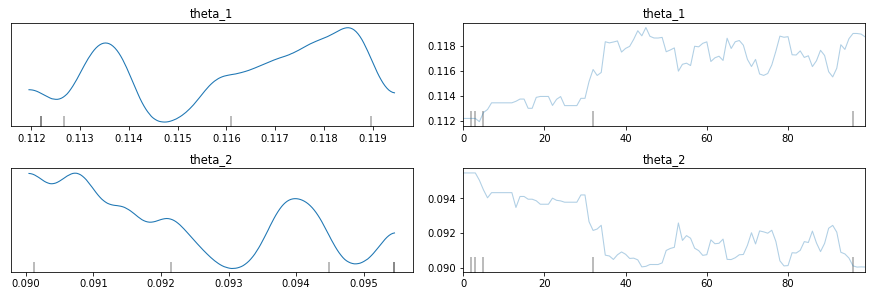

In [26]:
# plot the traces
pm.traceplot(trace_grad)

Text(0.5, 1.0, 'Correlation between theta1 and theta2')

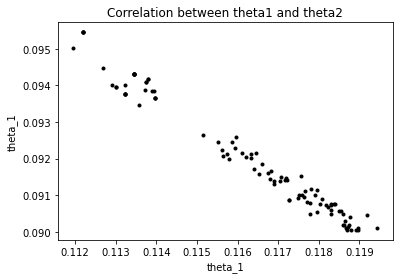

In [27]:
 t1_lst = trace_grad['theta_1']
t2_lst = trace_grad['theta_2']

plt.plot(t1_lst,t2_lst,'k.')
plt.xlabel('theta_1')
plt.ylabel('theta_1')
plt.title('Correlation between theta1 and theta2')